# Result

- Best model: Data sampling Algorithms- XGBoost
- Best parameters: {'smote__k_neighbors': 1, 'xgb__learning_rate': 0.6}
- Best Mean cross-validation score: 0.87229
- Train score is 1.0
- val score is 0.8189655172413792
- Reason for Pre Processing Step: used Median for the missing data imputation as the distribution of this dataset is not normal;there are negative values in this dataset, so used Yeo-Johnson Transformation to transform this dataset; and most of the variables in the dataset contain too many outliers, used Winsorization and RobustScaling which scaling with the median and quantiles.

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

 # Data

In [134]:
data =  pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [204]:
data.head()

Id        V1        V2        V3        V4        V5        V6  \
0  138662 -0.711273  1.272483  1.681631  0.039897 -0.312381 -1.161083   
1  235999  1.990679 -0.128465 -1.700556  0.529839  0.136889 -1.404270   
2  245376  1.812653 -0.476162 -0.338988  1.386750 -0.745965 -0.449870   
3  202483 -1.014219  0.522775 -0.337978 -1.957797  3.578395  3.266965   
4    9710 -0.967270 -0.053815  2.273463 -0.894434  0.728924  0.153524   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.853875 -0.173979 -0.438558  ... -0.208181 -0.414631  0.057957  0.930321   
1  0.593353 -0.456700  0.648260  ...  0.018179  0.179084 -0.004248  0.039531   
2 -0.492226  0.029904  1.129394  ...  0.252668  0.655719  0.090057 -0.136884   
3  0.602857  0.644645 -0.305879  ...  0.147742  0.590740 -0.680551  0.745346   
4 -0.038330  0.165252  1.172526  ...  0.106692  0.514430 -0.081546 -0.305042   

        V25       V26       V27       V28    V29  Target  
0 -0.165598  0.038799  0.384295  0.192762  21.87       0  
1  0.333765 -0.225201 -0.047285 -0.059682  49.99       0  
2 -0.172452 -0.556921  0.036490 -0.021575  79.00       0  
3  1.119496  0.013520  0.004530 -0.132643   6.00       0  
4 -0.354883  0.896254 -0.182293 -0.142810  15.95       0  

[5 rows x 31 columns]

In [4]:
test.head()

Id        V1        V2        V3        V4        V5        V6  \
0   83172 -2.033519 -1.079309  1.972553 -1.377534 -0.773444  0.702919   
1  140094  1.125524  0.189854  1.508660  2.719937 -0.882342  0.128390   
2  116283 -0.578027  1.109673  1.231751  0.725871  0.139675 -0.030415   
3  222830  1.914017  0.588986 -1.481645  3.515009  1.271977  0.502868   
4   60185  1.267642  0.725939 -0.091806  2.370915  0.420349 -0.570252   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0 -0.870868  1.082417 -0.789931  ...  0.536853  0.300559  0.409305  0.119931   
1 -0.622651  0.219444  0.255370  ... -0.225172 -0.097584 -0.172683  0.057556   
2  0.770472  0.072078 -0.793572  ...  0.097561  0.214610  0.773072 -0.110802   
3  0.536994 -0.055564 -1.452582  ... -0.179258  0.010252  0.020996  0.026001   
4  0.534720 -0.235391 -0.977075  ... -0.172138 -0.052174 -0.176550 -0.161225   

        V24       V25       V26       V27       V28     V29  
0 -0.295053  0.331692 -0.277494  0.184017 -0.076897  141.01  
1  0.360859  0.265443 -0.040417  0.036686  0.033685    0.00  
2  0.248029 -0.326140 -0.330373  0.321788  0.198050   43.25  
3  0.186830  0.288364 -0.004518 -0.073108 -0.063333   30.67  
4 -0.123870  0.787280  0.100856 -0.041856  0.004038    1.21  

[5 rows x 30 columns]

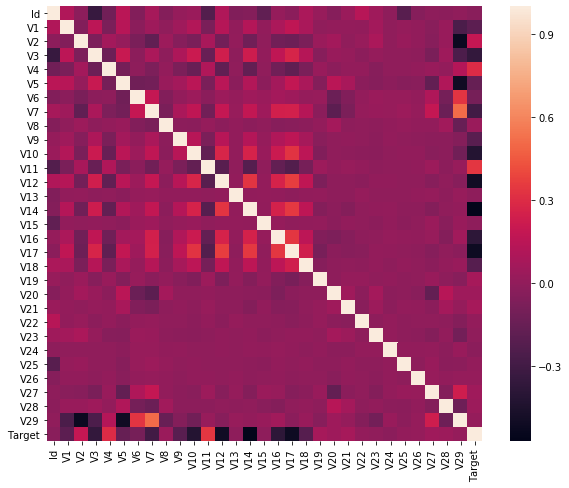

In [5]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),  square=True, ax=ax)

In [6]:
data.shape

(24846, 31)

In [7]:
test.shape

(24846, 30)

In [8]:
data.describe()

Id            V1            V2            V3            V4  \
count   24846.000000  22459.000000  24846.000000  24846.000000  24846.000000   
mean   141868.788095     -0.042032      0.019074     -0.055260      0.029289   
std     82016.035976      2.061469      1.722647      1.730072      1.482053   
min        32.000000    -37.054295    -39.818310    -48.325589     -5.231828   
25%     70705.000000     -0.941997     -0.611444     -0.918977     -0.853705   
50%    141887.000000      0.002750      0.068992      0.163070     -0.006193   
75%    212513.500000      1.309469      0.825253      1.016704      0.759149   
max    284781.000000      2.418267     19.167239      3.862590     15.304184   

                 V5            V6            V7            V8            V9  \
count  24846.000000  24846.000000  24846.000000  24846.000000  24846.000000   
mean      -0.031085     -0.008175     -0.026007      0.014152     -0.017939   
std        1.616062      1.413044      1.620777      1.236557      1.140772   
min     -113.743307    -19.996349    -37.060311    -39.688571    -11.126624   
25%       -0.705745     -0.778707     -0.565469     -0.207270     -0.659425   
50%       -0.070299     -0.279575      0.032157      0.026507     -0.056063   
75%        0.598372      0.402585      0.569205      0.335042      0.586035   
max       28.762671     73.301626    120.589494     19.587773      8.918202   

       ...           V21           V22           V23           V24  \
count  ...  24846.000000  24846.000000  24846.000000  24846.000000   
mean   ...      0.004708      0.006116     -0.004320     -0.005632   
std    ...      0.753043      0.728869      0.622440      0.602507   
min    ...    -21.620120     -8.887017    -23.222016     -2.759942   
25%    ...     -0.225318     -0.528751     -0.163086     -0.363609   
50%    ...     -0.026834      0.016988     -0.011396      0.036837   
75%    ...      0.192690      0.533115      0.147343      0.433292   
max    ...     27.202839      8.272233     17.606637      4.584549   

                V25           V26           V27           V28           V29  \
count  24846.000000  24846.000000  24846.000000  24846.000000  24846.000000   
mean       0.003193      0.001730      0.003160     -0.000100     91.698618   
std        0.518214      0.483415      0.455299      0.314326    310.349300   
min       -4.930750     -1.658162     -7.976100    -15.430084      0.000000   
25%       -0.310198     -0.325839     -0.069698     -0.053829      5.470000   
50%        0.020346     -0.049872      0.001493      0.010855     21.990000   
75%        0.352613      0.241366      0.093725      0.079364     77.900000   
max        4.554683      3.415636     31.612198     15.522649  25691.160000   

             Target  
count  24846.000000  
mean       0.009820  
std        0.098613  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 31 columns]

In [9]:
data.head()

Id        V1        V2        V3        V4        V5        V6  \
0  138662 -0.711273  1.272483  1.681631  0.039897 -0.312381 -1.161083   
1  235999  1.990679 -0.128465 -1.700556  0.529839  0.136889 -1.404270   
2  245376  1.812653 -0.476162 -0.338988  1.386750 -0.745965 -0.449870   
3  202483 -1.014219  0.522775 -0.337978 -1.957797  3.578395  3.266965   
4    9710 -0.967270 -0.053815  2.273463 -0.894434  0.728924  0.153524   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.853875 -0.173979 -0.438558  ... -0.208181 -0.414631  0.057957  0.930321   
1  0.593353 -0.456700  0.648260  ...  0.018179  0.179084 -0.004248  0.039531   
2 -0.492226  0.029904  1.129394  ...  0.252668  0.655719  0.090057 -0.136884   
3  0.602857  0.644645 -0.305879  ...  0.147742  0.590740 -0.680551  0.745346   
4 -0.038330  0.165252  1.172526  ...  0.106692  0.514430 -0.081546 -0.305042   

        V25       V26       V27       V28    V29  Target  
0 -0.165598  0.038799  0.384295  0.192762  21.87       0  
1  0.333765 -0.225201 -0.047285 -0.059682  49.99       0  
2 -0.172452 -0.556921  0.036490 -0.021575  79.00       0  
3  1.119496  0.013520  0.004530 -0.132643   6.00       0  
4 -0.354883  0.896254 -0.182293 -0.142810  15.95       0  

[5 rows x 31 columns]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24846 entries, 0 to 24845
Data columns (total 31 columns):
Id        24846 non-null int64
V1        22459 non-null float64
V2        24846 non-null float64
V3        24846 non-null float64
V4        24846 non-null float64
V5        24846 non-null float64
V6        24846 non-null float64
V7        24846 non-null float64
V8        24846 non-null float64
V9        24846 non-null float64
V10       24846 non-null float64
V11       24846 non-null float64
V12       24846 non-null float64
V13       24846 non-null float64
V14       24846 non-null float64
V15       24846 non-null float64
V16       24846 non-null float64
V17       24846 non-null float64
V18       24846 non-null float64
V19       24846 non-null float64
V20       22317 non-null float64
V21       24846 non-null float64
V22       24846 non-null float64
V23       24846 non-null float64
V24       24846 non-null float64
V25       24846 non-null float64
V26       24846 non-null float64
V2

In [11]:
data.isnull().mean()

Id        0.000000
V1        0.096072
V2        0.000000
V3        0.000000
V4        0.000000
V5        0.000000
V6        0.000000
V7        0.000000
V8        0.000000
V9        0.000000
V10       0.000000
V11       0.000000
V12       0.000000
V13       0.000000
V14       0.000000
V15       0.000000
V16       0.000000
V17       0.000000
V18       0.000000
V19       0.000000
V20       0.101787
V21       0.000000
V22       0.000000
V23       0.000000
V24       0.000000
V25       0.000000
V26       0.000000
V27       0.000000
V28       0.000000
V29       0.000000
Target    0.000000
dtype: float64

In [12]:
null_col = []
for col in data.columns:
    null_count = sum((data[col].isnull()))
    if null_count > 0:
        print(col,":",null_count)
        null_col.append(col)

V1 : 2387
V20 : 2529


In [135]:
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Target'and var!='Id']
print(f'There are {len(continuous)} continuous variables')

There are 29 continuous variables


In [30]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\xiaoy\Anaconda3\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\xiaoy\Anaconda3\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\xiaoy\Anaconda3\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\xiaoy\Anaconda3\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


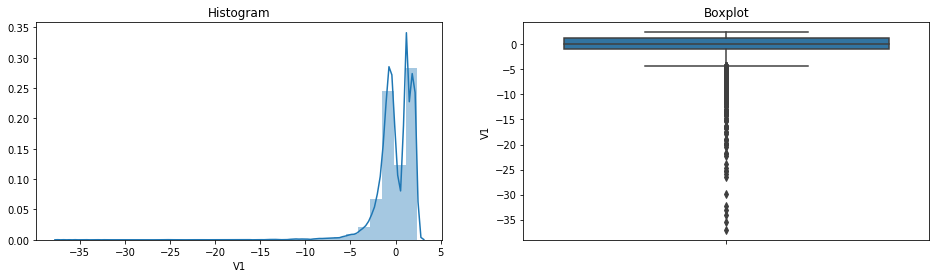

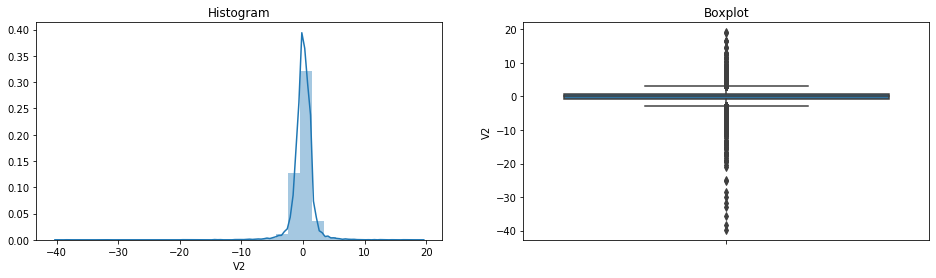

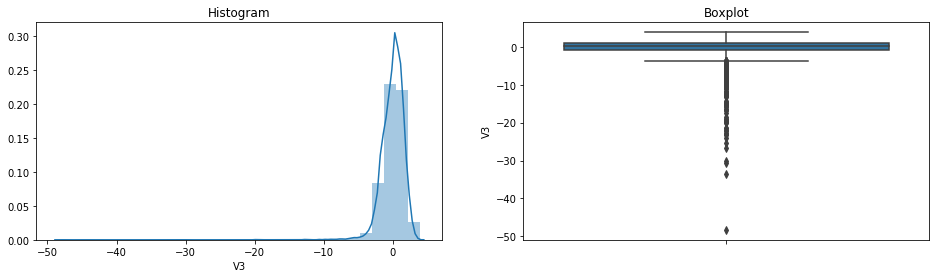

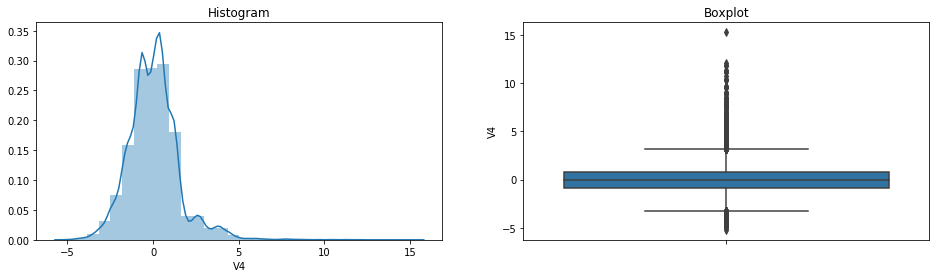

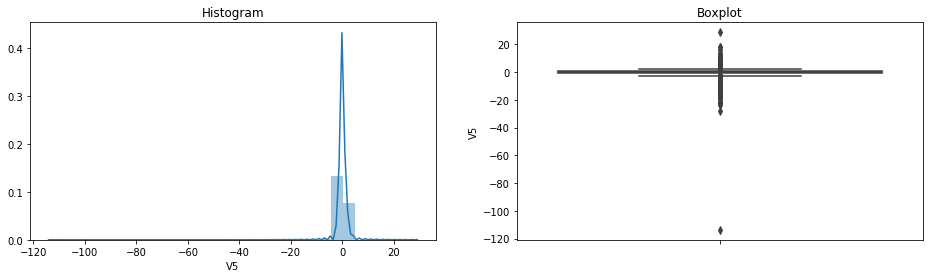

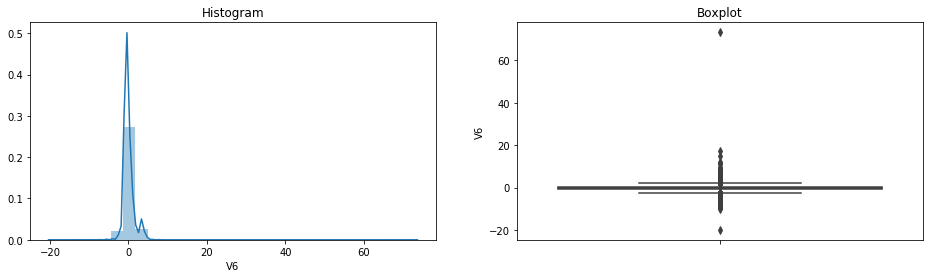

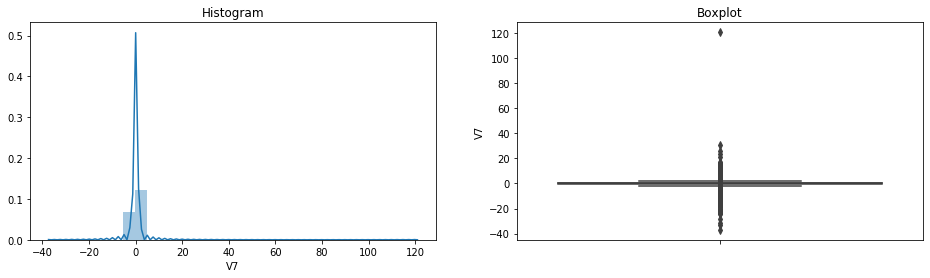

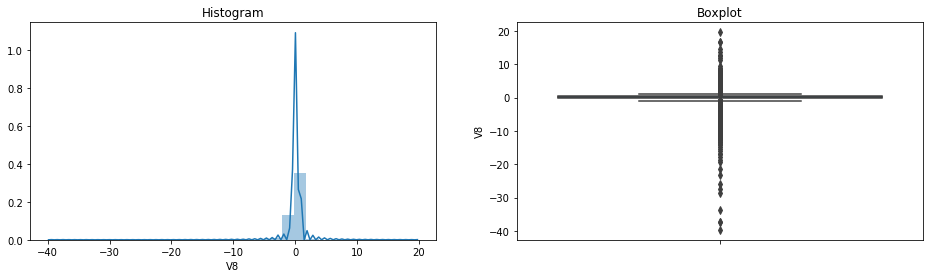

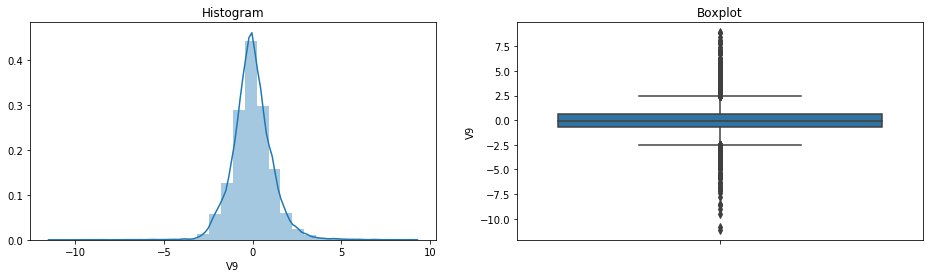

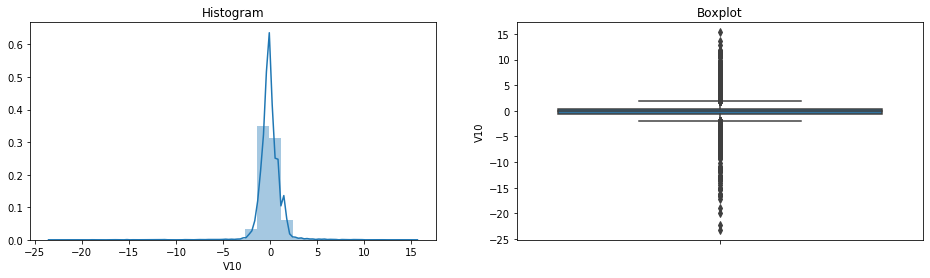

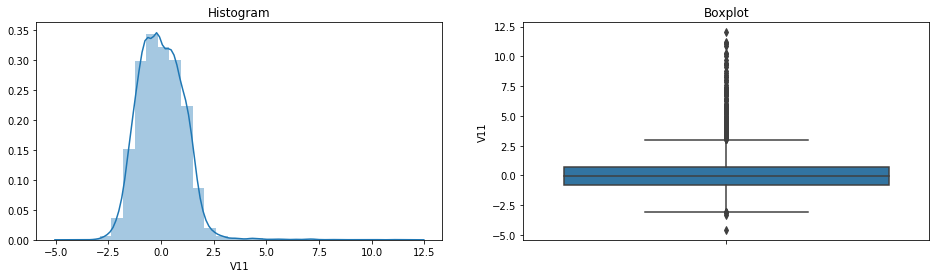

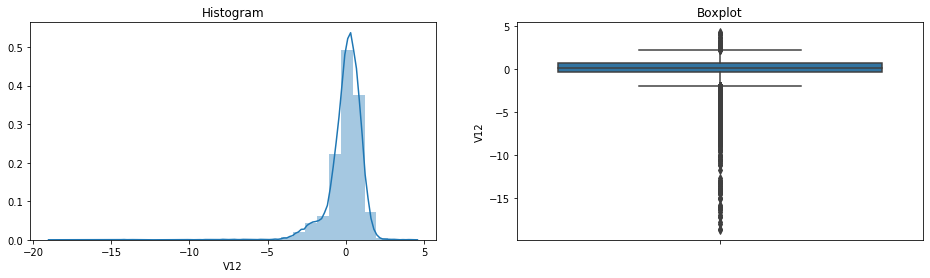

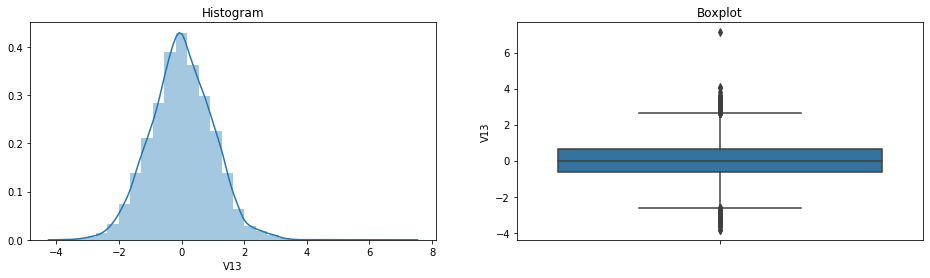

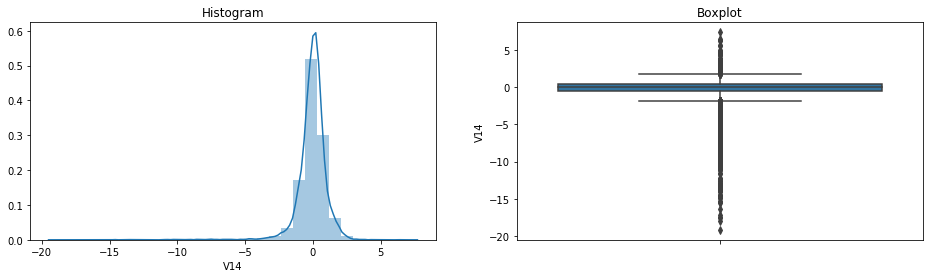

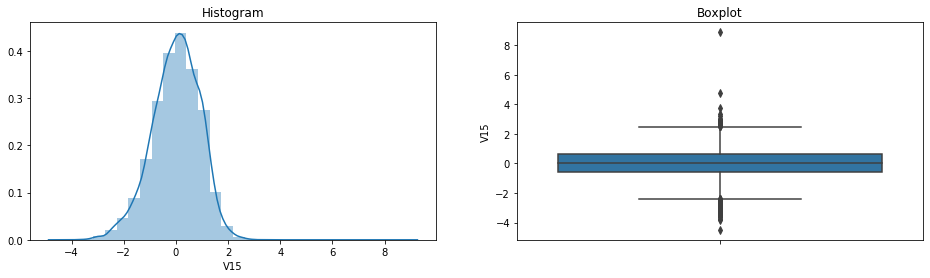

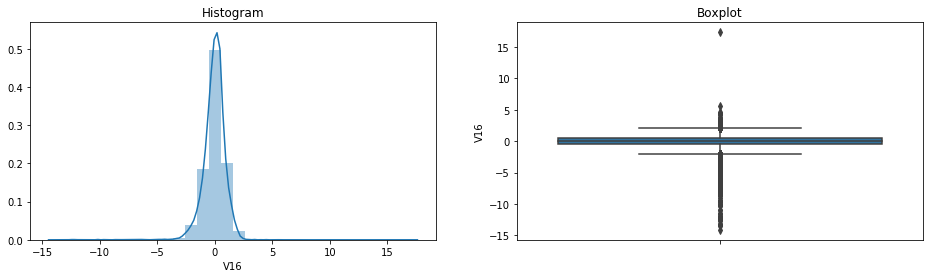

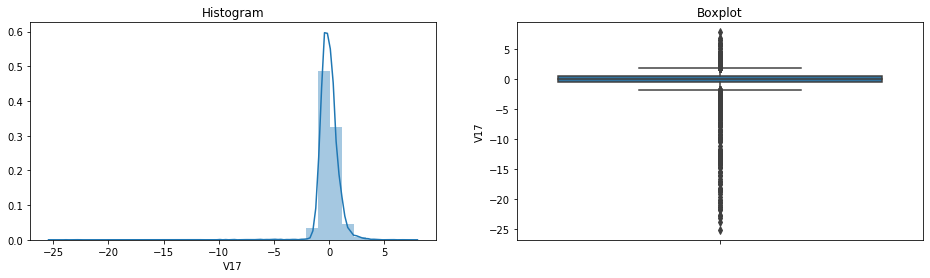

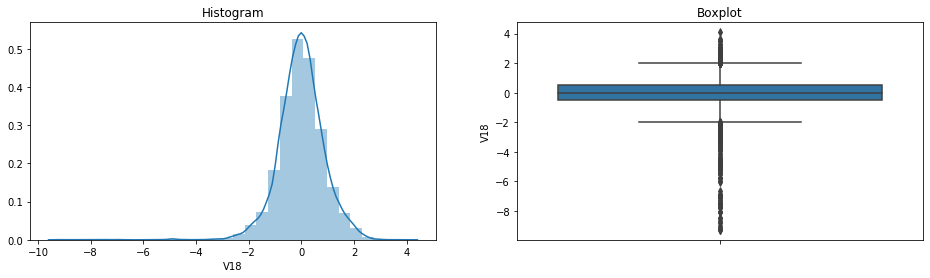

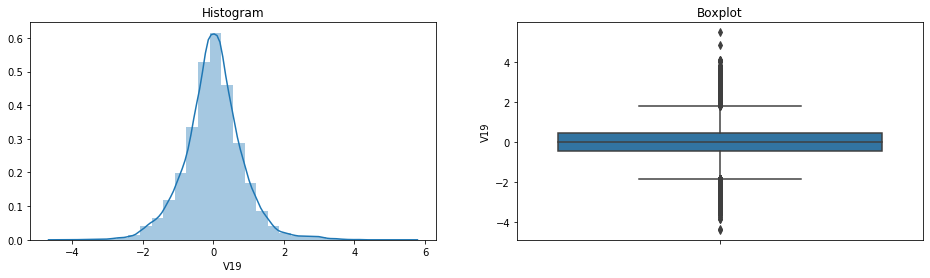

C:\Users\xiaoy\Anaconda3\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\xiaoy\Anaconda3\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\xiaoy\Anaconda3\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\xiaoy\Anaconda3\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


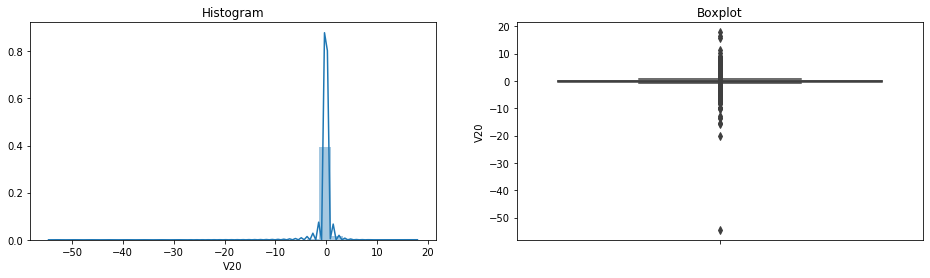

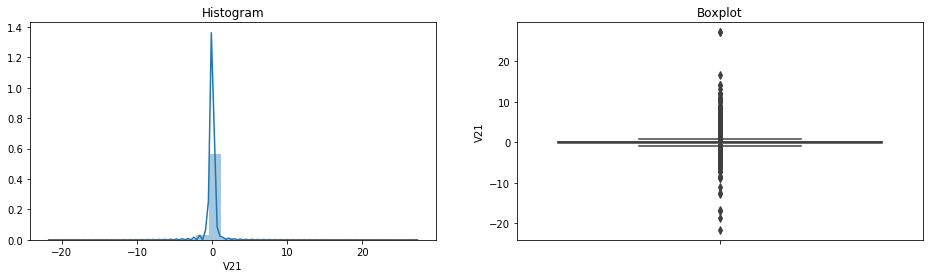

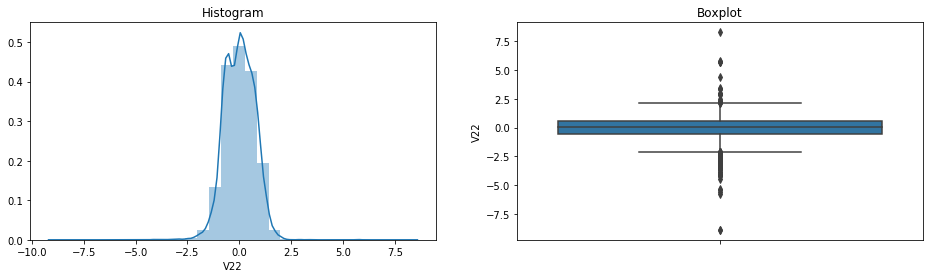

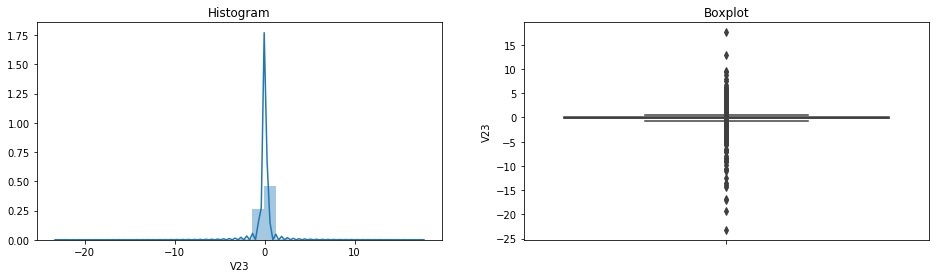

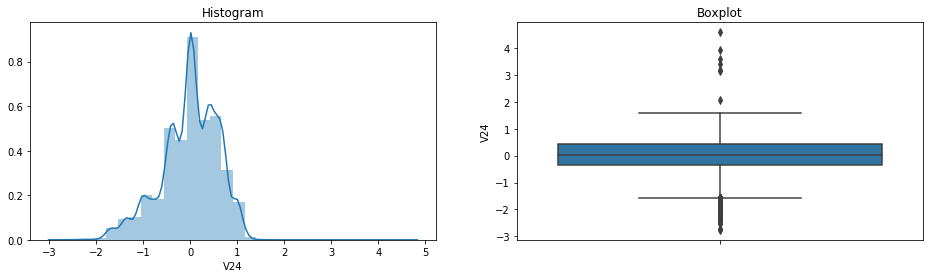

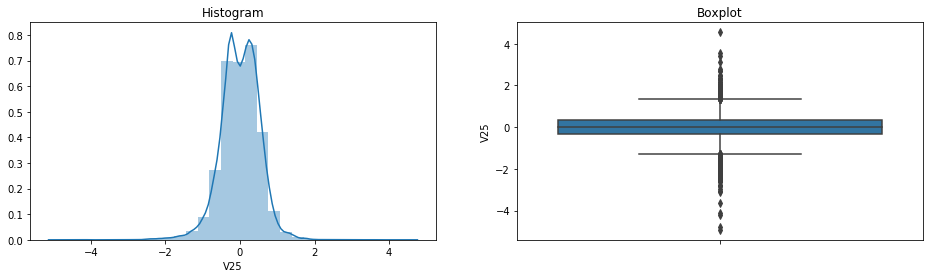

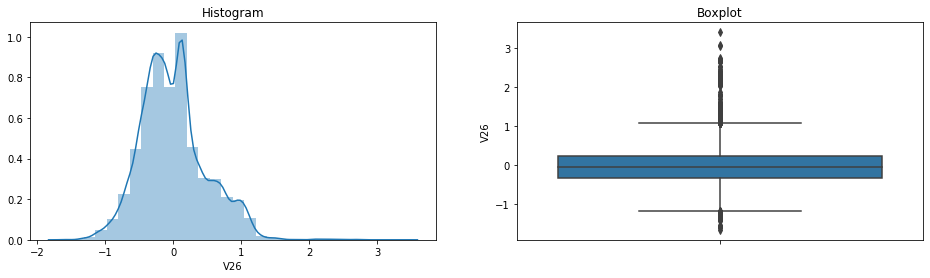

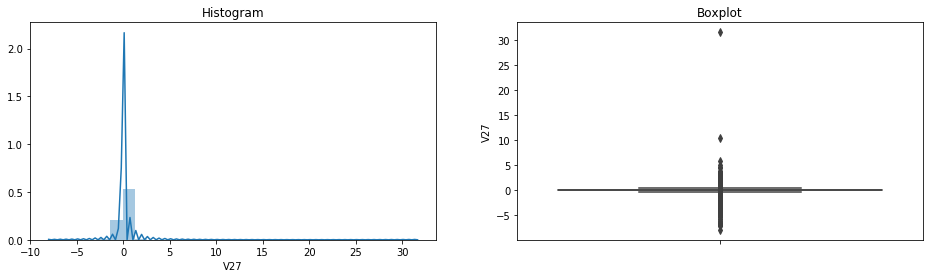

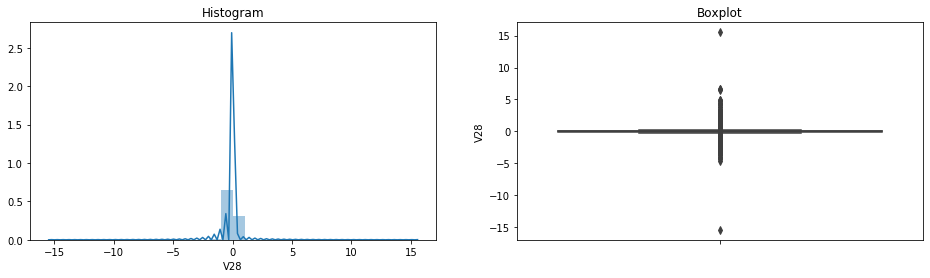

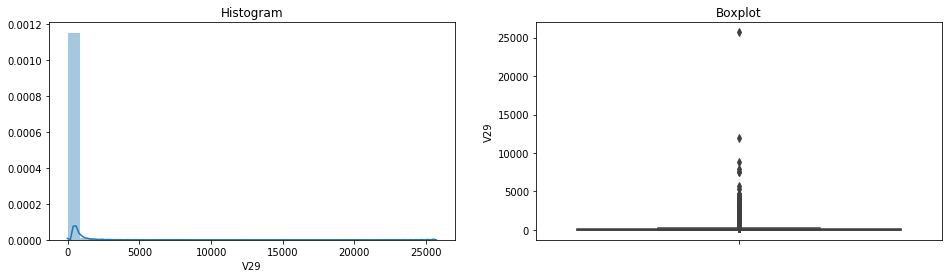

In [31]:
for var in continuous:
    diagnostic_plots(data, var)

# PreProcessing

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    data.drop(['Target'], axis=1),  # predictors 
    data['Target'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_val.shape

((22361, 30), (2485, 30))

In [137]:
X_test=test#.drop(['Id'], axis=1)
X_test.shape

(24846, 30)

In [139]:
from feature_engine import missing_data_imputers as mdi
from sklearn.pipeline import Pipeline as Pipeline_skl
from feature_engine.variable_transformers import YeoJohnsonTransformer as YJT
from sklearn.preprocessing import RobustScaler
from feature_engine.outlier_removers import Winsorizer
from feature_engine.variable_transformers import PowerTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler

In [140]:
data_pipeline = Pipeline_skl([

    # missing data imputation 
    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='median',variables=['V1','V20'])),

    ('winsorizer',Winsorizer(distribution='gaussian', 
                          tail='both', 
                          fold=1.5,
                          variables=continuous)),
    
    #transform and scale
    ('power_transform',YJT()),
    # feature Scaling
    ('scale',RobustScaler()) #too many outliers

])

In [141]:
data_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_num_mean',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['V1', 'V20'])),
                ('winsorizer',
                 Winsorizer(distribution='gaussian', fold=1.5, tail='both',
                            variables=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
                                       'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
                                       'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                       'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                                       'V26', 'V27...', 'V29'])),
                ('power_transform',
                 YeoJohnsonTransformer(variables=['Id', 'V1', 'V2', 'V3', 'V4',
                                                  'V5', 'V6', 'V7', 'V8', 'V9',
                                                  'V10', 'V11', 'V12', 'V13',
                                               

In [142]:
X_train=pd.DataFrame(data_pipeline.transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(data_pipeline.transform(X_test),columns=X_test.columns)
X_val=pd.DataFrame(data_pipeline.transform(X_val),columns=X_val.columns)

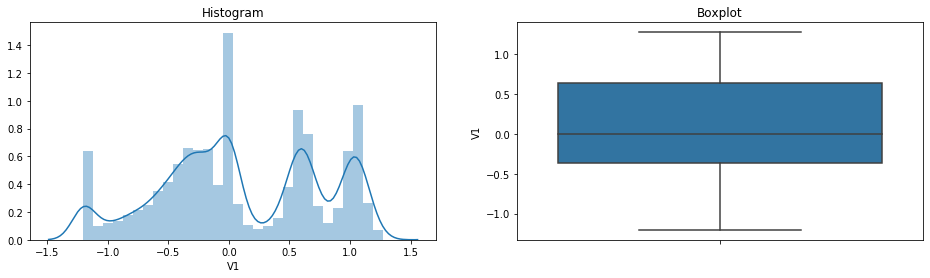

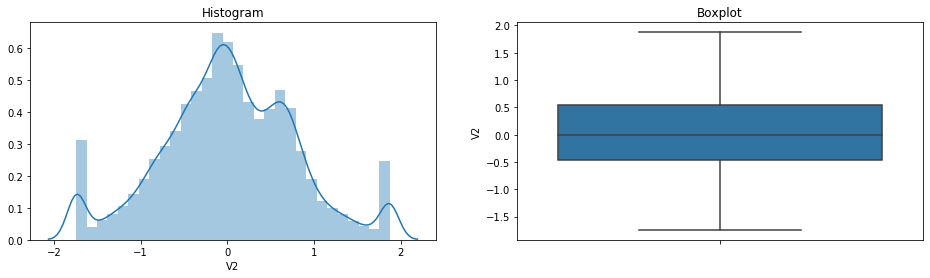

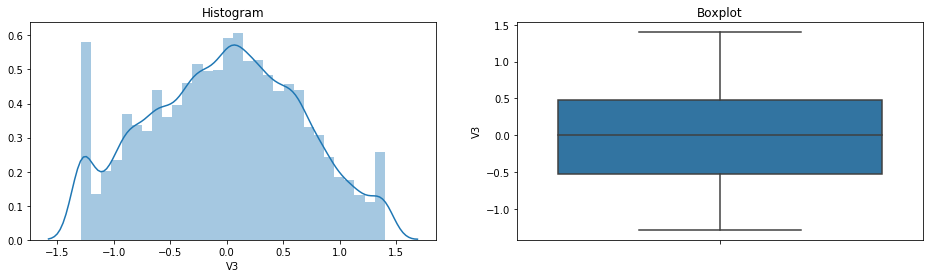

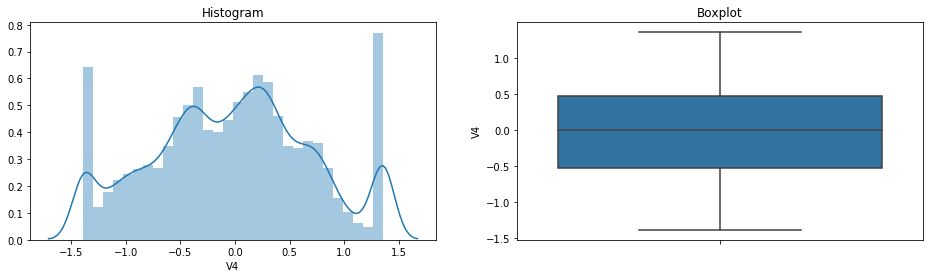

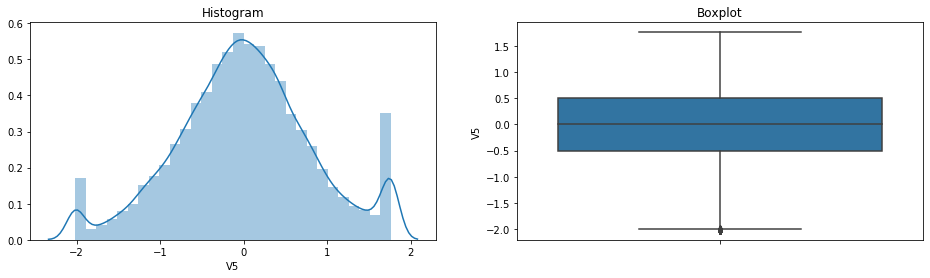

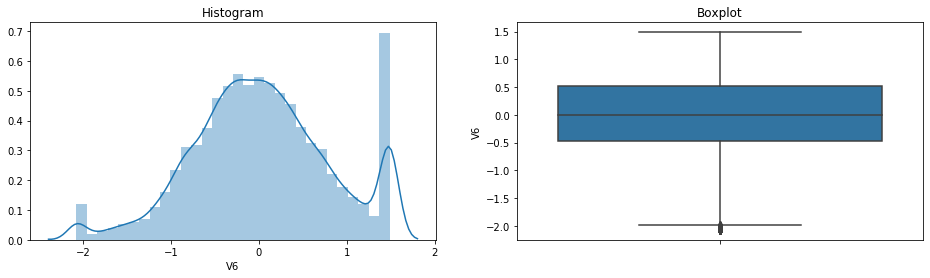

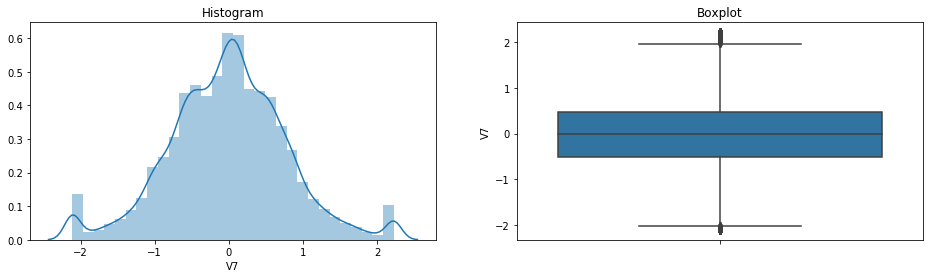

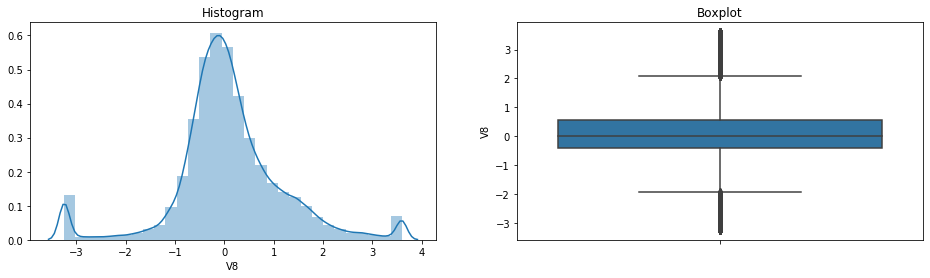

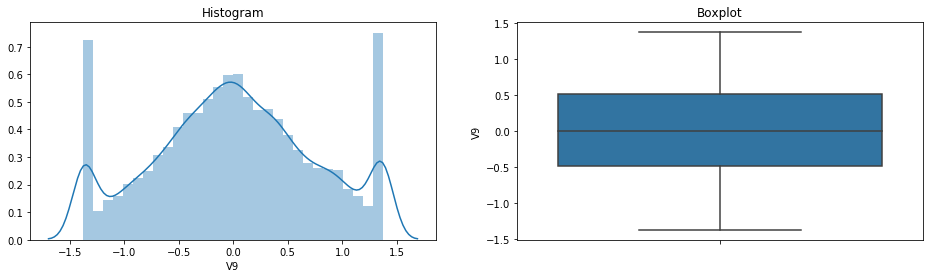

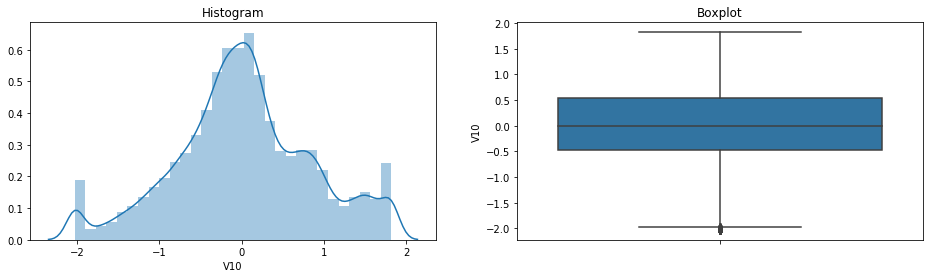

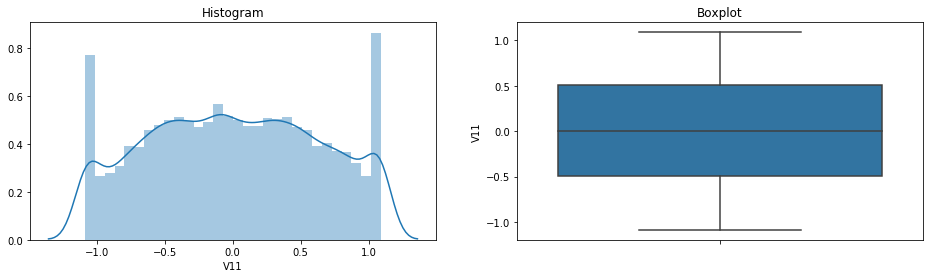

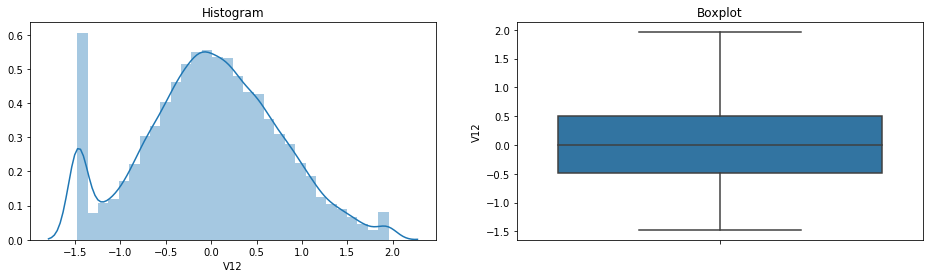

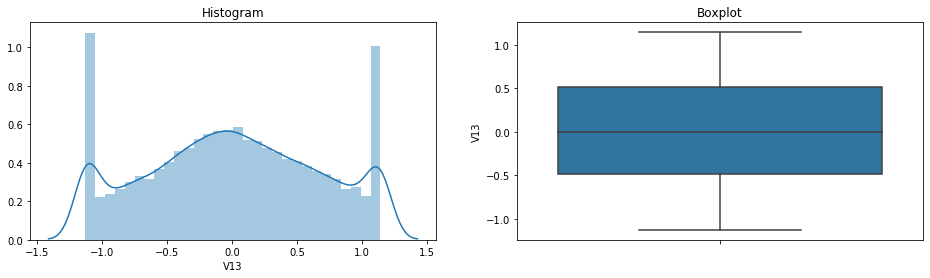

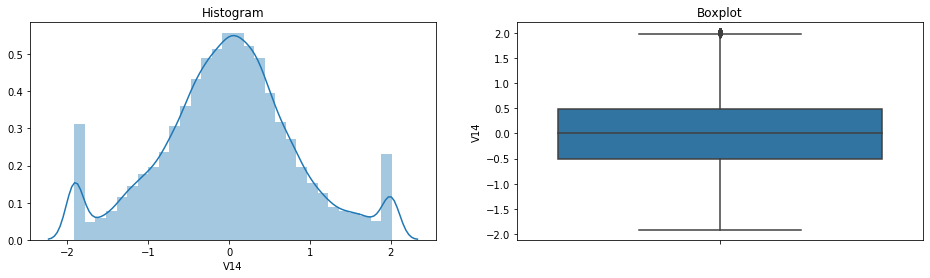

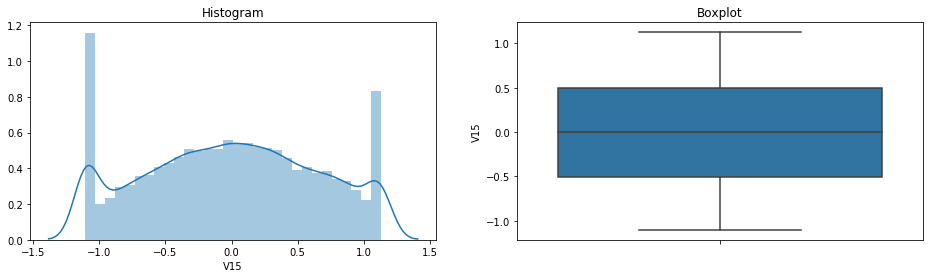

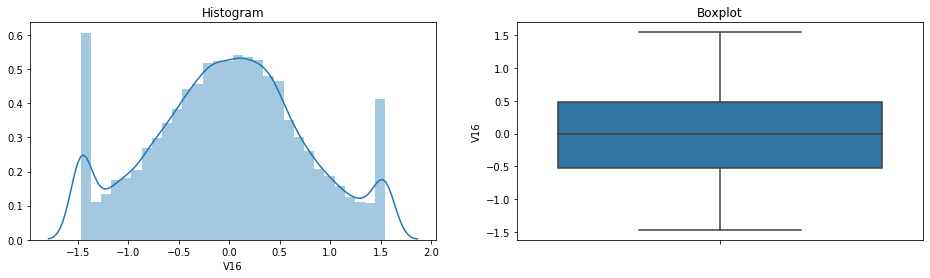

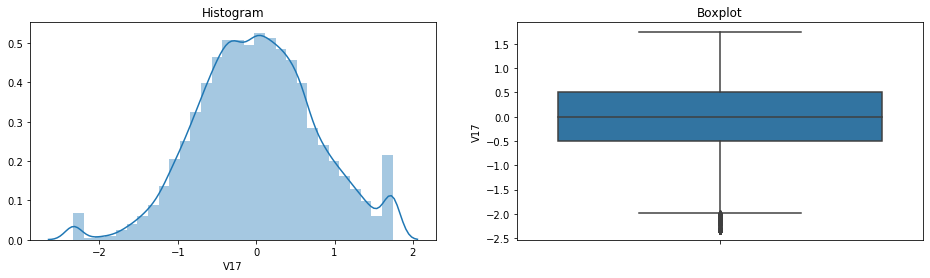

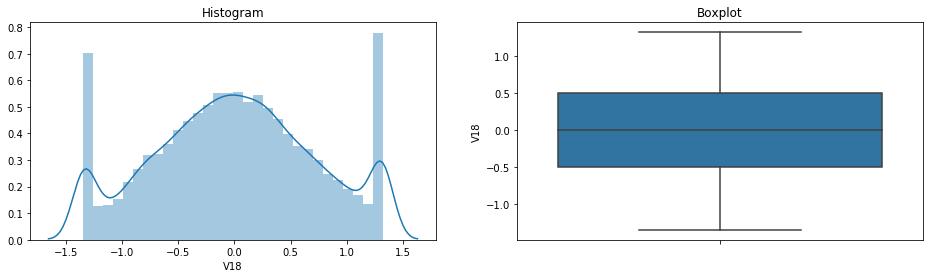

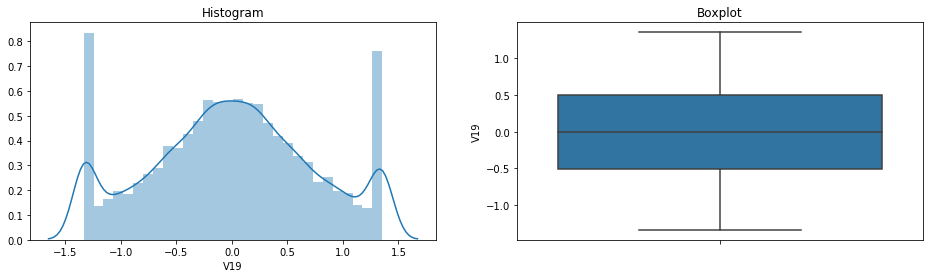

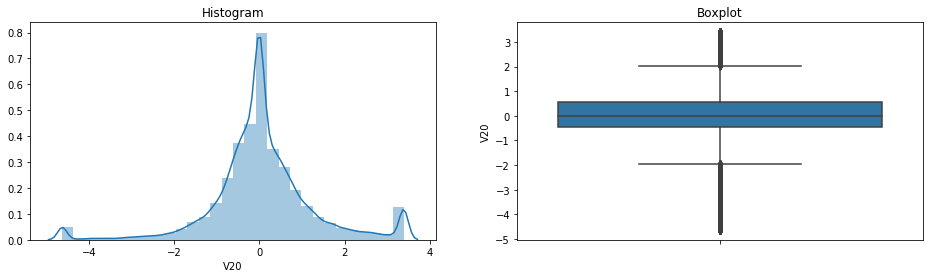

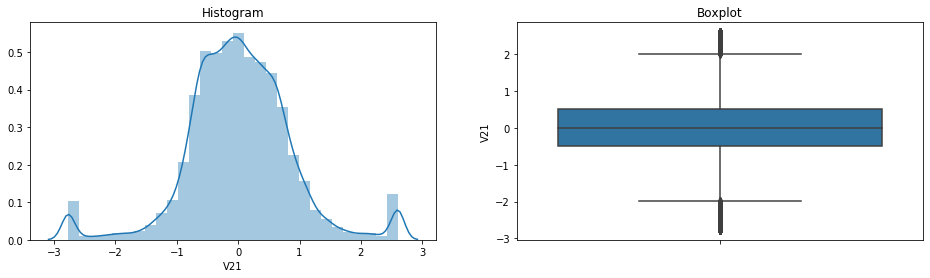

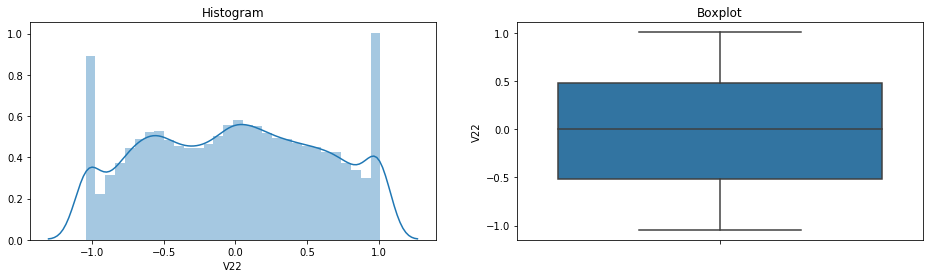

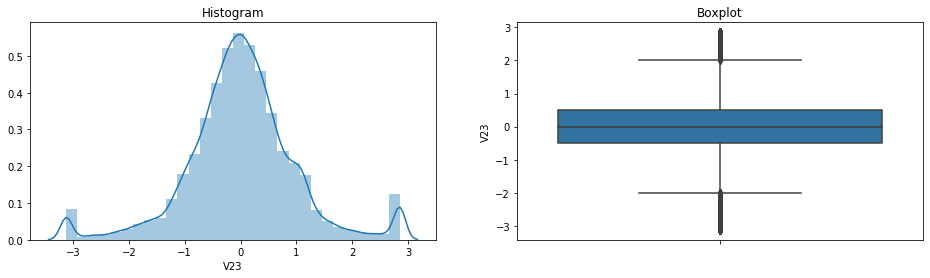

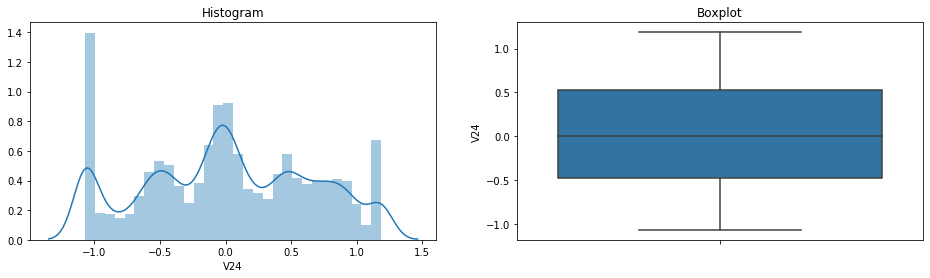

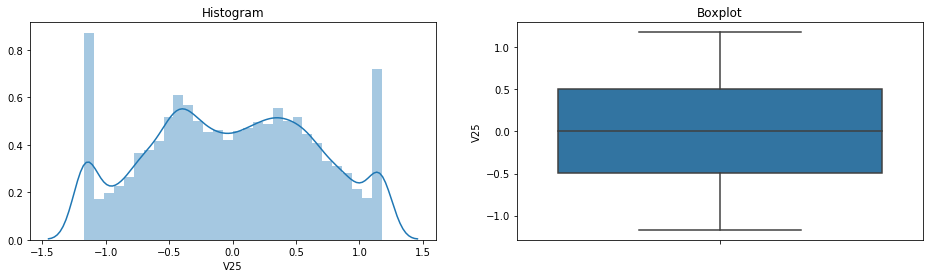

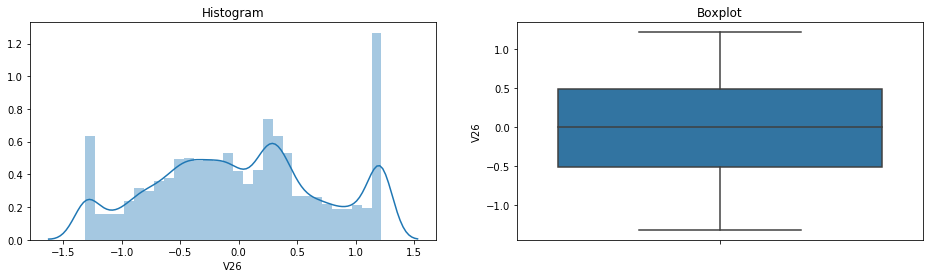

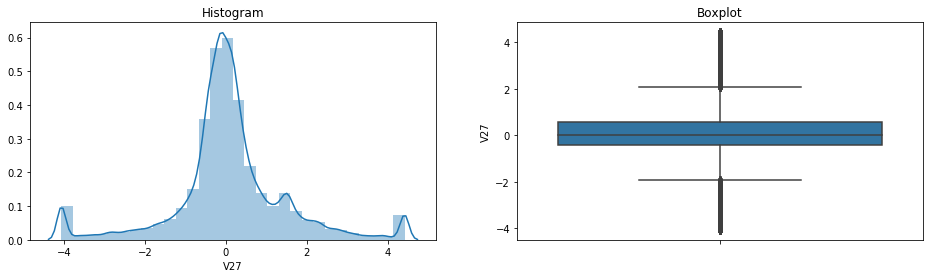

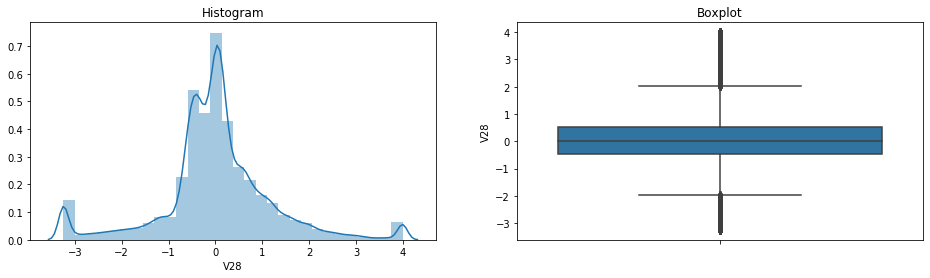

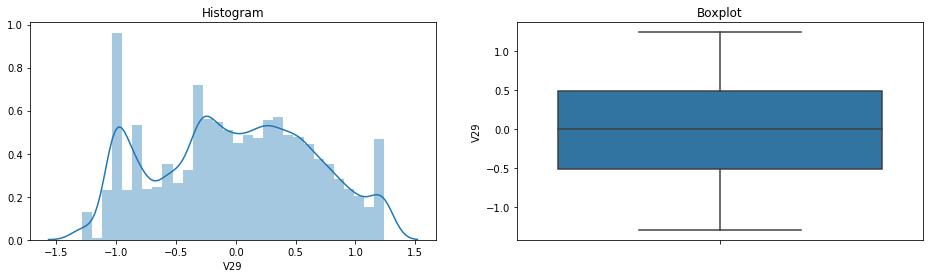

In [38]:
for var in X_train[continuous]:
    diagnostic_plots(X_train, var)

# Basic Algorithms 

## Logistic Regression

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score

In [144]:
from joblib import dump,load

In [145]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=1000)
logreg_param= {'C': [0.001,0.1,1,10,40,50,100],'penalty': ['l2']}

logreg_grid = GridSearchCV(logreg, logreg_param,cv=5, return_train_score=True, scoring = make_scorer(fbeta_score, beta=2) )
logreg_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.1, 1, 10, 40, 50, 100],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [146]:
print(f'Best Mean Cross Validation Score is {logreg_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {logreg_grid.best_params_}')
print(f'Train score is {logreg_grid.score(X_train,y_train)}')
print(f'Test score is {logreg_grid.score(X_val,y_val)}')


Best Mean Cross Validation Score is 0.8375629206682534
Best Mean Cross Validation Score is {'C': 0.1, 'penalty': 'l2'}
Train score is 0.8426966292134833
Test score is 0.7456140350877194


## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,6),
              "splitter": ["best", "random"]}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True, scoring = make_scorer(fbeta_score, beta=2) )
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.5f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree train Performance: ", grid_dtree.score(X_train,y_train))
#print(f'Test score is {grid_dtree.score(X_val,y_val)}')

Best Mean Cross-validation score: 0.83604

Decision Tree parameters:  {'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_split': 2, 'splitter': 'best'}
Decision Tree train Performance:  0.8539944903581268


## k-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'p': [1,2], 'n_neighbors' : range(1,10), 'weights': ['uniform','distance']}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True,scoring = make_scorer(fbeta_score, beta=2))
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 10), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [46]:
print(f'Best Mean Cross Validation Score is {grid_knn.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_knn.best_params_}')
print(f'Train score is {grid_knn.score(X_train,y_train)}')
print(f'Test score is {grid_knn.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.856445953945095
Best Mean Cross Validation Score is {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Train score is 1.0
Test score is 0.7456140350877194


## Support Vector Machine (optional as it may take long time to run)

In [197]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

### linear svc

In [200]:
svc_linear=SVC(kernel='linear',probability=True)
param_grid = {'C': [0.1, 1, 10,100]}
grid_svc = GridSearchCV(svc_linear, param_grid, cv=5, return_train_score=True,scoring = make_scorer(fbeta_score, beta=2))
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [202]:
print(f'Best Mean Cross Validation Score is {grid_svc.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_svc.best_params_}')
print(f'Train score is {grid_svc.score(X_train,y_train)}')
print(f'Test score is {grid_svc.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8295215909288105
Best Mean Cross Validation Score is {'C': 0.1}
Train score is 0.8309859154929579
Test score is 0.7456140350877194


### scv with rbf, polynomial and sigmoid kernels

In [ ]:
svc_kernel = SVC(kernel = 'rbf',probability=True )

#define a list of parameters
param_svc_kernel = {'C': [1,10,50,100],'gamma':[0.01,0.1,1]}

#apply grid search
grid_svc_rbf = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=2,scoring = make_scorer(fbeta_score, beta=2))
grid_svc_rbf.fit(X_train, y_train)

print('train score: ', grid_svc_rbf.score(X_train, y_train))
print('test score: ', grid_svc_rbf.score(X_val,y_val))
print(grid_svc_rbf.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_rbf.best_score_))

In [ ]:
svc_kernel = SVC(kernel = 'rbf',probability=True )

#define a list of parameters
param_svc_kernel = {'C': [1,10,50,100],'gamma':[0.01,0.1,1]}

#apply grid search
grid_svc_rbf = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=2,scoring = make_scorer(fbeta_score, beta=2))
grid_svc_rbf.fit(X_train, y_train)

print('train score: ', grid_svc_rbf.score(X_train, y_train))
print('test score: ', grid_svc_rbf.score(X_val,y_val))
print(grid_svc_rbf.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_rbf.best_score_))

In [ ]:
svc_linear=SVC(kernel='poly',probability=True )
param_grid = {'C': [0.01, 0.1, 1, 10],'degree':[1,2,3]}
grid_svc_poly = GridSearchCV(svc_linear, param_grid, cv=5,scoring = make_scorer(fbeta_score, beta=2))
grid_svc_poly.fit(X_train, y_train)
print('train score: ', grid_svc_poly.score(X_train, y_train))
print('test score: ', grid_svc_poly.score(X_val,y_val))
print("Best parameters: {}".format(grid_svc_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc_poly.best_score_))

In [ ]:
svc_linear=SVC(kernel='sigmoid',probability=True )
param_grid = {'C': [0.01,0.02, 0.1, 1, 10]}
grid_svc_s = GridSearchCV(svc_linear, param_grid, cv=5,scoring = make_scorer(fbeta_score, beta=2))
grid_svc_s.fit(X_train, y_train)
print('train score: ', grid_svc_s.score(X_train, y_train))
print('test score: ', grid_svc_s.score(X_val,y_val))
print("Best parameters: {}".format(grid_svc_s.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc_s.best_score_))

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
   # 'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True,scoring = make_scorer(fbeta_score, beta=2) )
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [49]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8453302054019153
Best Mean Cross Validation Score is {'max_depth': 7, 'max_features': 'auto', 'n_estimators': 400}
Train score is 0.8921933085501859
Test score is 0.782608695652174


## Extra Trees

In [50]:
from  sklearn.ensemble import ExtraTreesClassifier

In [51]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring = make_scorer(fbeta_score, beta=2) )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [52]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8233313622545408
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.8489681050656661
Test score is 0.7456140350877194


## Gradient Boosting

In [53]:
from  sklearn.ensemble import GradientBoostingClassifier

gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True,scoring = make_scorer(fbeta_score, beta=2) )
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [54]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.5950759155295454
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Train score is 0.8588129496402878
Test score is 0.7203389830508474


## XgBoost

In [57]:
from xgboost import XGBClassifier

In [64]:
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [23,25],
              'learning_rate' : [0.6,0.7],
               'min_child_weight' : [3,4],
                'subsample':[0.6,0.7]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring = make_scorer(fbeta_score, beta=2))
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=2, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

In [65]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8617044895944798
Best Mean Cross Validation Score is {'learning_rate': 0.6, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 23, 'subsample': 0.6}
Train score is 0.9065679925994449
Test score is 0.782608695652174


# Cost Sensitive Algorithms

## Logistic Regression

In [148]:
logreg = LogisticRegression(solver='lbfgs')
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_logreg= GridSearchCV(logreg, param_grid, cv=5, n_jobs=2, scoring = make_scorer(fbeta_score, beta=2))
grid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(grid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_logreg.best_score_))
print(f'Train score is {grid_logreg.score(X_train,y_train)}')
print(f'val score is {grid_logreg.score(X_val,y_val)}')

Best parameters: {'class_weight': {0: 1, 1: 1}}
Best Mean cross-validation score: 0.84
Train score is 0.8434296365330847
val score is 0.7456140350877194


## Decision Trees

In [149]:
dtree = DecisionTreeClassifier()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_dtree2= GridSearchCV(dtree, param_grid, cv=5, n_jobs=2, scoring = make_scorer(fbeta_score, beta=2))
grid_dtree2.fit(X_train, y_train)

print("Best parameters: {}".format(grid_dtree2.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_dtree2.best_score_))
print(f'Train score is {grid_dtree2.score(X_train,y_train)}')
print(f'val score is {grid_dtree2.score(X_val,y_val)}')

Best parameters: {'class_weight': {0: 100, 1: 1}}
Best Mean cross-validation score: 0.82
Train score is 1.0
val score is 0.7692307692307692


## Support Vector Machines (optional as it may take long time to run)

In [ ]:
svc = SVC()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_svc2= GridSearchCV(svc, param_grid, cv=5, n_jobs=2, scoring = make_scorer(fbeta_score, beta=2))
grid_svc2.fit(X_train, y_train)

print("Best parameters: {}".format(grid_svc2.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svc2.best_score_))
print(f'Train score is {grid_svc2.score(X_train,y_train)}')
print(f'val score is {grid_svc2.score(X_val,y_val)}')

## Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
# define model
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
rf = cross_val_score(model,X_train, y_train, scoring = make_scorer(fbeta_score, beta=2), cv=cv, n_jobs=-1)

In [155]:
rf

array([0.83333333, 0.79439252, 0.80188679, 0.80952381, 0.76923077,
       0.76923077, 0.8490566 , 0.87962963, 0.87962963, 0.76923077,
       0.95454545, 0.83333333, 0.76923077, 0.80952381, 0.8411215 ,
       0.87962963, 0.8411215 , 0.72815534, 0.8411215 , 0.68627451,
       0.8411215 , 0.8490566 , 0.8411215 , 0.8490566 , 0.83333333,
       0.72815534, 0.80952381, 0.75471698, 0.80952381, 0.88785047])

In [156]:
# summarize performance
print('Mean f2: %.3f' % mean(rf))

Mean f2: 0.818


## XGBoost

In [157]:
xgboost = XGBClassifier()
param_grid = {
    
    'scale_pos_weight': [106,107,108,109,110,111],
}

#apply grid search
grid_xgboost2= GridSearchCV(xgboost, param_grid, cv=5, n_jobs=2,scoring = make_scorer(fbeta_score, beta=2))
grid_xgboost2.fit(X_train, y_train)

print("Best parameters: {}".format(grid_xgboost2.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_xgboost2.best_score_))
print(f'Train score is {grid_xgboost2.score(X_train,y_train)}')
print(f'val score is {grid_xgboost2.score(X_val,y_val)}')

Best parameters: {'scale_pos_weight': 108}
Best Mean cross-validation score: 0.88
Train score is 1.0
val score is 0.7894736842105263


## Extra Trees

In [158]:
etc= ExtraTreesClassifier(random_state=42)
param_grid = {
    
    'class_weight': [{0:100,1:10},{0:100,1:1}, {0:90,1:1}, {0:1,1:1}],
}

#apply grid search
grid_etc2= GridSearchCV(etc, param_grid, cv=5, n_jobs=2, scoring = make_scorer(fbeta_score, beta=2))
grid_etc2.fit(X_train, y_train)

print("Best parameters: {}".format(grid_etc2.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_etc2.best_score_))
print(f'Train score is {grid_etc2.score(X_train,y_train)}')
print(f'val score is {grid_etc2.score(X_val,y_val)}')

Best parameters: {'class_weight': {0: 90, 1: 1}}
Best Mean cross-validation score: 0.85
Train score is 1.0
val score is 0.782608695652174


## Bagging decision tree with under sampling

In [161]:
from imblearn.ensemble import BalancedBaggingClassifier

# define model
model = BalancedBaggingClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
dt = cross_val_score(model, X_train, y_train, scoring = make_scorer(fbeta_score, beta=2), cv=cv, n_jobs=-1)
# summarize performance

In [188]:
print('Mean f2: %.3f' % mean(dt))
dt

Mean f2: 0.643


array([0.60714286, 0.6918239 , 0.63333333, 0.62913907, 0.56666667,
       0.6884058 , 0.73529412, 0.64417178, 0.60240964, 0.63636364,
       0.66666667, 0.6993007 , 0.61688312, 0.625     , 0.625     ,
       0.64516129, 0.60606061, 0.63432836, 0.59375   , 0.65625   ,
       0.57575758, 0.73529412, 0.67741935, 0.63694268, 0.6       ,
       0.49079755, 0.68493151, 0.69620253, 0.65517241, 0.74468085])

# Data Sampling Algorithms 

In [159]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Pipeline_imb

## Logistic Regression

In [160]:
pipe_lg = Pipeline_imb([('smote',SMOTE()),('lg',LogisticRegression())])
param_lg = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_lg= GridSearchCV(pipe_lg,param_lg, cv=5, n_jobs=2, scoring = make_scorer(fbeta_score, beta=2))
ogrid_lg.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_lg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_lg.best_score_))
print(f'Train score is {ogrid_lg.score(X_train,y_train)}')
print(f'val score is {ogrid_lg.score(X_val,y_val)}')

Best parameters: {'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.58
Train score is 0.5835240274599542
val score is 0.5586592178770949


## Decision Tree

In [163]:
pipe_dtree = Pipeline_imb([('smote',SMOTE()),('dtree',DecisionTreeClassifier(max_depth=5))])
param_dtree = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_dtree= GridSearchCV(pipe_dtree,param_dtree, cv=5, n_jobs=2, scoring = make_scorer(fbeta_score, beta=2))
ogrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_dtree.best_score_))
print(f'Train score is {ogrid_dtree.score(X_train,y_train)}')
print(f'val score is {ogrid_dtree.score(X_val,y_val)}')

Best parameters: {'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.68
Train score is 0.7192254495159058
val score is 0.6089743589743589


## k-Nearest Neighbors

In [164]:
pipe_knn = Pipeline_imb([('smote',SMOTE()),('knn',KNeighborsClassifier(n_neighbors=6))])
param_knn = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_knn= GridSearchCV(pipe_knn,param_knn, cv=5, n_jobs=2, scoring = make_scorer(fbeta_score, beta=2))
ogrid_knn.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_knn.best_score_))
print(f'Train score is {ogrid_knn.score(X_train,y_train)}')
print(f'val score is {ogrid_knn.score(X_val,y_val)}')

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.79
Train score is 0.9235936188077246
val score is 0.7086614173228347


## Support Vector Machine (optional as it may take long time to run)

In [ ]:
pipe_svm = Pipeline_imb([('smote',SMOTE()),('svm',svm.SVC(C=10,gamma=0.1,kernel='rbf'))])
param_svm = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_svm= GridSearchCV(pipe_svm,param_svm, cv=5, n_jobs=2,scoring = make_scorer(fbeta_score, beta=2))
ogrid_svm.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_svm.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_svm.best_score_))
print(f'Train score is {ogrid_svm.score(X_train,y_train)}')
print(f'val score is {ogrid_svm.score(X_val,y_val)}')

## Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier
pipe_rf = Pipeline_imb([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=50,criterion='gini',
                                                                       max_features='auto'))])
param_rf = {'smote__k_neighbors': [1,2,3,4],
                'rf__max_depth' : [5,6,7]}

ogrid_rf= GridSearchCV(pipe_rf,param_rf, cv=5, n_jobs=2, scoring = make_scorer(fbeta_score, beta=2))
ogrid_rf.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_rf.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_rf.best_score_))
print(f'Train score is {ogrid_rf.score(X_train,y_train)}')
print(f'val score is {ogrid_rf.score(X_val,y_val)}')

Best parameters: {'rf__max_depth': 7, 'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.86
Train score is 0.9566787003610107
val score is 0.7758620689655173


## Easy Ensemble Classifier

In [166]:
from imblearn.ensemble import EasyEnsembleClassifier
pipe_ee = Pipeline_imb([('smote',SMOTE()),('ee',EasyEnsembleClassifier())])
param_ee = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_ee= GridSearchCV(pipe_ee,param_ee, cv=5, n_jobs=2, scoring = make_scorer(fbeta_score, beta=2))
ogrid_ee.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_ee.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_ee.best_score_))
print(f'Train score is {ogrid_ee.score(X_train,y_train)}')
print(f'val score is {ogrid_ee.score(X_val,y_val)}')

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.72
Train score is 0.7407407407407408
val score is 0.6756756756756757


## XgBoost

In [167]:
pipe_roc_xgb = Pipeline_imb([('smote',SMOTE()),('xgb',XGBClassifier(random_state=42,
                                                                            early_stopping_rounds=2,
                                                                            n_estimators=100,
                                                                            objective ='binary:logistic',
                                                                            max_depth = 4,
                                                                             ))])
param_xgb = {'smote__k_neighbors': [1,2,3,4,],
                 'xgb__learning_rate' : [0.4,0.5,0.6,0.7,]}

ogrid_xgb= GridSearchCV(pipe_roc_xgb,param_xgb, cv=5, n_jobs=2, scoring = make_scorer(fbeta_score, beta=2))
ogrid_xgb.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(ogrid_xgb.best_score_))
print(f'Train score is {ogrid_xgb.score(X_train,y_train)}')
print(f'val score is {ogrid_xgb.score(X_val,y_val)}')

Best parameters: {'smote__k_neighbors': 1, 'xgb__learning_rate': 0.6}
Best Mean cross-validation score: 0.87229
Train score is 1.0
val score is 0.8189655172413792


In [110]:
dump(ogrid_xgb,'ogrid_xgb_g.joblib')

['ogrid_xgb_g.joblib']

In [111]:
ogrid_xgb_g=load('ogrid_xgb_g.joblib')

## Neural Network (scikit learn MLPClassifier)

In [168]:
from sklearn.neural_network import MLPClassifier

In [169]:
pipe_mlpc = Pipeline_imb([('smote',SMOTE()),('mlp',MLPClassifier())])
param_mlpc = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_mlpc= GridSearchCV(pipe_mlpc,param_mlpc, cv=5, n_jobs=2, scoring = make_scorer(fbeta_score, beta=2))
ogrid_mlpc.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_mlpc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_mlpc.best_score_))
print(f'Train score is {ogrid_mlpc.score(X_train,y_train)}')
print(f'val score is {ogrid_mlpc.score(X_val,y_val)}')

Best parameters: {'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.85
Train score is 1.0
val score is 0.7327586206896552


In [108]:
dump(ogrid_mlpc,'ogrid_mlpc_g.joblib')

['ogrid_mlpc_g.joblib']

In [109]:
ogrid_mlpc=load('ogrid_mlpc_g.joblib')

# Stacking Classifiers 

In [131]:
#top 5 estimators 
estimators_ = [('ogrid_rf',ogrid_rf.best_estimator_),('grid_knn',grid_knn.best_estimator_),
               ('ogrid_xgb',ogrid_xgb.best_estimator_),
          ('cat',cb_model.best_estimator_),('lgbm_model',lgbm_model.best_estimator_),
               ('ogrid_mlpc',ogrid_mlpc.best_estimator_)]

In [132]:
from sklearn.ensemble import StackingClassifier
sclf2 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf2_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring = make_scorer(fbeta_score, beta=2 ))
sclf2_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation params is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')

0:	learn: 0.4514002	total: 47.4ms	remaining: 9.43s
1:	learn: 0.2797127	total: 75.5ms	remaining: 7.47s
2:	learn: 0.1759264	total: 88.5ms	remaining: 5.81s
3:	learn: 0.1193339	total: 99.4ms	remaining: 4.87s
4:	learn: 0.0846458	total: 110ms	remaining: 4.28s
5:	learn: 0.0586436	total: 120ms	remaining: 3.89s
6:	learn: 0.0451060	total: 130ms	remaining: 3.6s
7:	learn: 0.0369062	total: 141ms	remaining: 3.37s
8:	learn: 0.0294692	total: 151ms	remaining: 3.21s
9:	learn: 0.0241360	total: 161ms	remaining: 3.06s
10:	learn: 0.0207725	total: 172ms	remaining: 2.95s
11:	learn: 0.0184121	total: 182ms	remaining: 2.85s
12:	learn: 0.0163462	total: 194ms	remaining: 2.79s
13:	learn: 0.0151231	total: 204ms	remaining: 2.71s
14:	learn: 0.0139999	total: 215ms	remaining: 2.65s
15:	learn: 0.0132087	total: 225ms	remaining: 2.59s
16:	learn: 0.0126484	total: 235ms	remaining: 2.53s
17:	learn: 0.0121743	total: 247ms	remaining: 2.49s
18:	learn: 0.0118872	total: 267ms	remaining: 2.54s
19:	learn: 0.0116322	total: 279ms	rema

164:	learn: 0.0047725	total: 2.04s	remaining: 432ms
165:	learn: 0.0047500	total: 2.05s	remaining: 420ms
166:	learn: 0.0046765	total: 2.06s	remaining: 407ms
167:	learn: 0.0046308	total: 2.07s	remaining: 394ms
168:	learn: 0.0046137	total: 2.08s	remaining: 382ms
169:	learn: 0.0045819	total: 2.09s	remaining: 369ms
170:	learn: 0.0045778	total: 2.1s	remaining: 357ms
171:	learn: 0.0045686	total: 2.12s	remaining: 345ms
172:	learn: 0.0045248	total: 2.13s	remaining: 332ms
173:	learn: 0.0044994	total: 2.14s	remaining: 320ms
174:	learn: 0.0044310	total: 2.15s	remaining: 307ms
175:	learn: 0.0044247	total: 2.16s	remaining: 295ms
176:	learn: 0.0043997	total: 2.17s	remaining: 282ms
177:	learn: 0.0043393	total: 2.19s	remaining: 271ms
178:	learn: 0.0043065	total: 2.2s	remaining: 258ms
179:	learn: 0.0042996	total: 2.21s	remaining: 246ms
180:	learn: 0.0042796	total: 2.22s	remaining: 233ms
181:	learn: 0.0042610	total: 2.23s	remaining: 221ms
182:	learn: 0.0042360	total: 2.25s	remaining: 209ms
183:	learn: 0.

129:	learn: 0.0046364	total: 1.45s	remaining: 782ms
130:	learn: 0.0046150	total: 1.46s	remaining: 771ms
131:	learn: 0.0046040	total: 1.47s	remaining: 759ms
132:	learn: 0.0045668	total: 1.48s	remaining: 748ms
133:	learn: 0.0045574	total: 1.49s	remaining: 736ms
134:	learn: 0.0045389	total: 1.5s	remaining: 724ms
135:	learn: 0.0045017	total: 1.51s	remaining: 712ms
136:	learn: 0.0044252	total: 1.53s	remaining: 706ms
137:	learn: 0.0043626	total: 1.55s	remaining: 696ms
138:	learn: 0.0043086	total: 1.56s	remaining: 684ms
139:	learn: 0.0042772	total: 1.57s	remaining: 673ms
140:	learn: 0.0042703	total: 1.58s	remaining: 661ms
141:	learn: 0.0042218	total: 1.59s	remaining: 649ms
142:	learn: 0.0041936	total: 1.6s	remaining: 637ms
143:	learn: 0.0041790	total: 1.61s	remaining: 625ms
144:	learn: 0.0041495	total: 1.62s	remaining: 613ms
145:	learn: 0.0041327	total: 1.63s	remaining: 602ms
146:	learn: 0.0041111	total: 1.65s	remaining: 595ms
147:	learn: 0.0040710	total: 1.66s	remaining: 585ms
148:	learn: 0.

100:	learn: 0.0043877	total: 1.11s	remaining: 1.09s
101:	learn: 0.0043752	total: 1.12s	remaining: 1.08s
102:	learn: 0.0043104	total: 1.13s	remaining: 1.07s
103:	learn: 0.0042795	total: 1.14s	remaining: 1.06s
104:	learn: 0.0042679	total: 1.15s	remaining: 1.04s
105:	learn: 0.0042391	total: 1.16s	remaining: 1.03s
106:	learn: 0.0041858	total: 1.17s	remaining: 1.02s
107:	learn: 0.0041634	total: 1.19s	remaining: 1.01s
108:	learn: 0.0041095	total: 1.2s	remaining: 1s
109:	learn: 0.0040924	total: 1.21s	remaining: 992ms
110:	learn: 0.0040523	total: 1.22s	remaining: 980ms
111:	learn: 0.0039711	total: 1.23s	remaining: 968ms
112:	learn: 0.0039485	total: 1.24s	remaining: 956ms
113:	learn: 0.0039142	total: 1.25s	remaining: 944ms
114:	learn: 0.0038753	total: 1.26s	remaining: 932ms
115:	learn: 0.0038632	total: 1.27s	remaining: 920ms
116:	learn: 0.0038025	total: 1.29s	remaining: 915ms
117:	learn: 0.0037597	total: 1.3s	remaining: 904ms
118:	learn: 0.0037424	total: 1.31s	remaining: 893ms
119:	learn: 0.003

66:	learn: 0.0078715	total: 738ms	remaining: 1.46s
67:	learn: 0.0078204	total: 750ms	remaining: 1.46s
68:	learn: 0.0078065	total: 764ms	remaining: 1.45s
69:	learn: 0.0077552	total: 774ms	remaining: 1.44s
70:	learn: 0.0077155	total: 785ms	remaining: 1.43s
71:	learn: 0.0076359	total: 805ms	remaining: 1.43s
72:	learn: 0.0075441	total: 822ms	remaining: 1.43s
73:	learn: 0.0074895	total: 837ms	remaining: 1.42s
74:	learn: 0.0074113	total: 847ms	remaining: 1.41s
75:	learn: 0.0073444	total: 857ms	remaining: 1.4s
76:	learn: 0.0073068	total: 866ms	remaining: 1.38s
77:	learn: 0.0072629	total: 876ms	remaining: 1.37s
78:	learn: 0.0072144	total: 885ms	remaining: 1.36s
79:	learn: 0.0071769	total: 895ms	remaining: 1.34s
80:	learn: 0.0071582	total: 904ms	remaining: 1.33s
81:	learn: 0.0071084	total: 916ms	remaining: 1.32s
82:	learn: 0.0070586	total: 927ms	remaining: 1.31s
83:	learn: 0.0070089	total: 942ms	remaining: 1.3s
84:	learn: 0.0069166	total: 953ms	remaining: 1.29s
85:	learn: 0.0068921	total: 966ms

35:	learn: 0.0094616	total: 399ms	remaining: 1.82s
36:	learn: 0.0093878	total: 410ms	remaining: 1.81s
37:	learn: 0.0092699	total: 420ms	remaining: 1.79s
38:	learn: 0.0092334	total: 430ms	remaining: 1.78s
39:	learn: 0.0091920	total: 440ms	remaining: 1.76s
40:	learn: 0.0091678	total: 449ms	remaining: 1.74s
41:	learn: 0.0090794	total: 460ms	remaining: 1.73s
42:	learn: 0.0090121	total: 474ms	remaining: 1.73s
43:	learn: 0.0089165	total: 487ms	remaining: 1.73s
44:	learn: 0.0088237	total: 500ms	remaining: 1.72s
45:	learn: 0.0087451	total: 510ms	remaining: 1.71s
46:	learn: 0.0087053	total: 519ms	remaining: 1.69s
47:	learn: 0.0086822	total: 528ms	remaining: 1.67s
48:	learn: 0.0086392	total: 538ms	remaining: 1.66s
49:	learn: 0.0086081	total: 547ms	remaining: 1.64s
50:	learn: 0.0085269	total: 556ms	remaining: 1.63s
51:	learn: 0.0084403	total: 566ms	remaining: 1.61s
52:	learn: 0.0083777	total: 577ms	remaining: 1.6s
53:	learn: 0.0083547	total: 588ms	remaining: 1.59s
54:	learn: 0.0083243	total: 603m

196:	learn: 0.0034721	total: 2.19s	remaining: 33.4ms
197:	learn: 0.0034502	total: 2.2s	remaining: 22.3ms
198:	learn: 0.0034282	total: 2.22s	remaining: 11.2ms
199:	learn: 0.0033895	total: 2.23s	remaining: 0us
0:	learn: 0.4494120	total: 16.6ms	remaining: 3.3s
1:	learn: 0.2779073	total: 26.2ms	remaining: 2.59s
2:	learn: 0.1745978	total: 44.3ms	remaining: 2.91s
3:	learn: 0.1188429	total: 55.5ms	remaining: 2.72s
4:	learn: 0.0850798	total: 67ms	remaining: 2.61s
5:	learn: 0.0594391	total: 85.8ms	remaining: 2.77s
6:	learn: 0.0436901	total: 96.6ms	remaining: 2.66s
7:	learn: 0.0348735	total: 107ms	remaining: 2.56s
8:	learn: 0.0278506	total: 117ms	remaining: 2.48s
9:	learn: 0.0230792	total: 126ms	remaining: 2.4s
10:	learn: 0.0196309	total: 137ms	remaining: 2.35s
11:	learn: 0.0173077	total: 147ms	remaining: 2.3s
12:	learn: 0.0157901	total: 157ms	remaining: 2.25s
13:	learn: 0.0146340	total: 166ms	remaining: 2.21s
14:	learn: 0.0137177	total: 176ms	remaining: 2.17s
15:	learn: 0.0130059	total: 185ms	r

168:	learn: 0.0041839	total: 2.03s	remaining: 372ms
169:	learn: 0.0041609	total: 2.04s	remaining: 360ms
170:	learn: 0.0041161	total: 2.05s	remaining: 348ms
171:	learn: 0.0041006	total: 2.07s	remaining: 336ms
172:	learn: 0.0040750	total: 2.08s	remaining: 324ms
173:	learn: 0.0040493	total: 2.09s	remaining: 312ms
174:	learn: 0.0040404	total: 2.1s	remaining: 300ms
175:	learn: 0.0040249	total: 2.12s	remaining: 290ms
176:	learn: 0.0039981	total: 2.13s	remaining: 278ms
177:	learn: 0.0039592	total: 2.15s	remaining: 266ms
178:	learn: 0.0039458	total: 2.16s	remaining: 253ms
179:	learn: 0.0039331	total: 2.17s	remaining: 241ms
180:	learn: 0.0038945	total: 2.18s	remaining: 229ms
181:	learn: 0.0038662	total: 2.19s	remaining: 216ms
182:	learn: 0.0038418	total: 2.2s	remaining: 204ms
183:	learn: 0.0038229	total: 2.21s	remaining: 192ms
184:	learn: 0.0038086	total: 2.23s	remaining: 181ms
185:	learn: 0.0037518	total: 2.24s	remaining: 169ms
186:	learn: 0.0036950	total: 2.26s	remaining: 157ms
187:	learn: 0.

136:	learn: 0.0057700	total: 1.66s	remaining: 761ms
137:	learn: 0.0057488	total: 1.67s	remaining: 752ms
138:	learn: 0.0056644	total: 1.68s	remaining: 739ms
139:	learn: 0.0056447	total: 1.7s	remaining: 727ms
140:	learn: 0.0056206	total: 1.71s	remaining: 715ms
141:	learn: 0.0056141	total: 1.72s	remaining: 703ms
142:	learn: 0.0055740	total: 1.73s	remaining: 691ms
143:	learn: 0.0055482	total: 1.75s	remaining: 680ms
144:	learn: 0.0055180	total: 1.76s	remaining: 668ms
145:	learn: 0.0055000	total: 1.77s	remaining: 655ms
146:	learn: 0.0054754	total: 1.78s	remaining: 642ms
147:	learn: 0.0054348	total: 1.79s	remaining: 630ms
148:	learn: 0.0054255	total: 1.8s	remaining: 617ms
149:	learn: 0.0053812	total: 1.81s	remaining: 604ms
150:	learn: 0.0053206	total: 1.82s	remaining: 593ms
151:	learn: 0.0052854	total: 1.84s	remaining: 581ms
152:	learn: 0.0052357	total: 1.85s	remaining: 569ms
153:	learn: 0.0051985	total: 1.86s	remaining: 557ms
154:	learn: 0.0051736	total: 1.88s	remaining: 546ms
155:	learn: 0.

99:	learn: 0.0055900	total: 1.14s	remaining: 1.14s
100:	learn: 0.0055559	total: 1.15s	remaining: 1.13s
101:	learn: 0.0054931	total: 1.16s	remaining: 1.12s
102:	learn: 0.0054671	total: 1.17s	remaining: 1.1s
103:	learn: 0.0054330	total: 1.18s	remaining: 1.09s
104:	learn: 0.0054175	total: 1.19s	remaining: 1.08s
105:	learn: 0.0053826	total: 1.21s	remaining: 1.07s
106:	learn: 0.0053621	total: 1.22s	remaining: 1.06s
107:	learn: 0.0053398	total: 1.23s	remaining: 1.05s
108:	learn: 0.0052985	total: 1.24s	remaining: 1.04s
109:	learn: 0.0052723	total: 1.25s	remaining: 1.03s
110:	learn: 0.0051864	total: 1.26s	remaining: 1.01s
111:	learn: 0.0051707	total: 1.27s	remaining: 1s
112:	learn: 0.0051514	total: 1.28s	remaining: 989ms
113:	learn: 0.0051245	total: 1.29s	remaining: 977ms
114:	learn: 0.0050376	total: 1.3s	remaining: 964ms
115:	learn: 0.0050181	total: 1.32s	remaining: 959ms
116:	learn: 0.0049963	total: 1.33s	remaining: 948ms
117:	learn: 0.0049251	total: 1.35s	remaining: 936ms
118:	learn: 0.0049

72:	learn: 0.0057508	total: 810ms	remaining: 1.41s
73:	learn: 0.0057249	total: 821ms	remaining: 1.4s
74:	learn: 0.0056636	total: 831ms	remaining: 1.39s
75:	learn: 0.0056234	total: 847ms	remaining: 1.38s
76:	learn: 0.0055861	total: 860ms	remaining: 1.37s
77:	learn: 0.0055398	total: 874ms	remaining: 1.37s
78:	learn: 0.0055047	total: 890ms	remaining: 1.36s
79:	learn: 0.0054551	total: 902ms	remaining: 1.35s
80:	learn: 0.0054021	total: 913ms	remaining: 1.34s
81:	learn: 0.0053722	total: 925ms	remaining: 1.33s
82:	learn: 0.0053403	total: 936ms	remaining: 1.32s
83:	learn: 0.0052986	total: 948ms	remaining: 1.31s
84:	learn: 0.0052673	total: 957ms	remaining: 1.29s
85:	learn: 0.0052176	total: 967ms	remaining: 1.28s
86:	learn: 0.0051863	total: 979ms	remaining: 1.27s
87:	learn: 0.0051448	total: 999ms	remaining: 1.27s
88:	learn: 0.0051237	total: 1.01s	remaining: 1.26s
89:	learn: 0.0050725	total: 1.02s	remaining: 1.25s
90:	learn: 0.0050318	total: 1.03s	remaining: 1.24s
91:	learn: 0.0049922	total: 1.05

39:	learn: 0.0102430	total: 425ms	remaining: 1.7s
40:	learn: 0.0101614	total: 437ms	remaining: 1.69s
41:	learn: 0.0100616	total: 448ms	remaining: 1.68s
42:	learn: 0.0099885	total: 457ms	remaining: 1.67s
43:	learn: 0.0099452	total: 467ms	remaining: 1.66s
44:	learn: 0.0098734	total: 478ms	remaining: 1.65s
45:	learn: 0.0098331	total: 488ms	remaining: 1.63s
46:	learn: 0.0097954	total: 499ms	remaining: 1.63s
47:	learn: 0.0097648	total: 516ms	remaining: 1.63s
48:	learn: 0.0096860	total: 526ms	remaining: 1.62s
49:	learn: 0.0096268	total: 537ms	remaining: 1.61s
50:	learn: 0.0095835	total: 547ms	remaining: 1.6s
51:	learn: 0.0095509	total: 557ms	remaining: 1.58s
52:	learn: 0.0094190	total: 566ms	remaining: 1.57s
53:	learn: 0.0093552	total: 576ms	remaining: 1.56s
54:	learn: 0.0092745	total: 586ms	remaining: 1.54s
55:	learn: 0.0092026	total: 595ms	remaining: 1.53s
56:	learn: 0.0091505	total: 605ms	remaining: 1.52s
57:	learn: 0.0091008	total: 616ms	remaining: 1.51s
58:	learn: 0.0090546	total: 627ms

0:	learn: 0.4786260	total: 10ms	remaining: 1.99s
1:	learn: 0.3066351	total: 20.3ms	remaining: 2.01s
2:	learn: 0.2019127	total: 29.7ms	remaining: 1.95s
3:	learn: 0.1377130	total: 39.1ms	remaining: 1.92s
4:	learn: 0.0962716	total: 48.4ms	remaining: 1.89s
5:	learn: 0.0693928	total: 58ms	remaining: 1.87s
6:	learn: 0.0539046	total: 67.6ms	remaining: 1.86s
7:	learn: 0.0391816	total: 76.9ms	remaining: 1.84s
8:	learn: 0.0319279	total: 86.2ms	remaining: 1.83s
9:	learn: 0.0261747	total: 95.6ms	remaining: 1.82s
10:	learn: 0.0227743	total: 105ms	remaining: 1.8s
11:	learn: 0.0204279	total: 114ms	remaining: 1.79s
12:	learn: 0.0182403	total: 124ms	remaining: 1.78s
13:	learn: 0.0167258	total: 132ms	remaining: 1.75s
14:	learn: 0.0158705	total: 142ms	remaining: 1.75s
15:	learn: 0.0147626	total: 151ms	remaining: 1.74s
16:	learn: 0.0140767	total: 161ms	remaining: 1.73s
17:	learn: 0.0134542	total: 170ms	remaining: 1.72s
18:	learn: 0.0131388	total: 179ms	remaining: 1.71s
19:	learn: 0.0128176	total: 189ms	re

165:	learn: 0.0042623	total: 1.83s	remaining: 374ms
166:	learn: 0.0042204	total: 1.84s	remaining: 363ms
167:	learn: 0.0042029	total: 1.85s	remaining: 352ms
168:	learn: 0.0041592	total: 1.86s	remaining: 341ms
169:	learn: 0.0041484	total: 1.87s	remaining: 330ms
170:	learn: 0.0041094	total: 1.88s	remaining: 319ms
171:	learn: 0.0040690	total: 1.89s	remaining: 308ms
172:	learn: 0.0040305	total: 1.9s	remaining: 297ms
173:	learn: 0.0039568	total: 1.91s	remaining: 285ms
174:	learn: 0.0039306	total: 1.93s	remaining: 275ms
175:	learn: 0.0038949	total: 1.94s	remaining: 265ms
176:	learn: 0.0038701	total: 1.95s	remaining: 253ms
177:	learn: 0.0038429	total: 1.96s	remaining: 242ms
178:	learn: 0.0038092	total: 1.97s	remaining: 231ms
179:	learn: 0.0037853	total: 1.98s	remaining: 220ms
180:	learn: 0.0037522	total: 1.99s	remaining: 209ms
181:	learn: 0.0037242	total: 2s	remaining: 198ms
182:	learn: 0.0037103	total: 2.01s	remaining: 187ms
183:	learn: 0.0036892	total: 2.03s	remaining: 176ms
184:	learn: 0.00

135:	learn: 0.0056259	total: 1.51s	remaining: 712ms
136:	learn: 0.0055972	total: 1.52s	remaining: 701ms
137:	learn: 0.0055648	total: 1.53s	remaining: 690ms
138:	learn: 0.0055359	total: 1.55s	remaining: 679ms
139:	learn: 0.0055162	total: 1.56s	remaining: 667ms
140:	learn: 0.0055006	total: 1.57s	remaining: 656ms
141:	learn: 0.0054885	total: 1.58s	remaining: 644ms
142:	learn: 0.0054693	total: 1.6s	remaining: 637ms
143:	learn: 0.0053938	total: 1.61s	remaining: 626ms
144:	learn: 0.0053612	total: 1.62s	remaining: 615ms
145:	learn: 0.0053264	total: 1.63s	remaining: 604ms
146:	learn: 0.0053073	total: 1.64s	remaining: 592ms
147:	learn: 0.0052767	total: 1.65s	remaining: 580ms
148:	learn: 0.0052353	total: 1.66s	remaining: 569ms
149:	learn: 0.0051508	total: 1.67s	remaining: 557ms
150:	learn: 0.0051097	total: 1.68s	remaining: 545ms
151:	learn: 0.0050844	total: 1.7s	remaining: 535ms
152:	learn: 0.0050641	total: 1.71s	remaining: 524ms
153:	learn: 0.0050185	total: 1.72s	remaining: 513ms
154:	learn: 0.

99:	learn: 0.0052475	total: 1.3s	remaining: 1.3s
100:	learn: 0.0052263	total: 1.32s	remaining: 1.29s
101:	learn: 0.0051959	total: 1.33s	remaining: 1.28s
102:	learn: 0.0051728	total: 1.34s	remaining: 1.26s
103:	learn: 0.0051293	total: 1.36s	remaining: 1.25s
104:	learn: 0.0051007	total: 1.37s	remaining: 1.24s
105:	learn: 0.0050640	total: 1.39s	remaining: 1.23s
106:	learn: 0.0050297	total: 1.4s	remaining: 1.22s
107:	learn: 0.0049985	total: 1.41s	remaining: 1.2s
108:	learn: 0.0049765	total: 1.42s	remaining: 1.19s
109:	learn: 0.0049532	total: 1.43s	remaining: 1.17s
110:	learn: 0.0049164	total: 1.44s	remaining: 1.16s
111:	learn: 0.0048995	total: 1.45s	remaining: 1.14s
112:	learn: 0.0048927	total: 1.46s	remaining: 1.13s
113:	learn: 0.0048584	total: 1.48s	remaining: 1.11s
114:	learn: 0.0048438	total: 1.49s	remaining: 1.1s
115:	learn: 0.0048182	total: 1.5s	remaining: 1.09s
116:	learn: 0.0047640	total: 1.51s	remaining: 1.07s
117:	learn: 0.0047428	total: 1.53s	remaining: 1.06s
118:	learn: 0.00473

67:	learn: 0.0056152	total: 763ms	remaining: 1.48s
68:	learn: 0.0055898	total: 774ms	remaining: 1.47s
69:	learn: 0.0055163	total: 785ms	remaining: 1.46s
70:	learn: 0.0054664	total: 799ms	remaining: 1.45s
71:	learn: 0.0054067	total: 811ms	remaining: 1.44s
72:	learn: 0.0053427	total: 823ms	remaining: 1.43s
73:	learn: 0.0052369	total: 834ms	remaining: 1.42s
74:	learn: 0.0052082	total: 845ms	remaining: 1.41s
75:	learn: 0.0051693	total: 856ms	remaining: 1.4s
76:	learn: 0.0051244	total: 866ms	remaining: 1.38s
77:	learn: 0.0050856	total: 876ms	remaining: 1.37s
78:	learn: 0.0050469	total: 886ms	remaining: 1.36s
79:	learn: 0.0050036	total: 895ms	remaining: 1.34s
80:	learn: 0.0049583	total: 913ms	remaining: 1.34s
81:	learn: 0.0049036	total: 924ms	remaining: 1.33s
82:	learn: 0.0048771	total: 940ms	remaining: 1.32s
83:	learn: 0.0048581	total: 963ms	remaining: 1.33s
84:	learn: 0.0048278	total: 973ms	remaining: 1.32s
85:	learn: 0.0047689	total: 985ms	remaining: 1.31s
86:	learn: 0.0047251	total: 1s	r

32:	learn: 0.0099101	total: 365ms	remaining: 1.85s
33:	learn: 0.0097702	total: 376ms	remaining: 1.84s
34:	learn: 0.0096034	total: 392ms	remaining: 1.85s
35:	learn: 0.0095095	total: 402ms	remaining: 1.83s
36:	learn: 0.0094378	total: 412ms	remaining: 1.81s
37:	learn: 0.0093424	total: 423ms	remaining: 1.8s
38:	learn: 0.0092687	total: 433ms	remaining: 1.79s
39:	learn: 0.0091758	total: 445ms	remaining: 1.78s
40:	learn: 0.0091036	total: 461ms	remaining: 1.79s
41:	learn: 0.0090153	total: 471ms	remaining: 1.77s
42:	learn: 0.0089453	total: 483ms	remaining: 1.76s
43:	learn: 0.0088393	total: 493ms	remaining: 1.75s
44:	learn: 0.0087807	total: 503ms	remaining: 1.73s
45:	learn: 0.0087091	total: 512ms	remaining: 1.71s
46:	learn: 0.0086637	total: 522ms	remaining: 1.7s
47:	learn: 0.0085948	total: 532ms	remaining: 1.68s
48:	learn: 0.0085363	total: 541ms	remaining: 1.67s
49:	learn: 0.0084277	total: 552ms	remaining: 1.66s
50:	learn: 0.0083014	total: 562ms	remaining: 1.64s
51:	learn: 0.0082068	total: 572ms

192:	learn: 0.0029394	total: 2.17s	remaining: 78.6ms
193:	learn: 0.0029170	total: 2.18s	remaining: 67.4ms
194:	learn: 0.0028969	total: 2.19s	remaining: 56.1ms
195:	learn: 0.0028816	total: 2.2s	remaining: 44.8ms
196:	learn: 0.0028506	total: 2.21s	remaining: 33.6ms
197:	learn: 0.0028328	total: 2.22s	remaining: 22.4ms
198:	learn: 0.0027958	total: 2.23s	remaining: 11.2ms
199:	learn: 0.0027705	total: 2.24s	remaining: 0us
0:	learn: 0.4481189	total: 12.7ms	remaining: 2.52s
1:	learn: 0.2739155	total: 23ms	remaining: 2.27s
2:	learn: 0.1737069	total: 34.8ms	remaining: 2.28s
3:	learn: 0.1181009	total: 44.8ms	remaining: 2.2s
4:	learn: 0.0826611	total: 54.5ms	remaining: 2.12s
5:	learn: 0.0562310	total: 64ms	remaining: 2.07s
6:	learn: 0.0433761	total: 73.5ms	remaining: 2.03s
7:	learn: 0.0331851	total: 83ms	remaining: 1.99s
8:	learn: 0.0264304	total: 92.5ms	remaining: 1.96s
9:	learn: 0.0218674	total: 103ms	remaining: 1.95s
10:	learn: 0.0187767	total: 112ms	remaining: 1.93s
11:	learn: 0.0161711	total:

159:	learn: 0.0021210	total: 1.83s	remaining: 457ms
160:	learn: 0.0021106	total: 1.84s	remaining: 445ms
161:	learn: 0.0021012	total: 1.85s	remaining: 434ms
162:	learn: 0.0020651	total: 1.86s	remaining: 422ms
163:	learn: 0.0020319	total: 1.87s	remaining: 410ms
164:	learn: 0.0020141	total: 1.89s	remaining: 400ms
165:	learn: 0.0019955	total: 1.9s	remaining: 390ms
166:	learn: 0.0019799	total: 1.91s	remaining: 378ms
167:	learn: 0.0019507	total: 1.92s	remaining: 366ms
168:	learn: 0.0019367	total: 1.93s	remaining: 355ms
169:	learn: 0.0019126	total: 1.94s	remaining: 343ms
170:	learn: 0.0018808	total: 1.95s	remaining: 331ms
171:	learn: 0.0018720	total: 1.96s	remaining: 320ms
172:	learn: 0.0018612	total: 1.97s	remaining: 308ms
173:	learn: 0.0018381	total: 1.98s	remaining: 296ms
174:	learn: 0.0018172	total: 1.99s	remaining: 285ms
175:	learn: 0.0018088	total: 2.01s	remaining: 274ms
176:	learn: 0.0018020	total: 2.03s	remaining: 264ms
177:	learn: 0.0017969	total: 2.04s	remaining: 252ms
178:	learn: 0

128:	learn: 0.0034617	total: 1.49s	remaining: 819ms
129:	learn: 0.0034309	total: 1.5s	remaining: 808ms
130:	learn: 0.0034067	total: 1.51s	remaining: 796ms
131:	learn: 0.0033716	total: 1.52s	remaining: 784ms
132:	learn: 0.0033492	total: 1.53s	remaining: 773ms
133:	learn: 0.0033170	total: 1.54s	remaining: 761ms
134:	learn: 0.0032870	total: 1.56s	remaining: 750ms
135:	learn: 0.0032622	total: 1.57s	remaining: 739ms
136:	learn: 0.0032337	total: 1.59s	remaining: 729ms
137:	learn: 0.0032155	total: 1.6s	remaining: 720ms
138:	learn: 0.0031981	total: 1.61s	remaining: 707ms
139:	learn: 0.0031542	total: 1.62s	remaining: 695ms
140:	learn: 0.0031243	total: 1.63s	remaining: 684ms
141:	learn: 0.0030994	total: 1.64s	remaining: 672ms
142:	learn: 0.0030706	total: 1.66s	remaining: 660ms
143:	learn: 0.0030477	total: 1.67s	remaining: 649ms
144:	learn: 0.0030208	total: 1.68s	remaining: 638ms
145:	learn: 0.0029962	total: 1.69s	remaining: 626ms
146:	learn: 0.0029774	total: 1.7s	remaining: 614ms
147:	learn: 0.0

90:	learn: 0.0054157	total: 1.09s	remaining: 1.31s
91:	learn: 0.0053787	total: 1.1s	remaining: 1.3s
92:	learn: 0.0053464	total: 1.13s	remaining: 1.3s
93:	learn: 0.0053123	total: 1.15s	remaining: 1.29s
94:	learn: 0.0052378	total: 1.16s	remaining: 1.28s
95:	learn: 0.0051857	total: 1.18s	remaining: 1.27s
96:	learn: 0.0051409	total: 1.21s	remaining: 1.28s
97:	learn: 0.0050964	total: 1.22s	remaining: 1.27s
98:	learn: 0.0050719	total: 1.24s	remaining: 1.26s
99:	learn: 0.0049935	total: 1.25s	remaining: 1.25s
100:	learn: 0.0049535	total: 1.26s	remaining: 1.24s
101:	learn: 0.0049121	total: 1.28s	remaining: 1.23s
102:	learn: 0.0049023	total: 1.29s	remaining: 1.22s
103:	learn: 0.0048627	total: 1.3s	remaining: 1.21s
104:	learn: 0.0048330	total: 1.32s	remaining: 1.2s
105:	learn: 0.0048208	total: 1.33s	remaining: 1.18s
106:	learn: 0.0047811	total: 1.34s	remaining: 1.17s
107:	learn: 0.0047519	total: 1.36s	remaining: 1.16s
108:	learn: 0.0047247	total: 1.39s	remaining: 1.16s
109:	learn: 0.0046845	total

53:	learn: 0.0089762	total: 748ms	remaining: 2.02s
54:	learn: 0.0089415	total: 772ms	remaining: 2.04s
55:	learn: 0.0089160	total: 783ms	remaining: 2.01s
56:	learn: 0.0088482	total: 806ms	remaining: 2.02s
57:	learn: 0.0087915	total: 827ms	remaining: 2.02s
58:	learn: 0.0087314	total: 842ms	remaining: 2.01s
59:	learn: 0.0087026	total: 855ms	remaining: 2s
60:	learn: 0.0086441	total: 867ms	remaining: 1.97s
61:	learn: 0.0085655	total: 877ms	remaining: 1.95s
62:	learn: 0.0084977	total: 901ms	remaining: 1.96s
63:	learn: 0.0084559	total: 913ms	remaining: 1.94s
64:	learn: 0.0084152	total: 931ms	remaining: 1.93s
65:	learn: 0.0083437	total: 949ms	remaining: 1.93s
66:	learn: 0.0083069	total: 959ms	remaining: 1.9s
67:	learn: 0.0082159	total: 971ms	remaining: 1.88s
68:	learn: 0.0081899	total: 982ms	remaining: 1.86s
69:	learn: 0.0081475	total: 1s	remaining: 1.86s
70:	learn: 0.0080716	total: 1.02s	remaining: 1.85s
71:	learn: 0.0079993	total: 1.03s	remaining: 1.83s
72:	learn: 0.0079407	total: 1.04s	rema

20:	learn: 0.0114277	total: 204ms	remaining: 1.74s
21:	learn: 0.0111748	total: 218ms	remaining: 1.76s
22:	learn: 0.0108615	total: 229ms	remaining: 1.76s
23:	learn: 0.0107790	total: 245ms	remaining: 1.8s
24:	learn: 0.0105501	total: 258ms	remaining: 1.81s
25:	learn: 0.0104112	total: 272ms	remaining: 1.82s
26:	learn: 0.0102758	total: 285ms	remaining: 1.83s
27:	learn: 0.0102063	total: 295ms	remaining: 1.81s
28:	learn: 0.0100342	total: 305ms	remaining: 1.8s
29:	learn: 0.0099562	total: 315ms	remaining: 1.78s
30:	learn: 0.0098744	total: 324ms	remaining: 1.77s
31:	learn: 0.0097183	total: 335ms	remaining: 1.76s
32:	learn: 0.0096381	total: 344ms	remaining: 1.74s
33:	learn: 0.0095858	total: 354ms	remaining: 1.73s
34:	learn: 0.0094697	total: 366ms	remaining: 1.72s
35:	learn: 0.0093916	total: 386ms	remaining: 1.76s
36:	learn: 0.0093403	total: 397ms	remaining: 1.75s
37:	learn: 0.0092820	total: 408ms	remaining: 1.74s
38:	learn: 0.0091399	total: 425ms	remaining: 1.75s
39:	learn: 0.0090946	total: 435ms

180:	learn: 0.0030580	total: 1.99s	remaining: 209ms
181:	learn: 0.0030546	total: 2s	remaining: 198ms
182:	learn: 0.0030208	total: 2.02s	remaining: 187ms
183:	learn: 0.0030118	total: 2.03s	remaining: 176ms
184:	learn: 0.0029946	total: 2.04s	remaining: 165ms
185:	learn: 0.0029681	total: 2.05s	remaining: 155ms
186:	learn: 0.0029459	total: 2.06s	remaining: 144ms
187:	learn: 0.0029135	total: 2.08s	remaining: 133ms
188:	learn: 0.0028994	total: 2.09s	remaining: 122ms
189:	learn: 0.0028811	total: 2.1s	remaining: 110ms
190:	learn: 0.0028550	total: 2.11s	remaining: 99.4ms
191:	learn: 0.0028438	total: 2.12s	remaining: 88.3ms
192:	learn: 0.0028366	total: 2.13s	remaining: 77.2ms
193:	learn: 0.0028145	total: 2.14s	remaining: 66.2ms
194:	learn: 0.0027993	total: 2.15s	remaining: 55.1ms
195:	learn: 0.0027728	total: 2.16s	remaining: 44.1ms
196:	learn: 0.0027640	total: 2.17s	remaining: 33.1ms
197:	learn: 0.0027127	total: 2.19s	remaining: 22.1ms
198:	learn: 0.0026976	total: 2.19s	remaining: 11ms
199:	lear

145:	learn: 0.0055364	total: 1.63s	remaining: 604ms
146:	learn: 0.0054824	total: 1.66s	remaining: 597ms
147:	learn: 0.0054410	total: 1.66s	remaining: 585ms
148:	learn: 0.0054155	total: 1.67s	remaining: 573ms
149:	learn: 0.0053884	total: 1.69s	remaining: 563ms
150:	learn: 0.0053658	total: 1.7s	remaining: 551ms
151:	learn: 0.0053103	total: 1.71s	remaining: 539ms
152:	learn: 0.0052877	total: 1.72s	remaining: 528ms
153:	learn: 0.0052633	total: 1.73s	remaining: 516ms
154:	learn: 0.0052185	total: 1.74s	remaining: 505ms
155:	learn: 0.0051834	total: 1.75s	remaining: 495ms
156:	learn: 0.0051478	total: 1.76s	remaining: 484ms
157:	learn: 0.0051224	total: 1.77s	remaining: 472ms
158:	learn: 0.0050918	total: 1.78s	remaining: 460ms
159:	learn: 0.0050535	total: 1.79s	remaining: 449ms
160:	learn: 0.0049791	total: 1.81s	remaining: 438ms
161:	learn: 0.0049481	total: 1.82s	remaining: 427ms
162:	learn: 0.0049096	total: 1.83s	remaining: 416ms
163:	learn: 0.0048788	total: 1.84s	remaining: 404ms
164:	learn: 0

116:	learn: 0.0040944	total: 1.28s	remaining: 906ms
117:	learn: 0.0040704	total: 1.29s	remaining: 896ms
118:	learn: 0.0040402	total: 1.3s	remaining: 885ms
119:	learn: 0.0040112	total: 1.31s	remaining: 875ms
120:	learn: 0.0039889	total: 1.32s	remaining: 863ms
121:	learn: 0.0039577	total: 1.33s	remaining: 851ms
122:	learn: 0.0039345	total: 1.34s	remaining: 841ms
123:	learn: 0.0039110	total: 1.35s	remaining: 830ms
124:	learn: 0.0038656	total: 1.37s	remaining: 820ms
125:	learn: 0.0038395	total: 1.38s	remaining: 809ms
126:	learn: 0.0038301	total: 1.39s	remaining: 797ms
127:	learn: 0.0038096	total: 1.4s	remaining: 785ms
128:	learn: 0.0037850	total: 1.41s	remaining: 773ms
129:	learn: 0.0037609	total: 1.41s	remaining: 762ms
130:	learn: 0.0037177	total: 1.42s	remaining: 750ms
131:	learn: 0.0036443	total: 1.44s	remaining: 740ms
132:	learn: 0.0036184	total: 1.46s	remaining: 735ms
133:	learn: 0.0035962	total: 1.47s	remaining: 723ms
134:	learn: 0.0035501	total: 1.48s	remaining: 713ms
135:	learn: 0.

85:	learn: 0.0068165	total: 974ms	remaining: 1.29s
86:	learn: 0.0067708	total: 988ms	remaining: 1.28s
87:	learn: 0.0066814	total: 999ms	remaining: 1.27s
88:	learn: 0.0066429	total: 1.01s	remaining: 1.27s
89:	learn: 0.0065992	total: 1.03s	remaining: 1.25s
90:	learn: 0.0065079	total: 1.04s	remaining: 1.25s
91:	learn: 0.0064655	total: 1.05s	remaining: 1.24s
92:	learn: 0.0064415	total: 1.06s	remaining: 1.22s
93:	learn: 0.0063733	total: 1.07s	remaining: 1.21s
94:	learn: 0.0063248	total: 1.08s	remaining: 1.2s
95:	learn: 0.0062953	total: 1.09s	remaining: 1.18s
96:	learn: 0.0062732	total: 1.1s	remaining: 1.17s
97:	learn: 0.0062354	total: 1.11s	remaining: 1.16s
98:	learn: 0.0061482	total: 1.12s	remaining: 1.14s
99:	learn: 0.0060861	total: 1.13s	remaining: 1.13s
100:	learn: 0.0060497	total: 1.14s	remaining: 1.12s
101:	learn: 0.0059974	total: 1.15s	remaining: 1.11s
102:	learn: 0.0059686	total: 1.16s	remaining: 1.1s
103:	learn: 0.0059249	total: 1.18s	remaining: 1.08s
104:	learn: 0.0058933	total: 1

59:	learn: 0.0090504	total: 645ms	remaining: 1.5s
60:	learn: 0.0090218	total: 668ms	remaining: 1.52s
61:	learn: 0.0089407	total: 678ms	remaining: 1.51s
62:	learn: 0.0088993	total: 688ms	remaining: 1.5s
63:	learn: 0.0088317	total: 704ms	remaining: 1.5s
64:	learn: 0.0087849	total: 718ms	remaining: 1.49s
65:	learn: 0.0087029	total: 727ms	remaining: 1.48s
66:	learn: 0.0086557	total: 739ms	remaining: 1.47s
67:	learn: 0.0086122	total: 749ms	remaining: 1.45s
68:	learn: 0.0085593	total: 759ms	remaining: 1.44s
69:	learn: 0.0084746	total: 769ms	remaining: 1.43s
70:	learn: 0.0083951	total: 779ms	remaining: 1.41s
71:	learn: 0.0083554	total: 788ms	remaining: 1.4s
72:	learn: 0.0083051	total: 798ms	remaining: 1.39s
73:	learn: 0.0082359	total: 808ms	remaining: 1.38s
74:	learn: 0.0081809	total: 819ms	remaining: 1.36s
75:	learn: 0.0081199	total: 832ms	remaining: 1.36s
76:	learn: 0.0080614	total: 849ms	remaining: 1.36s
77:	learn: 0.0079893	total: 860ms	remaining: 1.34s
78:	learn: 0.0079723	total: 873ms	r

33:	learn: 0.0106264	total: 412ms	remaining: 2.01s
34:	learn: 0.0105085	total: 433ms	remaining: 2.04s
35:	learn: 0.0104003	total: 445ms	remaining: 2.02s
36:	learn: 0.0103013	total: 455ms	remaining: 2s
37:	learn: 0.0102309	total: 471ms	remaining: 2.01s
38:	learn: 0.0101291	total: 482ms	remaining: 1.99s
39:	learn: 0.0100427	total: 493ms	remaining: 1.97s
40:	learn: 0.0100063	total: 504ms	remaining: 1.95s
41:	learn: 0.0099252	total: 515ms	remaining: 1.94s
42:	learn: 0.0098364	total: 525ms	remaining: 1.92s
43:	learn: 0.0097265	total: 541ms	remaining: 1.92s
44:	learn: 0.0096653	total: 553ms	remaining: 1.91s
45:	learn: 0.0095986	total: 570ms	remaining: 1.91s
46:	learn: 0.0095615	total: 585ms	remaining: 1.9s
47:	learn: 0.0094918	total: 597ms	remaining: 1.89s
48:	learn: 0.0094394	total: 611ms	remaining: 1.88s
49:	learn: 0.0093420	total: 622ms	remaining: 1.87s
50:	learn: 0.0093025	total: 633ms	remaining: 1.85s
51:	learn: 0.0092335	total: 652ms	remaining: 1.85s
52:	learn: 0.0091883	total: 663ms	r

0:	learn: 0.4503479	total: 63.9ms	remaining: 12.7s
1:	learn: 0.2797206	total: 95.9ms	remaining: 9.49s
2:	learn: 0.1745582	total: 110ms	remaining: 7.24s
3:	learn: 0.1185671	total: 121ms	remaining: 5.93s
4:	learn: 0.0847383	total: 134ms	remaining: 5.24s
5:	learn: 0.0592435	total: 144ms	remaining: 4.67s
6:	learn: 0.0433472	total: 155ms	remaining: 4.26s
7:	learn: 0.0332355	total: 165ms	remaining: 3.96s
8:	learn: 0.0275731	total: 175ms	remaining: 3.71s
9:	learn: 0.0227878	total: 185ms	remaining: 3.52s
10:	learn: 0.0193995	total: 196ms	remaining: 3.36s
11:	learn: 0.0171725	total: 206ms	remaining: 3.22s
12:	learn: 0.0156470	total: 216ms	remaining: 3.1s
13:	learn: 0.0145499	total: 225ms	remaining: 2.99s
14:	learn: 0.0137807	total: 236ms	remaining: 2.9s
15:	learn: 0.0130483	total: 246ms	remaining: 2.83s
16:	learn: 0.0125972	total: 255ms	remaining: 2.75s
17:	learn: 0.0123718	total: 268ms	remaining: 2.71s
18:	learn: 0.0119455	total: 278ms	remaining: 2.65s
19:	learn: 0.0116210	total: 288ms	remaini

177:	learn: 0.0036987	total: 2.05s	remaining: 253ms
178:	learn: 0.0036710	total: 2.06s	remaining: 241ms
179:	learn: 0.0036284	total: 2.07s	remaining: 230ms
180:	learn: 0.0035888	total: 2.08s	remaining: 218ms
181:	learn: 0.0035435	total: 2.09s	remaining: 207ms
182:	learn: 0.0035216	total: 2.1s	remaining: 195ms
183:	learn: 0.0034976	total: 2.11s	remaining: 184ms
184:	learn: 0.0034694	total: 2.12s	remaining: 172ms
185:	learn: 0.0034642	total: 2.13s	remaining: 160ms
186:	learn: 0.0034494	total: 2.14s	remaining: 149ms
187:	learn: 0.0034379	total: 2.15s	remaining: 137ms
188:	learn: 0.0033925	total: 2.16s	remaining: 126ms
189:	learn: 0.0033785	total: 2.17s	remaining: 114ms
190:	learn: 0.0033531	total: 2.19s	remaining: 103ms
191:	learn: 0.0033446	total: 2.2s	remaining: 91.8ms
192:	learn: 0.0033080	total: 2.21s	remaining: 80.2ms
193:	learn: 0.0033033	total: 2.22s	remaining: 68.7ms
194:	learn: 0.0032905	total: 2.23s	remaining: 57.2ms
195:	learn: 0.0032723	total: 2.24s	remaining: 45.8ms
196:	lear

139:	learn: 0.0062577	total: 1.69s	remaining: 725ms
140:	learn: 0.0061776	total: 1.7s	remaining: 713ms
141:	learn: 0.0061187	total: 1.71s	remaining: 700ms
142:	learn: 0.0060846	total: 1.72s	remaining: 687ms
143:	learn: 0.0060667	total: 1.73s	remaining: 674ms
144:	learn: 0.0060411	total: 1.74s	remaining: 661ms
145:	learn: 0.0060081	total: 1.75s	remaining: 649ms
146:	learn: 0.0059793	total: 1.76s	remaining: 637ms
147:	learn: 0.0059443	total: 1.78s	remaining: 624ms
148:	learn: 0.0059313	total: 1.79s	remaining: 611ms
149:	learn: 0.0058661	total: 1.8s	remaining: 599ms
150:	learn: 0.0058218	total: 1.81s	remaining: 587ms
151:	learn: 0.0057948	total: 1.82s	remaining: 574ms
152:	learn: 0.0057694	total: 1.83s	remaining: 561ms
153:	learn: 0.0057317	total: 1.84s	remaining: 549ms
154:	learn: 0.0056973	total: 1.85s	remaining: 537ms
155:	learn: 0.0056443	total: 1.86s	remaining: 524ms
156:	learn: 0.0055869	total: 1.87s	remaining: 512ms
157:	learn: 0.0055560	total: 1.88s	remaining: 500ms
158:	learn: 0.

111:	learn: 0.0041517	total: 1.27s	remaining: 1s
112:	learn: 0.0041227	total: 1.28s	remaining: 989ms
113:	learn: 0.0040934	total: 1.29s	remaining: 977ms
114:	learn: 0.0040591	total: 1.3s	remaining: 965ms
115:	learn: 0.0040105	total: 1.31s	remaining: 953ms
116:	learn: 0.0039786	total: 1.32s	remaining: 941ms
117:	learn: 0.0039582	total: 1.34s	remaining: 930ms
118:	learn: 0.0039306	total: 1.35s	remaining: 918ms
119:	learn: 0.0039119	total: 1.36s	remaining: 906ms
120:	learn: 0.0038761	total: 1.37s	remaining: 894ms
121:	learn: 0.0038499	total: 1.38s	remaining: 882ms
122:	learn: 0.0038265	total: 1.39s	remaining: 870ms
123:	learn: 0.0038044	total: 1.4s	remaining: 858ms
124:	learn: 0.0037754	total: 1.41s	remaining: 846ms
125:	learn: 0.0037498	total: 1.42s	remaining: 834ms
126:	learn: 0.0037388	total: 1.43s	remaining: 822ms
127:	learn: 0.0037130	total: 1.44s	remaining: 811ms
128:	learn: 0.0036917	total: 1.45s	remaining: 801ms
129:	learn: 0.0036721	total: 1.48s	remaining: 795ms
130:	learn: 0.003

83:	learn: 0.0075733	total: 916ms	remaining: 1.26s
84:	learn: 0.0075536	total: 926ms	remaining: 1.25s
85:	learn: 0.0075338	total: 935ms	remaining: 1.24s
86:	learn: 0.0074780	total: 946ms	remaining: 1.23s
87:	learn: 0.0074382	total: 956ms	remaining: 1.22s
88:	learn: 0.0073540	total: 966ms	remaining: 1.2s
89:	learn: 0.0073185	total: 975ms	remaining: 1.19s
90:	learn: 0.0072640	total: 990ms	remaining: 1.19s
91:	learn: 0.0072287	total: 1000ms	remaining: 1.17s
92:	learn: 0.0071888	total: 1.01s	remaining: 1.16s
93:	learn: 0.0071258	total: 1.02s	remaining: 1.16s
94:	learn: 0.0070966	total: 1.03s	remaining: 1.14s
95:	learn: 0.0070232	total: 1.04s	remaining: 1.13s
96:	learn: 0.0069994	total: 1.05s	remaining: 1.12s
97:	learn: 0.0069794	total: 1.06s	remaining: 1.11s
98:	learn: 0.0069468	total: 1.07s	remaining: 1.1s
99:	learn: 0.0068823	total: 1.09s	remaining: 1.09s
100:	learn: 0.0068411	total: 1.1s	remaining: 1.08s
101:	learn: 0.0067857	total: 1.11s	remaining: 1.07s
102:	learn: 0.0067602	total: 1.

47:	learn: 0.0095118	total: 562ms	remaining: 1.78s
48:	learn: 0.0094421	total: 575ms	remaining: 1.77s
49:	learn: 0.0093329	total: 592ms	remaining: 1.78s
50:	learn: 0.0092703	total: 602ms	remaining: 1.76s
51:	learn: 0.0092057	total: 612ms	remaining: 1.74s
52:	learn: 0.0091530	total: 624ms	remaining: 1.73s
53:	learn: 0.0090442	total: 634ms	remaining: 1.72s
54:	learn: 0.0089567	total: 644ms	remaining: 1.7s
55:	learn: 0.0088925	total: 654ms	remaining: 1.68s
56:	learn: 0.0088532	total: 664ms	remaining: 1.67s
57:	learn: 0.0087925	total: 676ms	remaining: 1.65s
58:	learn: 0.0086952	total: 687ms	remaining: 1.64s
59:	learn: 0.0086602	total: 697ms	remaining: 1.63s
60:	learn: 0.0085970	total: 706ms	remaining: 1.61s
61:	learn: 0.0085143	total: 718ms	remaining: 1.6s
62:	learn: 0.0084950	total: 727ms	remaining: 1.58s
63:	learn: 0.0084440	total: 738ms	remaining: 1.57s
64:	learn: 0.0083783	total: 748ms	remaining: 1.55s
65:	learn: 0.0083129	total: 765ms	remaining: 1.55s
66:	learn: 0.0082605	total: 775ms

13:	learn: 0.0151231	total: 202ms	remaining: 2.69s
14:	learn: 0.0139999	total: 213ms	remaining: 2.63s
15:	learn: 0.0132087	total: 224ms	remaining: 2.58s
16:	learn: 0.0126484	total: 235ms	remaining: 2.53s
17:	learn: 0.0121743	total: 245ms	remaining: 2.48s
18:	learn: 0.0118872	total: 256ms	remaining: 2.44s
19:	learn: 0.0116322	total: 266ms	remaining: 2.4s
20:	learn: 0.0113999	total: 277ms	remaining: 2.36s
21:	learn: 0.0111330	total: 294ms	remaining: 2.38s
22:	learn: 0.0108117	total: 304ms	remaining: 2.34s
23:	learn: 0.0105906	total: 315ms	remaining: 2.31s
24:	learn: 0.0103841	total: 332ms	remaining: 2.32s
25:	learn: 0.0102620	total: 342ms	remaining: 2.29s
26:	learn: 0.0101077	total: 352ms	remaining: 2.26s
27:	learn: 0.0100075	total: 369ms	remaining: 2.27s
28:	learn: 0.0098522	total: 380ms	remaining: 2.24s
29:	learn: 0.0096972	total: 391ms	remaining: 2.21s
30:	learn: 0.0096306	total: 407ms	remaining: 2.22s
31:	learn: 0.0095405	total: 418ms	remaining: 2.19s
32:	learn: 0.0094227	total: 428m

181:	learn: 0.0042610	total: 2.36s	remaining: 233ms
182:	learn: 0.0042360	total: 2.37s	remaining: 220ms
183:	learn: 0.0042322	total: 2.38s	remaining: 207ms
184:	learn: 0.0042209	total: 2.4s	remaining: 195ms
185:	learn: 0.0041809	total: 2.42s	remaining: 182ms
186:	learn: 0.0041493	total: 2.43s	remaining: 169ms
187:	learn: 0.0041295	total: 2.44s	remaining: 156ms
188:	learn: 0.0041261	total: 2.46s	remaining: 143ms
189:	learn: 0.0040740	total: 2.47s	remaining: 130ms
190:	learn: 0.0040360	total: 2.48s	remaining: 117ms
191:	learn: 0.0040051	total: 2.5s	remaining: 104ms
192:	learn: 0.0039803	total: 2.51s	remaining: 91.2ms
193:	learn: 0.0039647	total: 2.52s	remaining: 78.1ms
194:	learn: 0.0039405	total: 2.55s	remaining: 65.3ms
195:	learn: 0.0038958	total: 2.56s	remaining: 52.4ms
196:	learn: 0.0038655	total: 2.58s	remaining: 39.2ms
197:	learn: 0.0038578	total: 2.59s	remaining: 26.1ms
198:	learn: 0.0038268	total: 2.6s	remaining: 13.1ms
199:	learn: 0.0037947	total: 2.61s	remaining: 0us
0:	learn: 

144:	learn: 0.0041495	total: 1.63s	remaining: 620ms
145:	learn: 0.0041327	total: 1.65s	remaining: 609ms
146:	learn: 0.0041111	total: 1.66s	remaining: 597ms
147:	learn: 0.0040710	total: 1.67s	remaining: 587ms
148:	learn: 0.0040482	total: 1.69s	remaining: 578ms
149:	learn: 0.0040304	total: 1.7s	remaining: 568ms
150:	learn: 0.0039885	total: 1.72s	remaining: 557ms
151:	learn: 0.0039769	total: 1.74s	remaining: 549ms
152:	learn: 0.0039322	total: 1.75s	remaining: 538ms
153:	learn: 0.0039072	total: 1.76s	remaining: 527ms
154:	learn: 0.0038685	total: 1.78s	remaining: 517ms
155:	learn: 0.0038491	total: 1.79s	remaining: 505ms
156:	learn: 0.0038180	total: 1.8s	remaining: 493ms
157:	learn: 0.0037980	total: 1.82s	remaining: 485ms
158:	learn: 0.0037789	total: 1.84s	remaining: 474ms
159:	learn: 0.0037692	total: 1.85s	remaining: 462ms
160:	learn: 0.0037277	total: 1.86s	remaining: 451ms
161:	learn: 0.0036910	total: 1.88s	remaining: 440ms
162:	learn: 0.0036570	total: 1.89s	remaining: 428ms
163:	learn: 0.

111:	learn: 0.0039711	total: 1.32s	remaining: 1.04s
112:	learn: 0.0039485	total: 1.33s	remaining: 1.03s
113:	learn: 0.0039142	total: 1.34s	remaining: 1.01s
114:	learn: 0.0038753	total: 1.35s	remaining: 1s
115:	learn: 0.0038632	total: 1.36s	remaining: 987ms
116:	learn: 0.0038025	total: 1.37s	remaining: 974ms
117:	learn: 0.0037597	total: 1.38s	remaining: 961ms
118:	learn: 0.0037424	total: 1.39s	remaining: 949ms
119:	learn: 0.0037344	total: 1.4s	remaining: 935ms
120:	learn: 0.0037202	total: 1.42s	remaining: 924ms
121:	learn: 0.0037076	total: 1.43s	remaining: 911ms
122:	learn: 0.0036546	total: 1.43s	remaining: 898ms
123:	learn: 0.0036434	total: 1.44s	remaining: 885ms
124:	learn: 0.0036214	total: 1.46s	remaining: 878ms
125:	learn: 0.0035522	total: 1.47s	remaining: 865ms
126:	learn: 0.0035037	total: 1.48s	remaining: 852ms
127:	learn: 0.0034767	total: 1.5s	remaining: 843ms
128:	learn: 0.0034367	total: 1.51s	remaining: 832ms
129:	learn: 0.0034045	total: 1.52s	remaining: 819ms
130:	learn: 0.003

80:	learn: 0.0071582	total: 955ms	remaining: 1.4s
81:	learn: 0.0071084	total: 965ms	remaining: 1.39s
82:	learn: 0.0070586	total: 975ms	remaining: 1.37s
83:	learn: 0.0070089	total: 987ms	remaining: 1.36s
84:	learn: 0.0069166	total: 1s	remaining: 1.35s
85:	learn: 0.0068921	total: 1.01s	remaining: 1.34s
86:	learn: 0.0068278	total: 1.02s	remaining: 1.33s
87:	learn: 0.0067655	total: 1.03s	remaining: 1.31s
88:	learn: 0.0067399	total: 1.04s	remaining: 1.3s
89:	learn: 0.0067294	total: 1.05s	remaining: 1.28s
90:	learn: 0.0067130	total: 1.06s	remaining: 1.27s
91:	learn: 0.0066699	total: 1.07s	remaining: 1.26s
92:	learn: 0.0066496	total: 1.08s	remaining: 1.24s
93:	learn: 0.0066317	total: 1.09s	remaining: 1.23s
94:	learn: 0.0065951	total: 1.1s	remaining: 1.22s
95:	learn: 0.0065360	total: 1.11s	remaining: 1.2s
96:	learn: 0.0065167	total: 1.13s	remaining: 1.2s
97:	learn: 0.0064759	total: 1.14s	remaining: 1.19s
98:	learn: 0.0064477	total: 1.15s	remaining: 1.17s
99:	learn: 0.0064192	total: 1.16s	remai

52:	learn: 0.0083777	total: 580ms	remaining: 1.61s
53:	learn: 0.0083547	total: 590ms	remaining: 1.59s
54:	learn: 0.0083243	total: 601ms	remaining: 1.58s
55:	learn: 0.0082738	total: 610ms	remaining: 1.57s
56:	learn: 0.0082507	total: 620ms	remaining: 1.55s
57:	learn: 0.0081781	total: 633ms	remaining: 1.55s
58:	learn: 0.0081531	total: 642ms	remaining: 1.53s
59:	learn: 0.0081262	total: 652ms	remaining: 1.52s
60:	learn: 0.0080856	total: 663ms	remaining: 1.51s
61:	learn: 0.0080635	total: 673ms	remaining: 1.5s
62:	learn: 0.0079537	total: 683ms	remaining: 1.48s
63:	learn: 0.0078886	total: 693ms	remaining: 1.47s
64:	learn: 0.0078353	total: 703ms	remaining: 1.46s
65:	learn: 0.0077985	total: 714ms	remaining: 1.45s
66:	learn: 0.0077764	total: 724ms	remaining: 1.44s
67:	learn: 0.0077567	total: 733ms	remaining: 1.42s
68:	learn: 0.0077279	total: 743ms	remaining: 1.41s
69:	learn: 0.0077044	total: 753ms	remaining: 1.4s
70:	learn: 0.0076551	total: 769ms	remaining: 1.4s
71:	learn: 0.0076032	total: 779ms	

18:	learn: 0.0119530	total: 215ms	remaining: 2.05s
19:	learn: 0.0116364	total: 225ms	remaining: 2.03s
20:	learn: 0.0114490	total: 235ms	remaining: 2s
21:	learn: 0.0112853	total: 245ms	remaining: 1.99s
22:	learn: 0.0110437	total: 255ms	remaining: 1.96s
23:	learn: 0.0108641	total: 275ms	remaining: 2.02s
24:	learn: 0.0106822	total: 285ms	remaining: 1.99s
25:	learn: 0.0105381	total: 295ms	remaining: 1.97s
26:	learn: 0.0104461	total: 306ms	remaining: 1.96s
27:	learn: 0.0102975	total: 316ms	remaining: 1.94s
28:	learn: 0.0101634	total: 327ms	remaining: 1.93s
29:	learn: 0.0100897	total: 339ms	remaining: 1.92s
30:	learn: 0.0100347	total: 349ms	remaining: 1.9s
31:	learn: 0.0099405	total: 359ms	remaining: 1.88s
32:	learn: 0.0098665	total: 368ms	remaining: 1.86s
33:	learn: 0.0097720	total: 379ms	remaining: 1.85s
34:	learn: 0.0097155	total: 389ms	remaining: 1.83s
35:	learn: 0.0096514	total: 400ms	remaining: 1.82s
36:	learn: 0.0096201	total: 411ms	remaining: 1.81s
37:	learn: 0.0095484	total: 423ms	r

181:	learn: 0.0038662	total: 2s	remaining: 198ms
182:	learn: 0.0038418	total: 2.01s	remaining: 187ms
183:	learn: 0.0038229	total: 2.02s	remaining: 176ms
184:	learn: 0.0038086	total: 2.03s	remaining: 165ms
185:	learn: 0.0037518	total: 2.04s	remaining: 154ms
186:	learn: 0.0036950	total: 2.06s	remaining: 143ms
187:	learn: 0.0036506	total: 2.06s	remaining: 132ms
188:	learn: 0.0036405	total: 2.08s	remaining: 121ms
189:	learn: 0.0036239	total: 2.09s	remaining: 110ms
190:	learn: 0.0035863	total: 2.1s	remaining: 98.9ms
191:	learn: 0.0035755	total: 2.11s	remaining: 87.9ms
192:	learn: 0.0035306	total: 2.12s	remaining: 76.9ms
193:	learn: 0.0035162	total: 2.13s	remaining: 65.9ms
194:	learn: 0.0034947	total: 2.14s	remaining: 54.9ms
195:	learn: 0.0034710	total: 2.15s	remaining: 43.9ms
196:	learn: 0.0034304	total: 2.16s	remaining: 32.9ms
197:	learn: 0.0033928	total: 2.17s	remaining: 21.9ms
198:	learn: 0.0033608	total: 2.18s	remaining: 11ms
199:	learn: 0.0033495	total: 2.19s	remaining: 0us
0:	learn: 0

155:	learn: 0.0051522	total: 1.66s	remaining: 467ms
156:	learn: 0.0051330	total: 1.67s	remaining: 456ms
157:	learn: 0.0051232	total: 1.68s	remaining: 446ms
158:	learn: 0.0050648	total: 1.69s	remaining: 435ms
159:	learn: 0.0050457	total: 1.7s	remaining: 424ms
160:	learn: 0.0050278	total: 1.71s	remaining: 414ms
161:	learn: 0.0049966	total: 1.72s	remaining: 403ms
162:	learn: 0.0049800	total: 1.73s	remaining: 392ms
163:	learn: 0.0049534	total: 1.74s	remaining: 382ms
164:	learn: 0.0049025	total: 1.75s	remaining: 371ms
165:	learn: 0.0048677	total: 1.76s	remaining: 361ms
166:	learn: 0.0048499	total: 1.77s	remaining: 350ms
167:	learn: 0.0048415	total: 1.78s	remaining: 339ms
168:	learn: 0.0048205	total: 1.79s	remaining: 329ms
169:	learn: 0.0047914	total: 1.8s	remaining: 318ms
170:	learn: 0.0047720	total: 1.81s	remaining: 307ms
171:	learn: 0.0047297	total: 1.82s	remaining: 297ms
172:	learn: 0.0047092	total: 1.83s	remaining: 286ms
173:	learn: 0.0046929	total: 1.84s	remaining: 275ms
174:	learn: 0.

129:	learn: 0.0045201	total: 1.49s	remaining: 802ms
130:	learn: 0.0044999	total: 1.5s	remaining: 789ms
131:	learn: 0.0044541	total: 1.51s	remaining: 777ms
132:	learn: 0.0044320	total: 1.52s	remaining: 765ms
133:	learn: 0.0044063	total: 1.53s	remaining: 752ms
134:	learn: 0.0043479	total: 1.54s	remaining: 740ms
135:	learn: 0.0043308	total: 1.55s	remaining: 728ms
136:	learn: 0.0043155	total: 1.56s	remaining: 716ms
137:	learn: 0.0042862	total: 1.57s	remaining: 704ms
138:	learn: 0.0042655	total: 1.58s	remaining: 692ms
139:	learn: 0.0042475	total: 1.59s	remaining: 680ms
140:	learn: 0.0042377	total: 1.6s	remaining: 668ms
141:	learn: 0.0041830	total: 1.61s	remaining: 656ms
142:	learn: 0.0041289	total: 1.62s	remaining: 644ms
143:	learn: 0.0041114	total: 1.63s	remaining: 632ms
144:	learn: 0.0040451	total: 1.64s	remaining: 620ms
145:	learn: 0.0040194	total: 1.65s	remaining: 609ms
146:	learn: 0.0039785	total: 1.66s	remaining: 597ms
147:	learn: 0.0039349	total: 1.67s	remaining: 585ms
148:	learn: 0.

105:	learn: 0.0045142	total: 1.12s	remaining: 991ms
106:	learn: 0.0044728	total: 1.13s	remaining: 979ms
107:	learn: 0.0044534	total: 1.14s	remaining: 968ms
108:	learn: 0.0044159	total: 1.15s	remaining: 956ms
109:	learn: 0.0043682	total: 1.15s	remaining: 945ms
110:	learn: 0.0043301	total: 1.16s	remaining: 933ms
111:	learn: 0.0043090	total: 1.17s	remaining: 922ms
112:	learn: 0.0042895	total: 1.18s	remaining: 911ms
113:	learn: 0.0042560	total: 1.19s	remaining: 900ms
114:	learn: 0.0042347	total: 1.2s	remaining: 888ms
115:	learn: 0.0041744	total: 1.21s	remaining: 877ms
116:	learn: 0.0041414	total: 1.22s	remaining: 866ms
117:	learn: 0.0041060	total: 1.23s	remaining: 855ms
118:	learn: 0.0040915	total: 1.24s	remaining: 844ms
119:	learn: 0.0040698	total: 1.25s	remaining: 833ms
120:	learn: 0.0040304	total: 1.26s	remaining: 822ms
121:	learn: 0.0040154	total: 1.27s	remaining: 811ms
122:	learn: 0.0039859	total: 1.28s	remaining: 800ms
123:	learn: 0.0039600	total: 1.29s	remaining: 790ms
124:	learn: 0

76:	learn: 0.0080623	total: 948ms	remaining: 1.51s
77:	learn: 0.0079715	total: 958ms	remaining: 1.5s
78:	learn: 0.0079570	total: 968ms	remaining: 1.48s
79:	learn: 0.0079318	total: 983ms	remaining: 1.48s
80:	learn: 0.0078922	total: 993ms	remaining: 1.46s
81:	learn: 0.0078591	total: 1s	remaining: 1.44s
82:	learn: 0.0078029	total: 1.01s	remaining: 1.43s
83:	learn: 0.0077393	total: 1.02s	remaining: 1.42s
84:	learn: 0.0076941	total: 1.04s	remaining: 1.41s
85:	learn: 0.0076306	total: 1.05s	remaining: 1.4s
86:	learn: 0.0075858	total: 1.08s	remaining: 1.4s
87:	learn: 0.0075611	total: 1.09s	remaining: 1.39s
88:	learn: 0.0075109	total: 1.1s	remaining: 1.37s
89:	learn: 0.0074756	total: 1.11s	remaining: 1.36s
90:	learn: 0.0074153	total: 1.12s	remaining: 1.34s
91:	learn: 0.0073193	total: 1.13s	remaining: 1.33s
92:	learn: 0.0072951	total: 1.15s	remaining: 1.32s
93:	learn: 0.0072509	total: 1.16s	remaining: 1.3s
94:	learn: 0.0072019	total: 1.17s	remaining: 1.29s
95:	learn: 0.0071364	total: 1.18s	remai

47:	learn: 0.0092433	total: 569ms	remaining: 1.8s
48:	learn: 0.0092011	total: 587ms	remaining: 1.81s
49:	learn: 0.0091348	total: 604ms	remaining: 1.81s
50:	learn: 0.0091001	total: 618ms	remaining: 1.8s
51:	learn: 0.0090633	total: 629ms	remaining: 1.79s
52:	learn: 0.0090171	total: 642ms	remaining: 1.78s
53:	learn: 0.0089298	total: 653ms	remaining: 1.76s
54:	learn: 0.0088867	total: 668ms	remaining: 1.76s
55:	learn: 0.0088052	total: 695ms	remaining: 1.79s
56:	learn: 0.0087344	total: 706ms	remaining: 1.77s
57:	learn: 0.0086958	total: 716ms	remaining: 1.75s
58:	learn: 0.0086455	total: 727ms	remaining: 1.74s
59:	learn: 0.0086193	total: 737ms	remaining: 1.72s
60:	learn: 0.0085479	total: 747ms	remaining: 1.7s
61:	learn: 0.0084907	total: 764ms	remaining: 1.7s
62:	learn: 0.0084543	total: 774ms	remaining: 1.68s
63:	learn: 0.0083455	total: 785ms	remaining: 1.67s
64:	learn: 0.0082827	total: 803ms	remaining: 1.67s
65:	learn: 0.0082489	total: 813ms	remaining: 1.65s
66:	learn: 0.0081900	total: 824ms	r

18:	learn: 0.0133844	total: 190ms	remaining: 1.81s
19:	learn: 0.0129771	total: 200ms	remaining: 1.8s
20:	learn: 0.0127549	total: 210ms	remaining: 1.79s
21:	learn: 0.0125348	total: 220ms	remaining: 1.78s
22:	learn: 0.0123385	total: 229ms	remaining: 1.76s
23:	learn: 0.0121319	total: 240ms	remaining: 1.76s
24:	learn: 0.0118813	total: 251ms	remaining: 1.76s
25:	learn: 0.0117244	total: 262ms	remaining: 1.75s
26:	learn: 0.0116084	total: 272ms	remaining: 1.74s
27:	learn: 0.0114867	total: 281ms	remaining: 1.73s
28:	learn: 0.0113372	total: 297ms	remaining: 1.75s
29:	learn: 0.0112298	total: 306ms	remaining: 1.74s
30:	learn: 0.0110961	total: 316ms	remaining: 1.72s
31:	learn: 0.0110029	total: 325ms	remaining: 1.71s
32:	learn: 0.0109279	total: 335ms	remaining: 1.7s
33:	learn: 0.0108728	total: 345ms	remaining: 1.68s
34:	learn: 0.0107037	total: 354ms	remaining: 1.67s
35:	learn: 0.0106424	total: 365ms	remaining: 1.66s
36:	learn: 0.0105331	total: 375ms	remaining: 1.65s
37:	learn: 0.0104465	total: 384ms

192:	learn: 0.0038173	total: 2.18s	remaining: 79.1ms
193:	learn: 0.0037998	total: 2.19s	remaining: 67.8ms
194:	learn: 0.0037740	total: 2.2s	remaining: 56.4ms
195:	learn: 0.0037315	total: 2.21s	remaining: 45.1ms
196:	learn: 0.0037146	total: 2.22s	remaining: 33.8ms
197:	learn: 0.0036692	total: 2.23s	remaining: 22.5ms
198:	learn: 0.0036250	total: 2.24s	remaining: 11.2ms
199:	learn: 0.0036006	total: 2.25s	remaining: 0us
0:	learn: 0.4738292	total: 11.5ms	remaining: 2.28s
1:	learn: 0.2916922	total: 22.1ms	remaining: 2.19s
2:	learn: 0.1850257	total: 32.8ms	remaining: 2.15s
3:	learn: 0.1244322	total: 43.3ms	remaining: 2.12s
4:	learn: 0.0872211	total: 53.8ms	remaining: 2.1s
5:	learn: 0.0614164	total: 64ms	remaining: 2.07s
6:	learn: 0.0466033	total: 74.3ms	remaining: 2.05s
7:	learn: 0.0357185	total: 84.7ms	remaining: 2.03s
8:	learn: 0.0281829	total: 95.1ms	remaining: 2.02s
9:	learn: 0.0228440	total: 105ms	remaining: 2s
10:	learn: 0.0194436	total: 116ms	remaining: 1.99s
11:	learn: 0.0171099	total

166:	learn: 0.0036119	total: 1.82s	remaining: 361ms
167:	learn: 0.0035747	total: 1.83s	remaining: 350ms
168:	learn: 0.0035616	total: 1.84s	remaining: 339ms
169:	learn: 0.0035418	total: 1.86s	remaining: 328ms
170:	learn: 0.0035316	total: 1.87s	remaining: 317ms
171:	learn: 0.0035149	total: 1.88s	remaining: 306ms
172:	learn: 0.0034904	total: 1.89s	remaining: 295ms
173:	learn: 0.0034672	total: 1.9s	remaining: 284ms
174:	learn: 0.0034378	total: 1.91s	remaining: 273ms
175:	learn: 0.0034012	total: 1.92s	remaining: 262ms
176:	learn: 0.0033888	total: 1.93s	remaining: 251ms
177:	learn: 0.0033806	total: 1.94s	remaining: 240ms
178:	learn: 0.0033740	total: 1.95s	remaining: 229ms
179:	learn: 0.0033498	total: 1.96s	remaining: 218ms
180:	learn: 0.0033283	total: 1.97s	remaining: 207ms
181:	learn: 0.0033003	total: 1.98s	remaining: 196ms
182:	learn: 0.0032811	total: 1.99s	remaining: 185ms
183:	learn: 0.0032757	total: 2s	remaining: 174ms
184:	learn: 0.0032561	total: 2.01s	remaining: 163ms
185:	learn: 0.00

128:	learn: 0.0033874	total: 1.27s	remaining: 698ms
129:	learn: 0.0033714	total: 1.28s	remaining: 688ms
130:	learn: 0.0033167	total: 1.29s	remaining: 679ms
131:	learn: 0.0032995	total: 1.3s	remaining: 669ms
132:	learn: 0.0032524	total: 1.31s	remaining: 659ms
133:	learn: 0.0032297	total: 1.32s	remaining: 649ms
134:	learn: 0.0032068	total: 1.33s	remaining: 639ms
135:	learn: 0.0031976	total: 1.34s	remaining: 629ms
136:	learn: 0.0031790	total: 1.35s	remaining: 619ms
137:	learn: 0.0031706	total: 1.36s	remaining: 609ms
138:	learn: 0.0031397	total: 1.36s	remaining: 599ms
139:	learn: 0.0031208	total: 1.38s	remaining: 589ms
140:	learn: 0.0031132	total: 1.38s	remaining: 580ms
141:	learn: 0.0031017	total: 1.39s	remaining: 570ms
142:	learn: 0.0030918	total: 1.4s	remaining: 560ms
143:	learn: 0.0030614	total: 1.42s	remaining: 551ms
144:	learn: 0.0030424	total: 1.43s	remaining: 541ms
145:	learn: 0.0030006	total: 1.44s	remaining: 531ms
146:	learn: 0.0029920	total: 1.45s	remaining: 521ms
147:	learn: 0.

92:	learn: 0.0059568	total: 903ms	remaining: 1.04s
93:	learn: 0.0059195	total: 915ms	remaining: 1.03s
94:	learn: 0.0058982	total: 926ms	remaining: 1.02s
95:	learn: 0.0058488	total: 936ms	remaining: 1.01s
96:	learn: 0.0057711	total: 946ms	remaining: 1s
97:	learn: 0.0057208	total: 956ms	remaining: 995ms
98:	learn: 0.0056847	total: 970ms	remaining: 990ms
99:	learn: 0.0056570	total: 979ms	remaining: 979ms
100:	learn: 0.0056125	total: 989ms	remaining: 969ms
101:	learn: 0.0055767	total: 999ms	remaining: 959ms
102:	learn: 0.0055561	total: 1.01s	remaining: 950ms
103:	learn: 0.0055317	total: 1.02s	remaining: 940ms
104:	learn: 0.0054874	total: 1.03s	remaining: 930ms
105:	learn: 0.0054377	total: 1.04s	remaining: 920ms
106:	learn: 0.0054147	total: 1.05s	remaining: 910ms
107:	learn: 0.0053898	total: 1.06s	remaining: 900ms
108:	learn: 0.0053567	total: 1.07s	remaining: 890ms
109:	learn: 0.0053283	total: 1.08s	remaining: 881ms
110:	learn: 0.0053024	total: 1.08s	remaining: 871ms
111:	learn: 0.0052546	t

55:	learn: 0.0059527	total: 552ms	remaining: 1.42s
56:	learn: 0.0058728	total: 562ms	remaining: 1.41s
57:	learn: 0.0058019	total: 572ms	remaining: 1.4s
58:	learn: 0.0057587	total: 581ms	remaining: 1.39s
59:	learn: 0.0057124	total: 591ms	remaining: 1.38s
60:	learn: 0.0056328	total: 601ms	remaining: 1.37s
61:	learn: 0.0055744	total: 611ms	remaining: 1.36s
62:	learn: 0.0055384	total: 621ms	remaining: 1.35s
63:	learn: 0.0055039	total: 630ms	remaining: 1.34s
64:	learn: 0.0054652	total: 640ms	remaining: 1.33s
65:	learn: 0.0054191	total: 649ms	remaining: 1.32s
66:	learn: 0.0053703	total: 659ms	remaining: 1.31s
67:	learn: 0.0052776	total: 669ms	remaining: 1.3s
68:	learn: 0.0052358	total: 678ms	remaining: 1.29s
69:	learn: 0.0052084	total: 688ms	remaining: 1.28s
70:	learn: 0.0051530	total: 698ms	remaining: 1.27s
71:	learn: 0.0051097	total: 708ms	remaining: 1.26s
72:	learn: 0.0050507	total: 717ms	remaining: 1.25s
73:	learn: 0.0049932	total: 727ms	remaining: 1.24s
74:	learn: 0.0049674	total: 737ms

19:	learn: 0.0111057	total: 191ms	remaining: 1.72s
20:	learn: 0.0109120	total: 201ms	remaining: 1.71s
21:	learn: 0.0106431	total: 210ms	remaining: 1.7s
22:	learn: 0.0104480	total: 219ms	remaining: 1.69s
23:	learn: 0.0102127	total: 229ms	remaining: 1.68s
24:	learn: 0.0099232	total: 238ms	remaining: 1.67s
25:	learn: 0.0098189	total: 248ms	remaining: 1.66s
26:	learn: 0.0096418	total: 257ms	remaining: 1.65s
27:	learn: 0.0095085	total: 267ms	remaining: 1.64s
28:	learn: 0.0093998	total: 276ms	remaining: 1.63s
29:	learn: 0.0092862	total: 285ms	remaining: 1.62s
30:	learn: 0.0091247	total: 295ms	remaining: 1.61s
31:	learn: 0.0089637	total: 304ms	remaining: 1.6s
32:	learn: 0.0088388	total: 315ms	remaining: 1.59s
33:	learn: 0.0086996	total: 324ms	remaining: 1.58s
34:	learn: 0.0086110	total: 334ms	remaining: 1.57s
35:	learn: 0.0085211	total: 343ms	remaining: 1.56s
36:	learn: 0.0084842	total: 353ms	remaining: 1.55s
37:	learn: 0.0084173	total: 362ms	remaining: 1.54s
38:	learn: 0.0082949	total: 373ms

186:	learn: 0.0021038	total: 1.8s	remaining: 125ms
187:	learn: 0.0020889	total: 1.81s	remaining: 116ms
188:	learn: 0.0020833	total: 1.82s	remaining: 106ms
189:	learn: 0.0020746	total: 1.83s	remaining: 96.2ms
190:	learn: 0.0020586	total: 1.84s	remaining: 86.6ms
191:	learn: 0.0020427	total: 1.85s	remaining: 77ms
192:	learn: 0.0020133	total: 1.86s	remaining: 67.4ms
193:	learn: 0.0020026	total: 1.87s	remaining: 57.7ms
194:	learn: 0.0019924	total: 1.88s	remaining: 48.1ms
195:	learn: 0.0019479	total: 1.89s	remaining: 38.5ms
196:	learn: 0.0019250	total: 1.9s	remaining: 28.9ms
197:	learn: 0.0019185	total: 1.9s	remaining: 19.2ms
198:	learn: 0.0019100	total: 1.91s	remaining: 9.62ms
199:	learn: 0.0019024	total: 1.92s	remaining: 0us
0:	learn: 0.4735394	total: 10.1ms	remaining: 2s
1:	learn: 0.2918239	total: 19.7ms	remaining: 1.95s
2:	learn: 0.1852000	total: 29.2ms	remaining: 1.92s
3:	learn: 0.1243341	total: 38.9ms	remaining: 1.9s
4:	learn: 0.0877865	total: 48.6ms	remaining: 1.89s
5:	learn: 0.061789

148:	learn: 0.0035119	total: 1.63s	remaining: 559ms
149:	learn: 0.0034811	total: 1.64s	remaining: 548ms
150:	learn: 0.0034703	total: 1.65s	remaining: 537ms
151:	learn: 0.0034373	total: 1.66s	remaining: 525ms
152:	learn: 0.0033998	total: 1.67s	remaining: 514ms
153:	learn: 0.0033863	total: 1.68s	remaining: 503ms
154:	learn: 0.0033524	total: 1.69s	remaining: 492ms
155:	learn: 0.0033377	total: 1.7s	remaining: 481ms
156:	learn: 0.0033207	total: 1.71s	remaining: 470ms
157:	learn: 0.0032940	total: 1.72s	remaining: 458ms
158:	learn: 0.0032725	total: 1.73s	remaining: 447ms
159:	learn: 0.0032471	total: 1.74s	remaining: 436ms
160:	learn: 0.0032121	total: 1.75s	remaining: 425ms
161:	learn: 0.0032012	total: 1.76s	remaining: 414ms
162:	learn: 0.0031961	total: 1.77s	remaining: 403ms
163:	learn: 0.0031712	total: 1.79s	remaining: 393ms
164:	learn: 0.0031582	total: 1.8s	remaining: 382ms
165:	learn: 0.0031389	total: 1.81s	remaining: 371ms
166:	learn: 0.0031071	total: 1.82s	remaining: 360ms
167:	learn: 0.

115:	learn: 0.0062657	total: 1.48s	remaining: 1.07s
116:	learn: 0.0061732	total: 1.49s	remaining: 1.06s
117:	learn: 0.0061367	total: 1.5s	remaining: 1.04s
118:	learn: 0.0060880	total: 1.51s	remaining: 1.03s
119:	learn: 0.0060471	total: 1.52s	remaining: 1.02s
120:	learn: 0.0060018	total: 1.54s	remaining: 1s
121:	learn: 0.0059417	total: 1.55s	remaining: 989ms
122:	learn: 0.0059042	total: 1.56s	remaining: 975ms
123:	learn: 0.0058630	total: 1.57s	remaining: 961ms
124:	learn: 0.0058281	total: 1.58s	remaining: 947ms
125:	learn: 0.0057619	total: 1.59s	remaining: 933ms
126:	learn: 0.0057184	total: 1.6s	remaining: 919ms
127:	learn: 0.0056828	total: 1.61s	remaining: 906ms
128:	learn: 0.0056534	total: 1.62s	remaining: 892ms
129:	learn: 0.0056257	total: 1.63s	remaining: 879ms
130:	learn: 0.0055917	total: 1.65s	remaining: 871ms
131:	learn: 0.0055522	total: 1.66s	remaining: 857ms
132:	learn: 0.0055129	total: 1.67s	remaining: 844ms
133:	learn: 0.0054761	total: 1.69s	remaining: 830ms
134:	learn: 0.005

85:	learn: 0.0064953	total: 1.11s	remaining: 1.47s
86:	learn: 0.0064374	total: 1.12s	remaining: 1.45s
87:	learn: 0.0064107	total: 1.14s	remaining: 1.45s
88:	learn: 0.0063739	total: 1.15s	remaining: 1.44s
89:	learn: 0.0063007	total: 1.17s	remaining: 1.42s
90:	learn: 0.0062893	total: 1.18s	remaining: 1.41s
91:	learn: 0.0062491	total: 1.19s	remaining: 1.39s
92:	learn: 0.0061867	total: 1.2s	remaining: 1.38s
93:	learn: 0.0061632	total: 1.22s	remaining: 1.37s
94:	learn: 0.0061036	total: 1.23s	remaining: 1.35s
95:	learn: 0.0060404	total: 1.24s	remaining: 1.34s
96:	learn: 0.0060244	total: 1.25s	remaining: 1.33s
97:	learn: 0.0059956	total: 1.27s	remaining: 1.32s
98:	learn: 0.0059771	total: 1.28s	remaining: 1.3s
99:	learn: 0.0059391	total: 1.29s	remaining: 1.29s
100:	learn: 0.0058584	total: 1.3s	remaining: 1.27s
101:	learn: 0.0058147	total: 1.31s	remaining: 1.26s
102:	learn: 0.0057698	total: 1.33s	remaining: 1.25s
103:	learn: 0.0057176	total: 1.34s	remaining: 1.23s
104:	learn: 0.0056746	total: 1

46:	learn: 0.0103520	total: 554ms	remaining: 1.8s
47:	learn: 0.0103116	total: 564ms	remaining: 1.79s
48:	learn: 0.0102420	total: 575ms	remaining: 1.77s
49:	learn: 0.0101407	total: 587ms	remaining: 1.76s
50:	learn: 0.0100842	total: 601ms	remaining: 1.76s
51:	learn: 0.0100260	total: 611ms	remaining: 1.74s
52:	learn: 0.0099481	total: 622ms	remaining: 1.72s
53:	learn: 0.0098687	total: 635ms	remaining: 1.72s
54:	learn: 0.0098061	total: 645ms	remaining: 1.7s
55:	learn: 0.0097338	total: 656ms	remaining: 1.69s
56:	learn: 0.0096482	total: 667ms	remaining: 1.67s
57:	learn: 0.0095971	total: 677ms	remaining: 1.66s
58:	learn: 0.0095080	total: 690ms	remaining: 1.65s
59:	learn: 0.0094705	total: 709ms	remaining: 1.65s
60:	learn: 0.0094221	total: 722ms	remaining: 1.64s
61:	learn: 0.0093716	total: 735ms	remaining: 1.64s
62:	learn: 0.0092582	total: 761ms	remaining: 1.65s
63:	learn: 0.0091875	total: 771ms	remaining: 1.64s
64:	learn: 0.0091389	total: 782ms	remaining: 1.62s
65:	learn: 0.0090649	total: 793ms

8:	learn: 0.0298878	total: 241ms	remaining: 5.1s
9:	learn: 0.0242756	total: 259ms	remaining: 4.92s
10:	learn: 0.0206986	total: 274ms	remaining: 4.7s
11:	learn: 0.0177949	total: 285ms	remaining: 4.47s
12:	learn: 0.0157495	total: 296ms	remaining: 4.26s
13:	learn: 0.0144533	total: 307ms	remaining: 4.08s
14:	learn: 0.0135051	total: 317ms	remaining: 3.91s
15:	learn: 0.0126466	total: 327ms	remaining: 3.76s
16:	learn: 0.0118879	total: 339ms	remaining: 3.64s
17:	learn: 0.0113864	total: 349ms	remaining: 3.53s
18:	learn: 0.0109320	total: 360ms	remaining: 3.43s
19:	learn: 0.0106174	total: 370ms	remaining: 3.33s
20:	learn: 0.0103529	total: 381ms	remaining: 3.24s
21:	learn: 0.0101605	total: 391ms	remaining: 3.16s
22:	learn: 0.0100217	total: 401ms	remaining: 3.09s
23:	learn: 0.0097962	total: 416ms	remaining: 3.05s
24:	learn: 0.0095851	total: 427ms	remaining: 2.99s
25:	learn: 0.0093937	total: 437ms	remaining: 2.92s
26:	learn: 0.0092387	total: 452ms	remaining: 2.9s
27:	learn: 0.0091175	total: 463ms	re

179:	learn: 0.0024588	total: 2.41s	remaining: 268ms
180:	learn: 0.0024486	total: 2.43s	remaining: 255ms
181:	learn: 0.0024091	total: 2.44s	remaining: 241ms
182:	learn: 0.0023830	total: 2.45s	remaining: 228ms
183:	learn: 0.0023716	total: 2.46s	remaining: 214ms
184:	learn: 0.0023535	total: 2.48s	remaining: 201ms
185:	learn: 0.0023406	total: 2.48s	remaining: 187ms
186:	learn: 0.0023268	total: 2.5s	remaining: 174ms
187:	learn: 0.0022924	total: 2.51s	remaining: 160ms
188:	learn: 0.0022832	total: 2.52s	remaining: 147ms
189:	learn: 0.0022654	total: 2.54s	remaining: 134ms
190:	learn: 0.0022423	total: 2.55s	remaining: 120ms
191:	learn: 0.0022242	total: 2.56s	remaining: 107ms
192:	learn: 0.0022121	total: 2.58s	remaining: 93.6ms
193:	learn: 0.0022017	total: 2.59s	remaining: 80.2ms
194:	learn: 0.0021884	total: 2.6s	remaining: 66.7ms
195:	learn: 0.0021606	total: 2.63s	remaining: 53.6ms
196:	learn: 0.0021488	total: 2.64s	remaining: 40.1ms
197:	learn: 0.0021286	total: 2.65s	remaining: 26.8ms
198:	lea

140:	learn: 0.0045405	total: 1.65s	remaining: 691ms
141:	learn: 0.0044901	total: 1.66s	remaining: 678ms
142:	learn: 0.0044602	total: 1.67s	remaining: 666ms
143:	learn: 0.0044531	total: 1.68s	remaining: 654ms
144:	learn: 0.0044253	total: 1.69s	remaining: 642ms
145:	learn: 0.0043637	total: 1.71s	remaining: 631ms
146:	learn: 0.0043287	total: 1.72s	remaining: 619ms
147:	learn: 0.0042993	total: 1.73s	remaining: 607ms
148:	learn: 0.0042684	total: 1.74s	remaining: 595ms
149:	learn: 0.0042424	total: 1.75s	remaining: 583ms
150:	learn: 0.0042176	total: 1.76s	remaining: 571ms
151:	learn: 0.0041881	total: 1.77s	remaining: 559ms
152:	learn: 0.0041561	total: 1.78s	remaining: 547ms
153:	learn: 0.0041353	total: 1.79s	remaining: 535ms
154:	learn: 0.0040942	total: 1.8s	remaining: 524ms
155:	learn: 0.0040719	total: 1.82s	remaining: 514ms
156:	learn: 0.0040608	total: 1.83s	remaining: 503ms
157:	learn: 0.0040292	total: 1.85s	remaining: 491ms
158:	learn: 0.0039651	total: 1.86s	remaining: 479ms
159:	learn: 0

101:	learn: 0.0068907	total: 1.1s	remaining: 1.06s
102:	learn: 0.0068720	total: 1.12s	remaining: 1.05s
103:	learn: 0.0068132	total: 1.13s	remaining: 1.04s
104:	learn: 0.0067462	total: 1.14s	remaining: 1.03s
105:	learn: 0.0067124	total: 1.15s	remaining: 1.02s
106:	learn: 0.0066714	total: 1.16s	remaining: 1s
107:	learn: 0.0066238	total: 1.17s	remaining: 993ms
108:	learn: 0.0065943	total: 1.18s	remaining: 982ms
109:	learn: 0.0065767	total: 1.19s	remaining: 970ms
110:	learn: 0.0065303	total: 1.2s	remaining: 959ms
111:	learn: 0.0064947	total: 1.22s	remaining: 960ms
112:	learn: 0.0064476	total: 1.23s	remaining: 948ms
113:	learn: 0.0063976	total: 1.24s	remaining: 936ms
114:	learn: 0.0063882	total: 1.25s	remaining: 925ms
115:	learn: 0.0063713	total: 1.26s	remaining: 913ms
116:	learn: 0.0063271	total: 1.27s	remaining: 901ms
117:	learn: 0.0062696	total: 1.28s	remaining: 890ms
118:	learn: 0.0062301	total: 1.29s	remaining: 879ms
119:	learn: 0.0061990	total: 1.3s	remaining: 867ms
120:	learn: 0.0061

67:	learn: 0.0084826	total: 737ms	remaining: 1.43s
68:	learn: 0.0084502	total: 761ms	remaining: 1.45s
69:	learn: 0.0084203	total: 776ms	remaining: 1.44s
70:	learn: 0.0083508	total: 789ms	remaining: 1.43s
71:	learn: 0.0083182	total: 803ms	remaining: 1.43s
72:	learn: 0.0082762	total: 816ms	remaining: 1.42s
73:	learn: 0.0082095	total: 829ms	remaining: 1.41s
74:	learn: 0.0081889	total: 842ms	remaining: 1.4s
75:	learn: 0.0081371	total: 855ms	remaining: 1.4s
76:	learn: 0.0081055	total: 868ms	remaining: 1.39s
77:	learn: 0.0080586	total: 881ms	remaining: 1.38s
78:	learn: 0.0079574	total: 894ms	remaining: 1.37s
79:	learn: 0.0078998	total: 911ms	remaining: 1.37s
80:	learn: 0.0078664	total: 926ms	remaining: 1.36s
81:	learn: 0.0078057	total: 938ms	remaining: 1.35s
82:	learn: 0.0077423	total: 950ms	remaining: 1.34s
83:	learn: 0.0076937	total: 962ms	remaining: 1.33s
84:	learn: 0.0076231	total: 975ms	remaining: 1.32s
85:	learn: 0.0075869	total: 988ms	remaining: 1.31s
86:	learn: 0.0075250	total: 1.02s

38:	learn: 0.0093081	total: 384ms	remaining: 1.59s
39:	learn: 0.0092249	total: 394ms	remaining: 1.57s
40:	learn: 0.0091781	total: 403ms	remaining: 1.56s
41:	learn: 0.0091100	total: 412ms	remaining: 1.55s
42:	learn: 0.0090585	total: 422ms	remaining: 1.54s
43:	learn: 0.0089610	total: 431ms	remaining: 1.53s
44:	learn: 0.0089242	total: 441ms	remaining: 1.52s
45:	learn: 0.0088345	total: 451ms	remaining: 1.51s
46:	learn: 0.0087833	total: 461ms	remaining: 1.5s
47:	learn: 0.0086790	total: 470ms	remaining: 1.49s
48:	learn: 0.0086008	total: 480ms	remaining: 1.48s
49:	learn: 0.0085629	total: 489ms	remaining: 1.47s
50:	learn: 0.0084880	total: 498ms	remaining: 1.46s
51:	learn: 0.0084054	total: 508ms	remaining: 1.44s
52:	learn: 0.0083844	total: 517ms	remaining: 1.43s
53:	learn: 0.0083582	total: 526ms	remaining: 1.42s
54:	learn: 0.0083328	total: 536ms	remaining: 1.41s
55:	learn: 0.0083145	total: 545ms	remaining: 1.4s
56:	learn: 0.0082444	total: 554ms	remaining: 1.39s
57:	learn: 0.0081954	total: 564ms

0:	learn: 0.4800752	total: 21.6ms	remaining: 4.3s
1:	learn: 0.3018828	total: 33.3ms	remaining: 3.3s
2:	learn: 0.1919027	total: 43.3ms	remaining: 2.85s
3:	learn: 0.1303688	total: 53.3ms	remaining: 2.61s
4:	learn: 0.0933116	total: 63.2ms	remaining: 2.47s
5:	learn: 0.0696935	total: 73.2ms	remaining: 2.37s
6:	learn: 0.0512690	total: 83ms	remaining: 2.29s
7:	learn: 0.0408370	total: 93.3ms	remaining: 2.24s
8:	learn: 0.0347211	total: 103ms	remaining: 2.18s
9:	learn: 0.0288461	total: 112ms	remaining: 2.13s
10:	learn: 0.0245996	total: 122ms	remaining: 2.09s
11:	learn: 0.0217325	total: 131ms	remaining: 2.05s
12:	learn: 0.0196301	total: 141ms	remaining: 2.02s
13:	learn: 0.0180926	total: 149ms	remaining: 1.99s
14:	learn: 0.0169222	total: 159ms	remaining: 1.96s
15:	learn: 0.0162001	total: 169ms	remaining: 1.94s
16:	learn: 0.0156297	total: 178ms	remaining: 1.92s
17:	learn: 0.0150868	total: 188ms	remaining: 1.9s
18:	learn: 0.0145455	total: 197ms	remaining: 1.88s
19:	learn: 0.0141818	total: 208ms	rema

164:	learn: 0.0053051	total: 1.64s	remaining: 347ms
165:	learn: 0.0052871	total: 1.65s	remaining: 337ms
166:	learn: 0.0052519	total: 1.66s	remaining: 327ms
167:	learn: 0.0051862	total: 1.66s	remaining: 317ms
168:	learn: 0.0051612	total: 1.67s	remaining: 307ms
169:	learn: 0.0051288	total: 1.68s	remaining: 297ms
170:	learn: 0.0050718	total: 1.69s	remaining: 287ms
171:	learn: 0.0050472	total: 1.7s	remaining: 277ms
172:	learn: 0.0050234	total: 1.71s	remaining: 267ms
173:	learn: 0.0049795	total: 1.72s	remaining: 258ms
174:	learn: 0.0049321	total: 1.73s	remaining: 248ms
175:	learn: 0.0048930	total: 1.74s	remaining: 238ms
176:	learn: 0.0048706	total: 1.75s	remaining: 228ms
177:	learn: 0.0048428	total: 1.76s	remaining: 218ms
178:	learn: 0.0048022	total: 1.77s	remaining: 208ms
179:	learn: 0.0047795	total: 1.78s	remaining: 198ms
180:	learn: 0.0047183	total: 1.79s	remaining: 188ms
181:	learn: 0.0046983	total: 1.8s	remaining: 178ms
182:	learn: 0.0046784	total: 1.81s	remaining: 168ms
183:	learn: 0.

140:	learn: 0.0033853	total: 1.45s	remaining: 609ms
141:	learn: 0.0033801	total: 1.46s	remaining: 598ms
142:	learn: 0.0033642	total: 1.47s	remaining: 588ms
143:	learn: 0.0033335	total: 1.48s	remaining: 577ms
144:	learn: 0.0033152	total: 1.49s	remaining: 567ms
145:	learn: 0.0032855	total: 1.5s	remaining: 556ms
146:	learn: 0.0032681	total: 1.51s	remaining: 546ms
147:	learn: 0.0032585	total: 1.52s	remaining: 535ms
148:	learn: 0.0032262	total: 1.53s	remaining: 525ms
149:	learn: 0.0032105	total: 1.54s	remaining: 514ms
150:	learn: 0.0031884	total: 1.55s	remaining: 504ms
151:	learn: 0.0031552	total: 1.56s	remaining: 494ms
152:	learn: 0.0031237	total: 1.57s	remaining: 483ms
153:	learn: 0.0030985	total: 1.58s	remaining: 473ms
154:	learn: 0.0030839	total: 1.59s	remaining: 463ms
155:	learn: 0.0030631	total: 1.6s	remaining: 452ms
156:	learn: 0.0030555	total: 1.61s	remaining: 442ms
157:	learn: 0.0030371	total: 1.62s	remaining: 432ms
158:	learn: 0.0029994	total: 1.63s	remaining: 421ms
159:	learn: 0.

104:	learn: 0.0066783	total: 1.11s	remaining: 1.01s
105:	learn: 0.0066262	total: 1.15s	remaining: 1.02s
106:	learn: 0.0065960	total: 1.16s	remaining: 1.01s
107:	learn: 0.0065428	total: 1.18s	remaining: 1s
108:	learn: 0.0064667	total: 1.19s	remaining: 990ms
109:	learn: 0.0064334	total: 1.21s	remaining: 986ms
110:	learn: 0.0064087	total: 1.22s	remaining: 974ms
111:	learn: 0.0063713	total: 1.23s	remaining: 963ms
112:	learn: 0.0063239	total: 1.23s	remaining: 951ms
113:	learn: 0.0063049	total: 1.24s	remaining: 939ms
114:	learn: 0.0062341	total: 1.25s	remaining: 927ms
115:	learn: 0.0062121	total: 1.26s	remaining: 915ms
116:	learn: 0.0061932	total: 1.27s	remaining: 903ms
117:	learn: 0.0061449	total: 1.28s	remaining: 891ms
118:	learn: 0.0060957	total: 1.29s	remaining: 880ms
119:	learn: 0.0060512	total: 1.3s	remaining: 869ms
120:	learn: 0.0060015	total: 1.33s	remaining: 866ms
121:	learn: 0.0059618	total: 1.34s	remaining: 854ms
122:	learn: 0.0059282	total: 1.35s	remaining: 843ms
123:	learn: 0.00

66:	learn: 0.0082605	total: 761ms	remaining: 1.51s
67:	learn: 0.0082048	total: 771ms	remaining: 1.5s
68:	learn: 0.0081568	total: 782ms	remaining: 1.48s
69:	learn: 0.0080731	total: 792ms	remaining: 1.47s
70:	learn: 0.0080068	total: 812ms	remaining: 1.48s
71:	learn: 0.0079718	total: 822ms	remaining: 1.46s
72:	learn: 0.0079391	total: 831ms	remaining: 1.45s
73:	learn: 0.0079116	total: 841ms	remaining: 1.43s
74:	learn: 0.0078819	total: 851ms	remaining: 1.42s
75:	learn: 0.0078289	total: 860ms	remaining: 1.4s
76:	learn: 0.0078053	total: 870ms	remaining: 1.39s
77:	learn: 0.0077241	total: 879ms	remaining: 1.38s
78:	learn: 0.0076936	total: 889ms	remaining: 1.36s
79:	learn: 0.0076526	total: 898ms	remaining: 1.35s
80:	learn: 0.0076100	total: 908ms	remaining: 1.33s
81:	learn: 0.0075500	total: 918ms	remaining: 1.32s
82:	learn: 0.0074926	total: 928ms	remaining: 1.31s
83:	learn: 0.0074485	total: 937ms	remaining: 1.29s
84:	learn: 0.0073998	total: 952ms	remaining: 1.29s
85:	learn: 0.0073442	total: 961ms

28:	learn: 0.0104645	total: 378ms	remaining: 2.23s
29:	learn: 0.0103998	total: 393ms	remaining: 2.23s
30:	learn: 0.0103278	total: 406ms	remaining: 2.21s
31:	learn: 0.0102162	total: 417ms	remaining: 2.19s
32:	learn: 0.0100863	total: 435ms	remaining: 2.2s
33:	learn: 0.0100269	total: 446ms	remaining: 2.18s
34:	learn: 0.0099519	total: 458ms	remaining: 2.16s
35:	learn: 0.0099001	total: 472ms	remaining: 2.15s
36:	learn: 0.0098018	total: 484ms	remaining: 2.13s
37:	learn: 0.0097672	total: 499ms	remaining: 2.13s
38:	learn: 0.0097114	total: 515ms	remaining: 2.13s
39:	learn: 0.0096125	total: 528ms	remaining: 2.11s
40:	learn: 0.0095876	total: 540ms	remaining: 2.09s
41:	learn: 0.0095547	total: 551ms	remaining: 2.07s
42:	learn: 0.0094933	total: 569ms	remaining: 2.08s
43:	learn: 0.0094320	total: 584ms	remaining: 2.07s
44:	learn: 0.0093700	total: 596ms	remaining: 2.05s
45:	learn: 0.0093217	total: 611ms	remaining: 2.04s
46:	learn: 0.0092552	total: 622ms	remaining: 2.02s
47:	learn: 0.0091881	total: 634m

196:	learn: 0.0046027	total: 2.73s	remaining: 41.6ms
197:	learn: 0.0045877	total: 2.75s	remaining: 27.7ms
198:	learn: 0.0045687	total: 2.76s	remaining: 13.9ms
199:	learn: 0.0045598	total: 2.77s	remaining: 0us
0:	learn: 0.4514002	total: 10.9ms	remaining: 2.17s
1:	learn: 0.2797127	total: 21.2ms	remaining: 2.1s
2:	learn: 0.1759264	total: 31.4ms	remaining: 2.06s
3:	learn: 0.1193339	total: 41.9ms	remaining: 2.05s
4:	learn: 0.0846458	total: 52.3ms	remaining: 2.04s
5:	learn: 0.0586436	total: 62.5ms	remaining: 2.02s
6:	learn: 0.0451060	total: 72.8ms	remaining: 2.01s
7:	learn: 0.0369062	total: 82.9ms	remaining: 1.99s
8:	learn: 0.0294692	total: 93.2ms	remaining: 1.98s
9:	learn: 0.0241360	total: 104ms	remaining: 1.97s
10:	learn: 0.0207725	total: 114ms	remaining: 1.96s
11:	learn: 0.0184121	total: 124ms	remaining: 1.94s
12:	learn: 0.0163462	total: 135ms	remaining: 1.94s
13:	learn: 0.0151231	total: 145ms	remaining: 1.93s
14:	learn: 0.0139999	total: 155ms	remaining: 1.91s
15:	learn: 0.0132087	total: 

156:	learn: 0.0050107	total: 1.65s	remaining: 451ms
157:	learn: 0.0049227	total: 1.66s	remaining: 440ms
158:	learn: 0.0048923	total: 1.67s	remaining: 430ms
159:	learn: 0.0048580	total: 1.68s	remaining: 419ms
160:	learn: 0.0048509	total: 1.69s	remaining: 409ms
161:	learn: 0.0048266	total: 1.7s	remaining: 398ms
162:	learn: 0.0048059	total: 1.71s	remaining: 388ms
163:	learn: 0.0047795	total: 1.72s	remaining: 377ms
164:	learn: 0.0047725	total: 1.73s	remaining: 368ms
165:	learn: 0.0047500	total: 1.75s	remaining: 359ms
166:	learn: 0.0046765	total: 1.77s	remaining: 350ms
167:	learn: 0.0046308	total: 1.79s	remaining: 342ms
168:	learn: 0.0046137	total: 1.81s	remaining: 332ms
169:	learn: 0.0045819	total: 1.83s	remaining: 323ms
170:	learn: 0.0045778	total: 1.85s	remaining: 313ms
171:	learn: 0.0045686	total: 1.88s	remaining: 305ms
172:	learn: 0.0045248	total: 1.89s	remaining: 295ms
173:	learn: 0.0044994	total: 1.91s	remaining: 285ms
174:	learn: 0.0044310	total: 1.92s	remaining: 274ms
175:	learn: 0

118:	learn: 0.0063768	total: 1.28s	remaining: 873ms
119:	learn: 0.0063329	total: 1.29s	remaining: 862ms
120:	learn: 0.0063103	total: 1.3s	remaining: 851ms
121:	learn: 0.0063020	total: 1.32s	remaining: 842ms
122:	learn: 0.0062681	total: 1.33s	remaining: 831ms
123:	learn: 0.0062375	total: 1.34s	remaining: 820ms
124:	learn: 0.0061937	total: 1.35s	remaining: 810ms
125:	learn: 0.0061746	total: 1.36s	remaining: 799ms
126:	learn: 0.0061136	total: 1.37s	remaining: 788ms
127:	learn: 0.0060669	total: 1.38s	remaining: 777ms
128:	learn: 0.0060059	total: 1.39s	remaining: 766ms
129:	learn: 0.0059742	total: 1.4s	remaining: 755ms
130:	learn: 0.0059416	total: 1.41s	remaining: 745ms
131:	learn: 0.0059114	total: 1.42s	remaining: 734ms
132:	learn: 0.0059002	total: 1.43s	remaining: 723ms
133:	learn: 0.0058687	total: 1.45s	remaining: 712ms
134:	learn: 0.0058446	total: 1.46s	remaining: 702ms
135:	learn: 0.0058083	total: 1.47s	remaining: 692ms
136:	learn: 0.0057700	total: 1.48s	remaining: 681ms
137:	learn: 0.

90:	learn: 0.0055744	total: 1.13s	remaining: 1.36s
91:	learn: 0.0055638	total: 1.14s	remaining: 1.34s
92:	learn: 0.0055403	total: 1.15s	remaining: 1.33s
93:	learn: 0.0055076	total: 1.16s	remaining: 1.31s
94:	learn: 0.0054684	total: 1.17s	remaining: 1.3s
95:	learn: 0.0054258	total: 1.19s	remaining: 1.28s
96:	learn: 0.0053904	total: 1.2s	remaining: 1.27s
97:	learn: 0.0053496	total: 1.21s	remaining: 1.25s
98:	learn: 0.0052918	total: 1.22s	remaining: 1.24s
99:	learn: 0.0052475	total: 1.23s	remaining: 1.23s
100:	learn: 0.0052263	total: 1.24s	remaining: 1.21s
101:	learn: 0.0051959	total: 1.26s	remaining: 1.22s
102:	learn: 0.0051728	total: 1.27s	remaining: 1.2s
103:	learn: 0.0051293	total: 1.29s	remaining: 1.19s
104:	learn: 0.0051007	total: 1.3s	remaining: 1.17s
105:	learn: 0.0050640	total: 1.31s	remaining: 1.16s
106:	learn: 0.0050297	total: 1.32s	remaining: 1.15s
107:	learn: 0.0049985	total: 1.33s	remaining: 1.13s
108:	learn: 0.0049765	total: 1.34s	remaining: 1.12s
109:	learn: 0.0049532	tota

50:	learn: 0.0092023	total: 585ms	remaining: 1.71s
51:	learn: 0.0091239	total: 595ms	remaining: 1.69s
52:	learn: 0.0090453	total: 606ms	remaining: 1.68s
53:	learn: 0.0089762	total: 616ms	remaining: 1.67s
54:	learn: 0.0089415	total: 627ms	remaining: 1.65s
55:	learn: 0.0089160	total: 637ms	remaining: 1.64s
56:	learn: 0.0088482	total: 648ms	remaining: 1.63s
57:	learn: 0.0087915	total: 659ms	remaining: 1.61s
58:	learn: 0.0087314	total: 669ms	remaining: 1.6s
59:	learn: 0.0087026	total: 680ms	remaining: 1.58s
60:	learn: 0.0086441	total: 690ms	remaining: 1.57s
61:	learn: 0.0085655	total: 702ms	remaining: 1.56s
62:	learn: 0.0084977	total: 719ms	remaining: 1.56s
63:	learn: 0.0084559	total: 734ms	remaining: 1.56s
64:	learn: 0.0084152	total: 778ms	remaining: 1.61s
65:	learn: 0.0083437	total: 819ms	remaining: 1.66s
66:	learn: 0.0083069	total: 856ms	remaining: 1.7s
67:	learn: 0.0082159	total: 875ms	remaining: 1.7s
68:	learn: 0.0081899	total: 893ms	remaining: 1.7s
69:	learn: 0.0081475	total: 905ms	r

16:	learn: 0.0139457	total: 212ms	remaining: 2.28s
17:	learn: 0.0134385	total: 222ms	remaining: 2.24s
18:	learn: 0.0129712	total: 233ms	remaining: 2.21s
19:	learn: 0.0125867	total: 243ms	remaining: 2.19s
20:	learn: 0.0123985	total: 254ms	remaining: 2.16s
21:	learn: 0.0121521	total: 264ms	remaining: 2.14s
22:	learn: 0.0119597	total: 274ms	remaining: 2.11s
23:	learn: 0.0118245	total: 285ms	remaining: 2.09s
24:	learn: 0.0116466	total: 295ms	remaining: 2.06s
25:	learn: 0.0115744	total: 306ms	remaining: 2.05s
26:	learn: 0.0114047	total: 319ms	remaining: 2.04s
27:	learn: 0.0113114	total: 330ms	remaining: 2.02s
28:	learn: 0.0111701	total: 340ms	remaining: 2.01s
29:	learn: 0.0110719	total: 351ms	remaining: 1.99s
30:	learn: 0.0109439	total: 361ms	remaining: 1.97s
31:	learn: 0.0108863	total: 371ms	remaining: 1.95s
32:	learn: 0.0107453	total: 383ms	remaining: 1.94s
33:	learn: 0.0106264	total: 393ms	remaining: 1.92s
34:	learn: 0.0105085	total: 403ms	remaining: 1.9s
35:	learn: 0.0104003	total: 413m

178:	learn: 0.0044232	total: 2s	remaining: 234ms
179:	learn: 0.0044013	total: 2.01s	remaining: 223ms
180:	learn: 0.0043846	total: 2.03s	remaining: 213ms
181:	learn: 0.0043635	total: 2.04s	remaining: 202ms
182:	learn: 0.0043388	total: 2.05s	remaining: 191ms
183:	learn: 0.0043332	total: 2.06s	remaining: 180ms
184:	learn: 0.0043132	total: 2.07s	remaining: 168ms
185:	learn: 0.0043027	total: 2.08s	remaining: 157ms
186:	learn: 0.0042854	total: 2.1s	remaining: 146ms
187:	learn: 0.0042697	total: 2.11s	remaining: 134ms
188:	learn: 0.0042615	total: 2.12s	remaining: 123ms
189:	learn: 0.0042455	total: 2.13s	remaining: 112ms
190:	learn: 0.0042207	total: 2.14s	remaining: 101ms
191:	learn: 0.0042101	total: 2.15s	remaining: 89.5ms
192:	learn: 0.0041800	total: 2.16s	remaining: 78.3ms
193:	learn: 0.0041297	total: 2.17s	remaining: 67.1ms
194:	learn: 0.0041206	total: 2.18s	remaining: 55.9ms
195:	learn: 0.0040882	total: 2.19s	remaining: 44.7ms
196:	learn: 0.0040683	total: 2.2s	remaining: 33.5ms
197:	learn:

## voting 

In [117]:
from sklearn.ensemble import VotingClassifier

In [150]:
vclf1 = VotingClassifier(estimators=
                              [('ogrid_xgb',ogrid_xgb.best_estimator_),
            ('grid_xgboost2',grid_xgboost2.best_estimator_),('lgbm_model',lgbm_model.best_estimator_),
            ('mlpc',ogrid_mlpc.best_estimator_),('cat',cb_model.best_estimator_)] )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True, scoring = make_scorer(fbeta_score, beta=2 ) )
vclf1_grid.fit(X_train,y_train)

0:	learn: 0.4517607	total: 19.5ms	remaining: 3.88s
1:	learn: 0.2799283	total: 31ms	remaining: 3.07s
2:	learn: 0.1765086	total: 42ms	remaining: 2.75s
3:	learn: 0.1198539	total: 52.9ms	remaining: 2.59s
4:	learn: 0.0849786	total: 63.6ms	remaining: 2.48s
5:	learn: 0.0588531	total: 74.5ms	remaining: 2.41s
6:	learn: 0.0452753	total: 85.4ms	remaining: 2.35s
7:	learn: 0.0370325	total: 96.1ms	remaining: 2.31s
8:	learn: 0.0303712	total: 107ms	remaining: 2.26s
9:	learn: 0.0247944	total: 118ms	remaining: 2.23s
10:	learn: 0.0212734	total: 129ms	remaining: 2.21s
11:	learn: 0.0188124	total: 140ms	remaining: 2.19s
12:	learn: 0.0166679	total: 151ms	remaining: 2.18s
13:	learn: 0.0151709	total: 162ms	remaining: 2.16s
14:	learn: 0.0141554	total: 173ms	remaining: 2.14s
15:	learn: 0.0133306	total: 185ms	remaining: 2.13s
16:	learn: 0.0126283	total: 198ms	remaining: 2.13s
17:	learn: 0.0120763	total: 210ms	remaining: 2.12s
18:	learn: 0.0118029	total: 221ms	remaining: 2.1s
19:	learn: 0.0115489	total: 235ms	rema

171:	learn: 0.0043688	total: 2.2s	remaining: 359ms
172:	learn: 0.0043356	total: 2.21s	remaining: 346ms
173:	learn: 0.0042975	total: 2.23s	remaining: 334ms
174:	learn: 0.0042748	total: 2.24s	remaining: 321ms
175:	learn: 0.0042565	total: 2.25s	remaining: 307ms
176:	learn: 0.0042296	total: 2.27s	remaining: 294ms
177:	learn: 0.0041612	total: 2.28s	remaining: 281ms
178:	learn: 0.0041368	total: 2.29s	remaining: 268ms
179:	learn: 0.0041094	total: 2.31s	remaining: 256ms
180:	learn: 0.0040824	total: 2.31s	remaining: 243ms
181:	learn: 0.0040792	total: 2.33s	remaining: 230ms
182:	learn: 0.0040580	total: 2.34s	remaining: 218ms
183:	learn: 0.0040397	total: 2.35s	remaining: 205ms
184:	learn: 0.0040221	total: 2.36s	remaining: 192ms
185:	learn: 0.0040101	total: 2.38s	remaining: 179ms
186:	learn: 0.0039505	total: 2.4s	remaining: 167ms
187:	learn: 0.0039437	total: 2.41s	remaining: 154ms
188:	learn: 0.0039218	total: 2.43s	remaining: 141ms
189:	learn: 0.0038953	total: 2.44s	remaining: 128ms
190:	learn: 0.

135:	learn: 0.0055447	total: 1.86s	remaining: 874ms
136:	learn: 0.0055237	total: 1.87s	remaining: 860ms
137:	learn: 0.0055117	total: 1.88s	remaining: 845ms
138:	learn: 0.0054973	total: 1.89s	remaining: 830ms
139:	learn: 0.0054642	total: 1.9s	remaining: 816ms
140:	learn: 0.0054259	total: 1.91s	remaining: 801ms
141:	learn: 0.0054157	total: 1.93s	remaining: 787ms
142:	learn: 0.0053952	total: 1.94s	remaining: 772ms
143:	learn: 0.0053788	total: 1.95s	remaining: 758ms
144:	learn: 0.0053591	total: 1.96s	remaining: 743ms
145:	learn: 0.0053217	total: 1.98s	remaining: 731ms
146:	learn: 0.0052727	total: 1.99s	remaining: 718ms
147:	learn: 0.0051994	total: 2.01s	remaining: 705ms
148:	learn: 0.0051757	total: 2.02s	remaining: 691ms
149:	learn: 0.0051378	total: 2.03s	remaining: 677ms
150:	learn: 0.0051179	total: 2.04s	remaining: 662ms
151:	learn: 0.0050934	total: 2.05s	remaining: 649ms
152:	learn: 0.0050649	total: 2.07s	remaining: 636ms
153:	learn: 0.0050184	total: 2.08s	remaining: 621ms
154:	learn: 0

97:	learn: 0.0054583	total: 1.3s	remaining: 1.35s
98:	learn: 0.0054232	total: 1.31s	remaining: 1.34s
99:	learn: 0.0053903	total: 1.33s	remaining: 1.33s
100:	learn: 0.0053676	total: 1.34s	remaining: 1.31s
101:	learn: 0.0053233	total: 1.35s	remaining: 1.3s
102:	learn: 0.0053099	total: 1.37s	remaining: 1.29s
103:	learn: 0.0052743	total: 1.38s	remaining: 1.27s
104:	learn: 0.0052487	total: 1.39s	remaining: 1.26s
105:	learn: 0.0052122	total: 1.4s	remaining: 1.24s
106:	learn: 0.0051893	total: 1.41s	remaining: 1.23s
107:	learn: 0.0051623	total: 1.42s	remaining: 1.21s
108:	learn: 0.0051336	total: 1.44s	remaining: 1.2s
109:	learn: 0.0050939	total: 1.45s	remaining: 1.19s
110:	learn: 0.0050659	total: 1.46s	remaining: 1.17s
111:	learn: 0.0050583	total: 1.47s	remaining: 1.16s
112:	learn: 0.0050073	total: 1.48s	remaining: 1.14s
113:	learn: 0.0049829	total: 1.5s	remaining: 1.13s
114:	learn: 0.0049769	total: 1.51s	remaining: 1.11s
115:	learn: 0.0049486	total: 1.52s	remaining: 1.1s
116:	learn: 0.0049382

61:	learn: 0.0086060	total: 750ms	remaining: 1.67s
62:	learn: 0.0085273	total: 763ms	remaining: 1.66s
63:	learn: 0.0084863	total: 774ms	remaining: 1.64s
64:	learn: 0.0084485	total: 785ms	remaining: 1.63s
65:	learn: 0.0084098	total: 797ms	remaining: 1.62s
66:	learn: 0.0083790	total: 808ms	remaining: 1.6s
67:	learn: 0.0082958	total: 819ms	remaining: 1.59s
68:	learn: 0.0082260	total: 833ms	remaining: 1.58s
69:	learn: 0.0081746	total: 845ms	remaining: 1.57s
70:	learn: 0.0081255	total: 859ms	remaining: 1.56s
71:	learn: 0.0080703	total: 906ms	remaining: 1.61s
72:	learn: 0.0080058	total: 918ms	remaining: 1.6s
73:	learn: 0.0079869	total: 937ms	remaining: 1.6s
74:	learn: 0.0079209	total: 949ms	remaining: 1.58s
75:	learn: 0.0078795	total: 960ms	remaining: 1.57s
76:	learn: 0.0078572	total: 971ms	remaining: 1.55s
77:	learn: 0.0078348	total: 982ms	remaining: 1.53s
78:	learn: 0.0078175	total: 993ms	remaining: 1.52s
79:	learn: 0.0077841	total: 1s	remaining: 1.51s
80:	learn: 0.0077663	total: 1.01s	rem

30:	learn: 0.0109080	total: 366ms	remaining: 1.99s
31:	learn: 0.0108314	total: 384ms	remaining: 2.01s
32:	learn: 0.0107834	total: 395ms	remaining: 2s
33:	learn: 0.0106773	total: 406ms	remaining: 1.98s
34:	learn: 0.0105875	total: 420ms	remaining: 1.98s
35:	learn: 0.0105232	total: 431ms	remaining: 1.96s
36:	learn: 0.0104181	total: 442ms	remaining: 1.95s
37:	learn: 0.0103433	total: 459ms	remaining: 1.96s
38:	learn: 0.0102666	total: 474ms	remaining: 1.96s
39:	learn: 0.0102061	total: 489ms	remaining: 1.95s
40:	learn: 0.0101700	total: 501ms	remaining: 1.94s
41:	learn: 0.0100871	total: 511ms	remaining: 1.92s
42:	learn: 0.0099974	total: 523ms	remaining: 1.91s
43:	learn: 0.0099423	total: 534ms	remaining: 1.89s
44:	learn: 0.0098988	total: 552ms	remaining: 1.9s
45:	learn: 0.0098520	total: 562ms	remaining: 1.88s
46:	learn: 0.0097980	total: 574ms	remaining: 1.87s
47:	learn: 0.0097265	total: 585ms	remaining: 1.85s
48:	learn: 0.0097005	total: 596ms	remaining: 1.83s
49:	learn: 0.0096787	total: 607ms	r

196:	learn: 0.0043946	total: 2.53s	remaining: 38.5ms
197:	learn: 0.0043756	total: 2.54s	remaining: 25.7ms
198:	learn: 0.0043553	total: 2.55s	remaining: 12.8ms
199:	learn: 0.0043366	total: 2.56s	remaining: 0us
0:	learn: 0.4517607	total: 11.1ms	remaining: 2.2s
1:	learn: 0.2799283	total: 21.5ms	remaining: 2.13s
2:	learn: 0.1765086	total: 31.9ms	remaining: 2.09s
3:	learn: 0.1198539	total: 42.4ms	remaining: 2.08s
4:	learn: 0.0849786	total: 52.7ms	remaining: 2.05s
5:	learn: 0.0588531	total: 63ms	remaining: 2.04s
6:	learn: 0.0452753	total: 73.4ms	remaining: 2.02s
7:	learn: 0.0370325	total: 83.7ms	remaining: 2.01s
8:	learn: 0.0303712	total: 93.8ms	remaining: 1.99s
9:	learn: 0.0247944	total: 104ms	remaining: 1.98s
10:	learn: 0.0212734	total: 115ms	remaining: 1.97s
11:	learn: 0.0188124	total: 125ms	remaining: 1.96s
12:	learn: 0.0166679	total: 135ms	remaining: 1.94s
13:	learn: 0.0151709	total: 145ms	remaining: 1.93s
14:	learn: 0.0141554	total: 156ms	remaining: 1.92s
15:	learn: 0.0133306	total: 16

159:	learn: 0.0046911	total: 2.05s	remaining: 513ms
160:	learn: 0.0046610	total: 2.06s	remaining: 500ms
161:	learn: 0.0046311	total: 2.08s	remaining: 487ms
162:	learn: 0.0046181	total: 2.09s	remaining: 474ms
163:	learn: 0.0046031	total: 2.1s	remaining: 461ms
164:	learn: 0.0045643	total: 2.12s	remaining: 449ms
165:	learn: 0.0045414	total: 2.13s	remaining: 436ms
166:	learn: 0.0044855	total: 2.14s	remaining: 422ms
167:	learn: 0.0044586	total: 2.15s	remaining: 410ms
168:	learn: 0.0044375	total: 2.17s	remaining: 397ms
169:	learn: 0.0044243	total: 2.18s	remaining: 384ms
170:	learn: 0.0044023	total: 2.19s	remaining: 372ms
171:	learn: 0.0043688	total: 2.2s	remaining: 359ms
172:	learn: 0.0043356	total: 2.22s	remaining: 346ms
173:	learn: 0.0042975	total: 2.23s	remaining: 334ms
174:	learn: 0.0042748	total: 2.24s	remaining: 320ms
175:	learn: 0.0042565	total: 2.25s	remaining: 307ms
176:	learn: 0.0042296	total: 2.26s	remaining: 294ms
177:	learn: 0.0041612	total: 2.27s	remaining: 281ms
178:	learn: 0.

130:	learn: 0.0057061	total: 1.65s	remaining: 869ms
131:	learn: 0.0056935	total: 1.66s	remaining: 856ms
132:	learn: 0.0056726	total: 1.67s	remaining: 843ms
133:	learn: 0.0056215	total: 1.69s	remaining: 830ms
134:	learn: 0.0055691	total: 1.7s	remaining: 817ms
135:	learn: 0.0055447	total: 1.71s	remaining: 804ms
136:	learn: 0.0055237	total: 1.72s	remaining: 791ms
137:	learn: 0.0055117	total: 1.73s	remaining: 777ms
138:	learn: 0.0054973	total: 1.74s	remaining: 764ms
139:	learn: 0.0054642	total: 1.75s	remaining: 751ms
140:	learn: 0.0054259	total: 1.76s	remaining: 738ms
141:	learn: 0.0054157	total: 1.77s	remaining: 725ms
142:	learn: 0.0053952	total: 1.79s	remaining: 712ms
143:	learn: 0.0053788	total: 1.8s	remaining: 700ms
144:	learn: 0.0053591	total: 1.82s	remaining: 689ms
145:	learn: 0.0053217	total: 1.83s	remaining: 677ms
146:	learn: 0.0052727	total: 1.84s	remaining: 663ms
147:	learn: 0.0051994	total: 1.85s	remaining: 651ms
148:	learn: 0.0051757	total: 1.86s	remaining: 638ms
149:	learn: 0.

93:	learn: 0.0056131	total: 1.28s	remaining: 1.45s
94:	learn: 0.0055487	total: 1.29s	remaining: 1.43s
95:	learn: 0.0055146	total: 1.3s	remaining: 1.41s
96:	learn: 0.0054809	total: 1.31s	remaining: 1.4s
97:	learn: 0.0054583	total: 1.33s	remaining: 1.39s
98:	learn: 0.0054232	total: 1.35s	remaining: 1.37s
99:	learn: 0.0053903	total: 1.36s	remaining: 1.36s
100:	learn: 0.0053676	total: 1.38s	remaining: 1.35s
101:	learn: 0.0053233	total: 1.39s	remaining: 1.33s
102:	learn: 0.0053099	total: 1.4s	remaining: 1.32s
103:	learn: 0.0052743	total: 1.41s	remaining: 1.3s
104:	learn: 0.0052487	total: 1.42s	remaining: 1.29s
105:	learn: 0.0052122	total: 1.43s	remaining: 1.27s
106:	learn: 0.0051893	total: 1.44s	remaining: 1.25s
107:	learn: 0.0051623	total: 1.46s	remaining: 1.24s
108:	learn: 0.0051336	total: 1.47s	remaining: 1.23s
109:	learn: 0.0050939	total: 1.49s	remaining: 1.22s
110:	learn: 0.0050659	total: 1.51s	remaining: 1.21s
111:	learn: 0.0050583	total: 1.52s	remaining: 1.19s
112:	learn: 0.0050073	t

57:	learn: 0.0088322	total: 725ms	remaining: 1.78s
58:	learn: 0.0087821	total: 736ms	remaining: 1.76s
59:	learn: 0.0087259	total: 755ms	remaining: 1.76s
60:	learn: 0.0086730	total: 768ms	remaining: 1.75s
61:	learn: 0.0086060	total: 778ms	remaining: 1.73s
62:	learn: 0.0085273	total: 798ms	remaining: 1.74s
63:	learn: 0.0084863	total: 812ms	remaining: 1.73s
64:	learn: 0.0084485	total: 827ms	remaining: 1.72s
65:	learn: 0.0084098	total: 838ms	remaining: 1.7s
66:	learn: 0.0083790	total: 849ms	remaining: 1.68s
67:	learn: 0.0082958	total: 862ms	remaining: 1.67s
68:	learn: 0.0082260	total: 872ms	remaining: 1.66s
69:	learn: 0.0081746	total: 884ms	remaining: 1.64s
70:	learn: 0.0081255	total: 902ms	remaining: 1.64s
71:	learn: 0.0080703	total: 916ms	remaining: 1.63s
72:	learn: 0.0080058	total: 929ms	remaining: 1.62s
73:	learn: 0.0079869	total: 948ms	remaining: 1.61s
74:	learn: 0.0079209	total: 959ms	remaining: 1.6s
75:	learn: 0.0078795	total: 970ms	remaining: 1.58s
76:	learn: 0.0078572	total: 983ms

19:	learn: 0.0124114	total: 209ms	remaining: 1.88s
20:	learn: 0.0122023	total: 222ms	remaining: 1.89s
21:	learn: 0.0120058	total: 235ms	remaining: 1.9s
22:	learn: 0.0118228	total: 246ms	remaining: 1.89s
23:	learn: 0.0116835	total: 257ms	remaining: 1.88s
24:	learn: 0.0115347	total: 268ms	remaining: 1.87s
25:	learn: 0.0114524	total: 278ms	remaining: 1.86s
26:	learn: 0.0113703	total: 291ms	remaining: 1.86s
27:	learn: 0.0112338	total: 301ms	remaining: 1.85s
28:	learn: 0.0111135	total: 312ms	remaining: 1.84s
29:	learn: 0.0110225	total: 333ms	remaining: 1.89s
30:	learn: 0.0109080	total: 350ms	remaining: 1.91s
31:	learn: 0.0108314	total: 360ms	remaining: 1.89s
32:	learn: 0.0107834	total: 376ms	remaining: 1.91s
33:	learn: 0.0106773	total: 387ms	remaining: 1.89s
34:	learn: 0.0105875	total: 398ms	remaining: 1.88s
35:	learn: 0.0105232	total: 411ms	remaining: 1.87s
36:	learn: 0.0104181	total: 421ms	remaining: 1.86s
37:	learn: 0.0103433	total: 434ms	remaining: 1.85s
38:	learn: 0.0102666	total: 447m

189:	learn: 0.0045833	total: 2.37s	remaining: 125ms
190:	learn: 0.0045648	total: 2.38s	remaining: 112ms
191:	learn: 0.0045127	total: 2.4s	remaining: 99.8ms
192:	learn: 0.0044811	total: 2.41s	remaining: 87.3ms
193:	learn: 0.0044469	total: 2.42s	remaining: 74.8ms
194:	learn: 0.0044217	total: 2.43s	remaining: 62.3ms
195:	learn: 0.0044086	total: 2.44s	remaining: 49.8ms
196:	learn: 0.0043946	total: 2.45s	remaining: 37.3ms
197:	learn: 0.0043756	total: 2.46s	remaining: 24.9ms
198:	learn: 0.0043553	total: 2.47s	remaining: 12.4ms
199:	learn: 0.0043366	total: 2.48s	remaining: 0us
0:	learn: 0.4537228	total: 13.3ms	remaining: 2.65s
1:	learn: 0.2931187	total: 25.3ms	remaining: 2.5s
2:	learn: 0.1849654	total: 37ms	remaining: 2.43s
3:	learn: 0.1252515	total: 49ms	remaining: 2.4s
4:	learn: 0.0886950	total: 60.6ms	remaining: 2.37s
5:	learn: 0.0605824	total: 72.5ms	remaining: 2.34s
6:	learn: 0.0440692	total: 84.2ms	remaining: 2.32s
7:	learn: 0.0348194	total: 95.8ms	remaining: 2.3s
8:	learn: 0.0280736	to

155:	learn: 0.0057852	total: 2.19s	remaining: 618ms
156:	learn: 0.0057606	total: 2.2s	remaining: 603ms
157:	learn: 0.0057264	total: 2.22s	remaining: 589ms
158:	learn: 0.0057039	total: 2.23s	remaining: 575ms
159:	learn: 0.0056832	total: 2.24s	remaining: 561ms
160:	learn: 0.0056758	total: 2.26s	remaining: 548ms
161:	learn: 0.0056722	total: 2.28s	remaining: 536ms
162:	learn: 0.0056253	total: 2.3s	remaining: 521ms
163:	learn: 0.0056056	total: 2.31s	remaining: 507ms
164:	learn: 0.0055885	total: 2.32s	remaining: 492ms
165:	learn: 0.0055505	total: 2.33s	remaining: 478ms
166:	learn: 0.0055305	total: 2.35s	remaining: 464ms
167:	learn: 0.0055192	total: 2.36s	remaining: 449ms
168:	learn: 0.0054804	total: 2.38s	remaining: 436ms
169:	learn: 0.0054485	total: 2.4s	remaining: 424ms
170:	learn: 0.0054127	total: 2.43s	remaining: 412ms
171:	learn: 0.0054007	total: 2.44s	remaining: 398ms
172:	learn: 0.0053483	total: 2.46s	remaining: 383ms
173:	learn: 0.0053187	total: 2.47s	remaining: 369ms
174:	learn: 0.0

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('ogrid_xgb',
                                                     Pipeline(memory=None,
                                                              steps=[('smote',
                                                                      SMOTE(k_neighbors=6,
                                                                            n_jobs=None,
                                                                            random_state=None,
                                                                            sampling_strategy='auto')),
                                                                     ('xgb',
                                                                      XGBClassifier(base_score=0.5,
                                                                                    booster=None,
                                                                                    colsam

In [208]:
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'val score is {vclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8716048399466686
Best Mean Cross Validation Score is {'voting': 'soft'}
Train score is 1.0
val score is 0.8189655172413792


# something new

## Hyper parameter tuning methods__RandomSerachCV

In [170]:
from sklearn.model_selection import RandomizedSearchCV

In [171]:
pipe_roc_xgb = Pipeline_imb([('smote',SMOTE()),('xgb',XGBClassifier())])
param_roc_xgb = {'smote__k_neighbors': [1,2,3,4,5,6,7],
                 'xgb__learning_rate' : [0.1,0.2,0.3,0.4,0.5]}

ogrid_xgb_rs= RandomizedSearchCV(pipe_roc_xgb,param_roc_xgb, cv=5, n_jobs=2, scoring = make_scorer(fbeta_score, beta=2))
ogrid_xgb_rs.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_xgb_rs.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_xgb_rs.best_score_))
print(f'Train score is {ogrid_xgb_rs.score(X_train,y_train)}')
print(f'val score is {ogrid_xgb_rs.score(X_val,y_val)}')

Best parameters: {'xgb__learning_rate': 0.3, 'smote__k_neighbors': 6}
Best Mean cross-validation score: 0.88
Train score is 1.0
val score is 0.782608695652174


## Saving and Restoring

In [24]:
from joblib import dump,load

In [30]:
dump(ogrid_xgb_rs,'ogrid_xgb_rs.joblib')

['ogrid_xgb_rs.joblib']

In [19]:
ogrid_xgb_rs=load('ogrid_xgb_rs.joblib') 

## Explore New Models

### Naïve Bayes

In [172]:
from sklearn.naive_bayes import GaussianNB

In [173]:
pipe_gnb = Pipeline_imb([('smote',SMOTE()),('gnb', GaussianNB())])
param_gnb = {'smote__k_neighbors': [1,2,3,4,5,6,7,8,9,10]}

ogrid_gnb= RandomizedSearchCV(pipe_gnb,param_gnb, cv=5, n_jobs=2, scoring = make_scorer(fbeta_score, beta=2))
ogrid_gnb.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_gnb.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_gnb.best_score_))
print(f'Train score is {ogrid_gnb.score(X_train,y_train)}')
print(f'val score is {ogrid_gnb.score(X_val,y_val)}')

Best parameters: {'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.81
Train score is 0.8095238095238095
val score is 0.7317073170731707


### Cat Boost

In [174]:
import catboost as cb

In [175]:
params = {'depth': [2,3,4,],
          'learning_rate' : [0.09, 0.1, 0.11],
         'l2_leaf_reg': [2,3,4,5],
         'iterations': [200]}

cb = cb.CatBoostClassifier()
cb_model = GridSearchCV(cb, params, scoring = make_scorer(fbeta_score, beta=2), cv = 5)

cb_model.fit(X_train, y_train)
print("Best parameters: {}".format(cb_model.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cb_model.best_score_))
print(f'Train score is {cb_model.score(X_train,y_train)}')
print(f'val score is {cb_model.score(X_val,y_val)}')

0:	learn: 0.4824676	total: 21.7ms	remaining: 4.31s
1:	learn: 0.3464928	total: 31.6ms	remaining: 3.13s
2:	learn: 0.2366418	total: 43.2ms	remaining: 2.84s
3:	learn: 0.1663709	total: 99.2ms	remaining: 4.86s
4:	learn: 0.1211494	total: 109ms	remaining: 4.25s
5:	learn: 0.0890020	total: 120ms	remaining: 3.88s
6:	learn: 0.0675695	total: 130ms	remaining: 3.58s
7:	learn: 0.0518707	total: 139ms	remaining: 3.34s
8:	learn: 0.0413778	total: 148ms	remaining: 3.14s
9:	learn: 0.0353804	total: 158ms	remaining: 3s
10:	learn: 0.0293737	total: 167ms	remaining: 2.88s
11:	learn: 0.0249923	total: 176ms	remaining: 2.76s
12:	learn: 0.0218142	total: 185ms	remaining: 2.66s
13:	learn: 0.0196538	total: 193ms	remaining: 2.57s
14:	learn: 0.0179144	total: 202ms	remaining: 2.49s
15:	learn: 0.0166642	total: 218ms	remaining: 2.51s
16:	learn: 0.0157388	total: 229ms	remaining: 2.46s
17:	learn: 0.0150246	total: 239ms	remaining: 2.42s
18:	learn: 0.0142184	total: 248ms	remaining: 2.36s
19:	learn: 0.0138353	total: 256ms	remain

169:	learn: 0.0072006	total: 1.83s	remaining: 324ms
170:	learn: 0.0071908	total: 1.84s	remaining: 313ms
171:	learn: 0.0071746	total: 1.85s	remaining: 302ms
172:	learn: 0.0071618	total: 1.86s	remaining: 291ms
173:	learn: 0.0071415	total: 1.88s	remaining: 281ms
174:	learn: 0.0071095	total: 1.89s	remaining: 270ms
175:	learn: 0.0070669	total: 1.9s	remaining: 259ms
176:	learn: 0.0070543	total: 1.91s	remaining: 248ms
177:	learn: 0.0070417	total: 1.92s	remaining: 237ms
178:	learn: 0.0070261	total: 1.93s	remaining: 227ms
179:	learn: 0.0070098	total: 1.94s	remaining: 216ms
180:	learn: 0.0070046	total: 1.95s	remaining: 205ms
181:	learn: 0.0069748	total: 1.96s	remaining: 194ms
182:	learn: 0.0069488	total: 1.97s	remaining: 183ms
183:	learn: 0.0069435	total: 1.98s	remaining: 172ms
184:	learn: 0.0069164	total: 1.99s	remaining: 161ms
185:	learn: 0.0069107	total: 2s	remaining: 150ms
186:	learn: 0.0068887	total: 2.01s	remaining: 140ms
187:	learn: 0.0068772	total: 2.02s	remaining: 129ms
188:	learn: 0.00

146:	learn: 0.0080047	total: 1.47s	remaining: 529ms
147:	learn: 0.0079735	total: 1.48s	remaining: 519ms
148:	learn: 0.0079538	total: 1.49s	remaining: 509ms
149:	learn: 0.0079450	total: 1.5s	remaining: 500ms
150:	learn: 0.0079189	total: 1.51s	remaining: 490ms
151:	learn: 0.0079054	total: 1.52s	remaining: 480ms
152:	learn: 0.0078885	total: 1.53s	remaining: 469ms
153:	learn: 0.0078736	total: 1.54s	remaining: 459ms
154:	learn: 0.0078515	total: 1.54s	remaining: 449ms
155:	learn: 0.0078316	total: 1.55s	remaining: 439ms
156:	learn: 0.0078261	total: 1.56s	remaining: 428ms
157:	learn: 0.0078190	total: 1.57s	remaining: 418ms
158:	learn: 0.0078065	total: 1.58s	remaining: 408ms
159:	learn: 0.0077906	total: 1.59s	remaining: 399ms
160:	learn: 0.0077851	total: 1.6s	remaining: 389ms
161:	learn: 0.0077644	total: 1.61s	remaining: 379ms
162:	learn: 0.0077436	total: 1.62s	remaining: 369ms
163:	learn: 0.0077114	total: 1.64s	remaining: 359ms
164:	learn: 0.0076949	total: 1.65s	remaining: 349ms
165:	learn: 0.

106:	learn: 0.0073789	total: 1.14s	remaining: 988ms
107:	learn: 0.0073551	total: 1.15s	remaining: 978ms
108:	learn: 0.0073131	total: 1.16s	remaining: 968ms
109:	learn: 0.0072770	total: 1.17s	remaining: 957ms
110:	learn: 0.0072363	total: 1.18s	remaining: 946ms
111:	learn: 0.0072216	total: 1.19s	remaining: 934ms
112:	learn: 0.0071743	total: 1.2s	remaining: 923ms
113:	learn: 0.0071374	total: 1.21s	remaining: 912ms
114:	learn: 0.0071255	total: 1.23s	remaining: 907ms
115:	learn: 0.0071159	total: 1.24s	remaining: 896ms
116:	learn: 0.0070718	total: 1.25s	remaining: 885ms
117:	learn: 0.0070331	total: 1.26s	remaining: 873ms
118:	learn: 0.0070250	total: 1.27s	remaining: 862ms
119:	learn: 0.0069961	total: 1.27s	remaining: 851ms
120:	learn: 0.0069396	total: 1.28s	remaining: 839ms
121:	learn: 0.0069265	total: 1.29s	remaining: 828ms
122:	learn: 0.0069151	total: 1.3s	remaining: 816ms
123:	learn: 0.0068899	total: 1.31s	remaining: 805ms
124:	learn: 0.0068773	total: 1.32s	remaining: 793ms
125:	learn: 0.

72:	learn: 0.0100191	total: 752ms	remaining: 1.31s
73:	learn: 0.0099622	total: 763ms	remaining: 1.3s
74:	learn: 0.0099409	total: 774ms	remaining: 1.29s
75:	learn: 0.0099096	total: 798ms	remaining: 1.3s
76:	learn: 0.0098867	total: 810ms	remaining: 1.29s
77:	learn: 0.0098663	total: 821ms	remaining: 1.28s
78:	learn: 0.0098262	total: 838ms	remaining: 1.28s
79:	learn: 0.0097973	total: 850ms	remaining: 1.27s
80:	learn: 0.0097582	total: 862ms	remaining: 1.27s
81:	learn: 0.0097368	total: 874ms	remaining: 1.26s
82:	learn: 0.0097133	total: 884ms	remaining: 1.25s
83:	learn: 0.0096814	total: 894ms	remaining: 1.23s
84:	learn: 0.0096691	total: 903ms	remaining: 1.22s
85:	learn: 0.0096540	total: 914ms	remaining: 1.21s
86:	learn: 0.0096299	total: 925ms	remaining: 1.2s
87:	learn: 0.0095946	total: 935ms	remaining: 1.19s
88:	learn: 0.0095615	total: 946ms	remaining: 1.18s
89:	learn: 0.0095427	total: 957ms	remaining: 1.17s
90:	learn: 0.0095110	total: 967ms	remaining: 1.16s
91:	learn: 0.0094824	total: 976ms	

41:	learn: 0.0119345	total: 384ms	remaining: 1.44s
42:	learn: 0.0118617	total: 395ms	remaining: 1.44s
43:	learn: 0.0118018	total: 410ms	remaining: 1.45s
44:	learn: 0.0117140	total: 420ms	remaining: 1.45s
45:	learn: 0.0116162	total: 430ms	remaining: 1.44s
46:	learn: 0.0115820	total: 439ms	remaining: 1.43s
47:	learn: 0.0115621	total: 450ms	remaining: 1.42s
48:	learn: 0.0115067	total: 460ms	remaining: 1.42s
49:	learn: 0.0114390	total: 471ms	remaining: 1.41s
50:	learn: 0.0113844	total: 481ms	remaining: 1.4s
51:	learn: 0.0113464	total: 489ms	remaining: 1.39s
52:	learn: 0.0113108	total: 498ms	remaining: 1.38s
53:	learn: 0.0112717	total: 508ms	remaining: 1.37s
54:	learn: 0.0112311	total: 517ms	remaining: 1.36s
55:	learn: 0.0112017	total: 526ms	remaining: 1.35s
56:	learn: 0.0111376	total: 535ms	remaining: 1.34s
57:	learn: 0.0110784	total: 543ms	remaining: 1.33s
58:	learn: 0.0110478	total: 553ms	remaining: 1.32s
59:	learn: 0.0110178	total: 561ms	remaining: 1.31s
60:	learn: 0.0109845	total: 571m

3:	learn: 0.1386530	total: 38.2ms	remaining: 1.87s
4:	learn: 0.0955150	total: 49.1ms	remaining: 1.92s
5:	learn: 0.0705912	total: 59.1ms	remaining: 1.91s
6:	learn: 0.0550981	total: 67.6ms	remaining: 1.86s
7:	learn: 0.0438506	total: 77.4ms	remaining: 1.86s
8:	learn: 0.0343813	total: 86.2ms	remaining: 1.83s
9:	learn: 0.0278564	total: 101ms	remaining: 1.92s
10:	learn: 0.0237061	total: 112ms	remaining: 1.93s
11:	learn: 0.0206511	total: 122ms	remaining: 1.91s
12:	learn: 0.0186172	total: 131ms	remaining: 1.88s
13:	learn: 0.0169503	total: 139ms	remaining: 1.85s
14:	learn: 0.0157472	total: 147ms	remaining: 1.81s
15:	learn: 0.0150961	total: 156ms	remaining: 1.79s
16:	learn: 0.0141664	total: 164ms	remaining: 1.76s
17:	learn: 0.0135169	total: 172ms	remaining: 1.74s
18:	learn: 0.0129912	total: 180ms	remaining: 1.72s
19:	learn: 0.0127503	total: 189ms	remaining: 1.7s
20:	learn: 0.0124881	total: 198ms	remaining: 1.69s
21:	learn: 0.0121957	total: 206ms	remaining: 1.67s
22:	learn: 0.0120691	total: 216ms

172:	learn: 0.0069050	total: 1.83s	remaining: 285ms
173:	learn: 0.0068735	total: 1.84s	remaining: 275ms
174:	learn: 0.0068641	total: 1.85s	remaining: 264ms
175:	learn: 0.0068495	total: 1.86s	remaining: 253ms
176:	learn: 0.0068340	total: 1.87s	remaining: 243ms
177:	learn: 0.0068217	total: 1.88s	remaining: 233ms
178:	learn: 0.0067877	total: 1.91s	remaining: 224ms
179:	learn: 0.0067764	total: 1.92s	remaining: 213ms
180:	learn: 0.0067527	total: 1.93s	remaining: 202ms
181:	learn: 0.0067179	total: 1.94s	remaining: 192ms
182:	learn: 0.0067114	total: 1.96s	remaining: 182ms
183:	learn: 0.0067056	total: 1.97s	remaining: 172ms
184:	learn: 0.0066563	total: 2s	remaining: 162ms
185:	learn: 0.0066483	total: 2.05s	remaining: 154ms
186:	learn: 0.0066328	total: 2.06s	remaining: 143ms
187:	learn: 0.0066071	total: 2.07s	remaining: 132ms
188:	learn: 0.0066009	total: 2.09s	remaining: 122ms
189:	learn: 0.0065956	total: 2.1s	remaining: 111ms
190:	learn: 0.0065814	total: 2.13s	remaining: 100ms
191:	learn: 0.00

135:	learn: 0.0081736	total: 1.5s	remaining: 705ms
136:	learn: 0.0081498	total: 1.51s	remaining: 694ms
137:	learn: 0.0081129	total: 1.52s	remaining: 685ms
138:	learn: 0.0081037	total: 1.53s	remaining: 674ms
139:	learn: 0.0080718	total: 1.54s	remaining: 662ms
140:	learn: 0.0080642	total: 1.55s	remaining: 651ms
141:	learn: 0.0080462	total: 1.56s	remaining: 639ms
142:	learn: 0.0079935	total: 1.57s	remaining: 628ms
143:	learn: 0.0079399	total: 1.59s	remaining: 617ms
144:	learn: 0.0079209	total: 1.6s	remaining: 606ms
145:	learn: 0.0078907	total: 1.61s	remaining: 595ms
146:	learn: 0.0078485	total: 1.62s	remaining: 584ms
147:	learn: 0.0078246	total: 1.63s	remaining: 573ms
148:	learn: 0.0078141	total: 1.64s	remaining: 561ms
149:	learn: 0.0077977	total: 1.65s	remaining: 550ms
150:	learn: 0.0077763	total: 1.66s	remaining: 540ms
151:	learn: 0.0077603	total: 1.67s	remaining: 529ms
152:	learn: 0.0077099	total: 1.69s	remaining: 518ms
153:	learn: 0.0076850	total: 1.7s	remaining: 509ms
154:	learn: 0.0

105:	learn: 0.0071925	total: 1.29s	remaining: 1.15s
106:	learn: 0.0071691	total: 1.3s	remaining: 1.13s
107:	learn: 0.0071442	total: 1.31s	remaining: 1.12s
108:	learn: 0.0071336	total: 1.32s	remaining: 1.1s
109:	learn: 0.0071247	total: 1.33s	remaining: 1.09s
110:	learn: 0.0071171	total: 1.34s	remaining: 1.08s
111:	learn: 0.0070996	total: 1.35s	remaining: 1.06s
112:	learn: 0.0070556	total: 1.36s	remaining: 1.05s
113:	learn: 0.0070401	total: 1.37s	remaining: 1.04s
114:	learn: 0.0070141	total: 1.38s	remaining: 1.02s
115:	learn: 0.0069263	total: 1.39s	remaining: 1.01s
116:	learn: 0.0068907	total: 1.4s	remaining: 995ms
117:	learn: 0.0068500	total: 1.42s	remaining: 984ms
118:	learn: 0.0068007	total: 1.43s	remaining: 972ms
119:	learn: 0.0067637	total: 1.44s	remaining: 959ms
120:	learn: 0.0067374	total: 1.45s	remaining: 946ms
121:	learn: 0.0067088	total: 1.46s	remaining: 933ms
122:	learn: 0.0066736	total: 1.47s	remaining: 920ms
123:	learn: 0.0066371	total: 1.48s	remaining: 906ms
124:	learn: 0.0

76:	learn: 0.0097274	total: 761ms	remaining: 1.22s
77:	learn: 0.0096944	total: 773ms	remaining: 1.21s
78:	learn: 0.0096695	total: 785ms	remaining: 1.2s
79:	learn: 0.0096100	total: 795ms	remaining: 1.19s
80:	learn: 0.0095636	total: 805ms	remaining: 1.18s
81:	learn: 0.0095326	total: 814ms	remaining: 1.17s
82:	learn: 0.0095127	total: 824ms	remaining: 1.16s
83:	learn: 0.0094755	total: 833ms	remaining: 1.15s
84:	learn: 0.0094521	total: 845ms	remaining: 1.14s
85:	learn: 0.0094039	total: 861ms	remaining: 1.14s
86:	learn: 0.0093933	total: 872ms	remaining: 1.13s
87:	learn: 0.0093684	total: 884ms	remaining: 1.12s
88:	learn: 0.0093453	total: 909ms	remaining: 1.13s
89:	learn: 0.0093202	total: 918ms	remaining: 1.12s
90:	learn: 0.0092866	total: 928ms	remaining: 1.11s
91:	learn: 0.0092642	total: 937ms	remaining: 1.1s
92:	learn: 0.0092354	total: 948ms	remaining: 1.09s
93:	learn: 0.0091896	total: 968ms	remaining: 1.09s
94:	learn: 0.0091560	total: 980ms	remaining: 1.08s
95:	learn: 0.0091333	total: 991ms

40:	learn: 0.0116343	total: 392ms	remaining: 1.52s
41:	learn: 0.0115679	total: 404ms	remaining: 1.52s
42:	learn: 0.0115331	total: 415ms	remaining: 1.51s
43:	learn: 0.0113634	total: 425ms	remaining: 1.51s
44:	learn: 0.0112807	total: 435ms	remaining: 1.5s
45:	learn: 0.0111846	total: 445ms	remaining: 1.49s
46:	learn: 0.0110908	total: 455ms	remaining: 1.48s
47:	learn: 0.0110475	total: 465ms	remaining: 1.47s
48:	learn: 0.0110038	total: 474ms	remaining: 1.46s
49:	learn: 0.0109704	total: 487ms	remaining: 1.46s
50:	learn: 0.0109074	total: 499ms	remaining: 1.46s
51:	learn: 0.0108747	total: 509ms	remaining: 1.45s
52:	learn: 0.0108394	total: 519ms	remaining: 1.44s
53:	learn: 0.0108044	total: 528ms	remaining: 1.43s
54:	learn: 0.0107738	total: 537ms	remaining: 1.42s
55:	learn: 0.0107233	total: 547ms	remaining: 1.41s
56:	learn: 0.0106653	total: 555ms	remaining: 1.39s
57:	learn: 0.0106436	total: 565ms	remaining: 1.38s
58:	learn: 0.0105854	total: 577ms	remaining: 1.38s
59:	learn: 0.0105560	total: 586m

0:	learn: 0.4437633	total: 11.4ms	remaining: 2.27s
1:	learn: 0.2974539	total: 22ms	remaining: 2.18s
2:	learn: 0.1909074	total: 31.6ms	remaining: 2.07s
3:	learn: 0.1204596	total: 40.7ms	remaining: 1.99s
4:	learn: 0.0816975	total: 51.3ms	remaining: 2s
5:	learn: 0.0601019	total: 61.2ms	remaining: 1.98s
6:	learn: 0.0457556	total: 70.7ms	remaining: 1.95s
7:	learn: 0.0344489	total: 79.7ms	remaining: 1.91s
8:	learn: 0.0275039	total: 88.6ms	remaining: 1.88s
9:	learn: 0.0247524	total: 98ms	remaining: 1.86s
10:	learn: 0.0212527	total: 107ms	remaining: 1.83s
11:	learn: 0.0187441	total: 115ms	remaining: 1.8s
12:	learn: 0.0170987	total: 123ms	remaining: 1.78s
13:	learn: 0.0159385	total: 133ms	remaining: 1.77s
14:	learn: 0.0152095	total: 145ms	remaining: 1.78s
15:	learn: 0.0143608	total: 154ms	remaining: 1.76s
16:	learn: 0.0135553	total: 162ms	remaining: 1.75s
17:	learn: 0.0130487	total: 171ms	remaining: 1.73s
18:	learn: 0.0126364	total: 182ms	remaining: 1.74s
19:	learn: 0.0123026	total: 191ms	remai

178:	learn: 0.0064743	total: 1.83s	remaining: 214ms
179:	learn: 0.0064628	total: 1.84s	remaining: 204ms
180:	learn: 0.0064366	total: 1.85s	remaining: 194ms
181:	learn: 0.0064247	total: 1.86s	remaining: 184ms
182:	learn: 0.0063745	total: 1.87s	remaining: 174ms
183:	learn: 0.0063689	total: 1.88s	remaining: 163ms
184:	learn: 0.0063470	total: 1.89s	remaining: 153ms
185:	learn: 0.0063346	total: 1.9s	remaining: 143ms
186:	learn: 0.0063032	total: 1.92s	remaining: 133ms
187:	learn: 0.0062935	total: 1.93s	remaining: 123ms
188:	learn: 0.0062701	total: 1.94s	remaining: 113ms
189:	learn: 0.0062632	total: 1.95s	remaining: 102ms
190:	learn: 0.0062448	total: 1.95s	remaining: 92.1ms
191:	learn: 0.0062285	total: 1.96s	remaining: 81.8ms
192:	learn: 0.0062219	total: 1.97s	remaining: 71.6ms
193:	learn: 0.0062061	total: 1.98s	remaining: 61.3ms
194:	learn: 0.0062012	total: 1.99s	remaining: 51.1ms
195:	learn: 0.0061954	total: 2s	remaining: 40.9ms
196:	learn: 0.0061857	total: 2.01s	remaining: 30.7ms
197:	lear

153:	learn: 0.0074277	total: 1.66s	remaining: 497ms
154:	learn: 0.0074068	total: 1.67s	remaining: 485ms
155:	learn: 0.0073922	total: 1.68s	remaining: 475ms
156:	learn: 0.0073292	total: 1.69s	remaining: 464ms
157:	learn: 0.0073140	total: 1.71s	remaining: 454ms
158:	learn: 0.0072937	total: 1.72s	remaining: 443ms
159:	learn: 0.0072724	total: 1.73s	remaining: 432ms
160:	learn: 0.0072093	total: 1.74s	remaining: 420ms
161:	learn: 0.0071951	total: 1.75s	remaining: 410ms
162:	learn: 0.0071766	total: 1.75s	remaining: 399ms
163:	learn: 0.0071440	total: 1.77s	remaining: 388ms
164:	learn: 0.0071118	total: 1.78s	remaining: 377ms
165:	learn: 0.0070949	total: 1.79s	remaining: 366ms
166:	learn: 0.0070693	total: 1.8s	remaining: 355ms
167:	learn: 0.0070210	total: 1.81s	remaining: 344ms
168:	learn: 0.0070030	total: 1.82s	remaining: 333ms
169:	learn: 0.0069855	total: 1.82s	remaining: 322ms
170:	learn: 0.0069599	total: 1.84s	remaining: 313ms
171:	learn: 0.0069445	total: 1.86s	remaining: 302ms
172:	learn: 0

119:	learn: 0.0065491	total: 1.25s	remaining: 831ms
120:	learn: 0.0065299	total: 1.27s	remaining: 828ms
121:	learn: 0.0065120	total: 1.28s	remaining: 817ms
122:	learn: 0.0064925	total: 1.29s	remaining: 807ms
123:	learn: 0.0064872	total: 1.3s	remaining: 795ms
124:	learn: 0.0064426	total: 1.31s	remaining: 785ms
125:	learn: 0.0064226	total: 1.32s	remaining: 775ms
126:	learn: 0.0063395	total: 1.33s	remaining: 766ms
127:	learn: 0.0063253	total: 1.34s	remaining: 756ms
128:	learn: 0.0063075	total: 1.36s	remaining: 746ms
129:	learn: 0.0062904	total: 1.36s	remaining: 735ms
130:	learn: 0.0062775	total: 1.37s	remaining: 724ms
131:	learn: 0.0062468	total: 1.38s	remaining: 713ms
132:	learn: 0.0062188	total: 1.39s	remaining: 702ms
133:	learn: 0.0061904	total: 1.4s	remaining: 691ms
134:	learn: 0.0061274	total: 1.41s	remaining: 680ms
135:	learn: 0.0061092	total: 1.42s	remaining: 668ms
136:	learn: 0.0060918	total: 1.44s	remaining: 661ms
137:	learn: 0.0060849	total: 1.45s	remaining: 651ms
138:	learn: 0.

87:	learn: 0.0092757	total: 916ms	remaining: 1.17s
88:	learn: 0.0092329	total: 927ms	remaining: 1.16s
89:	learn: 0.0092097	total: 943ms	remaining: 1.15s
90:	learn: 0.0091756	total: 954ms	remaining: 1.14s
91:	learn: 0.0091538	total: 964ms	remaining: 1.13s
92:	learn: 0.0091334	total: 974ms	remaining: 1.12s
93:	learn: 0.0091017	total: 985ms	remaining: 1.11s
94:	learn: 0.0090790	total: 994ms	remaining: 1.1s
95:	learn: 0.0090565	total: 1.01s	remaining: 1.09s
96:	learn: 0.0090222	total: 1.02s	remaining: 1.08s
97:	learn: 0.0089975	total: 1.03s	remaining: 1.07s
98:	learn: 0.0089825	total: 1.04s	remaining: 1.06s
99:	learn: 0.0089560	total: 1.05s	remaining: 1.05s
100:	learn: 0.0089183	total: 1.06s	remaining: 1.04s
101:	learn: 0.0088951	total: 1.07s	remaining: 1.03s
102:	learn: 0.0088847	total: 1.08s	remaining: 1.02s
103:	learn: 0.0088612	total: 1.09s	remaining: 1s
104:	learn: 0.0088126	total: 1.1s	remaining: 992ms
105:	learn: 0.0087571	total: 1.11s	remaining: 982ms
106:	learn: 0.0087260	total: 1

58:	learn: 0.0106308	total: 573ms	remaining: 1.37s
59:	learn: 0.0105902	total: 582ms	remaining: 1.36s
60:	learn: 0.0105582	total: 599ms	remaining: 1.36s
61:	learn: 0.0105233	total: 610ms	remaining: 1.36s
62:	learn: 0.0104882	total: 620ms	remaining: 1.35s
63:	learn: 0.0104486	total: 628ms	remaining: 1.33s
64:	learn: 0.0104298	total: 638ms	remaining: 1.32s
65:	learn: 0.0103931	total: 648ms	remaining: 1.31s
66:	learn: 0.0103692	total: 657ms	remaining: 1.3s
67:	learn: 0.0103444	total: 666ms	remaining: 1.29s
68:	learn: 0.0102897	total: 675ms	remaining: 1.28s
69:	learn: 0.0102746	total: 684ms	remaining: 1.27s
70:	learn: 0.0101797	total: 694ms	remaining: 1.26s
71:	learn: 0.0101071	total: 706ms	remaining: 1.25s
72:	learn: 0.0100816	total: 715ms	remaining: 1.24s
73:	learn: 0.0100539	total: 726ms	remaining: 1.24s
74:	learn: 0.0100027	total: 737ms	remaining: 1.23s
75:	learn: 0.0099331	total: 751ms	remaining: 1.22s
76:	learn: 0.0099048	total: 766ms	remaining: 1.22s
77:	learn: 0.0098743	total: 776m

21:	learn: 0.0129055	total: 233ms	remaining: 1.89s
22:	learn: 0.0125422	total: 242ms	remaining: 1.86s
23:	learn: 0.0123062	total: 251ms	remaining: 1.84s
24:	learn: 0.0121551	total: 261ms	remaining: 1.82s
25:	learn: 0.0119832	total: 269ms	remaining: 1.8s
26:	learn: 0.0117823	total: 277ms	remaining: 1.77s
27:	learn: 0.0117167	total: 286ms	remaining: 1.76s
28:	learn: 0.0115506	total: 295ms	remaining: 1.74s
29:	learn: 0.0114957	total: 304ms	remaining: 1.72s
30:	learn: 0.0113812	total: 313ms	remaining: 1.7s
31:	learn: 0.0112679	total: 321ms	remaining: 1.68s
32:	learn: 0.0111851	total: 338ms	remaining: 1.71s
33:	learn: 0.0111101	total: 361ms	remaining: 1.76s
34:	learn: 0.0110639	total: 370ms	remaining: 1.74s
35:	learn: 0.0109898	total: 378ms	remaining: 1.72s
36:	learn: 0.0109484	total: 387ms	remaining: 1.71s
37:	learn: 0.0108842	total: 395ms	remaining: 1.69s
38:	learn: 0.0108205	total: 405ms	remaining: 1.67s
39:	learn: 0.0107857	total: 415ms	remaining: 1.66s
40:	learn: 0.0107423	total: 424ms

192:	learn: 0.0070233	total: 2.02s	remaining: 73.1ms
193:	learn: 0.0070119	total: 2.02s	remaining: 62.7ms
194:	learn: 0.0069961	total: 2.04s	remaining: 52.2ms
195:	learn: 0.0069821	total: 2.04s	remaining: 41.7ms
196:	learn: 0.0069653	total: 2.05s	remaining: 31.3ms
197:	learn: 0.0069345	total: 2.08s	remaining: 21ms
198:	learn: 0.0069271	total: 2.09s	remaining: 10.5ms
199:	learn: 0.0069221	total: 2.1s	remaining: 0us
0:	learn: 0.4864621	total: 9.66ms	remaining: 1.92s
1:	learn: 0.3135859	total: 18.9ms	remaining: 1.88s
2:	learn: 0.2053765	total: 28.8ms	remaining: 1.89s
3:	learn: 0.1460825	total: 38.5ms	remaining: 1.89s
4:	learn: 0.1065675	total: 48ms	remaining: 1.87s
5:	learn: 0.0771008	total: 57.2ms	remaining: 1.85s
6:	learn: 0.0591278	total: 66.7ms	remaining: 1.84s
7:	learn: 0.0480535	total: 76.4ms	remaining: 1.83s
8:	learn: 0.0397561	total: 85.9ms	remaining: 1.82s
9:	learn: 0.0323598	total: 94.6ms	remaining: 1.8s
10:	learn: 0.0274411	total: 106ms	remaining: 1.82s
11:	learn: 0.0248349	tot

154:	learn: 0.0078498	total: 1.67s	remaining: 485ms
155:	learn: 0.0078332	total: 1.68s	remaining: 475ms
156:	learn: 0.0078217	total: 1.7s	remaining: 465ms
157:	learn: 0.0078020	total: 1.71s	remaining: 455ms
158:	learn: 0.0077764	total: 1.72s	remaining: 444ms
159:	learn: 0.0077360	total: 1.73s	remaining: 433ms
160:	learn: 0.0077293	total: 1.75s	remaining: 423ms
161:	learn: 0.0077087	total: 1.75s	remaining: 412ms
162:	learn: 0.0076967	total: 1.76s	remaining: 401ms
163:	learn: 0.0076911	total: 1.78s	remaining: 390ms
164:	learn: 0.0076676	total: 1.79s	remaining: 379ms
165:	learn: 0.0076444	total: 1.8s	remaining: 368ms
166:	learn: 0.0076391	total: 1.81s	remaining: 357ms
167:	learn: 0.0076251	total: 1.82s	remaining: 346ms
168:	learn: 0.0076092	total: 1.83s	remaining: 335ms
169:	learn: 0.0075917	total: 1.84s	remaining: 324ms
170:	learn: 0.0075700	total: 1.85s	remaining: 314ms
171:	learn: 0.0074899	total: 1.86s	remaining: 304ms
172:	learn: 0.0074838	total: 1.88s	remaining: 293ms
173:	learn: 0.

118:	learn: 0.0071212	total: 1.29s	remaining: 877ms
119:	learn: 0.0070977	total: 1.3s	remaining: 867ms
120:	learn: 0.0070840	total: 1.31s	remaining: 857ms
121:	learn: 0.0070663	total: 1.33s	remaining: 849ms
122:	learn: 0.0070450	total: 1.34s	remaining: 837ms
123:	learn: 0.0070353	total: 1.35s	remaining: 825ms
124:	learn: 0.0070113	total: 1.36s	remaining: 814ms
125:	learn: 0.0070029	total: 1.37s	remaining: 806ms
126:	learn: 0.0069605	total: 1.4s	remaining: 807ms
127:	learn: 0.0069522	total: 1.41s	remaining: 795ms
128:	learn: 0.0069443	total: 1.43s	remaining: 786ms
129:	learn: 0.0069214	total: 1.44s	remaining: 774ms
130:	learn: 0.0069105	total: 1.45s	remaining: 762ms
131:	learn: 0.0068771	total: 1.46s	remaining: 751ms
132:	learn: 0.0068703	total: 1.47s	remaining: 739ms
133:	learn: 0.0068281	total: 1.48s	remaining: 727ms
134:	learn: 0.0068058	total: 1.49s	remaining: 715ms
135:	learn: 0.0067975	total: 1.5s	remaining: 707ms
136:	learn: 0.0067822	total: 1.51s	remaining: 695ms
137:	learn: 0.0

91:	learn: 0.0097384	total: 991ms	remaining: 1.16s
92:	learn: 0.0097112	total: 1s	remaining: 1.15s
93:	learn: 0.0096864	total: 1.01s	remaining: 1.14s
94:	learn: 0.0096517	total: 1.02s	remaining: 1.13s
95:	learn: 0.0096315	total: 1.03s	remaining: 1.12s
96:	learn: 0.0096040	total: 1.04s	remaining: 1.1s
97:	learn: 0.0095636	total: 1.05s	remaining: 1.09s
98:	learn: 0.0095245	total: 1.06s	remaining: 1.08s
99:	learn: 0.0094953	total: 1.07s	remaining: 1.07s
100:	learn: 0.0094397	total: 1.08s	remaining: 1.06s
101:	learn: 0.0094183	total: 1.09s	remaining: 1.05s
102:	learn: 0.0093975	total: 1.1s	remaining: 1.04s
103:	learn: 0.0093760	total: 1.11s	remaining: 1.03s
104:	learn: 0.0093276	total: 1.12s	remaining: 1.01s
105:	learn: 0.0093121	total: 1.13s	remaining: 1s
106:	learn: 0.0092976	total: 1.14s	remaining: 992ms
107:	learn: 0.0092811	total: 1.16s	remaining: 990ms
108:	learn: 0.0092644	total: 1.17s	remaining: 980ms
109:	learn: 0.0092531	total: 1.18s	remaining: 968ms
110:	learn: 0.0092203	total: 

59:	learn: 0.0111614	total: 602ms	remaining: 1.41s
60:	learn: 0.0111218	total: 624ms	remaining: 1.42s
61:	learn: 0.0110479	total: 635ms	remaining: 1.41s
62:	learn: 0.0110165	total: 644ms	remaining: 1.4s
63:	learn: 0.0109795	total: 656ms	remaining: 1.39s
64:	learn: 0.0109500	total: 666ms	remaining: 1.38s
65:	learn: 0.0109169	total: 676ms	remaining: 1.37s
66:	learn: 0.0108974	total: 688ms	remaining: 1.36s
67:	learn: 0.0108641	total: 700ms	remaining: 1.36s
68:	learn: 0.0108346	total: 710ms	remaining: 1.35s
69:	learn: 0.0108046	total: 720ms	remaining: 1.34s
70:	learn: 0.0107842	total: 730ms	remaining: 1.32s
71:	learn: 0.0107563	total: 739ms	remaining: 1.31s
72:	learn: 0.0107186	total: 749ms	remaining: 1.3s
73:	learn: 0.0106905	total: 758ms	remaining: 1.29s
74:	learn: 0.0106357	total: 768ms	remaining: 1.28s
75:	learn: 0.0105910	total: 779ms	remaining: 1.27s
76:	learn: 0.0105648	total: 800ms	remaining: 1.28s
77:	learn: 0.0105325	total: 810ms	remaining: 1.27s
78:	learn: 0.0105096	total: 820ms

19:	learn: 0.0129470	total: 202ms	remaining: 1.82s
20:	learn: 0.0125783	total: 212ms	remaining: 1.81s
21:	learn: 0.0122395	total: 222ms	remaining: 1.8s
22:	learn: 0.0119591	total: 231ms	remaining: 1.78s
23:	learn: 0.0117697	total: 247ms	remaining: 1.81s
24:	learn: 0.0115739	total: 257ms	remaining: 1.8s
25:	learn: 0.0115104	total: 268ms	remaining: 1.8s
26:	learn: 0.0113787	total: 281ms	remaining: 1.8s
27:	learn: 0.0112420	total: 291ms	remaining: 1.78s
28:	learn: 0.0111422	total: 298ms	remaining: 1.76s
29:	learn: 0.0110413	total: 306ms	remaining: 1.74s
30:	learn: 0.0109422	total: 315ms	remaining: 1.72s
31:	learn: 0.0108780	total: 325ms	remaining: 1.71s
32:	learn: 0.0108046	total: 334ms	remaining: 1.69s
33:	learn: 0.0106999	total: 342ms	remaining: 1.67s
34:	learn: 0.0106316	total: 351ms	remaining: 1.66s
35:	learn: 0.0105770	total: 361ms	remaining: 1.64s
36:	learn: 0.0105026	total: 369ms	remaining: 1.63s
37:	learn: 0.0104465	total: 381ms	remaining: 1.62s
38:	learn: 0.0104010	total: 391ms	r

182:	learn: 0.0068623	total: 2.01s	remaining: 187ms
183:	learn: 0.0068477	total: 2.02s	remaining: 176ms
184:	learn: 0.0068237	total: 2.03s	remaining: 165ms
185:	learn: 0.0068076	total: 2.05s	remaining: 154ms
186:	learn: 0.0068027	total: 2.06s	remaining: 143ms
187:	learn: 0.0067759	total: 2.07s	remaining: 132ms
188:	learn: 0.0067664	total: 2.08s	remaining: 121ms
189:	learn: 0.0067564	total: 2.09s	remaining: 110ms
190:	learn: 0.0067330	total: 2.1s	remaining: 98.9ms
191:	learn: 0.0067165	total: 2.11s	remaining: 87.9ms
192:	learn: 0.0067123	total: 2.12s	remaining: 76.9ms
193:	learn: 0.0067012	total: 2.13s	remaining: 66ms
194:	learn: 0.0066830	total: 2.14s	remaining: 55ms
195:	learn: 0.0066773	total: 2.15s	remaining: 43.9ms
196:	learn: 0.0066637	total: 2.16s	remaining: 32.9ms
197:	learn: 0.0066599	total: 2.17s	remaining: 21.9ms
198:	learn: 0.0066468	total: 2.18s	remaining: 11ms
199:	learn: 0.0066269	total: 2.19s	remaining: 0us
0:	learn: 0.4670351	total: 26.8ms	remaining: 5.33s
1:	learn: 0.2

149:	learn: 0.0079249	total: 1.66s	remaining: 552ms
150:	learn: 0.0079053	total: 1.67s	remaining: 540ms
151:	learn: 0.0078758	total: 1.67s	remaining: 529ms
152:	learn: 0.0078573	total: 1.69s	remaining: 518ms
153:	learn: 0.0078236	total: 1.71s	remaining: 510ms
154:	learn: 0.0078170	total: 1.72s	remaining: 499ms
155:	learn: 0.0077896	total: 1.73s	remaining: 489ms
156:	learn: 0.0077716	total: 1.74s	remaining: 477ms
157:	learn: 0.0077658	total: 1.75s	remaining: 466ms
158:	learn: 0.0077096	total: 1.76s	remaining: 454ms
159:	learn: 0.0076838	total: 1.77s	remaining: 442ms
160:	learn: 0.0076702	total: 1.78s	remaining: 431ms
161:	learn: 0.0076450	total: 1.79s	remaining: 419ms
162:	learn: 0.0076276	total: 1.8s	remaining: 408ms
163:	learn: 0.0076204	total: 1.81s	remaining: 397ms
164:	learn: 0.0075999	total: 1.81s	remaining: 385ms
165:	learn: 0.0075807	total: 1.82s	remaining: 374ms
166:	learn: 0.0075549	total: 1.83s	remaining: 362ms
167:	learn: 0.0075293	total: 1.85s	remaining: 352ms
168:	learn: 0

119:	learn: 0.0068767	total: 1.37s	remaining: 913ms
120:	learn: 0.0068266	total: 1.39s	remaining: 907ms
121:	learn: 0.0068111	total: 1.4s	remaining: 895ms
122:	learn: 0.0067949	total: 1.41s	remaining: 883ms
123:	learn: 0.0067805	total: 1.42s	remaining: 870ms
124:	learn: 0.0067406	total: 1.43s	remaining: 858ms
125:	learn: 0.0067269	total: 1.44s	remaining: 845ms
126:	learn: 0.0067200	total: 1.45s	remaining: 833ms
127:	learn: 0.0067126	total: 1.46s	remaining: 820ms
128:	learn: 0.0066365	total: 1.47s	remaining: 808ms
129:	learn: 0.0066153	total: 1.48s	remaining: 796ms
130:	learn: 0.0065989	total: 1.49s	remaining: 783ms
131:	learn: 0.0065745	total: 1.5s	remaining: 771ms
132:	learn: 0.0065679	total: 1.51s	remaining: 759ms
133:	learn: 0.0065395	total: 1.52s	remaining: 748ms
134:	learn: 0.0065220	total: 1.53s	remaining: 735ms
135:	learn: 0.0064954	total: 1.54s	remaining: 723ms
136:	learn: 0.0064620	total: 1.56s	remaining: 718ms
137:	learn: 0.0064537	total: 1.57s	remaining: 706ms
138:	learn: 0.

89:	learn: 0.0095882	total: 942ms	remaining: 1.15s
90:	learn: 0.0095067	total: 954ms	remaining: 1.14s
91:	learn: 0.0094762	total: 965ms	remaining: 1.13s
92:	learn: 0.0094493	total: 977ms	remaining: 1.12s
93:	learn: 0.0094266	total: 988ms	remaining: 1.11s
94:	learn: 0.0093839	total: 997ms	remaining: 1.1s
95:	learn: 0.0093590	total: 1.01s	remaining: 1.09s
96:	learn: 0.0093387	total: 1.02s	remaining: 1.08s
97:	learn: 0.0093256	total: 1.03s	remaining: 1.07s
98:	learn: 0.0093083	total: 1.03s	remaining: 1.06s
99:	learn: 0.0092780	total: 1.04s	remaining: 1.04s
100:	learn: 0.0092537	total: 1.06s	remaining: 1.03s
101:	learn: 0.0092429	total: 1.07s	remaining: 1.03s
102:	learn: 0.0092188	total: 1.08s	remaining: 1.02s
103:	learn: 0.0092020	total: 1.09s	remaining: 1.01s
104:	learn: 0.0091858	total: 1.1s	remaining: 995ms
105:	learn: 0.0091476	total: 1.11s	remaining: 983ms
106:	learn: 0.0091186	total: 1.12s	remaining: 972ms
107:	learn: 0.0090927	total: 1.13s	remaining: 960ms
108:	learn: 0.0090627	tot

54:	learn: 0.0110117	total: 563ms	remaining: 1.48s
55:	learn: 0.0109812	total: 576ms	remaining: 1.48s
56:	learn: 0.0109520	total: 585ms	remaining: 1.47s
57:	learn: 0.0109002	total: 598ms	remaining: 1.46s
58:	learn: 0.0108452	total: 607ms	remaining: 1.45s
59:	learn: 0.0108072	total: 616ms	remaining: 1.44s
60:	learn: 0.0107443	total: 625ms	remaining: 1.43s
61:	learn: 0.0106826	total: 635ms	remaining: 1.41s
62:	learn: 0.0106629	total: 646ms	remaining: 1.4s
63:	learn: 0.0106235	total: 658ms	remaining: 1.4s
64:	learn: 0.0105587	total: 671ms	remaining: 1.39s
65:	learn: 0.0105391	total: 680ms	remaining: 1.38s
66:	learn: 0.0105112	total: 689ms	remaining: 1.37s
67:	learn: 0.0104752	total: 698ms	remaining: 1.35s
68:	learn: 0.0104428	total: 718ms	remaining: 1.36s
69:	learn: 0.0104072	total: 727ms	remaining: 1.35s
70:	learn: 0.0103691	total: 736ms	remaining: 1.34s
71:	learn: 0.0103412	total: 747ms	remaining: 1.33s
72:	learn: 0.0102706	total: 759ms	remaining: 1.32s
73:	learn: 0.0102257	total: 771ms

19:	learn: 0.0122015	total: 200ms	remaining: 1.8s
20:	learn: 0.0119169	total: 209ms	remaining: 1.78s
21:	learn: 0.0117009	total: 219ms	remaining: 1.77s
22:	learn: 0.0115299	total: 229ms	remaining: 1.76s
23:	learn: 0.0113755	total: 237ms	remaining: 1.74s
24:	learn: 0.0112406	total: 246ms	remaining: 1.72s
25:	learn: 0.0111762	total: 256ms	remaining: 1.71s
26:	learn: 0.0111262	total: 274ms	remaining: 1.75s
27:	learn: 0.0110434	total: 285ms	remaining: 1.75s
28:	learn: 0.0109817	total: 296ms	remaining: 1.74s
29:	learn: 0.0109275	total: 305ms	remaining: 1.73s
30:	learn: 0.0108594	total: 314ms	remaining: 1.71s
31:	learn: 0.0108135	total: 323ms	remaining: 1.7s
32:	learn: 0.0107738	total: 332ms	remaining: 1.68s
33:	learn: 0.0107396	total: 342ms	remaining: 1.67s
34:	learn: 0.0106888	total: 351ms	remaining: 1.65s
35:	learn: 0.0106451	total: 361ms	remaining: 1.64s
36:	learn: 0.0105685	total: 380ms	remaining: 1.68s
37:	learn: 0.0104811	total: 390ms	remaining: 1.66s
38:	learn: 0.0104198	total: 401ms

191:	learn: 0.0064187	total: 2.03s	remaining: 84.6ms
192:	learn: 0.0063934	total: 2.04s	remaining: 74ms
193:	learn: 0.0063596	total: 2.05s	remaining: 63.4ms
194:	learn: 0.0063514	total: 2.06s	remaining: 53ms
195:	learn: 0.0063170	total: 2.08s	remaining: 42.4ms
196:	learn: 0.0063036	total: 2.09s	remaining: 31.8ms
197:	learn: 0.0062797	total: 2.1s	remaining: 21.2ms
198:	learn: 0.0062582	total: 2.11s	remaining: 10.6ms
199:	learn: 0.0062525	total: 2.12s	remaining: 0us
0:	learn: 0.4482855	total: 23.1ms	remaining: 4.59s
1:	learn: 0.2768047	total: 37.6ms	remaining: 3.73s
2:	learn: 0.1775342	total: 49ms	remaining: 3.22s
3:	learn: 0.1137821	total: 62ms	remaining: 3.04s
4:	learn: 0.0734934	total: 71.1ms	remaining: 2.77s
5:	learn: 0.0539508	total: 80.8ms	remaining: 2.61s
6:	learn: 0.0424582	total: 92.4ms	remaining: 2.55s
7:	learn: 0.0325889	total: 104ms	remaining: 2.48s
8:	learn: 0.0264994	total: 116ms	remaining: 2.46s
9:	learn: 0.0225266	total: 125ms	remaining: 2.38s
10:	learn: 0.0195058	total: 

156:	learn: 0.0071539	total: 1.69s	remaining: 462ms
157:	learn: 0.0071211	total: 1.7s	remaining: 452ms
158:	learn: 0.0070885	total: 1.71s	remaining: 441ms
159:	learn: 0.0070698	total: 1.72s	remaining: 430ms
160:	learn: 0.0070640	total: 1.73s	remaining: 419ms
161:	learn: 0.0070496	total: 1.74s	remaining: 408ms
162:	learn: 0.0070369	total: 1.75s	remaining: 397ms
163:	learn: 0.0070133	total: 1.76s	remaining: 386ms
164:	learn: 0.0069979	total: 1.77s	remaining: 376ms
165:	learn: 0.0069878	total: 1.78s	remaining: 365ms
166:	learn: 0.0069725	total: 1.79s	remaining: 354ms
167:	learn: 0.0069459	total: 1.8s	remaining: 343ms
168:	learn: 0.0068618	total: 1.81s	remaining: 332ms
169:	learn: 0.0068538	total: 1.82s	remaining: 322ms
170:	learn: 0.0068282	total: 1.83s	remaining: 311ms
171:	learn: 0.0068110	total: 1.84s	remaining: 300ms
172:	learn: 0.0067626	total: 1.85s	remaining: 290ms
173:	learn: 0.0067419	total: 1.87s	remaining: 279ms
174:	learn: 0.0067168	total: 1.88s	remaining: 268ms
175:	learn: 0.

122:	learn: 0.0064196	total: 1.28s	remaining: 800ms
123:	learn: 0.0063998	total: 1.29s	remaining: 790ms
124:	learn: 0.0063780	total: 1.3s	remaining: 780ms
125:	learn: 0.0063631	total: 1.31s	remaining: 769ms
126:	learn: 0.0063495	total: 1.32s	remaining: 758ms
127:	learn: 0.0063328	total: 1.33s	remaining: 747ms
128:	learn: 0.0063166	total: 1.34s	remaining: 737ms
129:	learn: 0.0062802	total: 1.35s	remaining: 727ms
130:	learn: 0.0062713	total: 1.37s	remaining: 721ms
131:	learn: 0.0062274	total: 1.38s	remaining: 713ms
132:	learn: 0.0062214	total: 1.39s	remaining: 702ms
133:	learn: 0.0061451	total: 1.4s	remaining: 691ms
134:	learn: 0.0061399	total: 1.41s	remaining: 680ms
135:	learn: 0.0061090	total: 1.42s	remaining: 669ms
136:	learn: 0.0060782	total: 1.43s	remaining: 658ms
137:	learn: 0.0060615	total: 1.44s	remaining: 647ms
138:	learn: 0.0060275	total: 1.45s	remaining: 636ms
139:	learn: 0.0060144	total: 1.46s	remaining: 625ms
140:	learn: 0.0059993	total: 1.47s	remaining: 617ms
141:	learn: 0.

86:	learn: 0.0093854	total: 915ms	remaining: 1.19s
87:	learn: 0.0093492	total: 926ms	remaining: 1.18s
88:	learn: 0.0093032	total: 951ms	remaining: 1.19s
89:	learn: 0.0092681	total: 960ms	remaining: 1.17s
90:	learn: 0.0092310	total: 970ms	remaining: 1.16s
91:	learn: 0.0091993	total: 982ms	remaining: 1.15s
92:	learn: 0.0091857	total: 994ms	remaining: 1.14s
93:	learn: 0.0091416	total: 1s	remaining: 1.13s
94:	learn: 0.0091021	total: 1.01s	remaining: 1.12s
95:	learn: 0.0090669	total: 1.02s	remaining: 1.11s
96:	learn: 0.0090421	total: 1.03s	remaining: 1.1s
97:	learn: 0.0090254	total: 1.05s	remaining: 1.09s
98:	learn: 0.0090064	total: 1.06s	remaining: 1.08s
99:	learn: 0.0089764	total: 1.07s	remaining: 1.07s
100:	learn: 0.0089633	total: 1.08s	remaining: 1.06s
101:	learn: 0.0089529	total: 1.09s	remaining: 1.05s
102:	learn: 0.0089198	total: 1.1s	remaining: 1.04s
103:	learn: 0.0088870	total: 1.12s	remaining: 1.03s
104:	learn: 0.0088354	total: 1.13s	remaining: 1.02s
105:	learn: 0.0088156	total: 1.

59:	learn: 0.0106523	total: 580ms	remaining: 1.35s
60:	learn: 0.0106250	total: 592ms	remaining: 1.35s
61:	learn: 0.0105993	total: 602ms	remaining: 1.34s
62:	learn: 0.0105496	total: 612ms	remaining: 1.33s
63:	learn: 0.0105187	total: 621ms	remaining: 1.32s
64:	learn: 0.0104722	total: 629ms	remaining: 1.31s
65:	learn: 0.0104473	total: 639ms	remaining: 1.3s
66:	learn: 0.0104222	total: 648ms	remaining: 1.29s
67:	learn: 0.0103810	total: 658ms	remaining: 1.28s
68:	learn: 0.0103538	total: 667ms	remaining: 1.27s
69:	learn: 0.0103298	total: 685ms	remaining: 1.27s
70:	learn: 0.0103084	total: 696ms	remaining: 1.26s
71:	learn: 0.0102818	total: 706ms	remaining: 1.25s
72:	learn: 0.0102188	total: 715ms	remaining: 1.24s
73:	learn: 0.0101775	total: 724ms	remaining: 1.23s
74:	learn: 0.0101415	total: 734ms	remaining: 1.22s
75:	learn: 0.0101098	total: 742ms	remaining: 1.21s
76:	learn: 0.0100496	total: 753ms	remaining: 1.2s
77:	learn: 0.0100264	total: 764ms	remaining: 1.2s
78:	learn: 0.0099597	total: 776ms	

21:	learn: 0.0128820	total: 212ms	remaining: 1.72s
22:	learn: 0.0125205	total: 223ms	remaining: 1.71s
23:	learn: 0.0122790	total: 237ms	remaining: 1.73s
24:	learn: 0.0121025	total: 247ms	remaining: 1.73s
25:	learn: 0.0118843	total: 256ms	remaining: 1.71s
26:	learn: 0.0117180	total: 266ms	remaining: 1.7s
27:	learn: 0.0116562	total: 275ms	remaining: 1.69s
28:	learn: 0.0116007	total: 286ms	remaining: 1.69s
29:	learn: 0.0114305	total: 296ms	remaining: 1.68s
30:	learn: 0.0113043	total: 307ms	remaining: 1.68s
31:	learn: 0.0112254	total: 316ms	remaining: 1.66s
32:	learn: 0.0111044	total: 324ms	remaining: 1.64s
33:	learn: 0.0110651	total: 334ms	remaining: 1.63s
34:	learn: 0.0109727	total: 342ms	remaining: 1.61s
35:	learn: 0.0108919	total: 350ms	remaining: 1.59s
36:	learn: 0.0108590	total: 360ms	remaining: 1.58s
37:	learn: 0.0107940	total: 368ms	remaining: 1.57s
38:	learn: 0.0107654	total: 378ms	remaining: 1.56s
39:	learn: 0.0107397	total: 389ms	remaining: 1.56s
40:	learn: 0.0107168	total: 402m

188:	learn: 0.0072457	total: 1.99s	remaining: 116ms
189:	learn: 0.0072306	total: 2s	remaining: 105ms
190:	learn: 0.0072213	total: 2.01s	remaining: 94.9ms
191:	learn: 0.0072128	total: 2.02s	remaining: 84.3ms
192:	learn: 0.0071982	total: 2.03s	remaining: 73.8ms
193:	learn: 0.0071862	total: 2.04s	remaining: 63.2ms
194:	learn: 0.0071723	total: 2.05s	remaining: 52.7ms
195:	learn: 0.0071576	total: 2.06s	remaining: 42.1ms
196:	learn: 0.0071534	total: 2.08s	remaining: 31.6ms
197:	learn: 0.0071423	total: 2.09s	remaining: 21.1ms
198:	learn: 0.0071378	total: 2.1s	remaining: 10.6ms
199:	learn: 0.0071031	total: 2.11s	remaining: 0us
0:	learn: 0.4861017	total: 11.3ms	remaining: 2.25s
1:	learn: 0.3510219	total: 22.3ms	remaining: 2.21s
2:	learn: 0.2399459	total: 38.9ms	remaining: 2.56s
3:	learn: 0.1688213	total: 50.1ms	remaining: 2.45s
4:	learn: 0.1199870	total: 59.6ms	remaining: 2.33s
5:	learn: 0.0879491	total: 69.4ms	remaining: 2.24s
6:	learn: 0.0685978	total: 77.9ms	remaining: 2.15s
7:	learn: 0.0541

154:	learn: 0.0081872	total: 1.65s	remaining: 478ms
155:	learn: 0.0081474	total: 1.66s	remaining: 468ms
156:	learn: 0.0081334	total: 1.67s	remaining: 457ms
157:	learn: 0.0081173	total: 1.68s	remaining: 446ms
158:	learn: 0.0081122	total: 1.69s	remaining: 435ms
159:	learn: 0.0080952	total: 1.7s	remaining: 425ms
160:	learn: 0.0080726	total: 1.71s	remaining: 414ms
161:	learn: 0.0080653	total: 1.72s	remaining: 403ms
162:	learn: 0.0080539	total: 1.73s	remaining: 392ms
163:	learn: 0.0080484	total: 1.74s	remaining: 382ms
164:	learn: 0.0080260	total: 1.75s	remaining: 371ms
165:	learn: 0.0080081	total: 1.76s	remaining: 360ms
166:	learn: 0.0079947	total: 1.77s	remaining: 351ms
167:	learn: 0.0079586	total: 1.79s	remaining: 341ms
168:	learn: 0.0079523	total: 1.8s	remaining: 330ms
169:	learn: 0.0079298	total: 1.81s	remaining: 319ms
170:	learn: 0.0078958	total: 1.82s	remaining: 308ms
171:	learn: 0.0078781	total: 1.83s	remaining: 298ms
172:	learn: 0.0078419	total: 1.84s	remaining: 287ms
173:	learn: 0.

122:	learn: 0.0070288	total: 1.27s	remaining: 797ms
123:	learn: 0.0069992	total: 1.29s	remaining: 793ms
124:	learn: 0.0069899	total: 1.3s	remaining: 782ms
125:	learn: 0.0069575	total: 1.31s	remaining: 771ms
126:	learn: 0.0069500	total: 1.32s	remaining: 762ms
127:	learn: 0.0069411	total: 1.33s	remaining: 750ms
128:	learn: 0.0069166	total: 1.34s	remaining: 739ms
129:	learn: 0.0068638	total: 1.35s	remaining: 729ms
130:	learn: 0.0068390	total: 1.36s	remaining: 719ms
131:	learn: 0.0068175	total: 1.38s	remaining: 710ms
132:	learn: 0.0067991	total: 1.39s	remaining: 699ms
133:	learn: 0.0067923	total: 1.4s	remaining: 688ms
134:	learn: 0.0067767	total: 1.41s	remaining: 677ms
135:	learn: 0.0067571	total: 1.42s	remaining: 666ms
136:	learn: 0.0067177	total: 1.42s	remaining: 655ms
137:	learn: 0.0067017	total: 1.43s	remaining: 644ms
138:	learn: 0.0066957	total: 1.44s	remaining: 633ms
139:	learn: 0.0066714	total: 1.45s	remaining: 623ms
140:	learn: 0.0066154	total: 1.47s	remaining: 616ms
141:	learn: 0.

83:	learn: 0.0099083	total: 934ms	remaining: 1.29s
84:	learn: 0.0098846	total: 945ms	remaining: 1.28s
85:	learn: 0.0098624	total: 955ms	remaining: 1.27s
86:	learn: 0.0098084	total: 968ms	remaining: 1.26s
87:	learn: 0.0097746	total: 978ms	remaining: 1.25s
88:	learn: 0.0097580	total: 988ms	remaining: 1.23s
89:	learn: 0.0097409	total: 998ms	remaining: 1.22s
90:	learn: 0.0096756	total: 1.01s	remaining: 1.21s
91:	learn: 0.0096512	total: 1.02s	remaining: 1.2s
92:	learn: 0.0096213	total: 1.03s	remaining: 1.19s
93:	learn: 0.0095851	total: 1.04s	remaining: 1.17s
94:	learn: 0.0095631	total: 1.05s	remaining: 1.16s
95:	learn: 0.0095458	total: 1.06s	remaining: 1.15s
96:	learn: 0.0095265	total: 1.07s	remaining: 1.14s
97:	learn: 0.0094934	total: 1.09s	remaining: 1.14s
98:	learn: 0.0094747	total: 1.1s	remaining: 1.13s
99:	learn: 0.0094517	total: 1.11s	remaining: 1.11s
100:	learn: 0.0094338	total: 1.13s	remaining: 1.1s
101:	learn: 0.0094184	total: 1.14s	remaining: 1.09s
102:	learn: 0.0093651	total: 1.1

53:	learn: 0.0114606	total: 597ms	remaining: 1.61s
54:	learn: 0.0113979	total: 607ms	remaining: 1.6s
55:	learn: 0.0113591	total: 619ms	remaining: 1.59s
56:	learn: 0.0112599	total: 629ms	remaining: 1.58s
57:	learn: 0.0112057	total: 638ms	remaining: 1.56s
58:	learn: 0.0111710	total: 648ms	remaining: 1.55s
59:	learn: 0.0111210	total: 668ms	remaining: 1.56s
60:	learn: 0.0110899	total: 679ms	remaining: 1.55s
61:	learn: 0.0110263	total: 689ms	remaining: 1.53s
62:	learn: 0.0110002	total: 699ms	remaining: 1.52s
63:	learn: 0.0109602	total: 708ms	remaining: 1.5s
64:	learn: 0.0109324	total: 718ms	remaining: 1.49s
65:	learn: 0.0109007	total: 727ms	remaining: 1.48s
66:	learn: 0.0108811	total: 736ms	remaining: 1.46s
67:	learn: 0.0108537	total: 746ms	remaining: 1.45s
68:	learn: 0.0107856	total: 755ms	remaining: 1.43s
69:	learn: 0.0107610	total: 765ms	remaining: 1.42s
70:	learn: 0.0107393	total: 774ms	remaining: 1.41s
71:	learn: 0.0106799	total: 786ms	remaining: 1.4s
72:	learn: 0.0106642	total: 796ms	

20:	learn: 0.0123649	total: 242ms	remaining: 2.06s
21:	learn: 0.0122278	total: 261ms	remaining: 2.11s
22:	learn: 0.0119940	total: 271ms	remaining: 2.08s
23:	learn: 0.0117791	total: 279ms	remaining: 2.05s
24:	learn: 0.0116524	total: 290ms	remaining: 2.03s
25:	learn: 0.0115103	total: 299ms	remaining: 2s
26:	learn: 0.0113756	total: 308ms	remaining: 1.97s
27:	learn: 0.0112377	total: 317ms	remaining: 1.95s
28:	learn: 0.0111911	total: 330ms	remaining: 1.95s
29:	learn: 0.0111181	total: 342ms	remaining: 1.94s
30:	learn: 0.0110827	total: 353ms	remaining: 1.92s
31:	learn: 0.0109974	total: 362ms	remaining: 1.9s
32:	learn: 0.0109244	total: 370ms	remaining: 1.87s
33:	learn: 0.0108617	total: 378ms	remaining: 1.84s
34:	learn: 0.0108336	total: 387ms	remaining: 1.82s
35:	learn: 0.0107658	total: 397ms	remaining: 1.81s
36:	learn: 0.0107253	total: 406ms	remaining: 1.79s
37:	learn: 0.0106827	total: 416ms	remaining: 1.77s
38:	learn: 0.0106277	total: 425ms	remaining: 1.75s
39:	learn: 0.0106031	total: 437ms	r

186:	learn: 0.0069452	total: 2.02s	remaining: 140ms
187:	learn: 0.0069343	total: 2.03s	remaining: 129ms
188:	learn: 0.0069295	total: 2.04s	remaining: 119ms
189:	learn: 0.0069089	total: 2.05s	remaining: 108ms
190:	learn: 0.0068939	total: 2.06s	remaining: 97.2ms
191:	learn: 0.0068847	total: 2.07s	remaining: 86.4ms
192:	learn: 0.0068759	total: 2.09s	remaining: 75.7ms
193:	learn: 0.0068721	total: 2.1s	remaining: 65ms
194:	learn: 0.0068313	total: 2.11s	remaining: 54.1ms
195:	learn: 0.0068212	total: 2.12s	remaining: 43.3ms
196:	learn: 0.0068073	total: 2.13s	remaining: 32.4ms
197:	learn: 0.0067994	total: 2.14s	remaining: 21.6ms
198:	learn: 0.0067916	total: 2.15s	remaining: 10.8ms
199:	learn: 0.0067728	total: 2.16s	remaining: 0us
0:	learn: 0.4666499	total: 13.4ms	remaining: 2.67s
1:	learn: 0.3256037	total: 22.8ms	remaining: 2.25s
2:	learn: 0.2061761	total: 31.7ms	remaining: 2.08s
3:	learn: 0.1411053	total: 40.4ms	remaining: 1.98s
4:	learn: 0.0998769	total: 49.5ms	remaining: 1.93s
5:	learn: 0.0

154:	learn: 0.0078568	total: 1.65s	remaining: 480ms
155:	learn: 0.0078339	total: 1.66s	remaining: 469ms
156:	learn: 0.0078224	total: 1.67s	remaining: 459ms
157:	learn: 0.0078089	total: 1.68s	remaining: 448ms
158:	learn: 0.0077966	total: 1.69s	remaining: 437ms
159:	learn: 0.0077620	total: 1.7s	remaining: 426ms
160:	learn: 0.0077468	total: 1.71s	remaining: 415ms
161:	learn: 0.0077254	total: 1.72s	remaining: 404ms
162:	learn: 0.0077170	total: 1.73s	remaining: 393ms
163:	learn: 0.0076764	total: 1.74s	remaining: 382ms
164:	learn: 0.0076505	total: 1.75s	remaining: 372ms
165:	learn: 0.0076375	total: 1.76s	remaining: 361ms
166:	learn: 0.0076227	total: 1.77s	remaining: 350ms
167:	learn: 0.0075987	total: 1.78s	remaining: 339ms
168:	learn: 0.0075719	total: 1.79s	remaining: 328ms
169:	learn: 0.0075610	total: 1.8s	remaining: 318ms
170:	learn: 0.0075419	total: 1.81s	remaining: 307ms
171:	learn: 0.0075309	total: 1.82s	remaining: 296ms
172:	learn: 0.0075166	total: 1.83s	remaining: 286ms
173:	learn: 0.

124:	learn: 0.0068530	total: 1.29s	remaining: 775ms
125:	learn: 0.0068167	total: 1.3s	remaining: 766ms
126:	learn: 0.0068071	total: 1.32s	remaining: 757ms
127:	learn: 0.0067852	total: 1.33s	remaining: 746ms
128:	learn: 0.0067618	total: 1.34s	remaining: 736ms
129:	learn: 0.0067537	total: 1.35s	remaining: 727ms
130:	learn: 0.0067133	total: 1.36s	remaining: 716ms
131:	learn: 0.0067002	total: 1.37s	remaining: 705ms
132:	learn: 0.0066768	total: 1.38s	remaining: 694ms
133:	learn: 0.0066712	total: 1.39s	remaining: 683ms
134:	learn: 0.0066403	total: 1.4s	remaining: 672ms
135:	learn: 0.0066221	total: 1.41s	remaining: 661ms
136:	learn: 0.0066063	total: 1.41s	remaining: 650ms
137:	learn: 0.0065623	total: 1.42s	remaining: 640ms
138:	learn: 0.0065458	total: 1.43s	remaining: 629ms
139:	learn: 0.0065276	total: 1.44s	remaining: 618ms
140:	learn: 0.0065156	total: 1.45s	remaining: 608ms
141:	learn: 0.0064792	total: 1.47s	remaining: 599ms
142:	learn: 0.0064676	total: 1.48s	remaining: 589ms
143:	learn: 0.

86:	learn: 0.0095592	total: 920ms	remaining: 1.19s
87:	learn: 0.0095214	total: 941ms	remaining: 1.2s
88:	learn: 0.0094737	total: 951ms	remaining: 1.19s
89:	learn: 0.0094580	total: 960ms	remaining: 1.17s
90:	learn: 0.0094286	total: 972ms	remaining: 1.16s
91:	learn: 0.0093941	total: 982ms	remaining: 1.15s
92:	learn: 0.0093691	total: 991ms	remaining: 1.14s
93:	learn: 0.0093569	total: 1s	remaining: 1.13s
94:	learn: 0.0093293	total: 1.01s	remaining: 1.12s
95:	learn: 0.0092928	total: 1.02s	remaining: 1.11s
96:	learn: 0.0092520	total: 1.03s	remaining: 1.1s
97:	learn: 0.0092226	total: 1.05s	remaining: 1.09s
98:	learn: 0.0091939	total: 1.06s	remaining: 1.08s
99:	learn: 0.0091704	total: 1.06s	remaining: 1.06s
100:	learn: 0.0091292	total: 1.07s	remaining: 1.05s
101:	learn: 0.0090806	total: 1.09s	remaining: 1.04s
102:	learn: 0.0090696	total: 1.1s	remaining: 1.03s
103:	learn: 0.0090592	total: 1.11s	remaining: 1.02s
104:	learn: 0.0090271	total: 1.12s	remaining: 1.01s
105:	learn: 0.0090155	total: 1.1

56:	learn: 0.0110477	total: 562ms	remaining: 1.41s
57:	learn: 0.0110191	total: 574ms	remaining: 1.4s
58:	learn: 0.0109807	total: 590ms	remaining: 1.41s
59:	learn: 0.0109380	total: 599ms	remaining: 1.4s
60:	learn: 0.0109096	total: 609ms	remaining: 1.39s
61:	learn: 0.0108848	total: 618ms	remaining: 1.38s
62:	learn: 0.0108264	total: 627ms	remaining: 1.36s
63:	learn: 0.0107964	total: 637ms	remaining: 1.35s
64:	learn: 0.0107261	total: 646ms	remaining: 1.34s
65:	learn: 0.0106709	total: 656ms	remaining: 1.33s
66:	learn: 0.0106411	total: 665ms	remaining: 1.32s
67:	learn: 0.0106192	total: 675ms	remaining: 1.31s
68:	learn: 0.0105690	total: 688ms	remaining: 1.31s
69:	learn: 0.0105402	total: 700ms	remaining: 1.3s
70:	learn: 0.0105130	total: 710ms	remaining: 1.29s
71:	learn: 0.0104895	total: 722ms	remaining: 1.28s
72:	learn: 0.0104745	total: 732ms	remaining: 1.27s
73:	learn: 0.0104541	total: 741ms	remaining: 1.26s
74:	learn: 0.0104361	total: 751ms	remaining: 1.25s
75:	learn: 0.0103995	total: 760ms	

20:	learn: 0.0118397	total: 202ms	remaining: 1.72s
21:	learn: 0.0116319	total: 211ms	remaining: 1.71s
22:	learn: 0.0114422	total: 222ms	remaining: 1.71s
23:	learn: 0.0113775	total: 232ms	remaining: 1.7s
24:	learn: 0.0113206	total: 241ms	remaining: 1.69s
25:	learn: 0.0111796	total: 249ms	remaining: 1.67s
26:	learn: 0.0111343	total: 259ms	remaining: 1.66s
27:	learn: 0.0110412	total: 269ms	remaining: 1.65s
28:	learn: 0.0109522	total: 278ms	remaining: 1.64s
29:	learn: 0.0108872	total: 287ms	remaining: 1.63s
30:	learn: 0.0108028	total: 297ms	remaining: 1.62s
31:	learn: 0.0107215	total: 304ms	remaining: 1.6s
32:	learn: 0.0106552	total: 314ms	remaining: 1.59s
33:	learn: 0.0106129	total: 326ms	remaining: 1.59s
34:	learn: 0.0105459	total: 335ms	remaining: 1.58s
35:	learn: 0.0104892	total: 344ms	remaining: 1.57s
36:	learn: 0.0104631	total: 354ms	remaining: 1.56s
37:	learn: 0.0104196	total: 363ms	remaining: 1.55s
38:	learn: 0.0103641	total: 374ms	remaining: 1.54s
39:	learn: 0.0103401	total: 385ms

189:	learn: 0.0065817	total: 2s	remaining: 105ms
190:	learn: 0.0065766	total: 2.01s	remaining: 94.7ms
191:	learn: 0.0065620	total: 2.02s	remaining: 84.2ms
192:	learn: 0.0065390	total: 2.03s	remaining: 73.6ms
193:	learn: 0.0065109	total: 2.04s	remaining: 63.1ms
194:	learn: 0.0064917	total: 2.05s	remaining: 52.5ms
195:	learn: 0.0064794	total: 2.06s	remaining: 42ms
196:	learn: 0.0064630	total: 2.07s	remaining: 31.5ms
197:	learn: 0.0064515	total: 2.08s	remaining: 21ms
198:	learn: 0.0064275	total: 2.09s	remaining: 10.5ms
199:	learn: 0.0064173	total: 2.1s	remaining: 0us
0:	learn: 0.4478781	total: 10ms	remaining: 2s
1:	learn: 0.3022236	total: 20.6ms	remaining: 2.04s
2:	learn: 0.1926943	total: 32.5ms	remaining: 2.13s
3:	learn: 0.1237860	total: 43.1ms	remaining: 2.11s
4:	learn: 0.0850189	total: 53.1ms	remaining: 2.07s
5:	learn: 0.0621552	total: 62.4ms	remaining: 2.02s
6:	learn: 0.0476503	total: 72ms	remaining: 1.98s
7:	learn: 0.0361838	total: 81.8ms	remaining: 1.96s
8:	learn: 0.0289818	total: 9

153:	learn: 0.0076441	total: 1.65s	remaining: 494ms
154:	learn: 0.0076136	total: 1.66s	remaining: 483ms
155:	learn: 0.0076081	total: 1.68s	remaining: 473ms
156:	learn: 0.0075657	total: 1.69s	remaining: 462ms
157:	learn: 0.0075475	total: 1.7s	remaining: 451ms
158:	learn: 0.0075409	total: 1.7s	remaining: 440ms
159:	learn: 0.0075180	total: 1.71s	remaining: 429ms
160:	learn: 0.0075036	total: 1.72s	remaining: 418ms
161:	learn: 0.0074768	total: 1.73s	remaining: 407ms
162:	learn: 0.0074536	total: 1.74s	remaining: 396ms
163:	learn: 0.0074427	total: 1.75s	remaining: 385ms
164:	learn: 0.0073898	total: 1.76s	remaining: 374ms
165:	learn: 0.0073620	total: 1.77s	remaining: 363ms
166:	learn: 0.0073488	total: 1.78s	remaining: 353ms
167:	learn: 0.0073363	total: 1.79s	remaining: 342ms
168:	learn: 0.0073193	total: 1.8s	remaining: 331ms
169:	learn: 0.0072935	total: 1.81s	remaining: 320ms
170:	learn: 0.0072719	total: 1.83s	remaining: 310ms
171:	learn: 0.0072610	total: 1.84s	remaining: 299ms
172:	learn: 0.0

120:	learn: 0.0065000	total: 1.27s	remaining: 828ms
121:	learn: 0.0064532	total: 1.28s	remaining: 817ms
122:	learn: 0.0064211	total: 1.29s	remaining: 807ms
123:	learn: 0.0064034	total: 1.31s	remaining: 801ms
124:	learn: 0.0063641	total: 1.32s	remaining: 790ms
125:	learn: 0.0062959	total: 1.33s	remaining: 779ms
126:	learn: 0.0062896	total: 1.34s	remaining: 770ms
127:	learn: 0.0062726	total: 1.35s	remaining: 759ms
128:	learn: 0.0062671	total: 1.36s	remaining: 748ms
129:	learn: 0.0062320	total: 1.37s	remaining: 737ms
130:	learn: 0.0062177	total: 1.38s	remaining: 725ms
131:	learn: 0.0061805	total: 1.39s	remaining: 714ms
132:	learn: 0.0061642	total: 1.4s	remaining: 706ms
133:	learn: 0.0061456	total: 1.41s	remaining: 696ms
134:	learn: 0.0061154	total: 1.42s	remaining: 685ms
135:	learn: 0.0060781	total: 1.43s	remaining: 674ms
136:	learn: 0.0060582	total: 1.44s	remaining: 664ms
137:	learn: 0.0060390	total: 1.45s	remaining: 653ms
138:	learn: 0.0060191	total: 1.46s	remaining: 642ms
139:	learn: 0

83:	learn: 0.0093398	total: 910ms	remaining: 1.26s
84:	learn: 0.0093167	total: 919ms	remaining: 1.24s
85:	learn: 0.0092581	total: 930ms	remaining: 1.23s
86:	learn: 0.0092412	total: 947ms	remaining: 1.23s
87:	learn: 0.0092262	total: 957ms	remaining: 1.22s
88:	learn: 0.0092075	total: 967ms	remaining: 1.21s
89:	learn: 0.0091626	total: 979ms	remaining: 1.2s
90:	learn: 0.0091313	total: 988ms	remaining: 1.18s
91:	learn: 0.0090884	total: 1000ms	remaining: 1.17s
92:	learn: 0.0090597	total: 1.01s	remaining: 1.16s
93:	learn: 0.0090485	total: 1.03s	remaining: 1.16s
94:	learn: 0.0090037	total: 1.04s	remaining: 1.15s
95:	learn: 0.0089643	total: 1.05s	remaining: 1.14s
96:	learn: 0.0089521	total: 1.06s	remaining: 1.12s
97:	learn: 0.0089284	total: 1.07s	remaining: 1.11s
98:	learn: 0.0088909	total: 1.08s	remaining: 1.1s
99:	learn: 0.0088714	total: 1.09s	remaining: 1.09s
100:	learn: 0.0088551	total: 1.1s	remaining: 1.08s
101:	learn: 0.0088134	total: 1.11s	remaining: 1.07s
102:	learn: 0.0088003	total: 1.

55:	learn: 0.0106638	total: 558ms	remaining: 1.44s
56:	learn: 0.0106343	total: 570ms	remaining: 1.43s
57:	learn: 0.0106096	total: 581ms	remaining: 1.42s
58:	learn: 0.0105772	total: 591ms	remaining: 1.41s
59:	learn: 0.0105291	total: 600ms	remaining: 1.4s
60:	learn: 0.0104996	total: 610ms	remaining: 1.39s
61:	learn: 0.0104226	total: 620ms	remaining: 1.38s
62:	learn: 0.0103952	total: 630ms	remaining: 1.37s
63:	learn: 0.0103731	total: 650ms	remaining: 1.38s
64:	learn: 0.0102985	total: 663ms	remaining: 1.38s
65:	learn: 0.0102749	total: 673ms	remaining: 1.37s
66:	learn: 0.0102397	total: 683ms	remaining: 1.35s
67:	learn: 0.0102112	total: 692ms	remaining: 1.34s
68:	learn: 0.0101753	total: 701ms	remaining: 1.33s
69:	learn: 0.0101039	total: 711ms	remaining: 1.32s
70:	learn: 0.0100824	total: 721ms	remaining: 1.31s
71:	learn: 0.0100630	total: 730ms	remaining: 1.3s
72:	learn: 0.0100443	total: 740ms	remaining: 1.29s
73:	learn: 0.0100132	total: 750ms	remaining: 1.28s
74:	learn: 0.0099832	total: 772ms

19:	learn: 0.0134209	total: 201ms	remaining: 1.81s
20:	learn: 0.0129319	total: 211ms	remaining: 1.8s
21:	learn: 0.0125855	total: 222ms	remaining: 1.79s
22:	learn: 0.0124273	total: 231ms	remaining: 1.78s
23:	learn: 0.0122228	total: 239ms	remaining: 1.76s
24:	learn: 0.0119789	total: 248ms	remaining: 1.73s
25:	learn: 0.0117846	total: 256ms	remaining: 1.71s
26:	learn: 0.0116247	total: 265ms	remaining: 1.7s
27:	learn: 0.0114869	total: 274ms	remaining: 1.68s
28:	learn: 0.0114410	total: 284ms	remaining: 1.67s
29:	learn: 0.0113312	total: 292ms	remaining: 1.65s
30:	learn: 0.0112708	total: 308ms	remaining: 1.68s
31:	learn: 0.0111769	total: 320ms	remaining: 1.68s
32:	learn: 0.0110906	total: 327ms	remaining: 1.66s
33:	learn: 0.0110385	total: 338ms	remaining: 1.65s
34:	learn: 0.0109697	total: 346ms	remaining: 1.63s
35:	learn: 0.0109296	total: 355ms	remaining: 1.62s
36:	learn: 0.0108929	total: 364ms	remaining: 1.6s
37:	learn: 0.0108222	total: 376ms	remaining: 1.6s
38:	learn: 0.0107724	total: 387ms	r

187:	learn: 0.0073710	total: 1.98s	remaining: 126ms
188:	learn: 0.0073557	total: 1.98s	remaining: 116ms
189:	learn: 0.0073489	total: 1.99s	remaining: 105ms
190:	learn: 0.0073405	total: 2s	remaining: 94.5ms
191:	learn: 0.0073241	total: 2.02s	remaining: 84ms
192:	learn: 0.0073111	total: 2.02s	remaining: 73.5ms
193:	learn: 0.0072981	total: 2.03s	remaining: 62.9ms
194:	learn: 0.0072594	total: 2.04s	remaining: 52.4ms
195:	learn: 0.0072537	total: 2.05s	remaining: 41.9ms
196:	learn: 0.0072440	total: 2.06s	remaining: 31.4ms
197:	learn: 0.0072392	total: 2.07s	remaining: 20.9ms
198:	learn: 0.0072347	total: 2.08s	remaining: 10.5ms
199:	learn: 0.0072197	total: 2.09s	remaining: 0us
0:	learn: 0.4861349	total: 11.1ms	remaining: 2.22s
1:	learn: 0.3510747	total: 21.2ms	remaining: 2.1s
2:	learn: 0.2400116	total: 31.6ms	remaining: 2.07s
3:	learn: 0.1688342	total: 41.1ms	remaining: 2.02s
4:	learn: 0.1216812	total: 50.7ms	remaining: 1.98s
5:	learn: 0.0903144	total: 59.9ms	remaining: 1.94s
6:	learn: 0.06819

155:	learn: 0.0081569	total: 1.63s	remaining: 460ms
156:	learn: 0.0081462	total: 1.64s	remaining: 449ms
157:	learn: 0.0081280	total: 1.65s	remaining: 440ms
158:	learn: 0.0080874	total: 1.66s	remaining: 429ms
159:	learn: 0.0080670	total: 1.68s	remaining: 419ms
160:	learn: 0.0080563	total: 1.69s	remaining: 409ms
161:	learn: 0.0080296	total: 1.7s	remaining: 399ms
162:	learn: 0.0080169	total: 1.71s	remaining: 388ms
163:	learn: 0.0080059	total: 1.72s	remaining: 378ms
164:	learn: 0.0079879	total: 1.73s	remaining: 367ms
165:	learn: 0.0079814	total: 1.74s	remaining: 357ms
166:	learn: 0.0079641	total: 1.75s	remaining: 346ms
167:	learn: 0.0079429	total: 1.77s	remaining: 337ms
168:	learn: 0.0079232	total: 1.78s	remaining: 327ms
169:	learn: 0.0079084	total: 1.79s	remaining: 316ms
170:	learn: 0.0078849	total: 1.8s	remaining: 306ms
171:	learn: 0.0078792	total: 1.81s	remaining: 295ms
172:	learn: 0.0078471	total: 1.82s	remaining: 285ms
173:	learn: 0.0078355	total: 1.83s	remaining: 274ms
174:	learn: 0.

117:	learn: 0.0075125	total: 1.27s	remaining: 885ms
118:	learn: 0.0074990	total: 1.28s	remaining: 875ms
119:	learn: 0.0074547	total: 1.3s	remaining: 865ms
120:	learn: 0.0074260	total: 1.32s	remaining: 863ms
121:	learn: 0.0074148	total: 1.33s	remaining: 853ms
122:	learn: 0.0073913	total: 1.34s	remaining: 842ms
123:	learn: 0.0073800	total: 1.37s	remaining: 837ms
124:	learn: 0.0073704	total: 1.38s	remaining: 827ms
125:	learn: 0.0072951	total: 1.39s	remaining: 816ms
126:	learn: 0.0072791	total: 1.41s	remaining: 813ms
127:	learn: 0.0072711	total: 1.43s	remaining: 802ms
128:	learn: 0.0072420	total: 1.44s	remaining: 792ms
129:	learn: 0.0072024	total: 1.45s	remaining: 781ms
130:	learn: 0.0071843	total: 1.46s	remaining: 769ms
131:	learn: 0.0071432	total: 1.47s	remaining: 758ms
132:	learn: 0.0071366	total: 1.48s	remaining: 746ms
133:	learn: 0.0070944	total: 1.49s	remaining: 735ms
134:	learn: 0.0070709	total: 1.5s	remaining: 724ms
135:	learn: 0.0070415	total: 1.51s	remaining: 712ms
136:	learn: 0.

83:	learn: 0.0100860	total: 940ms	remaining: 1.3s
84:	learn: 0.0100720	total: 952ms	remaining: 1.29s
85:	learn: 0.0100568	total: 962ms	remaining: 1.27s
86:	learn: 0.0100046	total: 978ms	remaining: 1.27s
87:	learn: 0.0099634	total: 988ms	remaining: 1.26s
88:	learn: 0.0099446	total: 1s	remaining: 1.25s
89:	learn: 0.0099156	total: 1.02s	remaining: 1.25s
90:	learn: 0.0099006	total: 1.03s	remaining: 1.24s
91:	learn: 0.0098881	total: 1.04s	remaining: 1.22s
92:	learn: 0.0098757	total: 1.05s	remaining: 1.21s
93:	learn: 0.0098300	total: 1.06s	remaining: 1.2s
94:	learn: 0.0097896	total: 1.07s	remaining: 1.18s
95:	learn: 0.0097648	total: 1.08s	remaining: 1.17s
96:	learn: 0.0097320	total: 1.09s	remaining: 1.16s
97:	learn: 0.0097137	total: 1.1s	remaining: 1.15s
98:	learn: 0.0096731	total: 1.11s	remaining: 1.14s
99:	learn: 0.0096428	total: 1.14s	remaining: 1.14s
100:	learn: 0.0096187	total: 1.15s	remaining: 1.13s
101:	learn: 0.0095932	total: 1.16s	remaining: 1.11s
102:	learn: 0.0095788	total: 1.17s	

53:	learn: 0.0115377	total: 559ms	remaining: 1.51s
54:	learn: 0.0114571	total: 578ms	remaining: 1.52s
55:	learn: 0.0114166	total: 589ms	remaining: 1.51s
56:	learn: 0.0113761	total: 598ms	remaining: 1.5s
57:	learn: 0.0113467	total: 608ms	remaining: 1.49s
58:	learn: 0.0112923	total: 618ms	remaining: 1.48s
59:	learn: 0.0112607	total: 628ms	remaining: 1.46s
60:	learn: 0.0112305	total: 638ms	remaining: 1.45s
61:	learn: 0.0111662	total: 648ms	remaining: 1.44s
62:	learn: 0.0111329	total: 658ms	remaining: 1.43s
63:	learn: 0.0110968	total: 669ms	remaining: 1.42s
64:	learn: 0.0110524	total: 678ms	remaining: 1.41s
65:	learn: 0.0110327	total: 690ms	remaining: 1.4s
66:	learn: 0.0110080	total: 708ms	remaining: 1.4s
67:	learn: 0.0109695	total: 721ms	remaining: 1.4s
68:	learn: 0.0109437	total: 732ms	remaining: 1.39s
69:	learn: 0.0109101	total: 741ms	remaining: 1.38s
70:	learn: 0.0108935	total: 751ms	remaining: 1.36s
71:	learn: 0.0108729	total: 760ms	remaining: 1.35s
72:	learn: 0.0108304	total: 770ms	r

20:	learn: 0.0122844	total: 222ms	remaining: 1.89s
21:	learn: 0.0120711	total: 233ms	remaining: 1.88s
22:	learn: 0.0118106	total: 242ms	remaining: 1.86s
23:	learn: 0.0115990	total: 250ms	remaining: 1.83s
24:	learn: 0.0114294	total: 260ms	remaining: 1.82s
25:	learn: 0.0112948	total: 270ms	remaining: 1.8s
26:	learn: 0.0112494	total: 279ms	remaining: 1.79s
27:	learn: 0.0111838	total: 300ms	remaining: 1.84s
28:	learn: 0.0110696	total: 309ms	remaining: 1.82s
29:	learn: 0.0109603	total: 317ms	remaining: 1.79s
30:	learn: 0.0109251	total: 331ms	remaining: 1.8s
31:	learn: 0.0108378	total: 339ms	remaining: 1.78s
32:	learn: 0.0107539	total: 347ms	remaining: 1.75s
33:	learn: 0.0107207	total: 356ms	remaining: 1.74s
34:	learn: 0.0106758	total: 365ms	remaining: 1.72s
35:	learn: 0.0106492	total: 375ms	remaining: 1.71s
36:	learn: 0.0105942	total: 382ms	remaining: 1.68s
37:	learn: 0.0105511	total: 393ms	remaining: 1.67s
38:	learn: 0.0104941	total: 412ms	remaining: 1.7s
39:	learn: 0.0104696	total: 422ms	

185:	learn: 0.0070711	total: 2s	remaining: 150ms
186:	learn: 0.0070599	total: 2.01s	remaining: 140ms
187:	learn: 0.0070453	total: 2.03s	remaining: 129ms
188:	learn: 0.0070073	total: 2.04s	remaining: 118ms
189:	learn: 0.0069928	total: 2.05s	remaining: 108ms
190:	learn: 0.0069714	total: 2.06s	remaining: 97.3ms
191:	learn: 0.0069659	total: 2.08s	remaining: 86.5ms
192:	learn: 0.0069531	total: 2.09s	remaining: 75.7ms
193:	learn: 0.0069455	total: 2.1s	remaining: 64.9ms
194:	learn: 0.0069342	total: 2.11s	remaining: 54ms
195:	learn: 0.0069240	total: 2.12s	remaining: 43.2ms
196:	learn: 0.0069017	total: 2.13s	remaining: 32.4ms
197:	learn: 0.0068920	total: 2.13s	remaining: 21.6ms
198:	learn: 0.0068748	total: 2.14s	remaining: 10.8ms
199:	learn: 0.0068704	total: 2.15s	remaining: 0us
0:	learn: 0.4666854	total: 9.08ms	remaining: 1.81s
1:	learn: 0.3256443	total: 18.7ms	remaining: 1.85s
2:	learn: 0.2061361	total: 27.8ms	remaining: 1.82s
3:	learn: 0.1411957	total: 37.1ms	remaining: 1.82s
4:	learn: 0.099

153:	learn: 0.0078595	total: 1.63s	remaining: 486ms
154:	learn: 0.0078413	total: 1.64s	remaining: 476ms
155:	learn: 0.0078007	total: 1.66s	remaining: 468ms
156:	learn: 0.0077906	total: 1.67s	remaining: 457ms
157:	learn: 0.0077560	total: 1.68s	remaining: 446ms
158:	learn: 0.0077343	total: 1.69s	remaining: 435ms
159:	learn: 0.0077248	total: 1.7s	remaining: 424ms
160:	learn: 0.0077185	total: 1.71s	remaining: 413ms
161:	learn: 0.0076966	total: 1.72s	remaining: 403ms
162:	learn: 0.0076795	total: 1.73s	remaining: 392ms
163:	learn: 0.0076636	total: 1.74s	remaining: 381ms
164:	learn: 0.0076268	total: 1.75s	remaining: 371ms
165:	learn: 0.0076212	total: 1.76s	remaining: 362ms
166:	learn: 0.0075994	total: 1.78s	remaining: 352ms
167:	learn: 0.0075840	total: 1.79s	remaining: 341ms
168:	learn: 0.0075720	total: 1.8s	remaining: 330ms
169:	learn: 0.0075415	total: 1.81s	remaining: 320ms
170:	learn: 0.0075296	total: 1.82s	remaining: 309ms
171:	learn: 0.0074794	total: 1.83s	remaining: 299ms
172:	learn: 0.

120:	learn: 0.0071726	total: 1.28s	remaining: 834ms
121:	learn: 0.0071376	total: 1.29s	remaining: 822ms
122:	learn: 0.0070540	total: 1.29s	remaining: 811ms
123:	learn: 0.0070139	total: 1.3s	remaining: 800ms
124:	learn: 0.0070063	total: 1.31s	remaining: 789ms
125:	learn: 0.0069801	total: 1.32s	remaining: 778ms
126:	learn: 0.0069659	total: 1.33s	remaining: 766ms
127:	learn: 0.0069422	total: 1.34s	remaining: 755ms
128:	learn: 0.0069327	total: 1.36s	remaining: 747ms
129:	learn: 0.0068947	total: 1.37s	remaining: 736ms
130:	learn: 0.0068875	total: 1.39s	remaining: 732ms
131:	learn: 0.0068669	total: 1.4s	remaining: 721ms
132:	learn: 0.0068479	total: 1.41s	remaining: 710ms
133:	learn: 0.0068047	total: 1.42s	remaining: 699ms
134:	learn: 0.0067949	total: 1.43s	remaining: 688ms
135:	learn: 0.0067880	total: 1.44s	remaining: 677ms
136:	learn: 0.0067422	total: 1.45s	remaining: 666ms
137:	learn: 0.0067013	total: 1.46s	remaining: 657ms
138:	learn: 0.0066882	total: 1.48s	remaining: 648ms
139:	learn: 0.

87:	learn: 0.0095571	total: 912ms	remaining: 1.16s
88:	learn: 0.0095100	total: 924ms	remaining: 1.15s
89:	learn: 0.0094741	total: 942ms	remaining: 1.15s
90:	learn: 0.0094288	total: 952ms	remaining: 1.14s
91:	learn: 0.0093879	total: 962ms	remaining: 1.13s
92:	learn: 0.0093561	total: 971ms	remaining: 1.12s
93:	learn: 0.0093422	total: 983ms	remaining: 1.11s
94:	learn: 0.0093295	total: 992ms	remaining: 1.1s
95:	learn: 0.0093021	total: 1s	remaining: 1.08s
96:	learn: 0.0092884	total: 1.01s	remaining: 1.08s
97:	learn: 0.0092638	total: 1.02s	remaining: 1.06s
98:	learn: 0.0092274	total: 1.04s	remaining: 1.06s
99:	learn: 0.0091889	total: 1.04s	remaining: 1.04s
100:	learn: 0.0091609	total: 1.05s	remaining: 1.03s
101:	learn: 0.0091315	total: 1.06s	remaining: 1.02s
102:	learn: 0.0090927	total: 1.08s	remaining: 1.01s
103:	learn: 0.0090693	total: 1.09s	remaining: 1s
104:	learn: 0.0090578	total: 1.1s	remaining: 995ms
105:	learn: 0.0090441	total: 1.11s	remaining: 988ms
106:	learn: 0.0090328	total: 1.12

53:	learn: 0.0113629	total: 547ms	remaining: 1.48s
54:	learn: 0.0112793	total: 557ms	remaining: 1.47s
55:	learn: 0.0112435	total: 566ms	remaining: 1.46s
56:	learn: 0.0112090	total: 576ms	remaining: 1.44s
57:	learn: 0.0111356	total: 585ms	remaining: 1.43s
58:	learn: 0.0111133	total: 594ms	remaining: 1.42s
59:	learn: 0.0110848	total: 604ms	remaining: 1.41s
60:	learn: 0.0110398	total: 613ms	remaining: 1.4s
61:	learn: 0.0110186	total: 623ms	remaining: 1.39s
62:	learn: 0.0109007	total: 632ms	remaining: 1.38s
63:	learn: 0.0108720	total: 642ms	remaining: 1.36s
64:	learn: 0.0107978	total: 651ms	remaining: 1.35s
65:	learn: 0.0107724	total: 660ms	remaining: 1.34s
66:	learn: 0.0107494	total: 670ms	remaining: 1.33s
67:	learn: 0.0106804	total: 683ms	remaining: 1.32s
68:	learn: 0.0106460	total: 694ms	remaining: 1.32s
69:	learn: 0.0106287	total: 711ms	remaining: 1.32s
70:	learn: 0.0106087	total: 721ms	remaining: 1.31s
71:	learn: 0.0105518	total: 731ms	remaining: 1.3s
72:	learn: 0.0104977	total: 741ms

20:	learn: 0.0118239	total: 209ms	remaining: 1.78s
21:	learn: 0.0116356	total: 219ms	remaining: 1.77s
22:	learn: 0.0114438	total: 230ms	remaining: 1.77s
23:	learn: 0.0113749	total: 240ms	remaining: 1.76s
24:	learn: 0.0113229	total: 249ms	remaining: 1.74s
25:	learn: 0.0111542	total: 257ms	remaining: 1.72s
26:	learn: 0.0110875	total: 267ms	remaining: 1.71s
27:	learn: 0.0109966	total: 277ms	remaining: 1.7s
28:	learn: 0.0108978	total: 285ms	remaining: 1.68s
29:	learn: 0.0108246	total: 294ms	remaining: 1.67s
30:	learn: 0.0107902	total: 304ms	remaining: 1.66s
31:	learn: 0.0107395	total: 313ms	remaining: 1.64s
32:	learn: 0.0105963	total: 322ms	remaining: 1.63s
33:	learn: 0.0105244	total: 336ms	remaining: 1.64s
34:	learn: 0.0104671	total: 347ms	remaining: 1.63s
35:	learn: 0.0104426	total: 358ms	remaining: 1.63s
36:	learn: 0.0104211	total: 368ms	remaining: 1.62s
37:	learn: 0.0103811	total: 376ms	remaining: 1.6s
38:	learn: 0.0103377	total: 388ms	remaining: 1.6s
39:	learn: 0.0103196	total: 399ms	

187:	learn: 0.0067109	total: 1.99s	remaining: 127ms
188:	learn: 0.0067040	total: 2s	remaining: 117ms
189:	learn: 0.0066629	total: 2.01s	remaining: 106ms
190:	learn: 0.0066480	total: 2.02s	remaining: 95.4ms
191:	learn: 0.0066418	total: 2.03s	remaining: 84.7ms
192:	learn: 0.0066282	total: 2.04s	remaining: 74.1ms
193:	learn: 0.0066138	total: 2.05s	remaining: 63.5ms
194:	learn: 0.0065876	total: 2.06s	remaining: 52.8ms
195:	learn: 0.0065390	total: 2.08s	remaining: 42.4ms
196:	learn: 0.0065245	total: 2.09s	remaining: 31.8ms
197:	learn: 0.0065205	total: 2.1s	remaining: 21.2ms
198:	learn: 0.0065086	total: 2.11s	remaining: 10.6ms
199:	learn: 0.0065037	total: 2.12s	remaining: 0us
0:	learn: 0.4479156	total: 9.26ms	remaining: 1.84s
1:	learn: 0.3024714	total: 18ms	remaining: 1.78s
2:	learn: 0.1809159	total: 28.2ms	remaining: 1.85s
3:	learn: 0.1215484	total: 39.3ms	remaining: 1.93s
4:	learn: 0.0850349	total: 53.3ms	remaining: 2.08s
5:	learn: 0.0599219	total: 66.7ms	remaining: 2.15s
6:	learn: 0.04566

153:	learn: 0.0075354	total: 1.63s	remaining: 486ms
154:	learn: 0.0075243	total: 1.64s	remaining: 477ms
155:	learn: 0.0075092	total: 1.65s	remaining: 466ms
156:	learn: 0.0074949	total: 1.66s	remaining: 455ms
157:	learn: 0.0074770	total: 1.67s	remaining: 444ms
158:	learn: 0.0074599	total: 1.68s	remaining: 433ms
159:	learn: 0.0074076	total: 1.69s	remaining: 422ms
160:	learn: 0.0073952	total: 1.7s	remaining: 412ms
161:	learn: 0.0073696	total: 1.71s	remaining: 402ms
162:	learn: 0.0073499	total: 1.72s	remaining: 391ms
163:	learn: 0.0073444	total: 1.73s	remaining: 380ms
164:	learn: 0.0073178	total: 1.75s	remaining: 370ms
165:	learn: 0.0072889	total: 1.75s	remaining: 360ms
166:	learn: 0.0072663	total: 1.76s	remaining: 349ms
167:	learn: 0.0072481	total: 1.78s	remaining: 339ms
168:	learn: 0.0072229	total: 1.79s	remaining: 328ms
169:	learn: 0.0071979	total: 1.8s	remaining: 317ms
170:	learn: 0.0071935	total: 1.81s	remaining: 307ms
171:	learn: 0.0071190	total: 1.82s	remaining: 296ms
172:	learn: 0.

116:	learn: 0.0068907	total: 1.28s	remaining: 910ms
117:	learn: 0.0068835	total: 1.29s	remaining: 898ms
118:	learn: 0.0068502	total: 1.3s	remaining: 887ms
119:	learn: 0.0068282	total: 1.32s	remaining: 883ms
120:	learn: 0.0067859	total: 1.33s	remaining: 871ms
121:	learn: 0.0067575	total: 1.34s	remaining: 859ms
122:	learn: 0.0067139	total: 1.36s	remaining: 849ms
123:	learn: 0.0066932	total: 1.37s	remaining: 839ms
124:	learn: 0.0066687	total: 1.38s	remaining: 827ms
125:	learn: 0.0066565	total: 1.39s	remaining: 815ms
126:	learn: 0.0066474	total: 1.4s	remaining: 803ms
127:	learn: 0.0066317	total: 1.41s	remaining: 791ms
128:	learn: 0.0065884	total: 1.42s	remaining: 781ms
129:	learn: 0.0065458	total: 1.43s	remaining: 769ms
130:	learn: 0.0065398	total: 1.44s	remaining: 757ms
131:	learn: 0.0064892	total: 1.45s	remaining: 746ms
132:	learn: 0.0064606	total: 1.47s	remaining: 740ms
133:	learn: 0.0064309	total: 1.48s	remaining: 728ms
134:	learn: 0.0063938	total: 1.49s	remaining: 717ms
135:	learn: 0.

88:	learn: 0.0093777	total: 971ms	remaining: 1.21s
89:	learn: 0.0093577	total: 984ms	remaining: 1.2s
90:	learn: 0.0093181	total: 999ms	remaining: 1.2s
91:	learn: 0.0092953	total: 1.01s	remaining: 1.18s
92:	learn: 0.0092717	total: 1.02s	remaining: 1.17s
93:	learn: 0.0092577	total: 1.03s	remaining: 1.16s
94:	learn: 0.0092249	total: 1.04s	remaining: 1.15s
95:	learn: 0.0092118	total: 1.05s	remaining: 1.14s
96:	learn: 0.0092002	total: 1.06s	remaining: 1.13s
97:	learn: 0.0091748	total: 1.07s	remaining: 1.12s
98:	learn: 0.0091466	total: 1.08s	remaining: 1.11s
99:	learn: 0.0091252	total: 1.09s	remaining: 1.09s
100:	learn: 0.0091044	total: 1.1s	remaining: 1.08s
101:	learn: 0.0090946	total: 1.11s	remaining: 1.07s
102:	learn: 0.0090180	total: 1.12s	remaining: 1.06s
103:	learn: 0.0089918	total: 1.13s	remaining: 1.04s
104:	learn: 0.0089799	total: 1.14s	remaining: 1.03s
105:	learn: 0.0089703	total: 1.15s	remaining: 1.02s
106:	learn: 0.0089265	total: 1.17s	remaining: 1.01s
107:	learn: 0.0088764	total

52:	learn: 0.0110840	total: 553ms	remaining: 1.53s
53:	learn: 0.0110127	total: 565ms	remaining: 1.53s
54:	learn: 0.0109718	total: 575ms	remaining: 1.51s
55:	learn: 0.0109373	total: 585ms	remaining: 1.5s
56:	learn: 0.0109055	total: 595ms	remaining: 1.49s
57:	learn: 0.0108647	total: 604ms	remaining: 1.48s
58:	learn: 0.0108371	total: 614ms	remaining: 1.47s
59:	learn: 0.0108105	total: 628ms	remaining: 1.47s
60:	learn: 0.0107857	total: 640ms	remaining: 1.46s
61:	learn: 0.0107213	total: 651ms	remaining: 1.45s
62:	learn: 0.0106757	total: 661ms	remaining: 1.44s
63:	learn: 0.0106202	total: 671ms	remaining: 1.42s
64:	learn: 0.0105855	total: 680ms	remaining: 1.41s
65:	learn: 0.0105641	total: 689ms	remaining: 1.4s
66:	learn: 0.0105412	total: 699ms	remaining: 1.39s
67:	learn: 0.0105205	total: 708ms	remaining: 1.38s
68:	learn: 0.0104748	total: 718ms	remaining: 1.36s
69:	learn: 0.0104360	total: 729ms	remaining: 1.35s
70:	learn: 0.0103965	total: 740ms	remaining: 1.34s
71:	learn: 0.0103349	total: 755ms

23:	learn: 0.0108902	total: 283ms	remaining: 2.08s
24:	learn: 0.0106686	total: 296ms	remaining: 2.07s
25:	learn: 0.0105531	total: 308ms	remaining: 2.06s
26:	learn: 0.0104507	total: 319ms	remaining: 2.04s
27:	learn: 0.0102860	total: 330ms	remaining: 2.02s
28:	learn: 0.0101593	total: 340ms	remaining: 2.01s
29:	learn: 0.0100922	total: 351ms	remaining: 1.99s
30:	learn: 0.0099760	total: 362ms	remaining: 1.97s
31:	learn: 0.0098469	total: 383ms	remaining: 2.01s
32:	learn: 0.0097937	total: 395ms	remaining: 2s
33:	learn: 0.0097369	total: 406ms	remaining: 1.98s
34:	learn: 0.0096791	total: 417ms	remaining: 1.97s
35:	learn: 0.0096253	total: 427ms	remaining: 1.95s
36:	learn: 0.0095241	total: 437ms	remaining: 1.93s
37:	learn: 0.0094804	total: 448ms	remaining: 1.91s
38:	learn: 0.0093768	total: 460ms	remaining: 1.9s
39:	learn: 0.0092839	total: 473ms	remaining: 1.89s
40:	learn: 0.0092429	total: 492ms	remaining: 1.91s
41:	learn: 0.0092102	total: 503ms	remaining: 1.89s
42:	learn: 0.0091738	total: 515ms	r

188:	learn: 0.0043626	total: 2.27s	remaining: 132ms
189:	learn: 0.0043489	total: 2.28s	remaining: 120ms
190:	learn: 0.0043393	total: 2.29s	remaining: 108ms
191:	learn: 0.0043194	total: 2.3s	remaining: 95.9ms
192:	learn: 0.0042962	total: 2.31s	remaining: 83.9ms
193:	learn: 0.0042900	total: 2.32s	remaining: 71.8ms
194:	learn: 0.0042829	total: 2.33s	remaining: 59.8ms
195:	learn: 0.0042508	total: 2.34s	remaining: 47.8ms
196:	learn: 0.0042266	total: 2.35s	remaining: 35.8ms
197:	learn: 0.0042209	total: 2.36s	remaining: 23.9ms
198:	learn: 0.0041752	total: 2.38s	remaining: 11.9ms
199:	learn: 0.0041442	total: 2.38s	remaining: 0us
0:	learn: 0.4763034	total: 11.2ms	remaining: 2.23s
1:	learn: 0.3128375	total: 21.5ms	remaining: 2.12s
2:	learn: 0.2146771	total: 32.4ms	remaining: 2.13s
3:	learn: 0.1518028	total: 43.1ms	remaining: 2.11s
4:	learn: 0.1106712	total: 53.7ms	remaining: 2.09s
5:	learn: 0.0819031	total: 66.9ms	remaining: 2.16s
6:	learn: 0.0639715	total: 79.6ms	remaining: 2.19s
7:	learn: 0.04

149:	learn: 0.0055169	total: 1.82s	remaining: 608ms
150:	learn: 0.0055018	total: 1.83s	remaining: 595ms
151:	learn: 0.0054468	total: 1.84s	remaining: 582ms
152:	learn: 0.0054176	total: 1.85s	remaining: 570ms
153:	learn: 0.0053746	total: 1.86s	remaining: 557ms
154:	learn: 0.0053508	total: 1.88s	remaining: 547ms
155:	learn: 0.0053142	total: 1.9s	remaining: 535ms
156:	learn: 0.0053085	total: 1.91s	remaining: 522ms
157:	learn: 0.0052891	total: 1.92s	remaining: 511ms
158:	learn: 0.0052555	total: 1.93s	remaining: 499ms
159:	learn: 0.0052075	total: 1.95s	remaining: 486ms
160:	learn: 0.0051824	total: 1.96s	remaining: 475ms
161:	learn: 0.0051548	total: 1.97s	remaining: 462ms
162:	learn: 0.0050790	total: 1.98s	remaining: 450ms
163:	learn: 0.0050550	total: 1.99s	remaining: 438ms
164:	learn: 0.0050405	total: 2s	remaining: 425ms
165:	learn: 0.0050278	total: 2.02s	remaining: 413ms
166:	learn: 0.0049875	total: 2.04s	remaining: 403ms
167:	learn: 0.0049759	total: 2.05s	remaining: 391ms
168:	learn: 0.00

110:	learn: 0.0053507	total: 1.36s	remaining: 1.09s
111:	learn: 0.0053290	total: 1.38s	remaining: 1.08s
112:	learn: 0.0052876	total: 1.39s	remaining: 1.07s
113:	learn: 0.0052726	total: 1.4s	remaining: 1.06s
114:	learn: 0.0052606	total: 1.41s	remaining: 1.04s
115:	learn: 0.0052359	total: 1.43s	remaining: 1.03s
116:	learn: 0.0052050	total: 1.44s	remaining: 1.02s
117:	learn: 0.0051663	total: 1.45s	remaining: 1.01s
118:	learn: 0.0051590	total: 1.46s	remaining: 993ms
119:	learn: 0.0051227	total: 1.48s	remaining: 983ms
120:	learn: 0.0051040	total: 1.49s	remaining: 971ms
121:	learn: 0.0050683	total: 1.5s	remaining: 958ms
122:	learn: 0.0050456	total: 1.51s	remaining: 945ms
123:	learn: 0.0050181	total: 1.52s	remaining: 932ms
124:	learn: 0.0049893	total: 1.53s	remaining: 921ms
125:	learn: 0.0049587	total: 1.55s	remaining: 908ms
126:	learn: 0.0049400	total: 1.56s	remaining: 896ms
127:	learn: 0.0049328	total: 1.57s	remaining: 884ms
128:	learn: 0.0048951	total: 1.58s	remaining: 871ms
129:	learn: 0.

80:	learn: 0.0079724	total: 1.01s	remaining: 1.48s
81:	learn: 0.0079334	total: 1.02s	remaining: 1.47s
82:	learn: 0.0079091	total: 1.03s	remaining: 1.46s
83:	learn: 0.0078671	total: 1.05s	remaining: 1.45s
84:	learn: 0.0078516	total: 1.06s	remaining: 1.44s
85:	learn: 0.0078215	total: 1.07s	remaining: 1.42s
86:	learn: 0.0078009	total: 1.08s	remaining: 1.41s
87:	learn: 0.0077644	total: 1.09s	remaining: 1.39s
88:	learn: 0.0077238	total: 1.1s	remaining: 1.38s
89:	learn: 0.0076695	total: 1.11s	remaining: 1.36s
90:	learn: 0.0076211	total: 1.13s	remaining: 1.35s
91:	learn: 0.0075888	total: 1.14s	remaining: 1.33s
92:	learn: 0.0075550	total: 1.15s	remaining: 1.32s
93:	learn: 0.0075067	total: 1.16s	remaining: 1.3s
94:	learn: 0.0074851	total: 1.17s	remaining: 1.29s
95:	learn: 0.0074559	total: 1.18s	remaining: 1.28s
96:	learn: 0.0073927	total: 1.21s	remaining: 1.29s
97:	learn: 0.0073285	total: 1.23s	remaining: 1.28s
98:	learn: 0.0073154	total: 1.24s	remaining: 1.26s
99:	learn: 0.0072674	total: 1.25s

51:	learn: 0.0095398	total: 627ms	remaining: 1.78s
52:	learn: 0.0094668	total: 642ms	remaining: 1.78s
53:	learn: 0.0093493	total: 653ms	remaining: 1.76s
54:	learn: 0.0092621	total: 670ms	remaining: 1.76s
55:	learn: 0.0091979	total: 682ms	remaining: 1.75s
56:	learn: 0.0091635	total: 692ms	remaining: 1.74s
57:	learn: 0.0091342	total: 704ms	remaining: 1.72s
58:	learn: 0.0090852	total: 715ms	remaining: 1.71s
59:	learn: 0.0090385	total: 726ms	remaining: 1.69s
60:	learn: 0.0089367	total: 740ms	remaining: 1.69s
61:	learn: 0.0088848	total: 752ms	remaining: 1.67s
62:	learn: 0.0087991	total: 762ms	remaining: 1.66s
63:	learn: 0.0087617	total: 773ms	remaining: 1.64s
64:	learn: 0.0087260	total: 784ms	remaining: 1.63s
65:	learn: 0.0086963	total: 803ms	remaining: 1.63s
66:	learn: 0.0086573	total: 816ms	remaining: 1.62s
67:	learn: 0.0086167	total: 827ms	remaining: 1.6s
68:	learn: 0.0085624	total: 841ms	remaining: 1.6s
69:	learn: 0.0085400	total: 853ms	remaining: 1.58s
70:	learn: 0.0085096	total: 866ms

15:	learn: 0.0132087	total: 210ms	remaining: 2.42s
16:	learn: 0.0126484	total: 223ms	remaining: 2.4s
17:	learn: 0.0121743	total: 235ms	remaining: 2.37s
18:	learn: 0.0118872	total: 245ms	remaining: 2.34s
19:	learn: 0.0116322	total: 258ms	remaining: 2.32s
20:	learn: 0.0113999	total: 269ms	remaining: 2.29s
21:	learn: 0.0111330	total: 280ms	remaining: 2.26s
22:	learn: 0.0108117	total: 295ms	remaining: 2.27s
23:	learn: 0.0105906	total: 307ms	remaining: 2.25s
24:	learn: 0.0103841	total: 321ms	remaining: 2.25s
25:	learn: 0.0102620	total: 332ms	remaining: 2.22s
26:	learn: 0.0101077	total: 342ms	remaining: 2.19s
27:	learn: 0.0100075	total: 353ms	remaining: 2.17s
28:	learn: 0.0098522	total: 363ms	remaining: 2.14s
29:	learn: 0.0096972	total: 374ms	remaining: 2.12s
30:	learn: 0.0096306	total: 384ms	remaining: 2.09s
31:	learn: 0.0095405	total: 404ms	remaining: 2.12s
32:	learn: 0.0094227	total: 417ms	remaining: 2.11s
33:	learn: 0.0093789	total: 427ms	remaining: 2.08s
34:	learn: 0.0092938	total: 438m

180:	learn: 0.0042796	total: 2.19s	remaining: 229ms
181:	learn: 0.0042610	total: 2.19s	remaining: 217ms
182:	learn: 0.0042360	total: 2.21s	remaining: 205ms
183:	learn: 0.0042322	total: 2.23s	remaining: 194ms
184:	learn: 0.0042209	total: 2.24s	remaining: 182ms
185:	learn: 0.0041809	total: 2.25s	remaining: 169ms
186:	learn: 0.0041493	total: 2.27s	remaining: 158ms
187:	learn: 0.0041295	total: 2.29s	remaining: 146ms
188:	learn: 0.0041261	total: 2.3s	remaining: 134ms
189:	learn: 0.0040740	total: 2.31s	remaining: 122ms
190:	learn: 0.0040360	total: 2.32s	remaining: 109ms
191:	learn: 0.0040051	total: 2.33s	remaining: 97.1ms
192:	learn: 0.0039803	total: 2.34s	remaining: 84.9ms
193:	learn: 0.0039647	total: 2.35s	remaining: 72.7ms
194:	learn: 0.0039405	total: 2.37s	remaining: 60.7ms
195:	learn: 0.0038958	total: 2.38s	remaining: 48.6ms
196:	learn: 0.0038655	total: 2.39s	remaining: 36.4ms
197:	learn: 0.0038578	total: 2.4s	remaining: 24.3ms
198:	learn: 0.0038268	total: 2.41s	remaining: 12.1ms
199:	l

148:	learn: 0.0054255	total: 1.82s	remaining: 623ms
149:	learn: 0.0053812	total: 1.83s	remaining: 611ms
150:	learn: 0.0053206	total: 1.84s	remaining: 598ms
151:	learn: 0.0052854	total: 1.86s	remaining: 587ms
152:	learn: 0.0052357	total: 1.88s	remaining: 577ms
153:	learn: 0.0051985	total: 1.9s	remaining: 566ms
154:	learn: 0.0051736	total: 1.91s	remaining: 553ms
155:	learn: 0.0051522	total: 1.92s	remaining: 540ms
156:	learn: 0.0051330	total: 1.93s	remaining: 528ms
157:	learn: 0.0051232	total: 1.94s	remaining: 515ms
158:	learn: 0.0050648	total: 1.95s	remaining: 502ms
159:	learn: 0.0050457	total: 1.96s	remaining: 489ms
160:	learn: 0.0050278	total: 1.97s	remaining: 477ms
161:	learn: 0.0049966	total: 1.98s	remaining: 464ms
162:	learn: 0.0049800	total: 1.99s	remaining: 451ms
163:	learn: 0.0049534	total: 2s	remaining: 439ms
164:	learn: 0.0049025	total: 2.01s	remaining: 427ms
165:	learn: 0.0048677	total: 2.03s	remaining: 415ms
166:	learn: 0.0048499	total: 2.04s	remaining: 403ms
167:	learn: 0.00

119:	learn: 0.0046945	total: 1.48s	remaining: 987ms
120:	learn: 0.0046652	total: 1.49s	remaining: 975ms
121:	learn: 0.0046448	total: 1.5s	remaining: 962ms
122:	learn: 0.0046320	total: 1.51s	remaining: 949ms
123:	learn: 0.0045714	total: 1.53s	remaining: 936ms
124:	learn: 0.0045520	total: 1.54s	remaining: 927ms
125:	learn: 0.0045275	total: 1.56s	remaining: 914ms
126:	learn: 0.0044933	total: 1.57s	remaining: 901ms
127:	learn: 0.0044828	total: 1.58s	remaining: 889ms
128:	learn: 0.0044640	total: 1.59s	remaining: 876ms
129:	learn: 0.0044347	total: 1.6s	remaining: 863ms
130:	learn: 0.0044085	total: 1.62s	remaining: 854ms
131:	learn: 0.0043742	total: 1.64s	remaining: 844ms
132:	learn: 0.0043572	total: 1.65s	remaining: 830ms
133:	learn: 0.0043420	total: 1.67s	remaining: 823ms
134:	learn: 0.0043125	total: 1.68s	remaining: 810ms
135:	learn: 0.0042747	total: 1.69s	remaining: 797ms
136:	learn: 0.0042494	total: 1.7s	remaining: 784ms
137:	learn: 0.0042294	total: 1.71s	remaining: 770ms
138:	learn: 0.0

92:	learn: 0.0072214	total: 1.14s	remaining: 1.32s
93:	learn: 0.0071828	total: 1.16s	remaining: 1.3s
94:	learn: 0.0071275	total: 1.17s	remaining: 1.29s
95:	learn: 0.0070810	total: 1.19s	remaining: 1.29s
96:	learn: 0.0070451	total: 1.2s	remaining: 1.28s
97:	learn: 0.0069822	total: 1.22s	remaining: 1.27s
98:	learn: 0.0069441	total: 1.23s	remaining: 1.25s
99:	learn: 0.0069109	total: 1.24s	remaining: 1.24s
100:	learn: 0.0068887	total: 1.25s	remaining: 1.23s
101:	learn: 0.0068241	total: 1.26s	remaining: 1.21s
102:	learn: 0.0068016	total: 1.27s	remaining: 1.2s
103:	learn: 0.0067619	total: 1.28s	remaining: 1.18s
104:	learn: 0.0067055	total: 1.29s	remaining: 1.17s
105:	learn: 0.0066692	total: 1.31s	remaining: 1.16s
106:	learn: 0.0066327	total: 1.32s	remaining: 1.15s
107:	learn: 0.0065480	total: 1.33s	remaining: 1.13s
108:	learn: 0.0064925	total: 1.34s	remaining: 1.12s
109:	learn: 0.0064477	total: 1.35s	remaining: 1.11s
110:	learn: 0.0064244	total: 1.36s	remaining: 1.09s
111:	learn: 0.0063780	t

62:	learn: 0.0086872	total: 750ms	remaining: 1.63s
63:	learn: 0.0086515	total: 763ms	remaining: 1.62s
64:	learn: 0.0086096	total: 773ms	remaining: 1.6s
65:	learn: 0.0085419	total: 788ms	remaining: 1.6s
66:	learn: 0.0085123	total: 799ms	remaining: 1.58s
67:	learn: 0.0084826	total: 809ms	remaining: 1.57s
68:	learn: 0.0084502	total: 827ms	remaining: 1.57s
69:	learn: 0.0084203	total: 844ms	remaining: 1.57s
70:	learn: 0.0083508	total: 857ms	remaining: 1.56s
71:	learn: 0.0083182	total: 871ms	remaining: 1.55s
72:	learn: 0.0082762	total: 884ms	remaining: 1.54s
73:	learn: 0.0082095	total: 896ms	remaining: 1.52s
74:	learn: 0.0081889	total: 908ms	remaining: 1.51s
75:	learn: 0.0081371	total: 918ms	remaining: 1.5s
76:	learn: 0.0081055	total: 936ms	remaining: 1.5s
77:	learn: 0.0080586	total: 949ms	remaining: 1.48s
78:	learn: 0.0079574	total: 960ms	remaining: 1.47s
79:	learn: 0.0078998	total: 974ms	remaining: 1.46s
80:	learn: 0.0078664	total: 984ms	remaining: 1.45s
81:	learn: 0.0078057	total: 995ms	r

30:	learn: 0.0094276	total: 374ms	remaining: 2.04s
31:	learn: 0.0093303	total: 386ms	remaining: 2.03s
32:	learn: 0.0092122	total: 399ms	remaining: 2.02s
33:	learn: 0.0091677	total: 410ms	remaining: 2s
34:	learn: 0.0091288	total: 423ms	remaining: 1.99s
35:	learn: 0.0090623	total: 434ms	remaining: 1.98s
36:	learn: 0.0090063	total: 444ms	remaining: 1.96s
37:	learn: 0.0089079	total: 457ms	remaining: 1.95s
38:	learn: 0.0088737	total: 467ms	remaining: 1.93s
39:	learn: 0.0088334	total: 477ms	remaining: 1.91s
40:	learn: 0.0087965	total: 492ms	remaining: 1.91s
41:	learn: 0.0087652	total: 505ms	remaining: 1.9s
42:	learn: 0.0086854	total: 519ms	remaining: 1.89s
43:	learn: 0.0085979	total: 529ms	remaining: 1.88s
44:	learn: 0.0085345	total: 539ms	remaining: 1.86s
45:	learn: 0.0084525	total: 549ms	remaining: 1.84s
46:	learn: 0.0084063	total: 570ms	remaining: 1.85s
47:	learn: 0.0083848	total: 587ms	remaining: 1.86s
48:	learn: 0.0083261	total: 597ms	remaining: 1.84s
49:	learn: 0.0082435	total: 608ms	r

195:	learn: 0.0035078	total: 2.36s	remaining: 48.2ms
196:	learn: 0.0034882	total: 2.37s	remaining: 36.1ms
197:	learn: 0.0034845	total: 2.38s	remaining: 24.1ms
198:	learn: 0.0034443	total: 2.4s	remaining: 12ms
199:	learn: 0.0034409	total: 2.41s	remaining: 0us
0:	learn: 0.4368025	total: 11.2ms	remaining: 2.23s
1:	learn: 0.2614230	total: 22.2ms	remaining: 2.19s
2:	learn: 0.1589754	total: 44.5ms	remaining: 2.92s
3:	learn: 0.1055098	total: 56.9ms	remaining: 2.79s
4:	learn: 0.0739409	total: 67.6ms	remaining: 2.63s
5:	learn: 0.0498948	total: 83.5ms	remaining: 2.7s
6:	learn: 0.0386615	total: 98ms	remaining: 2.7s
7:	learn: 0.0307240	total: 112ms	remaining: 2.68s
8:	learn: 0.0257359	total: 122ms	remaining: 2.59s
9:	learn: 0.0213873	total: 133ms	remaining: 2.52s
10:	learn: 0.0186700	total: 143ms	remaining: 2.46s
11:	learn: 0.0167632	total: 154ms	remaining: 2.41s
12:	learn: 0.0153251	total: 164ms	remaining: 2.36s
13:	learn: 0.0143665	total: 175ms	remaining: 2.32s
14:	learn: 0.0136449	total: 185ms	

165:	learn: 0.0045072	total: 2.24s	remaining: 459ms
166:	learn: 0.0044760	total: 2.25s	remaining: 445ms
167:	learn: 0.0044715	total: 2.27s	remaining: 432ms
168:	learn: 0.0044493	total: 2.28s	remaining: 418ms
169:	learn: 0.0043793	total: 2.29s	remaining: 404ms
170:	learn: 0.0043270	total: 2.3s	remaining: 391ms
171:	learn: 0.0042657	total: 2.31s	remaining: 377ms
172:	learn: 0.0042385	total: 2.33s	remaining: 363ms
173:	learn: 0.0042188	total: 2.35s	remaining: 351ms
174:	learn: 0.0041814	total: 2.36s	remaining: 337ms
175:	learn: 0.0041452	total: 2.37s	remaining: 323ms
176:	learn: 0.0041320	total: 2.38s	remaining: 310ms
177:	learn: 0.0040847	total: 2.39s	remaining: 296ms
178:	learn: 0.0040557	total: 2.42s	remaining: 284ms
179:	learn: 0.0039879	total: 2.43s	remaining: 270ms
180:	learn: 0.0039591	total: 2.44s	remaining: 256ms
181:	learn: 0.0039114	total: 2.46s	remaining: 243ms
182:	learn: 0.0038826	total: 2.46s	remaining: 229ms
183:	learn: 0.0038748	total: 2.48s	remaining: 215ms
184:	learn: 0

125:	learn: 0.0042382	total: 1.68s	remaining: 989ms
126:	learn: 0.0042213	total: 1.7s	remaining: 976ms
127:	learn: 0.0041857	total: 1.71s	remaining: 961ms
128:	learn: 0.0041780	total: 1.72s	remaining: 946ms
129:	learn: 0.0041324	total: 1.73s	remaining: 931ms
130:	learn: 0.0041143	total: 1.74s	remaining: 917ms
131:	learn: 0.0040882	total: 1.75s	remaining: 902ms
132:	learn: 0.0040710	total: 1.76s	remaining: 888ms
133:	learn: 0.0040621	total: 1.77s	remaining: 873ms
134:	learn: 0.0040328	total: 1.78s	remaining: 859ms
135:	learn: 0.0040186	total: 1.79s	remaining: 844ms
136:	learn: 0.0039804	total: 1.8s	remaining: 830ms
137:	learn: 0.0039477	total: 1.81s	remaining: 816ms
138:	learn: 0.0039289	total: 1.83s	remaining: 802ms
139:	learn: 0.0039089	total: 1.84s	remaining: 788ms
140:	learn: 0.0038657	total: 1.85s	remaining: 773ms
141:	learn: 0.0038490	total: 1.86s	remaining: 759ms
142:	learn: 0.0038284	total: 1.87s	remaining: 745ms
143:	learn: 0.0037927	total: 1.88s	remaining: 732ms
144:	learn: 0.

85:	learn: 0.0072403	total: 926ms	remaining: 1.23s
86:	learn: 0.0071967	total: 936ms	remaining: 1.22s
87:	learn: 0.0071831	total: 947ms	remaining: 1.2s
88:	learn: 0.0071425	total: 957ms	remaining: 1.19s
89:	learn: 0.0071087	total: 968ms	remaining: 1.18s
90:	learn: 0.0070492	total: 978ms	remaining: 1.17s
91:	learn: 0.0069986	total: 989ms	remaining: 1.16s
92:	learn: 0.0069606	total: 999ms	remaining: 1.15s
93:	learn: 0.0069043	total: 1.01s	remaining: 1.14s
94:	learn: 0.0068651	total: 1.02s	remaining: 1.13s
95:	learn: 0.0068170	total: 1.03s	remaining: 1.12s
96:	learn: 0.0067719	total: 1.04s	remaining: 1.11s
97:	learn: 0.0067283	total: 1.05s	remaining: 1.09s
98:	learn: 0.0066779	total: 1.06s	remaining: 1.08s
99:	learn: 0.0066413	total: 1.07s	remaining: 1.07s
100:	learn: 0.0065984	total: 1.08s	remaining: 1.06s
101:	learn: 0.0065614	total: 1.1s	remaining: 1.05s
102:	learn: 0.0065353	total: 1.11s	remaining: 1.04s
103:	learn: 0.0064843	total: 1.12s	remaining: 1.03s
104:	learn: 0.0064373	total: 

46:	learn: 0.0093066	total: 614ms	remaining: 2s
47:	learn: 0.0092211	total: 629ms	remaining: 1.99s
48:	learn: 0.0091673	total: 650ms	remaining: 2s
49:	learn: 0.0090892	total: 661ms	remaining: 1.98s
50:	learn: 0.0090500	total: 673ms	remaining: 1.97s
51:	learn: 0.0089595	total: 690ms	remaining: 1.96s
52:	learn: 0.0089267	total: 701ms	remaining: 1.94s
53:	learn: 0.0088146	total: 712ms	remaining: 1.93s
54:	learn: 0.0087144	total: 723ms	remaining: 1.91s
55:	learn: 0.0086536	total: 734ms	remaining: 1.89s
56:	learn: 0.0086285	total: 745ms	remaining: 1.87s
57:	learn: 0.0085848	total: 756ms	remaining: 1.85s
58:	learn: 0.0085359	total: 766ms	remaining: 1.83s
59:	learn: 0.0085001	total: 781ms	remaining: 1.82s
60:	learn: 0.0084731	total: 807ms	remaining: 1.84s
61:	learn: 0.0084151	total: 819ms	remaining: 1.82s
62:	learn: 0.0083172	total: 830ms	remaining: 1.8s
63:	learn: 0.0082469	total: 842ms	remaining: 1.79s
64:	learn: 0.0081945	total: 853ms	remaining: 1.77s
65:	learn: 0.0081250	total: 911ms	rema

19:	learn: 0.0120839	total: 246ms	remaining: 2.21s
20:	learn: 0.0117585	total: 263ms	remaining: 2.24s
21:	learn: 0.0114428	total: 274ms	remaining: 2.22s
22:	learn: 0.0111179	total: 284ms	remaining: 2.19s
23:	learn: 0.0109418	total: 296ms	remaining: 2.17s
24:	learn: 0.0107185	total: 306ms	remaining: 2.14s
25:	learn: 0.0105540	total: 317ms	remaining: 2.12s
26:	learn: 0.0104208	total: 328ms	remaining: 2.1s
27:	learn: 0.0102638	total: 338ms	remaining: 2.08s
28:	learn: 0.0101149	total: 348ms	remaining: 2.05s
29:	learn: 0.0099888	total: 365ms	remaining: 2.07s
30:	learn: 0.0099297	total: 378ms	remaining: 2.06s
31:	learn: 0.0098601	total: 394ms	remaining: 2.07s
32:	learn: 0.0098076	total: 408ms	remaining: 2.07s
33:	learn: 0.0097543	total: 420ms	remaining: 2.05s
34:	learn: 0.0097044	total: 430ms	remaining: 2.03s
35:	learn: 0.0095909	total: 455ms	remaining: 2.07s
36:	learn: 0.0095152	total: 467ms	remaining: 2.06s
37:	learn: 0.0094419	total: 478ms	remaining: 2.04s
38:	learn: 0.0094101	total: 496m

180:	learn: 0.0051232	total: 2.25s	remaining: 236ms
181:	learn: 0.0051021	total: 2.26s	remaining: 224ms
182:	learn: 0.0050931	total: 2.27s	remaining: 211ms
183:	learn: 0.0050274	total: 2.28s	remaining: 199ms
184:	learn: 0.0050034	total: 2.3s	remaining: 186ms
185:	learn: 0.0049581	total: 2.31s	remaining: 174ms
186:	learn: 0.0048928	total: 2.32s	remaining: 161ms
187:	learn: 0.0048865	total: 2.33s	remaining: 149ms
188:	learn: 0.0048779	total: 2.34s	remaining: 136ms
189:	learn: 0.0048549	total: 2.35s	remaining: 124ms
190:	learn: 0.0048396	total: 2.36s	remaining: 111ms
191:	learn: 0.0048141	total: 2.37s	remaining: 98.9ms
192:	learn: 0.0047955	total: 2.4s	remaining: 87ms
193:	learn: 0.0047755	total: 2.41s	remaining: 74.5ms
194:	learn: 0.0047680	total: 2.42s	remaining: 62ms
195:	learn: 0.0047092	total: 2.43s	remaining: 49.6ms
196:	learn: 0.0046815	total: 2.46s	remaining: 37.4ms
197:	learn: 0.0046765	total: 2.47s	remaining: 25ms
198:	learn: 0.0046415	total: 2.48s	remaining: 12.5ms
199:	learn: 

144:	learn: 0.0061350	total: 1.84s	remaining: 698ms
145:	learn: 0.0061144	total: 1.86s	remaining: 688ms
146:	learn: 0.0060795	total: 1.87s	remaining: 675ms
147:	learn: 0.0060319	total: 1.88s	remaining: 661ms
148:	learn: 0.0060161	total: 1.9s	remaining: 651ms
149:	learn: 0.0059614	total: 1.91s	remaining: 638ms
150:	learn: 0.0059449	total: 1.93s	remaining: 625ms
151:	learn: 0.0059225	total: 1.94s	remaining: 613ms
152:	learn: 0.0058949	total: 1.95s	remaining: 599ms
153:	learn: 0.0058881	total: 1.96s	remaining: 586ms
154:	learn: 0.0058460	total: 1.97s	remaining: 573ms
155:	learn: 0.0058070	total: 1.98s	remaining: 559ms
156:	learn: 0.0057928	total: 1.99s	remaining: 546ms
157:	learn: 0.0057742	total: 2s	remaining: 533ms
158:	learn: 0.0057252	total: 2.02s	remaining: 520ms
159:	learn: 0.0056902	total: 2.03s	remaining: 508ms
160:	learn: 0.0056762	total: 2.04s	remaining: 495ms
161:	learn: 0.0056549	total: 2.05s	remaining: 482ms
162:	learn: 0.0056202	total: 2.07s	remaining: 471ms
163:	learn: 0.00

116:	learn: 0.0053420	total: 1.48s	remaining: 1.05s
117:	learn: 0.0053044	total: 1.49s	remaining: 1.04s
118:	learn: 0.0052703	total: 1.51s	remaining: 1.03s
119:	learn: 0.0052337	total: 1.52s	remaining: 1.01s
120:	learn: 0.0052131	total: 1.53s	remaining: 1s
121:	learn: 0.0051844	total: 1.54s	remaining: 987ms
122:	learn: 0.0051650	total: 1.55s	remaining: 973ms
123:	learn: 0.0051476	total: 1.56s	remaining: 959ms
124:	learn: 0.0051337	total: 1.58s	remaining: 950ms
125:	learn: 0.0051124	total: 1.59s	remaining: 936ms
126:	learn: 0.0050773	total: 1.6s	remaining: 922ms
127:	learn: 0.0050702	total: 1.63s	remaining: 917ms
128:	learn: 0.0050635	total: 1.64s	remaining: 904ms
129:	learn: 0.0050376	total: 1.65s	remaining: 891ms
130:	learn: 0.0050168	total: 1.68s	remaining: 883ms
131:	learn: 0.0050018	total: 1.69s	remaining: 869ms
132:	learn: 0.0049775	total: 1.7s	remaining: 857ms
133:	learn: 0.0049715	total: 1.72s	remaining: 845ms
134:	learn: 0.0049427	total: 1.73s	remaining: 831ms
135:	learn: 0.004

89:	learn: 0.0081727	total: 1.11s	remaining: 1.35s
90:	learn: 0.0081475	total: 1.12s	remaining: 1.34s
91:	learn: 0.0081079	total: 1.13s	remaining: 1.33s
92:	learn: 0.0080594	total: 1.14s	remaining: 1.32s
93:	learn: 0.0080378	total: 1.16s	remaining: 1.3s
94:	learn: 0.0079778	total: 1.17s	remaining: 1.29s
95:	learn: 0.0079535	total: 1.18s	remaining: 1.28s
96:	learn: 0.0079263	total: 1.19s	remaining: 1.26s
97:	learn: 0.0078643	total: 1.2s	remaining: 1.25s
98:	learn: 0.0078196	total: 1.21s	remaining: 1.24s
99:	learn: 0.0077872	total: 1.22s	remaining: 1.22s
100:	learn: 0.0077638	total: 1.24s	remaining: 1.21s
101:	learn: 0.0077259	total: 1.25s	remaining: 1.2s
102:	learn: 0.0076997	total: 1.26s	remaining: 1.19s
103:	learn: 0.0076458	total: 1.28s	remaining: 1.18s
104:	learn: 0.0075888	total: 1.29s	remaining: 1.16s
105:	learn: 0.0075547	total: 1.3s	remaining: 1.15s
106:	learn: 0.0075152	total: 1.31s	remaining: 1.14s
107:	learn: 0.0074838	total: 1.32s	remaining: 1.13s
108:	learn: 0.0074380	total

60:	learn: 0.0093449	total: 750ms	remaining: 1.71s
61:	learn: 0.0093133	total: 768ms	remaining: 1.71s
62:	learn: 0.0092641	total: 780ms	remaining: 1.7s
63:	learn: 0.0092268	total: 791ms	remaining: 1.68s
64:	learn: 0.0092076	total: 802ms	remaining: 1.66s
65:	learn: 0.0091633	total: 812ms	remaining: 1.65s
66:	learn: 0.0090936	total: 823ms	remaining: 1.63s
67:	learn: 0.0090589	total: 834ms	remaining: 1.62s
68:	learn: 0.0090200	total: 844ms	remaining: 1.6s
69:	learn: 0.0089571	total: 857ms	remaining: 1.59s
70:	learn: 0.0089306	total: 867ms	remaining: 1.57s
71:	learn: 0.0088464	total: 878ms	remaining: 1.56s
72:	learn: 0.0088147	total: 892ms	remaining: 1.55s
73:	learn: 0.0087792	total: 904ms	remaining: 1.54s
74:	learn: 0.0087600	total: 917ms	remaining: 1.53s
75:	learn: 0.0087277	total: 945ms	remaining: 1.54s
76:	learn: 0.0086826	total: 965ms	remaining: 1.54s
77:	learn: 0.0086447	total: 976ms	remaining: 1.53s
78:	learn: 0.0086266	total: 989ms	remaining: 1.51s
79:	learn: 0.0085963	total: 999ms

31:	learn: 0.0096321	total: 381ms	remaining: 2s
32:	learn: 0.0095238	total: 392ms	remaining: 1.98s
33:	learn: 0.0094774	total: 404ms	remaining: 1.97s
34:	learn: 0.0094435	total: 415ms	remaining: 1.96s
35:	learn: 0.0093523	total: 429ms	remaining: 1.96s
36:	learn: 0.0092906	total: 440ms	remaining: 1.94s
37:	learn: 0.0091946	total: 451ms	remaining: 1.92s
38:	learn: 0.0091659	total: 463ms	remaining: 1.91s
39:	learn: 0.0091337	total: 474ms	remaining: 1.9s
40:	learn: 0.0090876	total: 485ms	remaining: 1.88s
41:	learn: 0.0090596	total: 498ms	remaining: 1.87s
42:	learn: 0.0089776	total: 509ms	remaining: 1.86s
43:	learn: 0.0089338	total: 520ms	remaining: 1.84s
44:	learn: 0.0088924	total: 532ms	remaining: 1.83s
45:	learn: 0.0088167	total: 542ms	remaining: 1.82s
46:	learn: 0.0087735	total: 553ms	remaining: 1.8s
47:	learn: 0.0087533	total: 566ms	remaining: 1.79s
48:	learn: 0.0087287	total: 577ms	remaining: 1.78s
49:	learn: 0.0086540	total: 588ms	remaining: 1.76s
50:	learn: 0.0085897	total: 600ms	re

0:	learn: 0.4564905	total: 13.3ms	remaining: 2.65s
1:	learn: 0.2864884	total: 23.7ms	remaining: 2.35s
2:	learn: 0.1899831	total: 36.1ms	remaining: 2.37s
3:	learn: 0.1308244	total: 50.4ms	remaining: 2.47s
4:	learn: 0.0932541	total: 62.4ms	remaining: 2.43s
5:	learn: 0.0684767	total: 73.5ms	remaining: 2.38s
6:	learn: 0.0534785	total: 84ms	remaining: 2.32s
7:	learn: 0.0402860	total: 97.7ms	remaining: 2.34s
8:	learn: 0.0316768	total: 111ms	remaining: 2.35s
9:	learn: 0.0259810	total: 124ms	remaining: 2.35s
10:	learn: 0.0224280	total: 134ms	remaining: 2.31s
11:	learn: 0.0197414	total: 145ms	remaining: 2.27s
12:	learn: 0.0177455	total: 155ms	remaining: 2.23s
13:	learn: 0.0162352	total: 166ms	remaining: 2.21s
14:	learn: 0.0153758	total: 177ms	remaining: 2.18s
15:	learn: 0.0144092	total: 187ms	remaining: 2.15s
16:	learn: 0.0137924	total: 211ms	remaining: 2.27s
17:	learn: 0.0132459	total: 225ms	remaining: 2.27s
18:	learn: 0.0127019	total: 239ms	remaining: 2.27s
19:	learn: 0.0123273	total: 249ms	r

170:	learn: 0.0048982	total: 2.17s	remaining: 368ms
171:	learn: 0.0048667	total: 2.18s	remaining: 355ms
172:	learn: 0.0048536	total: 2.19s	remaining: 343ms
173:	learn: 0.0048369	total: 2.21s	remaining: 331ms
174:	learn: 0.0048208	total: 2.22s	remaining: 318ms
175:	learn: 0.0048059	total: 2.23s	remaining: 305ms
176:	learn: 0.0047825	total: 2.25s	remaining: 293ms
177:	learn: 0.0047518	total: 2.26s	remaining: 280ms
178:	learn: 0.0047396	total: 2.27s	remaining: 267ms
179:	learn: 0.0046750	total: 2.29s	remaining: 255ms
180:	learn: 0.0046658	total: 2.3s	remaining: 242ms
181:	learn: 0.0046511	total: 2.31s	remaining: 229ms
182:	learn: 0.0046377	total: 2.32s	remaining: 216ms
183:	learn: 0.0045960	total: 2.33s	remaining: 203ms
184:	learn: 0.0045739	total: 2.35s	remaining: 190ms
185:	learn: 0.0045645	total: 2.37s	remaining: 178ms
186:	learn: 0.0045470	total: 2.38s	remaining: 165ms
187:	learn: 0.0045192	total: 2.39s	remaining: 152ms
188:	learn: 0.0044888	total: 2.4s	remaining: 140ms
189:	learn: 0.

135:	learn: 0.0045795	total: 1.71s	remaining: 803ms
136:	learn: 0.0045640	total: 1.72s	remaining: 791ms
137:	learn: 0.0045398	total: 1.73s	remaining: 778ms
138:	learn: 0.0045200	total: 1.74s	remaining: 765ms
139:	learn: 0.0044865	total: 1.75s	remaining: 751ms
140:	learn: 0.0044680	total: 1.76s	remaining: 738ms
141:	learn: 0.0044426	total: 1.77s	remaining: 725ms
142:	learn: 0.0044252	total: 1.79s	remaining: 712ms
143:	learn: 0.0043964	total: 1.8s	remaining: 699ms
144:	learn: 0.0043743	total: 1.81s	remaining: 686ms
145:	learn: 0.0043623	total: 1.82s	remaining: 673ms
146:	learn: 0.0043308	total: 1.83s	remaining: 660ms
147:	learn: 0.0043012	total: 1.84s	remaining: 647ms
148:	learn: 0.0042808	total: 1.86s	remaining: 636ms
149:	learn: 0.0042662	total: 1.87s	remaining: 623ms
150:	learn: 0.0042513	total: 1.88s	remaining: 610ms
151:	learn: 0.0042161	total: 1.89s	remaining: 598ms
152:	learn: 0.0042074	total: 1.9s	remaining: 585ms
153:	learn: 0.0041841	total: 1.92s	remaining: 573ms
154:	learn: 0.

100:	learn: 0.0073549	total: 1.3s	remaining: 1.27s
101:	learn: 0.0073326	total: 1.31s	remaining: 1.26s
102:	learn: 0.0073086	total: 1.32s	remaining: 1.25s
103:	learn: 0.0072631	total: 1.34s	remaining: 1.23s
104:	learn: 0.0072185	total: 1.35s	remaining: 1.22s
105:	learn: 0.0071783	total: 1.36s	remaining: 1.2s
106:	learn: 0.0071392	total: 1.37s	remaining: 1.19s
107:	learn: 0.0070537	total: 1.38s	remaining: 1.18s
108:	learn: 0.0070172	total: 1.39s	remaining: 1.16s
109:	learn: 0.0070005	total: 1.4s	remaining: 1.15s
110:	learn: 0.0069677	total: 1.41s	remaining: 1.13s
111:	learn: 0.0069132	total: 1.42s	remaining: 1.12s
112:	learn: 0.0068696	total: 1.44s	remaining: 1.11s
113:	learn: 0.0068502	total: 1.46s	remaining: 1.1s
114:	learn: 0.0068412	total: 1.47s	remaining: 1.08s
115:	learn: 0.0067887	total: 1.48s	remaining: 1.07s
116:	learn: 0.0067577	total: 1.49s	remaining: 1.06s
117:	learn: 0.0067263	total: 1.5s	remaining: 1.04s
118:	learn: 0.0066876	total: 1.51s	remaining: 1.03s
119:	learn: 0.006

62:	learn: 0.0088477	total: 743ms	remaining: 1.62s
63:	learn: 0.0088080	total: 756ms	remaining: 1.61s
64:	learn: 0.0087640	total: 769ms	remaining: 1.6s
65:	learn: 0.0086685	total: 779ms	remaining: 1.58s
66:	learn: 0.0086425	total: 790ms	remaining: 1.57s
67:	learn: 0.0086185	total: 802ms	remaining: 1.56s
68:	learn: 0.0085921	total: 821ms	remaining: 1.56s
69:	learn: 0.0085660	total: 832ms	remaining: 1.54s
70:	learn: 0.0085035	total: 843ms	remaining: 1.53s
71:	learn: 0.0084839	total: 854ms	remaining: 1.52s
72:	learn: 0.0084408	total: 873ms	remaining: 1.52s
73:	learn: 0.0084122	total: 886ms	remaining: 1.51s
74:	learn: 0.0083619	total: 899ms	remaining: 1.5s
75:	learn: 0.0082694	total: 912ms	remaining: 1.49s
76:	learn: 0.0082061	total: 925ms	remaining: 1.48s
77:	learn: 0.0081715	total: 942ms	remaining: 1.47s
78:	learn: 0.0081556	total: 961ms	remaining: 1.47s
79:	learn: 0.0081081	total: 972ms	remaining: 1.46s
80:	learn: 0.0080412	total: 982ms	remaining: 1.44s
81:	learn: 0.0079994	total: 999ms

29:	learn: 0.0095097	total: 395ms	remaining: 2.24s
30:	learn: 0.0094581	total: 412ms	remaining: 2.25s
31:	learn: 0.0093600	total: 424ms	remaining: 2.23s
32:	learn: 0.0092544	total: 435ms	remaining: 2.2s
33:	learn: 0.0092180	total: 445ms	remaining: 2.17s
34:	learn: 0.0091851	total: 456ms	remaining: 2.15s
35:	learn: 0.0091056	total: 467ms	remaining: 2.13s
36:	learn: 0.0090533	total: 478ms	remaining: 2.1s
37:	learn: 0.0089630	total: 489ms	remaining: 2.08s
38:	learn: 0.0089333	total: 499ms	remaining: 2.06s
39:	learn: 0.0089002	total: 510ms	remaining: 2.04s
40:	learn: 0.0088488	total: 526ms	remaining: 2.04s
41:	learn: 0.0088180	total: 536ms	remaining: 2.02s
42:	learn: 0.0087353	total: 547ms	remaining: 2s
43:	learn: 0.0086816	total: 562ms	remaining: 1.99s
44:	learn: 0.0086202	total: 575ms	remaining: 1.98s
45:	learn: 0.0085491	total: 591ms	remaining: 1.98s
46:	learn: 0.0085008	total: 602ms	remaining: 1.96s
47:	learn: 0.0084790	total: 612ms	remaining: 1.94s
48:	learn: 0.0084279	total: 622ms	re

190:	learn: 0.0038211	total: 2.36s	remaining: 111ms
191:	learn: 0.0038053	total: 2.37s	remaining: 98.8ms
192:	learn: 0.0037832	total: 2.39s	remaining: 86.6ms
193:	learn: 0.0037804	total: 2.4s	remaining: 74.2ms
194:	learn: 0.0037723	total: 2.41s	remaining: 61.8ms
195:	learn: 0.0037377	total: 2.42s	remaining: 49.4ms
196:	learn: 0.0037177	total: 2.43s	remaining: 37ms
197:	learn: 0.0036716	total: 2.44s	remaining: 24.7ms
198:	learn: 0.0036420	total: 2.45s	remaining: 12.3ms
199:	learn: 0.0036140	total: 2.46s	remaining: 0us
0:	learn: 0.4371330	total: 14.3ms	remaining: 2.85s
1:	learn: 0.2617287	total: 25.2ms	remaining: 2.5s
2:	learn: 0.1595529	total: 48.3ms	remaining: 3.17s
3:	learn: 0.1059983	total: 62.6ms	remaining: 3.07s
4:	learn: 0.0742457	total: 74ms	remaining: 2.89s
5:	learn: 0.0500949	total: 84.5ms	remaining: 2.73s
6:	learn: 0.0388230	total: 95.2ms	remaining: 2.62s
7:	learn: 0.0308433	total: 106ms	remaining: 2.54s
8:	learn: 0.0258263	total: 116ms	remaining: 2.47s
9:	learn: 0.0214561	tot

157:	learn: 0.0048806	total: 2.02s	remaining: 538ms
158:	learn: 0.0048487	total: 2.04s	remaining: 525ms
159:	learn: 0.0047774	total: 2.05s	remaining: 513ms
160:	learn: 0.0047626	total: 2.06s	remaining: 500ms
161:	learn: 0.0047317	total: 2.08s	remaining: 488ms
162:	learn: 0.0047148	total: 2.1s	remaining: 476ms
163:	learn: 0.0046662	total: 2.11s	remaining: 463ms
164:	learn: 0.0046518	total: 2.12s	remaining: 450ms
165:	learn: 0.0046327	total: 2.13s	remaining: 437ms
166:	learn: 0.0046150	total: 2.15s	remaining: 424ms
167:	learn: 0.0045756	total: 2.16s	remaining: 411ms
168:	learn: 0.0045614	total: 2.17s	remaining: 398ms
169:	learn: 0.0045321	total: 2.18s	remaining: 385ms
170:	learn: 0.0045054	total: 2.2s	remaining: 373ms
171:	learn: 0.0044860	total: 2.21s	remaining: 360ms
172:	learn: 0.0044729	total: 2.22s	remaining: 347ms
173:	learn: 0.0044263	total: 2.23s	remaining: 334ms
174:	learn: 0.0044096	total: 2.24s	remaining: 321ms
175:	learn: 0.0043943	total: 2.25s	remaining: 308ms
176:	learn: 0.

131:	learn: 0.0042221	total: 1.73s	remaining: 890ms
132:	learn: 0.0041955	total: 1.75s	remaining: 884ms
133:	learn: 0.0041864	total: 1.76s	remaining: 869ms
134:	learn: 0.0041613	total: 1.77s	remaining: 855ms
135:	learn: 0.0041490	total: 1.78s	remaining: 840ms
136:	learn: 0.0041117	total: 1.8s	remaining: 826ms
137:	learn: 0.0040831	total: 1.81s	remaining: 812ms
138:	learn: 0.0040671	total: 1.82s	remaining: 798ms
139:	learn: 0.0040508	total: 1.83s	remaining: 783ms
140:	learn: 0.0040270	total: 1.84s	remaining: 769ms
141:	learn: 0.0040121	total: 1.85s	remaining: 755ms
142:	learn: 0.0039733	total: 1.86s	remaining: 741ms
143:	learn: 0.0039309	total: 1.87s	remaining: 727ms
144:	learn: 0.0039104	total: 1.88s	remaining: 713ms
145:	learn: 0.0039030	total: 1.89s	remaining: 700ms
146:	learn: 0.0038661	total: 1.9s	remaining: 686ms
147:	learn: 0.0038416	total: 1.91s	remaining: 672ms
148:	learn: 0.0038295	total: 1.93s	remaining: 660ms
149:	learn: 0.0038099	total: 1.94s	remaining: 647ms
150:	learn: 0.

91:	learn: 0.0071612	total: 1.11s	remaining: 1.3s
92:	learn: 0.0071186	total: 1.12s	remaining: 1.29s
93:	learn: 0.0070770	total: 1.13s	remaining: 1.28s
94:	learn: 0.0070154	total: 1.14s	remaining: 1.26s
95:	learn: 0.0070049	total: 1.16s	remaining: 1.25s
96:	learn: 0.0069700	total: 1.17s	remaining: 1.25s
97:	learn: 0.0069214	total: 1.19s	remaining: 1.24s
98:	learn: 0.0068771	total: 1.2s	remaining: 1.22s
99:	learn: 0.0068611	total: 1.21s	remaining: 1.21s
100:	learn: 0.0068145	total: 1.22s	remaining: 1.2s
101:	learn: 0.0067598	total: 1.23s	remaining: 1.18s
102:	learn: 0.0067464	total: 1.24s	remaining: 1.17s
103:	learn: 0.0067045	total: 1.26s	remaining: 1.16s
104:	learn: 0.0066717	total: 1.27s	remaining: 1.15s
105:	learn: 0.0066287	total: 1.28s	remaining: 1.13s
106:	learn: 0.0065858	total: 1.29s	remaining: 1.12s
107:	learn: 0.0065791	total: 1.3s	remaining: 1.11s
108:	learn: 0.0065418	total: 1.31s	remaining: 1.09s
109:	learn: 0.0065062	total: 1.34s	remaining: 1.09s
110:	learn: 0.0064570	tot

61:	learn: 0.0085590	total: 744ms	remaining: 1.66s
62:	learn: 0.0084580	total: 756ms	remaining: 1.64s
63:	learn: 0.0084180	total: 767ms	remaining: 1.63s
64:	learn: 0.0083759	total: 778ms	remaining: 1.61s
65:	learn: 0.0083053	total: 789ms	remaining: 1.6s
66:	learn: 0.0082836	total: 800ms	remaining: 1.59s
67:	learn: 0.0082592	total: 811ms	remaining: 1.57s
68:	learn: 0.0082217	total: 822ms	remaining: 1.56s
69:	learn: 0.0081980	total: 833ms	remaining: 1.55s
70:	learn: 0.0081363	total: 845ms	remaining: 1.53s
71:	learn: 0.0080601	total: 856ms	remaining: 1.52s
72:	learn: 0.0080235	total: 867ms	remaining: 1.51s
73:	learn: 0.0079989	total: 879ms	remaining: 1.5s
74:	learn: 0.0079397	total: 905ms	remaining: 1.51s
75:	learn: 0.0078667	total: 922ms	remaining: 1.5s
76:	learn: 0.0078053	total: 938ms	remaining: 1.5s
77:	learn: 0.0077822	total: 949ms	remaining: 1.48s
78:	learn: 0.0077675	total: 960ms	remaining: 1.47s
79:	learn: 0.0077125	total: 975ms	remaining: 1.46s
80:	learn: 0.0076401	total: 1s	rema

32:	learn: 0.0098744	total: 385ms	remaining: 1.95s
33:	learn: 0.0098282	total: 395ms	remaining: 1.93s
34:	learn: 0.0097796	total: 408ms	remaining: 1.92s
35:	learn: 0.0096657	total: 421ms	remaining: 1.92s
36:	learn: 0.0095896	total: 438ms	remaining: 1.93s
37:	learn: 0.0095161	total: 449ms	remaining: 1.91s
38:	learn: 0.0094878	total: 460ms	remaining: 1.9s
39:	learn: 0.0094523	total: 471ms	remaining: 1.88s
40:	learn: 0.0094067	total: 482ms	remaining: 1.87s
41:	learn: 0.0093820	total: 492ms	remaining: 1.85s
42:	learn: 0.0093021	total: 504ms	remaining: 1.84s
43:	learn: 0.0092412	total: 516ms	remaining: 1.83s
44:	learn: 0.0092047	total: 528ms	remaining: 1.82s
45:	learn: 0.0091335	total: 541ms	remaining: 1.81s
46:	learn: 0.0090945	total: 552ms	remaining: 1.8s
47:	learn: 0.0090751	total: 563ms	remaining: 1.78s
48:	learn: 0.0090516	total: 576ms	remaining: 1.77s
49:	learn: 0.0090005	total: 589ms	remaining: 1.76s
50:	learn: 0.0089869	total: 605ms	remaining: 1.77s
51:	learn: 0.0089389	total: 615ms

197:	learn: 0.0051213	total: 2.36s	remaining: 23.9ms
198:	learn: 0.0050844	total: 2.37s	remaining: 11.9ms
199:	learn: 0.0050715	total: 2.39s	remaining: 0us
0:	learn: 0.4768982	total: 11.1ms	remaining: 2.21s
1:	learn: 0.3131111	total: 21.7ms	remaining: 2.15s
2:	learn: 0.2069163	total: 32.4ms	remaining: 2.13s
3:	learn: 0.1446540	total: 43.1ms	remaining: 2.11s
4:	learn: 0.1043916	total: 53.6ms	remaining: 2.09s
5:	learn: 0.0739750	total: 71.4ms	remaining: 2.31s
6:	learn: 0.0572186	total: 83.5ms	remaining: 2.3s
7:	learn: 0.0447454	total: 95.7ms	remaining: 2.3s
8:	learn: 0.0365158	total: 106ms	remaining: 2.26s
9:	learn: 0.0295297	total: 117ms	remaining: 2.22s
10:	learn: 0.0250021	total: 128ms	remaining: 2.19s
11:	learn: 0.0220090	total: 138ms	remaining: 2.16s
12:	learn: 0.0194980	total: 150ms	remaining: 2.16s
13:	learn: 0.0175955	total: 161ms	remaining: 2.14s
14:	learn: 0.0160827	total: 172ms	remaining: 2.12s
15:	learn: 0.0150924	total: 182ms	remaining: 2.09s
16:	learn: 0.0143271	total: 193m

170:	learn: 0.0056836	total: 2.2s	remaining: 373ms
171:	learn: 0.0056748	total: 2.21s	remaining: 360ms
172:	learn: 0.0056486	total: 2.22s	remaining: 347ms
173:	learn: 0.0056257	total: 2.23s	remaining: 334ms
174:	learn: 0.0056188	total: 2.25s	remaining: 321ms
175:	learn: 0.0056044	total: 2.26s	remaining: 308ms
176:	learn: 0.0055862	total: 2.27s	remaining: 295ms
177:	learn: 0.0055720	total: 2.28s	remaining: 282ms
178:	learn: 0.0055622	total: 2.29s	remaining: 269ms
179:	learn: 0.0055030	total: 2.3s	remaining: 256ms
180:	learn: 0.0054963	total: 2.31s	remaining: 243ms
181:	learn: 0.0054879	total: 2.33s	remaining: 230ms
182:	learn: 0.0054658	total: 2.34s	remaining: 217ms
183:	learn: 0.0054502	total: 2.35s	remaining: 204ms
184:	learn: 0.0054241	total: 2.36s	remaining: 191ms
185:	learn: 0.0054018	total: 2.37s	remaining: 178ms
186:	learn: 0.0053835	total: 2.38s	remaining: 166ms
187:	learn: 0.0053285	total: 2.4s	remaining: 153ms
188:	learn: 0.0052873	total: 2.42s	remaining: 141ms
189:	learn: 0.0

139:	learn: 0.0049055	total: 1.72s	remaining: 736ms
140:	learn: 0.0049008	total: 1.73s	remaining: 726ms
141:	learn: 0.0048588	total: 1.75s	remaining: 715ms
142:	learn: 0.0048258	total: 1.76s	remaining: 702ms
143:	learn: 0.0048213	total: 1.77s	remaining: 689ms
144:	learn: 0.0047978	total: 1.78s	remaining: 676ms
145:	learn: 0.0047808	total: 1.79s	remaining: 663ms
146:	learn: 0.0047641	total: 1.81s	remaining: 653ms
147:	learn: 0.0047394	total: 1.82s	remaining: 640ms
148:	learn: 0.0047200	total: 1.83s	remaining: 627ms
149:	learn: 0.0046828	total: 1.85s	remaining: 616ms
150:	learn: 0.0046785	total: 1.86s	remaining: 604ms
151:	learn: 0.0046564	total: 1.87s	remaining: 591ms
152:	learn: 0.0046301	total: 1.88s	remaining: 578ms
153:	learn: 0.0046164	total: 1.89s	remaining: 566ms
154:	learn: 0.0046009	total: 1.91s	remaining: 554ms
155:	learn: 0.0045941	total: 1.92s	remaining: 541ms
156:	learn: 0.0045907	total: 1.93s	remaining: 529ms
157:	learn: 0.0045586	total: 1.94s	remaining: 517ms
158:	learn: 

113:	learn: 0.0074882	total: 1.61s	remaining: 1.22s
114:	learn: 0.0074785	total: 1.63s	remaining: 1.2s
115:	learn: 0.0074170	total: 1.64s	remaining: 1.18s
116:	learn: 0.0073280	total: 1.65s	remaining: 1.17s
117:	learn: 0.0072811	total: 1.66s	remaining: 1.15s
118:	learn: 0.0072704	total: 1.67s	remaining: 1.14s
119:	learn: 0.0072131	total: 1.68s	remaining: 1.12s
120:	learn: 0.0071697	total: 1.69s	remaining: 1.1s
121:	learn: 0.0071331	total: 1.71s	remaining: 1.09s
122:	learn: 0.0070956	total: 1.72s	remaining: 1.08s
123:	learn: 0.0070703	total: 1.73s	remaining: 1.06s
124:	learn: 0.0070472	total: 1.74s	remaining: 1.04s
125:	learn: 0.0070112	total: 1.75s	remaining: 1.03s
126:	learn: 0.0069708	total: 1.76s	remaining: 1.01s
127:	learn: 0.0069639	total: 1.77s	remaining: 998ms
128:	learn: 0.0069360	total: 1.79s	remaining: 983ms
129:	learn: 0.0068947	total: 1.8s	remaining: 968ms
130:	learn: 0.0068497	total: 1.81s	remaining: 952ms
131:	learn: 0.0068299	total: 1.83s	remaining: 941ms
132:	learn: 0.0

85:	learn: 0.0084370	total: 1.13s	remaining: 1.49s
86:	learn: 0.0084214	total: 1.14s	remaining: 1.48s
87:	learn: 0.0084032	total: 1.15s	remaining: 1.46s
88:	learn: 0.0083643	total: 1.16s	remaining: 1.45s
89:	learn: 0.0083354	total: 1.18s	remaining: 1.44s
90:	learn: 0.0082861	total: 1.19s	remaining: 1.42s
91:	learn: 0.0082509	total: 1.2s	remaining: 1.41s
92:	learn: 0.0082238	total: 1.21s	remaining: 1.39s
93:	learn: 0.0082015	total: 1.22s	remaining: 1.38s
94:	learn: 0.0081537	total: 1.23s	remaining: 1.36s
95:	learn: 0.0081314	total: 1.25s	remaining: 1.35s
96:	learn: 0.0081112	total: 1.27s	remaining: 1.35s
97:	learn: 0.0080641	total: 1.28s	remaining: 1.33s
98:	learn: 0.0080350	total: 1.29s	remaining: 1.32s
99:	learn: 0.0080114	total: 1.3s	remaining: 1.3s
100:	learn: 0.0079751	total: 1.32s	remaining: 1.29s
101:	learn: 0.0079537	total: 1.33s	remaining: 1.28s
102:	learn: 0.0079006	total: 1.34s	remaining: 1.26s
103:	learn: 0.0078413	total: 1.35s	remaining: 1.25s
104:	learn: 0.0078167	total: 1

53:	learn: 0.0086441	total: 780ms	remaining: 2.11s
54:	learn: 0.0085418	total: 794ms	remaining: 2.09s
55:	learn: 0.0084930	total: 806ms	remaining: 2.07s
56:	learn: 0.0084337	total: 816ms	remaining: 2.05s
57:	learn: 0.0084123	total: 833ms	remaining: 2.04s
58:	learn: 0.0083988	total: 850ms	remaining: 2.03s
59:	learn: 0.0083725	total: 862ms	remaining: 2.01s
60:	learn: 0.0083251	total: 877ms	remaining: 2s
61:	learn: 0.0083015	total: 891ms	remaining: 1.98s
62:	learn: 0.0082226	total: 902ms	remaining: 1.96s
63:	learn: 0.0081790	total: 913ms	remaining: 1.94s
64:	learn: 0.0081237	total: 924ms	remaining: 1.92s
65:	learn: 0.0080855	total: 934ms	remaining: 1.9s
66:	learn: 0.0080660	total: 945ms	remaining: 1.88s
67:	learn: 0.0080234	total: 955ms	remaining: 1.85s
68:	learn: 0.0079836	total: 970ms	remaining: 1.84s
69:	learn: 0.0079661	total: 983ms	remaining: 1.82s
70:	learn: 0.0079163	total: 995ms	remaining: 1.81s
71:	learn: 0.0078798	total: 1s	remaining: 1.79s
72:	learn: 0.0078490	total: 1.02s	rema

13:	learn: 0.0156879	total: 228ms	remaining: 3.03s
14:	learn: 0.0147144	total: 241ms	remaining: 2.97s
15:	learn: 0.0139621	total: 252ms	remaining: 2.9s
16:	learn: 0.0133885	total: 263ms	remaining: 2.84s
17:	learn: 0.0129376	total: 276ms	remaining: 2.79s
18:	learn: 0.0126693	total: 287ms	remaining: 2.73s
19:	learn: 0.0123122	total: 298ms	remaining: 2.68s
20:	learn: 0.0119563	total: 311ms	remaining: 2.65s
21:	learn: 0.0117774	total: 322ms	remaining: 2.6s
22:	learn: 0.0115584	total: 333ms	remaining: 2.56s
23:	learn: 0.0114572	total: 352ms	remaining: 2.58s
24:	learn: 0.0113410	total: 365ms	remaining: 2.56s
25:	learn: 0.0112086	total: 376ms	remaining: 2.51s
26:	learn: 0.0111125	total: 386ms	remaining: 2.48s
27:	learn: 0.0110093	total: 399ms	remaining: 2.45s
28:	learn: 0.0109033	total: 415ms	remaining: 2.44s
29:	learn: 0.0107475	total: 428ms	remaining: 2.42s
30:	learn: 0.0106205	total: 439ms	remaining: 2.39s
31:	learn: 0.0105275	total: 453ms	remaining: 2.38s
32:	learn: 0.0104315	total: 464ms

183:	learn: 0.0049639	total: 2.4s	remaining: 209ms
184:	learn: 0.0049092	total: 2.42s	remaining: 196ms
185:	learn: 0.0048972	total: 2.44s	remaining: 184ms
186:	learn: 0.0048852	total: 2.45s	remaining: 171ms
187:	learn: 0.0048359	total: 2.46s	remaining: 157ms
188:	learn: 0.0047938	total: 2.48s	remaining: 144ms
189:	learn: 0.0047794	total: 2.49s	remaining: 131ms
190:	learn: 0.0047480	total: 2.51s	remaining: 118ms
191:	learn: 0.0047308	total: 2.53s	remaining: 105ms
192:	learn: 0.0047178	total: 2.54s	remaining: 92.1ms
193:	learn: 0.0046947	total: 2.55s	remaining: 78.9ms
194:	learn: 0.0046529	total: 2.56s	remaining: 65.7ms
195:	learn: 0.0046410	total: 2.57s	remaining: 52.5ms
196:	learn: 0.0046019	total: 2.58s	remaining: 39.4ms
197:	learn: 0.0045635	total: 2.6s	remaining: 26.3ms
198:	learn: 0.0045466	total: 2.61s	remaining: 13.1ms
199:	learn: 0.0045341	total: 2.62s	remaining: 0us
0:	learn: 0.4743220	total: 32.9ms	remaining: 6.55s
1:	learn: 0.2921287	total: 64.8ms	remaining: 6.41s
2:	learn: 0

151:	learn: 0.0044424	total: 2.01s	remaining: 636ms
152:	learn: 0.0044188	total: 2.02s	remaining: 622ms
153:	learn: 0.0044107	total: 2.04s	remaining: 608ms
154:	learn: 0.0043735	total: 2.05s	remaining: 595ms
155:	learn: 0.0043585	total: 2.06s	remaining: 581ms
156:	learn: 0.0043474	total: 2.07s	remaining: 567ms
157:	learn: 0.0043344	total: 2.08s	remaining: 554ms
158:	learn: 0.0043096	total: 2.1s	remaining: 541ms
159:	learn: 0.0042894	total: 2.11s	remaining: 527ms
160:	learn: 0.0042809	total: 2.12s	remaining: 513ms
161:	learn: 0.0042680	total: 2.13s	remaining: 499ms
162:	learn: 0.0042477	total: 2.14s	remaining: 486ms
163:	learn: 0.0042277	total: 2.16s	remaining: 475ms
164:	learn: 0.0042084	total: 2.17s	remaining: 461ms
165:	learn: 0.0041753	total: 2.19s	remaining: 448ms
166:	learn: 0.0041526	total: 2.21s	remaining: 436ms
167:	learn: 0.0041395	total: 2.22s	remaining: 423ms
168:	learn: 0.0041066	total: 2.23s	remaining: 410ms
169:	learn: 0.0040613	total: 2.24s	remaining: 396ms
170:	learn: 0

121:	learn: 0.0067291	total: 1.61s	remaining: 1.03s
122:	learn: 0.0067077	total: 1.62s	remaining: 1.01s
123:	learn: 0.0066939	total: 1.63s	remaining: 1s
124:	learn: 0.0066514	total: 1.64s	remaining: 986ms
125:	learn: 0.0066233	total: 1.65s	remaining: 971ms
126:	learn: 0.0065812	total: 1.66s	remaining: 956ms
127:	learn: 0.0065300	total: 1.67s	remaining: 942ms
128:	learn: 0.0065055	total: 1.68s	remaining: 927ms
129:	learn: 0.0064785	total: 1.7s	remaining: 913ms
130:	learn: 0.0064509	total: 1.71s	remaining: 899ms
131:	learn: 0.0064046	total: 1.72s	remaining: 884ms
132:	learn: 0.0063700	total: 1.73s	remaining: 870ms
133:	learn: 0.0063375	total: 1.74s	remaining: 856ms
134:	learn: 0.0063246	total: 1.75s	remaining: 842ms
135:	learn: 0.0062852	total: 1.76s	remaining: 828ms
136:	learn: 0.0062668	total: 1.77s	remaining: 815ms
137:	learn: 0.0062238	total: 1.79s	remaining: 807ms
138:	learn: 0.0061959	total: 1.81s	remaining: 794ms
139:	learn: 0.0061607	total: 1.82s	remaining: 781ms
140:	learn: 0.00

90:	learn: 0.0080837	total: 1.12s	remaining: 1.34s
91:	learn: 0.0079884	total: 1.13s	remaining: 1.33s
92:	learn: 0.0079294	total: 1.15s	remaining: 1.32s
93:	learn: 0.0079126	total: 1.16s	remaining: 1.31s
94:	learn: 0.0078693	total: 1.17s	remaining: 1.29s
95:	learn: 0.0078583	total: 1.18s	remaining: 1.28s
96:	learn: 0.0078409	total: 1.19s	remaining: 1.27s
97:	learn: 0.0077802	total: 1.2s	remaining: 1.25s
98:	learn: 0.0077508	total: 1.21s	remaining: 1.24s
99:	learn: 0.0077182	total: 1.22s	remaining: 1.22s
100:	learn: 0.0076664	total: 1.24s	remaining: 1.21s
101:	learn: 0.0076075	total: 1.25s	remaining: 1.2s
102:	learn: 0.0075759	total: 1.26s	remaining: 1.18s
103:	learn: 0.0075660	total: 1.27s	remaining: 1.17s
104:	learn: 0.0075205	total: 1.28s	remaining: 1.16s
105:	learn: 0.0074945	total: 1.3s	remaining: 1.15s
106:	learn: 0.0074476	total: 1.31s	remaining: 1.14s
107:	learn: 0.0074357	total: 1.32s	remaining: 1.12s
108:	learn: 0.0074252	total: 1.33s	remaining: 1.11s
109:	learn: 0.0073953	tot

55:	learn: 0.0081829	total: 766ms	remaining: 1.97s
56:	learn: 0.0081214	total: 787ms	remaining: 1.97s
57:	learn: 0.0080986	total: 799ms	remaining: 1.96s
58:	learn: 0.0080443	total: 814ms	remaining: 1.95s
59:	learn: 0.0080175	total: 825ms	remaining: 1.92s
60:	learn: 0.0079726	total: 836ms	remaining: 1.9s
61:	learn: 0.0079490	total: 848ms	remaining: 1.89s
62:	learn: 0.0079020	total: 859ms	remaining: 1.87s
63:	learn: 0.0078575	total: 870ms	remaining: 1.85s
64:	learn: 0.0078073	total: 888ms	remaining: 1.84s
65:	learn: 0.0077692	total: 905ms	remaining: 1.84s
66:	learn: 0.0077363	total: 921ms	remaining: 1.83s
67:	learn: 0.0076922	total: 935ms	remaining: 1.81s
68:	learn: 0.0076366	total: 951ms	remaining: 1.81s
69:	learn: 0.0076153	total: 975ms	remaining: 1.81s
70:	learn: 0.0075805	total: 986ms	remaining: 1.79s
71:	learn: 0.0075020	total: 999ms	remaining: 1.77s
72:	learn: 0.0074474	total: 1.01s	remaining: 1.76s
73:	learn: 0.0074288	total: 1.03s	remaining: 1.75s
74:	learn: 0.0073984	total: 1.04

18:	learn: 0.0119276	total: 225ms	remaining: 2.15s
19:	learn: 0.0116552	total: 235ms	remaining: 2.12s
20:	learn: 0.0113738	total: 256ms	remaining: 2.18s
21:	learn: 0.0112366	total: 268ms	remaining: 2.17s
22:	learn: 0.0110909	total: 279ms	remaining: 2.15s
23:	learn: 0.0109290	total: 299ms	remaining: 2.19s
24:	learn: 0.0108210	total: 309ms	remaining: 2.16s
25:	learn: 0.0107087	total: 322ms	remaining: 2.15s
26:	learn: 0.0106285	total: 336ms	remaining: 2.15s
27:	learn: 0.0105303	total: 349ms	remaining: 2.14s
28:	learn: 0.0104415	total: 359ms	remaining: 2.12s
29:	learn: 0.0102949	total: 369ms	remaining: 2.09s
30:	learn: 0.0101707	total: 380ms	remaining: 2.07s
31:	learn: 0.0100944	total: 390ms	remaining: 2.05s
32:	learn: 0.0100221	total: 400ms	remaining: 2.02s
33:	learn: 0.0099455	total: 412ms	remaining: 2.01s
34:	learn: 0.0098389	total: 425ms	remaining: 2s
35:	learn: 0.0097671	total: 440ms	remaining: 2s
36:	learn: 0.0096898	total: 451ms	remaining: 1.99s
37:	learn: 0.0096319	total: 461ms	rem

180:	learn: 0.0044836	total: 2.21s	remaining: 233ms
181:	learn: 0.0044729	total: 2.23s	remaining: 220ms
182:	learn: 0.0044438	total: 2.25s	remaining: 209ms
183:	learn: 0.0044336	total: 2.26s	remaining: 196ms
184:	learn: 0.0044105	total: 2.27s	remaining: 184ms
185:	learn: 0.0043963	total: 2.28s	remaining: 172ms
186:	learn: 0.0043843	total: 2.29s	remaining: 159ms
187:	learn: 0.0043315	total: 2.3s	remaining: 147ms
188:	learn: 0.0043064	total: 2.31s	remaining: 135ms
189:	learn: 0.0042857	total: 2.32s	remaining: 122ms
190:	learn: 0.0042578	total: 2.33s	remaining: 110ms
191:	learn: 0.0042332	total: 2.35s	remaining: 97.8ms
192:	learn: 0.0042131	total: 2.36s	remaining: 85.5ms
193:	learn: 0.0041603	total: 2.37s	remaining: 73.3ms
194:	learn: 0.0041255	total: 2.39s	remaining: 61.2ms
195:	learn: 0.0041113	total: 2.4s	remaining: 48.9ms
196:	learn: 0.0040686	total: 2.42s	remaining: 36.8ms
197:	learn: 0.0040549	total: 2.43s	remaining: 24.5ms
198:	learn: 0.0040406	total: 2.44s	remaining: 12.2ms
199:	l

150:	learn: 0.0041095	total: 1.86s	remaining: 603ms
151:	learn: 0.0040916	total: 1.87s	remaining: 590ms
152:	learn: 0.0040706	total: 1.88s	remaining: 579ms
153:	learn: 0.0040434	total: 1.89s	remaining: 566ms
154:	learn: 0.0040236	total: 1.9s	remaining: 553ms
155:	learn: 0.0039915	total: 1.92s	remaining: 542ms
156:	learn: 0.0039839	total: 1.94s	remaining: 530ms
157:	learn: 0.0039495	total: 1.95s	remaining: 518ms
158:	learn: 0.0039301	total: 1.96s	remaining: 505ms
159:	learn: 0.0039115	total: 1.97s	remaining: 492ms
160:	learn: 0.0039055	total: 1.98s	remaining: 480ms
161:	learn: 0.0038943	total: 1.99s	remaining: 467ms
162:	learn: 0.0038709	total: 2s	remaining: 455ms
163:	learn: 0.0038493	total: 2.01s	remaining: 442ms
164:	learn: 0.0038234	total: 2.03s	remaining: 430ms
165:	learn: 0.0038048	total: 2.04s	remaining: 417ms
166:	learn: 0.0037877	total: 2.05s	remaining: 405ms
167:	learn: 0.0037674	total: 2.06s	remaining: 393ms
168:	learn: 0.0037469	total: 2.07s	remaining: 380ms
169:	learn: 0.00

117:	learn: 0.0066172	total: 1.5s	remaining: 1.04s
118:	learn: 0.0065622	total: 1.51s	remaining: 1.03s
119:	learn: 0.0065313	total: 1.53s	remaining: 1.02s
120:	learn: 0.0065198	total: 1.54s	remaining: 1.01s
121:	learn: 0.0064927	total: 1.56s	remaining: 995ms
122:	learn: 0.0064619	total: 1.57s	remaining: 982ms
123:	learn: 0.0064497	total: 1.58s	remaining: 968ms
124:	learn: 0.0063881	total: 1.59s	remaining: 955ms
125:	learn: 0.0063601	total: 1.6s	remaining: 941ms
126:	learn: 0.0063260	total: 1.63s	remaining: 935ms
127:	learn: 0.0063001	total: 1.64s	remaining: 922ms
128:	learn: 0.0062922	total: 1.65s	remaining: 909ms
129:	learn: 0.0062582	total: 1.66s	remaining: 896ms
130:	learn: 0.0062449	total: 1.68s	remaining: 883ms
131:	learn: 0.0062036	total: 1.69s	remaining: 869ms
132:	learn: 0.0061750	total: 1.7s	remaining: 855ms
133:	learn: 0.0061360	total: 1.71s	remaining: 841ms
134:	learn: 0.0060403	total: 1.72s	remaining: 827ms
135:	learn: 0.0059780	total: 1.73s	remaining: 814ms
136:	learn: 0.0

78:	learn: 0.0082213	total: 945ms	remaining: 1.45s
79:	learn: 0.0081938	total: 956ms	remaining: 1.43s
80:	learn: 0.0081409	total: 968ms	remaining: 1.42s
81:	learn: 0.0081047	total: 992ms	remaining: 1.43s
82:	learn: 0.0080131	total: 1s	remaining: 1.41s
83:	learn: 0.0079551	total: 1.01s	remaining: 1.4s
84:	learn: 0.0078866	total: 1.02s	remaining: 1.39s
85:	learn: 0.0078066	total: 1.03s	remaining: 1.37s
86:	learn: 0.0077631	total: 1.05s	remaining: 1.36s
87:	learn: 0.0077146	total: 1.06s	remaining: 1.35s
88:	learn: 0.0077035	total: 1.07s	remaining: 1.33s
89:	learn: 0.0076282	total: 1.08s	remaining: 1.32s
90:	learn: 0.0076110	total: 1.1s	remaining: 1.32s
91:	learn: 0.0075176	total: 1.11s	remaining: 1.31s
92:	learn: 0.0075020	total: 1.13s	remaining: 1.29s
93:	learn: 0.0074701	total: 1.14s	remaining: 1.28s
94:	learn: 0.0074273	total: 1.15s	remaining: 1.27s
95:	learn: 0.0074182	total: 1.16s	remaining: 1.25s
96:	learn: 0.0073782	total: 1.18s	remaining: 1.25s
97:	learn: 0.0073525	total: 1.19s	re

47:	learn: 0.0092258	total: 558ms	remaining: 1.77s
48:	learn: 0.0092036	total: 568ms	remaining: 1.75s
49:	learn: 0.0091552	total: 579ms	remaining: 1.74s
50:	learn: 0.0090957	total: 590ms	remaining: 1.72s
51:	learn: 0.0090619	total: 608ms	remaining: 1.73s
52:	learn: 0.0090040	total: 619ms	remaining: 1.72s
53:	learn: 0.0089855	total: 629ms	remaining: 1.7s
54:	learn: 0.0088889	total: 641ms	remaining: 1.69s
55:	learn: 0.0088430	total: 651ms	remaining: 1.67s
56:	learn: 0.0087901	total: 663ms	remaining: 1.66s
57:	learn: 0.0087690	total: 674ms	remaining: 1.65s
58:	learn: 0.0087556	total: 687ms	remaining: 1.64s
59:	learn: 0.0087331	total: 706ms	remaining: 1.65s
60:	learn: 0.0086870	total: 716ms	remaining: 1.63s
61:	learn: 0.0086338	total: 727ms	remaining: 1.62s
62:	learn: 0.0085578	total: 739ms	remaining: 1.61s
63:	learn: 0.0085121	total: 749ms	remaining: 1.59s
64:	learn: 0.0084631	total: 760ms	remaining: 1.58s
65:	learn: 0.0084218	total: 776ms	remaining: 1.57s
66:	learn: 0.0083906	total: 786m

17:	learn: 0.0137654	total: 214ms	remaining: 2.16s
18:	learn: 0.0134034	total: 224ms	remaining: 2.14s
19:	learn: 0.0128890	total: 235ms	remaining: 2.11s
20:	learn: 0.0124589	total: 245ms	remaining: 2.09s
21:	learn: 0.0122190	total: 255ms	remaining: 2.06s
22:	learn: 0.0119526	total: 266ms	remaining: 2.04s
23:	learn: 0.0117428	total: 276ms	remaining: 2.02s
24:	learn: 0.0115578	total: 286ms	remaining: 2s
25:	learn: 0.0114411	total: 303ms	remaining: 2.03s
26:	learn: 0.0113121	total: 318ms	remaining: 2.04s
27:	learn: 0.0112066	total: 331ms	remaining: 2.03s
28:	learn: 0.0111065	total: 347ms	remaining: 2.05s
29:	learn: 0.0109773	total: 358ms	remaining: 2.03s
30:	learn: 0.0108650	total: 368ms	remaining: 2.01s
31:	learn: 0.0107963	total: 383ms	remaining: 2.01s
32:	learn: 0.0107199	total: 395ms	remaining: 2s
33:	learn: 0.0106357	total: 406ms	remaining: 1.98s
34:	learn: 0.0105831	total: 417ms	remaining: 1.96s
35:	learn: 0.0104934	total: 428ms	remaining: 1.95s
36:	learn: 0.0104073	total: 440ms	rem

178:	learn: 0.0057982	total: 2.2s	remaining: 259ms
179:	learn: 0.0057849	total: 2.22s	remaining: 246ms
180:	learn: 0.0057767	total: 2.23s	remaining: 234ms
181:	learn: 0.0057333	total: 2.24s	remaining: 222ms
182:	learn: 0.0056910	total: 2.25s	remaining: 209ms
183:	learn: 0.0056847	total: 2.26s	remaining: 197ms
184:	learn: 0.0056597	total: 2.27s	remaining: 184ms
185:	learn: 0.0056395	total: 2.29s	remaining: 172ms
186:	learn: 0.0056072	total: 2.3s	remaining: 160ms
187:	learn: 0.0055486	total: 2.31s	remaining: 147ms
188:	learn: 0.0055398	total: 2.32s	remaining: 135ms
189:	learn: 0.0055078	total: 2.33s	remaining: 123ms
190:	learn: 0.0054871	total: 2.35s	remaining: 111ms
191:	learn: 0.0054807	total: 2.36s	remaining: 98.4ms
192:	learn: 0.0054554	total: 2.37s	remaining: 86.1ms
193:	learn: 0.0054248	total: 2.38s	remaining: 73.8ms
194:	learn: 0.0053877	total: 2.4s	remaining: 61.6ms
195:	learn: 0.0053737	total: 2.41s	remaining: 49.2ms
196:	learn: 0.0053371	total: 2.42s	remaining: 36.9ms
197:	lear

145:	learn: 0.0049715	total: 1.81s	remaining: 668ms
146:	learn: 0.0049318	total: 1.82s	remaining: 656ms
147:	learn: 0.0048954	total: 1.83s	remaining: 643ms
148:	learn: 0.0048769	total: 1.84s	remaining: 630ms
149:	learn: 0.0048357	total: 1.85s	remaining: 617ms
150:	learn: 0.0048315	total: 1.86s	remaining: 604ms
151:	learn: 0.0048006	total: 1.87s	remaining: 591ms
152:	learn: 0.0047795	total: 1.88s	remaining: 579ms
153:	learn: 0.0047547	total: 1.9s	remaining: 566ms
154:	learn: 0.0047216	total: 1.91s	remaining: 553ms
155:	learn: 0.0047100	total: 1.92s	remaining: 541ms
156:	learn: 0.0047060	total: 1.94s	remaining: 531ms
157:	learn: 0.0046967	total: 1.96s	remaining: 520ms
158:	learn: 0.0046931	total: 1.97s	remaining: 508ms
159:	learn: 0.0046697	total: 1.98s	remaining: 495ms
160:	learn: 0.0046603	total: 1.99s	remaining: 482ms
161:	learn: 0.0046367	total: 2s	remaining: 469ms
162:	learn: 0.0046254	total: 2.01s	remaining: 457ms
163:	learn: 0.0046030	total: 2.02s	remaining: 444ms
164:	learn: 0.00

115:	learn: 0.0075622	total: 1.47s	remaining: 1.06s
116:	learn: 0.0074662	total: 1.49s	remaining: 1.05s
117:	learn: 0.0074306	total: 1.5s	remaining: 1.04s
118:	learn: 0.0074199	total: 1.51s	remaining: 1.03s
119:	learn: 0.0074036	total: 1.52s	remaining: 1.01s
120:	learn: 0.0073644	total: 1.53s	remaining: 999ms
121:	learn: 0.0073367	total: 1.54s	remaining: 986ms
122:	learn: 0.0072931	total: 1.55s	remaining: 972ms
123:	learn: 0.0072692	total: 1.56s	remaining: 958ms
124:	learn: 0.0072502	total: 1.57s	remaining: 944ms
125:	learn: 0.0072284	total: 1.58s	remaining: 931ms
126:	learn: 0.0072007	total: 1.59s	remaining: 917ms
127:	learn: 0.0071673	total: 1.61s	remaining: 904ms
128:	learn: 0.0071595	total: 1.62s	remaining: 891ms
129:	learn: 0.0071253	total: 1.63s	remaining: 877ms
130:	learn: 0.0071044	total: 1.64s	remaining: 864ms
131:	learn: 0.0070991	total: 1.67s	remaining: 858ms
132:	learn: 0.0070842	total: 1.68s	remaining: 844ms
133:	learn: 0.0070787	total: 1.69s	remaining: 831ms
134:	learn: 0

87:	learn: 0.0086167	total: 1.09s	remaining: 1.38s
88:	learn: 0.0085849	total: 1.1s	remaining: 1.37s
89:	learn: 0.0085592	total: 1.11s	remaining: 1.35s
90:	learn: 0.0085110	total: 1.12s	remaining: 1.34s
91:	learn: 0.0084858	total: 1.14s	remaining: 1.33s
92:	learn: 0.0084527	total: 1.15s	remaining: 1.32s
93:	learn: 0.0084288	total: 1.16s	remaining: 1.31s
94:	learn: 0.0083851	total: 1.18s	remaining: 1.3s
95:	learn: 0.0083683	total: 1.19s	remaining: 1.29s
96:	learn: 0.0083562	total: 1.2s	remaining: 1.27s
97:	learn: 0.0083111	total: 1.21s	remaining: 1.26s
98:	learn: 0.0082851	total: 1.22s	remaining: 1.24s
99:	learn: 0.0082660	total: 1.23s	remaining: 1.23s
100:	learn: 0.0082541	total: 1.24s	remaining: 1.22s
101:	learn: 0.0082403	total: 1.25s	remaining: 1.2s
102:	learn: 0.0082050	total: 1.26s	remaining: 1.19s
103:	learn: 0.0081780	total: 1.27s	remaining: 1.18s
104:	learn: 0.0081584	total: 1.28s	remaining: 1.16s
105:	learn: 0.0081057	total: 1.3s	remaining: 1.15s
106:	learn: 0.0080129	total: 1

59:	learn: 0.0085991	total: 724ms	remaining: 1.69s
60:	learn: 0.0085539	total: 736ms	remaining: 1.68s
61:	learn: 0.0085289	total: 755ms	remaining: 1.68s
62:	learn: 0.0084468	total: 766ms	remaining: 1.67s
63:	learn: 0.0083997	total: 783ms	remaining: 1.66s
64:	learn: 0.0083477	total: 794ms	remaining: 1.65s
65:	learn: 0.0083012	total: 805ms	remaining: 1.63s
66:	learn: 0.0082703	total: 818ms	remaining: 1.62s
67:	learn: 0.0082296	total: 830ms	remaining: 1.61s
68:	learn: 0.0081940	total: 855ms	remaining: 1.62s
69:	learn: 0.0081772	total: 868ms	remaining: 1.61s
70:	learn: 0.0081262	total: 881ms	remaining: 1.6s
71:	learn: 0.0080952	total: 893ms	remaining: 1.59s
72:	learn: 0.0080653	total: 904ms	remaining: 1.57s
73:	learn: 0.0080462	total: 916ms	remaining: 1.56s
74:	learn: 0.0080070	total: 934ms	remaining: 1.55s
75:	learn: 0.0079636	total: 950ms	remaining: 1.55s
76:	learn: 0.0079243	total: 961ms	remaining: 1.53s
77:	learn: 0.0079152	total: 971ms	remaining: 1.52s
78:	learn: 0.0078635	total: 982m

30:	learn: 0.0106233	total: 392ms	remaining: 2.14s
31:	learn: 0.0105412	total: 405ms	remaining: 2.12s
32:	learn: 0.0104649	total: 418ms	remaining: 2.12s
33:	learn: 0.0104075	total: 438ms	remaining: 2.14s
34:	learn: 0.0103032	total: 449ms	remaining: 2.12s
35:	learn: 0.0102305	total: 459ms	remaining: 2.09s
36:	learn: 0.0101394	total: 478ms	remaining: 2.1s
37:	learn: 0.0100045	total: 490ms	remaining: 2.09s
38:	learn: 0.0099076	total: 500ms	remaining: 2.06s
39:	learn: 0.0098722	total: 511ms	remaining: 2.04s
40:	learn: 0.0098258	total: 521ms	remaining: 2.02s
41:	learn: 0.0097276	total: 532ms	remaining: 2s
42:	learn: 0.0096762	total: 542ms	remaining: 1.98s
43:	learn: 0.0096144	total: 554ms	remaining: 1.96s
44:	learn: 0.0095525	total: 567ms	remaining: 1.95s
45:	learn: 0.0094991	total: 580ms	remaining: 1.94s
46:	learn: 0.0094572	total: 592ms	remaining: 1.93s
47:	learn: 0.0094294	total: 603ms	remaining: 1.91s
48:	learn: 0.0093627	total: 618ms	remaining: 1.9s
49:	learn: 0.0092749	total: 629ms	re

193:	learn: 0.0049069	total: 2.41s	remaining: 74.7ms
194:	learn: 0.0048593	total: 2.42s	remaining: 62.2ms
195:	learn: 0.0048499	total: 2.44s	remaining: 49.7ms
196:	learn: 0.0047979	total: 2.45s	remaining: 37.3ms
197:	learn: 0.0047805	total: 2.46s	remaining: 24.8ms
198:	learn: 0.0047502	total: 2.47s	remaining: 12.4ms
199:	learn: 0.0047401	total: 2.49s	remaining: 0us
0:	learn: 0.4746351	total: 24.6ms	remaining: 4.9s
1:	learn: 0.2924463	total: 36.4ms	remaining: 3.61s
2:	learn: 0.1865972	total: 47.5ms	remaining: 3.12s
3:	learn: 0.1262836	total: 63.4ms	remaining: 3.1s
4:	learn: 0.0883953	total: 74ms	remaining: 2.88s
5:	learn: 0.0623111	total: 85.7ms	remaining: 2.77s
6:	learn: 0.0472679	total: 101ms	remaining: 2.8s
7:	learn: 0.0361772	total: 112ms	remaining: 2.69s
8:	learn: 0.0285097	total: 123ms	remaining: 2.61s
9:	learn: 0.0233807	total: 140ms	remaining: 2.65s
10:	learn: 0.0201440	total: 153ms	remaining: 2.63s
11:	learn: 0.0175067	total: 164ms	remaining: 2.57s
12:	learn: 0.0158114	total: 1

160:	learn: 0.0043215	total: 2.01s	remaining: 488ms
161:	learn: 0.0042984	total: 2.02s	remaining: 475ms
162:	learn: 0.0042848	total: 2.03s	remaining: 462ms
163:	learn: 0.0042778	total: 2.04s	remaining: 449ms
164:	learn: 0.0042631	total: 2.07s	remaining: 438ms
165:	learn: 0.0042537	total: 2.08s	remaining: 427ms
166:	learn: 0.0042371	total: 2.09s	remaining: 414ms
167:	learn: 0.0042305	total: 2.11s	remaining: 401ms
168:	learn: 0.0042141	total: 2.12s	remaining: 388ms
169:	learn: 0.0041791	total: 2.13s	remaining: 376ms
170:	learn: 0.0041481	total: 2.14s	remaining: 363ms
171:	learn: 0.0041317	total: 2.15s	remaining: 351ms
172:	learn: 0.0041198	total: 2.16s	remaining: 338ms
173:	learn: 0.0040914	total: 2.17s	remaining: 325ms
174:	learn: 0.0040852	total: 2.19s	remaining: 312ms
175:	learn: 0.0040613	total: 2.2s	remaining: 300ms
176:	learn: 0.0040497	total: 2.21s	remaining: 287ms
177:	learn: 0.0040250	total: 2.22s	remaining: 275ms
178:	learn: 0.0040096	total: 2.24s	remaining: 263ms
179:	learn: 0

128:	learn: 0.0068707	total: 1.68s	remaining: 924ms
129:	learn: 0.0068371	total: 1.69s	remaining: 910ms
130:	learn: 0.0068169	total: 1.7s	remaining: 897ms
131:	learn: 0.0067895	total: 1.72s	remaining: 884ms
132:	learn: 0.0067582	total: 1.73s	remaining: 870ms
133:	learn: 0.0067495	total: 1.74s	remaining: 856ms
134:	learn: 0.0066974	total: 1.75s	remaining: 842ms
135:	learn: 0.0066868	total: 1.76s	remaining: 828ms
136:	learn: 0.0066489	total: 1.77s	remaining: 814ms
137:	learn: 0.0066045	total: 1.78s	remaining: 801ms
138:	learn: 0.0065766	total: 1.79s	remaining: 787ms
139:	learn: 0.0065602	total: 1.8s	remaining: 773ms
140:	learn: 0.0065343	total: 1.81s	remaining: 759ms
141:	learn: 0.0065046	total: 1.82s	remaining: 745ms
142:	learn: 0.0064498	total: 1.83s	remaining: 732ms
143:	learn: 0.0064230	total: 1.85s	remaining: 718ms
144:	learn: 0.0063949	total: 1.86s	remaining: 705ms
145:	learn: 0.0063726	total: 1.88s	remaining: 694ms
146:	learn: 0.0063696	total: 1.89s	remaining: 682ms
147:	learn: 0.

89:	learn: 0.0080204	total: 1.16s	remaining: 1.42s
90:	learn: 0.0080034	total: 1.17s	remaining: 1.41s
91:	learn: 0.0079805	total: 1.18s	remaining: 1.39s
92:	learn: 0.0079510	total: 1.2s	remaining: 1.38s
93:	learn: 0.0079303	total: 1.22s	remaining: 1.38s
94:	learn: 0.0078865	total: 1.24s	remaining: 1.37s
95:	learn: 0.0078771	total: 1.25s	remaining: 1.35s
96:	learn: 0.0078458	total: 1.27s	remaining: 1.35s
97:	learn: 0.0078206	total: 1.28s	remaining: 1.33s
98:	learn: 0.0077868	total: 1.29s	remaining: 1.32s
99:	learn: 0.0077677	total: 1.31s	remaining: 1.31s
100:	learn: 0.0077522	total: 1.32s	remaining: 1.3s
101:	learn: 0.0077251	total: 1.34s	remaining: 1.29s
102:	learn: 0.0076909	total: 1.35s	remaining: 1.27s
103:	learn: 0.0076487	total: 1.36s	remaining: 1.26s
104:	learn: 0.0075742	total: 1.38s	remaining: 1.25s
105:	learn: 0.0075515	total: 1.39s	remaining: 1.23s
106:	learn: 0.0075123	total: 1.4s	remaining: 1.22s
107:	learn: 0.0074574	total: 1.41s	remaining: 1.2s
108:	learn: 0.0074469	total

59:	learn: 0.0081869	total: 742ms	remaining: 1.73s
60:	learn: 0.0081418	total: 767ms	remaining: 1.75s
61:	learn: 0.0080930	total: 778ms	remaining: 1.73s
62:	learn: 0.0080128	total: 788ms	remaining: 1.71s
63:	learn: 0.0079749	total: 808ms	remaining: 1.72s
64:	learn: 0.0079279	total: 827ms	remaining: 1.72s
65:	learn: 0.0078918	total: 844ms	remaining: 1.71s
66:	learn: 0.0078605	total: 855ms	remaining: 1.7s
67:	learn: 0.0078251	total: 866ms	remaining: 1.68s
68:	learn: 0.0077719	total: 878ms	remaining: 1.67s
69:	learn: 0.0077517	total: 891ms	remaining: 1.65s
70:	learn: 0.0077107	total: 904ms	remaining: 1.64s
71:	learn: 0.0076286	total: 926ms	remaining: 1.65s
72:	learn: 0.0075892	total: 940ms	remaining: 1.64s
73:	learn: 0.0075728	total: 957ms	remaining: 1.63s
74:	learn: 0.0075457	total: 968ms	remaining: 1.61s
75:	learn: 0.0075043	total: 979ms	remaining: 1.6s
76:	learn: 0.0074797	total: 996ms	remaining: 1.59s
77:	learn: 0.0074689	total: 1.01s	remaining: 1.58s
78:	learn: 0.0074211	total: 1.02s

31:	learn: 0.0101785	total: 387ms	remaining: 2.03s
32:	learn: 0.0101023	total: 400ms	remaining: 2.02s
33:	learn: 0.0100263	total: 411ms	remaining: 2.01s
34:	learn: 0.0099182	total: 423ms	remaining: 2s
35:	learn: 0.0098499	total: 435ms	remaining: 1.98s
36:	learn: 0.0097633	total: 446ms	remaining: 1.96s
37:	learn: 0.0096961	total: 467ms	remaining: 1.99s
38:	learn: 0.0095984	total: 480ms	remaining: 1.98s
39:	learn: 0.0095174	total: 492ms	remaining: 1.97s
40:	learn: 0.0094708	total: 504ms	remaining: 1.96s
41:	learn: 0.0093796	total: 515ms	remaining: 1.94s
42:	learn: 0.0093205	total: 525ms	remaining: 1.92s
43:	learn: 0.0092615	total: 535ms	remaining: 1.9s
44:	learn: 0.0092277	total: 545ms	remaining: 1.88s
45:	learn: 0.0091763	total: 556ms	remaining: 1.86s
46:	learn: 0.0091222	total: 574ms	remaining: 1.87s
47:	learn: 0.0090906	total: 587ms	remaining: 1.86s
48:	learn: 0.0090545	total: 598ms	remaining: 1.84s
49:	learn: 0.0089628	total: 609ms	remaining: 1.83s
50:	learn: 0.0089235	total: 620ms	r

0:	learn: 0.4563911	total: 12.2ms	remaining: 2.42s
1:	learn: 0.2679909	total: 25.4ms	remaining: 2.51s
2:	learn: 0.1646740	total: 46.2ms	remaining: 3.03s
3:	learn: 0.1087844	total: 59ms	remaining: 2.89s
4:	learn: 0.0750598	total: 73ms	remaining: 2.85s
5:	learn: 0.0524451	total: 84.2ms	remaining: 2.72s
6:	learn: 0.0393013	total: 95.7ms	remaining: 2.64s
7:	learn: 0.0308377	total: 108ms	remaining: 2.58s
8:	learn: 0.0248657	total: 119ms	remaining: 2.52s
9:	learn: 0.0203891	total: 132ms	remaining: 2.5s
10:	learn: 0.0175689	total: 150ms	remaining: 2.58s
11:	learn: 0.0154517	total: 160ms	remaining: 2.51s
12:	learn: 0.0141537	total: 171ms	remaining: 2.46s
13:	learn: 0.0131042	total: 182ms	remaining: 2.42s
14:	learn: 0.0123306	total: 194ms	remaining: 2.39s
15:	learn: 0.0117925	total: 208ms	remaining: 2.39s
16:	learn: 0.0114074	total: 234ms	remaining: 2.52s
17:	learn: 0.0111053	total: 246ms	remaining: 2.48s
18:	learn: 0.0107496	total: 257ms	remaining: 2.45s
19:	learn: 0.0105054	total: 268ms	remai

169:	learn: 0.0037807	total: 2.19s	remaining: 387ms
170:	learn: 0.0037710	total: 2.21s	remaining: 374ms
171:	learn: 0.0037312	total: 2.22s	remaining: 361ms
172:	learn: 0.0037203	total: 2.23s	remaining: 349ms
173:	learn: 0.0036947	total: 2.24s	remaining: 335ms
174:	learn: 0.0036769	total: 2.25s	remaining: 322ms
175:	learn: 0.0036613	total: 2.27s	remaining: 310ms
176:	learn: 0.0036404	total: 2.29s	remaining: 297ms
177:	learn: 0.0036289	total: 2.3s	remaining: 284ms
178:	learn: 0.0036174	total: 2.31s	remaining: 271ms
179:	learn: 0.0036050	total: 2.32s	remaining: 258ms
180:	learn: 0.0035980	total: 2.33s	remaining: 245ms
181:	learn: 0.0035833	total: 2.34s	remaining: 232ms
182:	learn: 0.0035684	total: 2.35s	remaining: 219ms
183:	learn: 0.0035521	total: 2.37s	remaining: 206ms
184:	learn: 0.0035399	total: 2.38s	remaining: 193ms
185:	learn: 0.0035265	total: 2.39s	remaining: 180ms
186:	learn: 0.0035093	total: 2.41s	remaining: 167ms
187:	learn: 0.0034791	total: 2.42s	remaining: 154ms
188:	learn: 0

131:	learn: 0.0061204	total: 1.67s	remaining: 861ms
132:	learn: 0.0060799	total: 1.69s	remaining: 849ms
133:	learn: 0.0060437	total: 1.7s	remaining: 836ms
134:	learn: 0.0059918	total: 1.71s	remaining: 825ms
135:	learn: 0.0059436	total: 1.72s	remaining: 811ms
136:	learn: 0.0059266	total: 1.74s	remaining: 798ms
137:	learn: 0.0058837	total: 1.75s	remaining: 785ms
138:	learn: 0.0058806	total: 1.76s	remaining: 773ms
139:	learn: 0.0058533	total: 1.77s	remaining: 761ms
140:	learn: 0.0058307	total: 1.78s	remaining: 747ms
141:	learn: 0.0058023	total: 1.8s	remaining: 734ms
142:	learn: 0.0057720	total: 1.81s	remaining: 721ms
143:	learn: 0.0057688	total: 1.82s	remaining: 707ms
144:	learn: 0.0057158	total: 1.83s	remaining: 694ms
145:	learn: 0.0057109	total: 1.84s	remaining: 681ms
146:	learn: 0.0056807	total: 1.85s	remaining: 668ms
147:	learn: 0.0056520	total: 1.86s	remaining: 655ms
148:	learn: 0.0056238	total: 1.88s	remaining: 642ms
149:	learn: 0.0055986	total: 1.89s	remaining: 629ms
150:	learn: 0.

100:	learn: 0.0072716	total: 1.31s	remaining: 1.28s
101:	learn: 0.0072661	total: 1.32s	remaining: 1.27s
102:	learn: 0.0072194	total: 1.33s	remaining: 1.25s
103:	learn: 0.0071870	total: 1.34s	remaining: 1.24s
104:	learn: 0.0071257	total: 1.35s	remaining: 1.22s
105:	learn: 0.0070832	total: 1.36s	remaining: 1.21s
106:	learn: 0.0070674	total: 1.38s	remaining: 1.2s
107:	learn: 0.0070337	total: 1.39s	remaining: 1.18s
108:	learn: 0.0070269	total: 1.4s	remaining: 1.17s
109:	learn: 0.0069808	total: 1.41s	remaining: 1.15s
110:	learn: 0.0069682	total: 1.42s	remaining: 1.14s
111:	learn: 0.0069275	total: 1.43s	remaining: 1.12s
112:	learn: 0.0068864	total: 1.44s	remaining: 1.11s
113:	learn: 0.0068684	total: 1.45s	remaining: 1.1s
114:	learn: 0.0068512	total: 1.46s	remaining: 1.08s
115:	learn: 0.0068439	total: 1.47s	remaining: 1.07s
116:	learn: 0.0068306	total: 1.5s	remaining: 1.06s
117:	learn: 0.0068177	total: 1.51s	remaining: 1.05s
118:	learn: 0.0067805	total: 1.52s	remaining: 1.04s
119:	learn: 0.00

67:	learn: 0.0068334	total: 954ms	remaining: 1.85s
68:	learn: 0.0068111	total: 972ms	remaining: 1.85s
69:	learn: 0.0067711	total: 990ms	remaining: 1.84s
70:	learn: 0.0067161	total: 1s	remaining: 1.82s
71:	learn: 0.0066201	total: 1.01s	remaining: 1.8s
72:	learn: 0.0065880	total: 1.03s	remaining: 1.79s
73:	learn: 0.0065771	total: 1.04s	remaining: 1.77s
74:	learn: 0.0065010	total: 1.05s	remaining: 1.75s
75:	learn: 0.0064875	total: 1.06s	remaining: 1.74s
76:	learn: 0.0064330	total: 1.08s	remaining: 1.72s
77:	learn: 0.0063674	total: 1.09s	remaining: 1.7s
78:	learn: 0.0063473	total: 1.1s	remaining: 1.69s
79:	learn: 0.0062861	total: 1.12s	remaining: 1.68s
80:	learn: 0.0062294	total: 1.13s	remaining: 1.67s
81:	learn: 0.0062111	total: 1.15s	remaining: 1.65s
82:	learn: 0.0061791	total: 1.16s	remaining: 1.64s
83:	learn: 0.0061448	total: 1.17s	remaining: 1.62s
84:	learn: 0.0060987	total: 1.19s	remaining: 1.6s
85:	learn: 0.0060633	total: 1.2s	remaining: 1.59s
86:	learn: 0.0060106	total: 1.21s	remai

38:	learn: 0.0085401	total: 572ms	remaining: 2.36s
39:	learn: 0.0084468	total: 587ms	remaining: 2.35s
40:	learn: 0.0083706	total: 599ms	remaining: 2.32s
41:	learn: 0.0083253	total: 611ms	remaining: 2.3s
42:	learn: 0.0082466	total: 625ms	remaining: 2.28s
43:	learn: 0.0081325	total: 637ms	remaining: 2.26s
44:	learn: 0.0080862	total: 657ms	remaining: 2.26s
45:	learn: 0.0079972	total: 671ms	remaining: 2.25s
46:	learn: 0.0079479	total: 683ms	remaining: 2.22s
47:	learn: 0.0078642	total: 699ms	remaining: 2.21s
48:	learn: 0.0078141	total: 712ms	remaining: 2.19s
49:	learn: 0.0077045	total: 725ms	remaining: 2.17s
50:	learn: 0.0076171	total: 739ms	remaining: 2.16s
51:	learn: 0.0075390	total: 751ms	remaining: 2.14s
52:	learn: 0.0075004	total: 772ms	remaining: 2.14s
53:	learn: 0.0074605	total: 791ms	remaining: 2.14s
54:	learn: 0.0073753	total: 806ms	remaining: 2.12s
55:	learn: 0.0073619	total: 819ms	remaining: 2.1s
56:	learn: 0.0073026	total: 831ms	remaining: 2.08s
57:	learn: 0.0072123	total: 847ms

3:	learn: 0.1366912	total: 50.6ms	remaining: 2.48s
4:	learn: 0.0928768	total: 65.9ms	remaining: 2.57s
5:	learn: 0.0668644	total: 83.3ms	remaining: 2.69s
6:	learn: 0.0506497	total: 100ms	remaining: 2.76s
7:	learn: 0.0388476	total: 114ms	remaining: 2.73s
8:	learn: 0.0311041	total: 128ms	remaining: 2.72s
9:	learn: 0.0250517	total: 141ms	remaining: 2.67s
10:	learn: 0.0208315	total: 154ms	remaining: 2.65s
11:	learn: 0.0182469	total: 178ms	remaining: 2.78s
12:	learn: 0.0160843	total: 190ms	remaining: 2.73s
13:	learn: 0.0145425	total: 205ms	remaining: 2.73s
14:	learn: 0.0132260	total: 224ms	remaining: 2.77s
15:	learn: 0.0125100	total: 243ms	remaining: 2.79s
16:	learn: 0.0116496	total: 256ms	remaining: 2.76s
17:	learn: 0.0112131	total: 268ms	remaining: 2.71s
18:	learn: 0.0106435	total: 290ms	remaining: 2.76s
19:	learn: 0.0103326	total: 302ms	remaining: 2.72s
20:	learn: 0.0101439	total: 315ms	remaining: 2.68s
21:	learn: 0.0097843	total: 329ms	remaining: 2.66s
22:	learn: 0.0095879	total: 344ms	r

173:	learn: 0.0022243	total: 2.6s	remaining: 388ms
174:	learn: 0.0021945	total: 2.62s	remaining: 374ms
175:	learn: 0.0021853	total: 2.63s	remaining: 358ms
176:	learn: 0.0021758	total: 2.64s	remaining: 343ms
177:	learn: 0.0021556	total: 2.65s	remaining: 328ms
178:	learn: 0.0021324	total: 2.66s	remaining: 313ms
179:	learn: 0.0021118	total: 2.68s	remaining: 297ms
180:	learn: 0.0021062	total: 2.69s	remaining: 282ms
181:	learn: 0.0020981	total: 2.7s	remaining: 267ms
182:	learn: 0.0020797	total: 2.71s	remaining: 252ms
183:	learn: 0.0020677	total: 2.72s	remaining: 237ms
184:	learn: 0.0020414	total: 2.74s	remaining: 222ms
185:	learn: 0.0020359	total: 2.75s	remaining: 207ms
186:	learn: 0.0019886	total: 2.76s	remaining: 192ms
187:	learn: 0.0019767	total: 2.77s	remaining: 177ms
188:	learn: 0.0019582	total: 2.79s	remaining: 162ms
189:	learn: 0.0019360	total: 2.8s	remaining: 147ms
190:	learn: 0.0019229	total: 2.81s	remaining: 132ms
191:	learn: 0.0018928	total: 2.82s	remaining: 118ms
192:	learn: 0.0

135:	learn: 0.0042263	total: 1.85s	remaining: 870ms
136:	learn: 0.0041784	total: 1.87s	remaining: 858ms
137:	learn: 0.0041518	total: 1.89s	remaining: 847ms
138:	learn: 0.0041019	total: 1.9s	remaining: 833ms
139:	learn: 0.0040592	total: 1.91s	remaining: 819ms
140:	learn: 0.0040309	total: 1.92s	remaining: 805ms
141:	learn: 0.0040055	total: 1.94s	remaining: 792ms
142:	learn: 0.0039783	total: 1.96s	remaining: 781ms
143:	learn: 0.0039542	total: 1.97s	remaining: 768ms
144:	learn: 0.0039302	total: 1.99s	remaining: 754ms
145:	learn: 0.0039030	total: 2s	remaining: 741ms
146:	learn: 0.0038792	total: 2.02s	remaining: 727ms
147:	learn: 0.0038446	total: 2.04s	remaining: 717ms
148:	learn: 0.0038135	total: 2.06s	remaining: 706ms
149:	learn: 0.0037839	total: 2.08s	remaining: 694ms
150:	learn: 0.0037695	total: 2.1s	remaining: 680ms
151:	learn: 0.0036984	total: 2.11s	remaining: 666ms
152:	learn: 0.0036660	total: 2.13s	remaining: 654ms
153:	learn: 0.0036302	total: 2.14s	remaining: 640ms
154:	learn: 0.003

104:	learn: 0.0049898	total: 1.49s	remaining: 1.35s
105:	learn: 0.0049592	total: 1.5s	remaining: 1.33s
106:	learn: 0.0048728	total: 1.52s	remaining: 1.32s
107:	learn: 0.0048312	total: 1.53s	remaining: 1.3s
108:	learn: 0.0048089	total: 1.54s	remaining: 1.29s
109:	learn: 0.0047800	total: 1.55s	remaining: 1.27s
110:	learn: 0.0047584	total: 1.57s	remaining: 1.26s
111:	learn: 0.0047143	total: 1.58s	remaining: 1.24s
112:	learn: 0.0046896	total: 1.59s	remaining: 1.23s
113:	learn: 0.0046601	total: 1.6s	remaining: 1.21s
114:	learn: 0.0046082	total: 1.62s	remaining: 1.19s
115:	learn: 0.0045686	total: 1.63s	remaining: 1.18s
116:	learn: 0.0045436	total: 1.64s	remaining: 1.16s
117:	learn: 0.0045034	total: 1.65s	remaining: 1.15s
118:	learn: 0.0044859	total: 1.67s	remaining: 1.13s
119:	learn: 0.0044589	total: 1.68s	remaining: 1.12s
120:	learn: 0.0044376	total: 1.69s	remaining: 1.1s
121:	learn: 0.0044211	total: 1.71s	remaining: 1.09s
122:	learn: 0.0043797	total: 1.72s	remaining: 1.07s
123:	learn: 0.00

66:	learn: 0.0063136	total: 956ms	remaining: 1.9s
67:	learn: 0.0062682	total: 970ms	remaining: 1.88s
68:	learn: 0.0061991	total: 983ms	remaining: 1.86s
69:	learn: 0.0061287	total: 995ms	remaining: 1.85s
70:	learn: 0.0060705	total: 1.02s	remaining: 1.85s
71:	learn: 0.0060129	total: 1.03s	remaining: 1.83s
72:	learn: 0.0059849	total: 1.04s	remaining: 1.81s
73:	learn: 0.0059193	total: 1.06s	remaining: 1.81s
74:	learn: 0.0058470	total: 1.07s	remaining: 1.79s
75:	learn: 0.0058272	total: 1.09s	remaining: 1.77s
76:	learn: 0.0057622	total: 1.1s	remaining: 1.76s
77:	learn: 0.0056983	total: 1.11s	remaining: 1.74s
78:	learn: 0.0056676	total: 1.13s	remaining: 1.72s
79:	learn: 0.0056083	total: 1.14s	remaining: 1.71s
80:	learn: 0.0055400	total: 1.15s	remaining: 1.69s
81:	learn: 0.0055235	total: 1.17s	remaining: 1.68s
82:	learn: 0.0054985	total: 1.19s	remaining: 1.67s
83:	learn: 0.0054401	total: 1.2s	remaining: 1.65s
84:	learn: 0.0054150	total: 1.21s	remaining: 1.64s
85:	learn: 0.0053843	total: 1.22s	

29:	learn: 0.0090825	total: 397ms	remaining: 2.25s
30:	learn: 0.0089551	total: 418ms	remaining: 2.28s
31:	learn: 0.0088581	total: 435ms	remaining: 2.28s
32:	learn: 0.0087778	total: 455ms	remaining: 2.3s
33:	learn: 0.0086539	total: 467ms	remaining: 2.28s
34:	learn: 0.0086037	total: 479ms	remaining: 2.26s
35:	learn: 0.0085017	total: 492ms	remaining: 2.24s
36:	learn: 0.0084295	total: 504ms	remaining: 2.22s
37:	learn: 0.0082769	total: 517ms	remaining: 2.2s
38:	learn: 0.0082109	total: 529ms	remaining: 2.18s
39:	learn: 0.0081287	total: 541ms	remaining: 2.16s
40:	learn: 0.0080691	total: 564ms	remaining: 2.19s
41:	learn: 0.0079975	total: 581ms	remaining: 2.19s
42:	learn: 0.0079572	total: 594ms	remaining: 2.17s
43:	learn: 0.0078363	total: 606ms	remaining: 2.15s
44:	learn: 0.0077571	total: 618ms	remaining: 2.13s
45:	learn: 0.0076745	total: 634ms	remaining: 2.12s
46:	learn: 0.0076472	total: 647ms	remaining: 2.11s
47:	learn: 0.0075663	total: 659ms	remaining: 2.09s
48:	learn: 0.0074746	total: 672ms

193:	learn: 0.0021368	total: 2.76s	remaining: 85.3ms
194:	learn: 0.0021006	total: 2.77s	remaining: 71.2ms
195:	learn: 0.0020842	total: 2.79s	remaining: 56.9ms
196:	learn: 0.0020737	total: 2.8s	remaining: 42.6ms
197:	learn: 0.0020638	total: 2.81s	remaining: 28.4ms
198:	learn: 0.0020554	total: 2.82s	remaining: 14.2ms
199:	learn: 0.0020365	total: 2.83s	remaining: 0us
0:	learn: 0.4705696	total: 13ms	remaining: 2.59s
1:	learn: 0.2794957	total: 25.4ms	remaining: 2.51s
2:	learn: 0.1755937	total: 47.3ms	remaining: 3.1s
3:	learn: 0.1162230	total: 59.4ms	remaining: 2.91s
4:	learn: 0.0762222	total: 72.6ms	remaining: 2.83s
5:	learn: 0.0544419	total: 86.7ms	remaining: 2.8s
6:	learn: 0.0411700	total: 104ms	remaining: 2.86s
7:	learn: 0.0316876	total: 116ms	remaining: 2.79s
8:	learn: 0.0255005	total: 128ms	remaining: 2.72s
9:	learn: 0.0213379	total: 140ms	remaining: 2.66s
10:	learn: 0.0177260	total: 152ms	remaining: 2.62s
11:	learn: 0.0155278	total: 164ms	remaining: 2.57s
12:	learn: 0.0145557	total: 1

166:	learn: 0.0018185	total: 2.39s	remaining: 472ms
167:	learn: 0.0017800	total: 2.41s	remaining: 459ms
168:	learn: 0.0017686	total: 2.43s	remaining: 445ms
169:	learn: 0.0017533	total: 2.44s	remaining: 431ms
170:	learn: 0.0017245	total: 2.46s	remaining: 416ms
171:	learn: 0.0017173	total: 2.47s	remaining: 402ms
172:	learn: 0.0017029	total: 2.48s	remaining: 387ms
173:	learn: 0.0016936	total: 2.49s	remaining: 373ms
174:	learn: 0.0016802	total: 2.51s	remaining: 358ms
175:	learn: 0.0016671	total: 2.52s	remaining: 343ms
176:	learn: 0.0016343	total: 2.53s	remaining: 329ms
177:	learn: 0.0016118	total: 2.55s	remaining: 315ms
178:	learn: 0.0016038	total: 2.56s	remaining: 301ms
179:	learn: 0.0015917	total: 2.58s	remaining: 286ms
180:	learn: 0.0015837	total: 2.59s	remaining: 272ms
181:	learn: 0.0015762	total: 2.6s	remaining: 258ms
182:	learn: 0.0015692	total: 2.64s	remaining: 245ms
183:	learn: 0.0015522	total: 2.65s	remaining: 230ms
184:	learn: 0.0015374	total: 2.66s	remaining: 216ms
185:	learn: 0

130:	learn: 0.0039801	total: 1.86s	remaining: 981ms
131:	learn: 0.0039619	total: 1.88s	remaining: 967ms
132:	learn: 0.0039471	total: 1.89s	remaining: 953ms
133:	learn: 0.0039286	total: 1.9s	remaining: 938ms
134:	learn: 0.0038992	total: 1.92s	remaining: 923ms
135:	learn: 0.0038595	total: 1.94s	remaining: 912ms
136:	learn: 0.0038367	total: 1.95s	remaining: 898ms
137:	learn: 0.0037883	total: 1.97s	remaining: 884ms
138:	learn: 0.0037650	total: 1.98s	remaining: 869ms
139:	learn: 0.0037218	total: 1.99s	remaining: 855ms
140:	learn: 0.0036958	total: 2s	remaining: 839ms
141:	learn: 0.0036771	total: 2.02s	remaining: 825ms
142:	learn: 0.0036619	total: 2.03s	remaining: 811ms
143:	learn: 0.0036359	total: 2.06s	remaining: 801ms
144:	learn: 0.0036116	total: 2.07s	remaining: 786ms
145:	learn: 0.0035891	total: 2.08s	remaining: 771ms
146:	learn: 0.0035731	total: 2.11s	remaining: 760ms
147:	learn: 0.0035314	total: 2.12s	remaining: 746ms
148:	learn: 0.0034796	total: 2.13s	remaining: 731ms
149:	learn: 0.00

101:	learn: 0.0048995	total: 1.46s	remaining: 1.4s
102:	learn: 0.0048630	total: 1.47s	remaining: 1.39s
103:	learn: 0.0047988	total: 1.49s	remaining: 1.37s
104:	learn: 0.0047512	total: 1.5s	remaining: 1.35s
105:	learn: 0.0047164	total: 1.51s	remaining: 1.34s
106:	learn: 0.0046657	total: 1.52s	remaining: 1.32s
107:	learn: 0.0046022	total: 1.54s	remaining: 1.31s
108:	learn: 0.0045668	total: 1.56s	remaining: 1.3s
109:	learn: 0.0045317	total: 1.58s	remaining: 1.29s
110:	learn: 0.0044819	total: 1.59s	remaining: 1.27s
111:	learn: 0.0044586	total: 1.6s	remaining: 1.26s
112:	learn: 0.0044293	total: 1.61s	remaining: 1.24s
113:	learn: 0.0044041	total: 1.63s	remaining: 1.23s
114:	learn: 0.0043669	total: 1.64s	remaining: 1.21s
115:	learn: 0.0043404	total: 1.65s	remaining: 1.2s
116:	learn: 0.0043169	total: 1.66s	remaining: 1.18s
117:	learn: 0.0042881	total: 1.68s	remaining: 1.17s
118:	learn: 0.0042272	total: 1.7s	remaining: 1.15s
119:	learn: 0.0041811	total: 1.71s	remaining: 1.14s
120:	learn: 0.0041

65:	learn: 0.0059964	total: 930ms	remaining: 1.89s
66:	learn: 0.0059645	total: 942ms	remaining: 1.87s
67:	learn: 0.0059174	total: 961ms	remaining: 1.86s
68:	learn: 0.0058651	total: 975ms	remaining: 1.85s
69:	learn: 0.0058388	total: 992ms	remaining: 1.84s
70:	learn: 0.0057757	total: 1.02s	remaining: 1.85s
71:	learn: 0.0057177	total: 1.03s	remaining: 1.83s
72:	learn: 0.0056958	total: 1.04s	remaining: 1.81s
73:	learn: 0.0056658	total: 1.05s	remaining: 1.8s
74:	learn: 0.0055902	total: 1.07s	remaining: 1.78s
75:	learn: 0.0055543	total: 1.09s	remaining: 1.77s
76:	learn: 0.0054834	total: 1.1s	remaining: 1.75s
77:	learn: 0.0054603	total: 1.11s	remaining: 1.74s
78:	learn: 0.0054183	total: 1.12s	remaining: 1.72s
79:	learn: 0.0053579	total: 1.14s	remaining: 1.7s
80:	learn: 0.0052901	total: 1.15s	remaining: 1.69s
81:	learn: 0.0052745	total: 1.16s	remaining: 1.67s
82:	learn: 0.0052334	total: 1.18s	remaining: 1.66s
83:	learn: 0.0051686	total: 1.19s	remaining: 1.64s
84:	learn: 0.0051085	total: 1.2s	r

25:	learn: 0.0093329	total: 376ms	remaining: 2.52s
26:	learn: 0.0091560	total: 389ms	remaining: 2.5s
27:	learn: 0.0090089	total: 404ms	remaining: 2.48s
28:	learn: 0.0088441	total: 425ms	remaining: 2.51s
29:	learn: 0.0087184	total: 438ms	remaining: 2.48s
30:	learn: 0.0085955	total: 450ms	remaining: 2.45s
31:	learn: 0.0085032	total: 463ms	remaining: 2.43s
32:	learn: 0.0083696	total: 475ms	remaining: 2.4s
33:	learn: 0.0082553	total: 489ms	remaining: 2.38s
34:	learn: 0.0082112	total: 501ms	remaining: 2.36s
35:	learn: 0.0081058	total: 513ms	remaining: 2.34s
36:	learn: 0.0080238	total: 526ms	remaining: 2.32s
37:	learn: 0.0079464	total: 538ms	remaining: 2.29s
38:	learn: 0.0078728	total: 551ms	remaining: 2.28s
39:	learn: 0.0077924	total: 564ms	remaining: 2.25s
40:	learn: 0.0077306	total: 577ms	remaining: 2.23s
41:	learn: 0.0076800	total: 591ms	remaining: 2.22s
42:	learn: 0.0076426	total: 605ms	remaining: 2.21s
43:	learn: 0.0075257	total: 627ms	remaining: 2.22s
44:	learn: 0.0074392	total: 639ms

186:	learn: 0.0019531	total: 2.72s	remaining: 189ms
187:	learn: 0.0019345	total: 2.73s	remaining: 174ms
188:	learn: 0.0019000	total: 2.75s	remaining: 160ms
189:	learn: 0.0018860	total: 2.76s	remaining: 145ms
190:	learn: 0.0018711	total: 2.78s	remaining: 131ms
191:	learn: 0.0018345	total: 2.79s	remaining: 116ms
192:	learn: 0.0018210	total: 2.8s	remaining: 102ms
193:	learn: 0.0018162	total: 2.81s	remaining: 87ms
194:	learn: 0.0017622	total: 2.83s	remaining: 72.5ms
195:	learn: 0.0017425	total: 2.84s	remaining: 58ms
196:	learn: 0.0017008	total: 2.85s	remaining: 43.5ms
197:	learn: 0.0016909	total: 2.87s	remaining: 29ms
198:	learn: 0.0016741	total: 2.88s	remaining: 14.5ms
199:	learn: 0.0016676	total: 2.89s	remaining: 0us
0:	learn: 0.4521136	total: 13.6ms	remaining: 2.71s
1:	learn: 0.2548860	total: 28ms	remaining: 2.77s
2:	learn: 0.1602193	total: 43ms	remaining: 2.82s
3:	learn: 0.1000142	total: 57.1ms	remaining: 2.8s
4:	learn: 0.0643115	total: 83.5ms	remaining: 3.26s
5:	learn: 0.0457127	total

153:	learn: 0.0019639	total: 2.21s	remaining: 661ms
154:	learn: 0.0019545	total: 2.23s	remaining: 646ms
155:	learn: 0.0019387	total: 2.24s	remaining: 631ms
156:	learn: 0.0019179	total: 2.26s	remaining: 619ms
157:	learn: 0.0018966	total: 2.28s	remaining: 606ms
158:	learn: 0.0018768	total: 2.29s	remaining: 591ms
159:	learn: 0.0018655	total: 2.3s	remaining: 576ms
160:	learn: 0.0018506	total: 2.32s	remaining: 561ms
161:	learn: 0.0018367	total: 2.33s	remaining: 547ms
162:	learn: 0.0018151	total: 2.34s	remaining: 532ms
163:	learn: 0.0017814	total: 2.36s	remaining: 518ms
164:	learn: 0.0017699	total: 2.37s	remaining: 503ms
165:	learn: 0.0017648	total: 2.38s	remaining: 488ms
166:	learn: 0.0017542	total: 2.4s	remaining: 474ms
167:	learn: 0.0017193	total: 2.41s	remaining: 460ms
168:	learn: 0.0016878	total: 2.43s	remaining: 445ms
169:	learn: 0.0016758	total: 2.44s	remaining: 431ms
170:	learn: 0.0016670	total: 2.45s	remaining: 416ms
171:	learn: 0.0016507	total: 2.46s	remaining: 401ms
172:	learn: 0.

116:	learn: 0.0040531	total: 1.66s	remaining: 1.18s
117:	learn: 0.0040049	total: 1.67s	remaining: 1.16s
118:	learn: 0.0039796	total: 1.69s	remaining: 1.15s
119:	learn: 0.0039195	total: 1.71s	remaining: 1.14s
120:	learn: 0.0038717	total: 1.73s	remaining: 1.13s
121:	learn: 0.0038003	total: 1.74s	remaining: 1.11s
122:	learn: 0.0037903	total: 1.76s	remaining: 1.1s
123:	learn: 0.0037482	total: 1.77s	remaining: 1.08s
124:	learn: 0.0037282	total: 1.78s	remaining: 1.07s
125:	learn: 0.0036892	total: 1.79s	remaining: 1.05s
126:	learn: 0.0036569	total: 1.81s	remaining: 1.04s
127:	learn: 0.0036206	total: 1.83s	remaining: 1.03s
128:	learn: 0.0035998	total: 1.85s	remaining: 1.02s
129:	learn: 0.0035689	total: 1.86s	remaining: 1s
130:	learn: 0.0035350	total: 1.88s	remaining: 990ms
131:	learn: 0.0035097	total: 1.89s	remaining: 976ms
132:	learn: 0.0034841	total: 1.91s	remaining: 961ms
133:	learn: 0.0034599	total: 1.93s	remaining: 952ms
134:	learn: 0.0034359	total: 1.95s	remaining: 938ms
135:	learn: 0.00

76:	learn: 0.0059309	total: 1.13s	remaining: 1.81s
77:	learn: 0.0058677	total: 1.15s	remaining: 1.79s
78:	learn: 0.0057658	total: 1.16s	remaining: 1.77s
79:	learn: 0.0056591	total: 1.17s	remaining: 1.75s
80:	learn: 0.0056010	total: 1.19s	remaining: 1.75s
81:	learn: 0.0055444	total: 1.2s	remaining: 1.73s
82:	learn: 0.0054997	total: 1.22s	remaining: 1.71s
83:	learn: 0.0054592	total: 1.24s	remaining: 1.71s
84:	learn: 0.0054305	total: 1.25s	remaining: 1.7s
85:	learn: 0.0053840	total: 1.28s	remaining: 1.7s
86:	learn: 0.0053351	total: 1.29s	remaining: 1.68s
87:	learn: 0.0052978	total: 1.3s	remaining: 1.66s
88:	learn: 0.0052465	total: 1.32s	remaining: 1.64s
89:	learn: 0.0051913	total: 1.33s	remaining: 1.63s
90:	learn: 0.0051586	total: 1.34s	remaining: 1.61s
91:	learn: 0.0051147	total: 1.36s	remaining: 1.59s
92:	learn: 0.0050437	total: 1.37s	remaining: 1.57s
93:	learn: 0.0049611	total: 1.38s	remaining: 1.56s
94:	learn: 0.0049388	total: 1.4s	remaining: 1.54s
95:	learn: 0.0049090	total: 1.41s	re

39:	learn: 0.0085095	total: 571ms	remaining: 2.29s
40:	learn: 0.0084549	total: 584ms	remaining: 2.26s
41:	learn: 0.0083653	total: 596ms	remaining: 2.24s
42:	learn: 0.0083261	total: 609ms	remaining: 2.22s
43:	learn: 0.0082218	total: 621ms	remaining: 2.2s
44:	learn: 0.0080896	total: 633ms	remaining: 2.18s
45:	learn: 0.0080496	total: 646ms	remaining: 2.16s
46:	learn: 0.0079808	total: 657ms	remaining: 2.14s
47:	learn: 0.0078923	total: 670ms	remaining: 2.12s
48:	learn: 0.0078392	total: 689ms	remaining: 2.12s
49:	learn: 0.0077650	total: 701ms	remaining: 2.1s
50:	learn: 0.0077337	total: 713ms	remaining: 2.08s
51:	learn: 0.0076881	total: 728ms	remaining: 2.07s
52:	learn: 0.0076550	total: 741ms	remaining: 2.05s
53:	learn: 0.0076362	total: 754ms	remaining: 2.04s
54:	learn: 0.0075765	total: 765ms	remaining: 2.02s
55:	learn: 0.0075587	total: 780ms	remaining: 2s
56:	learn: 0.0074800	total: 792ms	remaining: 1.99s
57:	learn: 0.0074388	total: 805ms	remaining: 1.97s
58:	learn: 0.0073816	total: 817ms	re

0:	learn: 0.4531913	total: 13.4ms	remaining: 2.66s
1:	learn: 0.2860852	total: 25.6ms	remaining: 2.53s
2:	learn: 0.1886074	total: 37.8ms	remaining: 2.48s
3:	learn: 0.1286166	total: 49.9ms	remaining: 2.45s
4:	learn: 0.0878392	total: 61.9ms	remaining: 2.41s
5:	learn: 0.0659522	total: 74.1ms	remaining: 2.4s
6:	learn: 0.0492215	total: 86.3ms	remaining: 2.38s
7:	learn: 0.0380309	total: 98.7ms	remaining: 2.37s
8:	learn: 0.0300210	total: 111ms	remaining: 2.35s
9:	learn: 0.0249632	total: 123ms	remaining: 2.33s
10:	learn: 0.0216050	total: 135ms	remaining: 2.31s
11:	learn: 0.0187341	total: 147ms	remaining: 2.3s
12:	learn: 0.0172895	total: 159ms	remaining: 2.28s
13:	learn: 0.0157397	total: 171ms	remaining: 2.27s
14:	learn: 0.0146786	total: 182ms	remaining: 2.25s
15:	learn: 0.0137318	total: 194ms	remaining: 2.23s
16:	learn: 0.0129438	total: 207ms	remaining: 2.23s
17:	learn: 0.0123095	total: 219ms	remaining: 2.22s
18:	learn: 0.0118665	total: 231ms	remaining: 2.2s
19:	learn: 0.0115206	total: 243ms	re

161:	learn: 0.0036175	total: 2.22s	remaining: 521ms
162:	learn: 0.0035906	total: 2.23s	remaining: 507ms
163:	learn: 0.0035795	total: 2.26s	remaining: 496ms
164:	learn: 0.0035510	total: 2.27s	remaining: 482ms
165:	learn: 0.0035354	total: 2.29s	remaining: 468ms
166:	learn: 0.0035236	total: 2.31s	remaining: 456ms
167:	learn: 0.0035067	total: 2.33s	remaining: 443ms
168:	learn: 0.0034717	total: 2.34s	remaining: 429ms
169:	learn: 0.0034598	total: 2.35s	remaining: 415ms
170:	learn: 0.0034445	total: 2.36s	remaining: 401ms
171:	learn: 0.0033886	total: 2.38s	remaining: 387ms
172:	learn: 0.0033749	total: 2.39s	remaining: 373ms
173:	learn: 0.0033509	total: 2.4s	remaining: 359ms
174:	learn: 0.0033271	total: 2.41s	remaining: 345ms
175:	learn: 0.0033189	total: 2.43s	remaining: 331ms
176:	learn: 0.0032983	total: 2.44s	remaining: 318ms
177:	learn: 0.0032791	total: 2.46s	remaining: 304ms
178:	learn: 0.0032657	total: 2.47s	remaining: 290ms
179:	learn: 0.0032490	total: 2.48s	remaining: 276ms
180:	learn: 0

128:	learn: 0.0037627	total: 1.9s	remaining: 1.04s
129:	learn: 0.0037491	total: 1.91s	remaining: 1.03s
130:	learn: 0.0037207	total: 1.92s	remaining: 1.01s
131:	learn: 0.0036824	total: 1.94s	remaining: 997ms
132:	learn: 0.0036703	total: 1.95s	remaining: 982ms
133:	learn: 0.0036435	total: 1.96s	remaining: 966ms
134:	learn: 0.0036244	total: 1.97s	remaining: 950ms
135:	learn: 0.0036040	total: 2s	remaining: 939ms
136:	learn: 0.0035809	total: 2.01s	remaining: 925ms
137:	learn: 0.0035515	total: 2.02s	remaining: 909ms
138:	learn: 0.0035282	total: 2.04s	remaining: 894ms
139:	learn: 0.0034999	total: 2.05s	remaining: 878ms
140:	learn: 0.0034759	total: 2.06s	remaining: 863ms
141:	learn: 0.0034588	total: 2.08s	remaining: 848ms
142:	learn: 0.0034260	total: 2.09s	remaining: 832ms
143:	learn: 0.0034156	total: 2.1s	remaining: 817ms
144:	learn: 0.0033837	total: 2.13s	remaining: 807ms
145:	learn: 0.0033611	total: 2.15s	remaining: 794ms
146:	learn: 0.0033432	total: 2.16s	remaining: 778ms
147:	learn: 0.003

89:	learn: 0.0065517	total: 1.32s	remaining: 1.61s
90:	learn: 0.0065140	total: 1.33s	remaining: 1.6s
91:	learn: 0.0064953	total: 1.35s	remaining: 1.59s
92:	learn: 0.0064669	total: 1.36s	remaining: 1.57s
93:	learn: 0.0064280	total: 1.38s	remaining: 1.55s
94:	learn: 0.0064012	total: 1.4s	remaining: 1.54s
95:	learn: 0.0063678	total: 1.41s	remaining: 1.53s
96:	learn: 0.0062870	total: 1.42s	remaining: 1.51s
97:	learn: 0.0062070	total: 1.44s	remaining: 1.5s
98:	learn: 0.0061452	total: 1.45s	remaining: 1.48s
99:	learn: 0.0061292	total: 1.47s	remaining: 1.47s
100:	learn: 0.0060762	total: 1.49s	remaining: 1.46s
101:	learn: 0.0060500	total: 1.5s	remaining: 1.44s
102:	learn: 0.0059719	total: 1.52s	remaining: 1.44s
103:	learn: 0.0059283	total: 1.54s	remaining: 1.42s
104:	learn: 0.0058858	total: 1.55s	remaining: 1.41s
105:	learn: 0.0058534	total: 1.57s	remaining: 1.39s
106:	learn: 0.0058226	total: 1.58s	remaining: 1.37s
107:	learn: 0.0057796	total: 1.6s	remaining: 1.36s
108:	learn: 0.0057196	total:

53:	learn: 0.0082173	total: 762ms	remaining: 2.06s
54:	learn: 0.0081245	total: 775ms	remaining: 2.04s
55:	learn: 0.0080699	total: 790ms	remaining: 2.03s
56:	learn: 0.0079861	total: 803ms	remaining: 2.01s
57:	learn: 0.0079070	total: 815ms	remaining: 2s
58:	learn: 0.0078600	total: 837ms	remaining: 2s
59:	learn: 0.0077497	total: 853ms	remaining: 1.99s
60:	learn: 0.0076676	total: 873ms	remaining: 1.99s
61:	learn: 0.0076130	total: 901ms	remaining: 2s
62:	learn: 0.0075406	total: 915ms	remaining: 1.99s
63:	learn: 0.0074540	total: 932ms	remaining: 1.98s
64:	learn: 0.0073752	total: 946ms	remaining: 1.96s
65:	learn: 0.0073449	total: 958ms	remaining: 1.94s
66:	learn: 0.0072946	total: 971ms	remaining: 1.93s
67:	learn: 0.0072272	total: 986ms	remaining: 1.91s
68:	learn: 0.0071896	total: 1s	remaining: 1.91s
69:	learn: 0.0071057	total: 1.01s	remaining: 1.89s
70:	learn: 0.0070002	total: 1.03s	remaining: 1.87s
71:	learn: 0.0069270	total: 1.04s	remaining: 1.85s
72:	learn: 0.0068624	total: 1.05s	remaining

16:	learn: 0.0113951	total: 216ms	remaining: 2.32s
17:	learn: 0.0110261	total: 230ms	remaining: 2.32s
18:	learn: 0.0106135	total: 243ms	remaining: 2.32s
19:	learn: 0.0103248	total: 255ms	remaining: 2.3s
20:	learn: 0.0101680	total: 268ms	remaining: 2.28s
21:	learn: 0.0099093	total: 280ms	remaining: 2.27s
22:	learn: 0.0097098	total: 292ms	remaining: 2.25s
23:	learn: 0.0095700	total: 310ms	remaining: 2.27s
24:	learn: 0.0093674	total: 322ms	remaining: 2.25s
25:	learn: 0.0092645	total: 335ms	remaining: 2.24s
26:	learn: 0.0091612	total: 350ms	remaining: 2.24s
27:	learn: 0.0090128	total: 367ms	remaining: 2.25s
28:	learn: 0.0089155	total: 383ms	remaining: 2.26s
29:	learn: 0.0088863	total: 404ms	remaining: 2.29s
30:	learn: 0.0087476	total: 428ms	remaining: 2.33s
31:	learn: 0.0086633	total: 443ms	remaining: 2.33s
32:	learn: 0.0085654	total: 458ms	remaining: 2.32s
33:	learn: 0.0084130	total: 470ms	remaining: 2.29s
34:	learn: 0.0083534	total: 485ms	remaining: 2.29s
35:	learn: 0.0083123	total: 500m

183:	learn: 0.0028300	total: 2.6s	remaining: 226ms
184:	learn: 0.0028097	total: 2.61s	remaining: 212ms
185:	learn: 0.0027878	total: 2.63s	remaining: 198ms
186:	learn: 0.0027717	total: 2.64s	remaining: 183ms
187:	learn: 0.0027667	total: 2.65s	remaining: 169ms
188:	learn: 0.0027335	total: 2.67s	remaining: 155ms
189:	learn: 0.0027132	total: 2.68s	remaining: 141ms
190:	learn: 0.0026913	total: 2.69s	remaining: 127ms
191:	learn: 0.0026680	total: 2.71s	remaining: 113ms
192:	learn: 0.0026521	total: 2.72s	remaining: 98.6ms
193:	learn: 0.0026213	total: 2.74s	remaining: 84.7ms
194:	learn: 0.0026072	total: 2.75s	remaining: 70.6ms
195:	learn: 0.0026040	total: 2.77s	remaining: 56.5ms
196:	learn: 0.0025868	total: 2.78s	remaining: 42.4ms
197:	learn: 0.0025698	total: 2.8s	remaining: 28.2ms
198:	learn: 0.0025569	total: 2.81s	remaining: 14.1ms
199:	learn: 0.0025506	total: 2.83s	remaining: 0us
0:	learn: 0.4313628	total: 17.3ms	remaining: 3.44s
1:	learn: 0.2588274	total: 31.1ms	remaining: 3.08s
2:	learn: 0

154:	learn: 0.0034397	total: 2.19s	remaining: 637ms
155:	learn: 0.0034183	total: 2.21s	remaining: 622ms
156:	learn: 0.0033995	total: 2.22s	remaining: 608ms
157:	learn: 0.0033641	total: 2.23s	remaining: 593ms
158:	learn: 0.0033465	total: 2.24s	remaining: 578ms
159:	learn: 0.0033043	total: 2.25s	remaining: 564ms
160:	learn: 0.0032847	total: 2.27s	remaining: 549ms
161:	learn: 0.0032740	total: 2.28s	remaining: 535ms
162:	learn: 0.0032512	total: 2.29s	remaining: 520ms
163:	learn: 0.0032405	total: 2.3s	remaining: 506ms
164:	learn: 0.0032304	total: 2.31s	remaining: 491ms
165:	learn: 0.0032175	total: 2.33s	remaining: 477ms
166:	learn: 0.0031808	total: 2.34s	remaining: 462ms
167:	learn: 0.0031626	total: 2.35s	remaining: 448ms
168:	learn: 0.0031431	total: 2.36s	remaining: 434ms
169:	learn: 0.0031330	total: 2.38s	remaining: 419ms
170:	learn: 0.0030958	total: 2.39s	remaining: 405ms
171:	learn: 0.0030176	total: 2.4s	remaining: 391ms
172:	learn: 0.0030087	total: 2.42s	remaining: 377ms
173:	learn: 0.

123:	learn: 0.0035148	total: 1.86s	remaining: 1.14s
124:	learn: 0.0034935	total: 1.87s	remaining: 1.12s
125:	learn: 0.0034767	total: 1.88s	remaining: 1.11s
126:	learn: 0.0034528	total: 1.9s	remaining: 1.09s
127:	learn: 0.0034356	total: 1.92s	remaining: 1.08s
128:	learn: 0.0034303	total: 1.93s	remaining: 1.06s
129:	learn: 0.0034191	total: 1.95s	remaining: 1.05s
130:	learn: 0.0033987	total: 1.96s	remaining: 1.03s
131:	learn: 0.0033646	total: 1.97s	remaining: 1.02s
132:	learn: 0.0033526	total: 1.99s	remaining: 1s
133:	learn: 0.0033242	total: 2.02s	remaining: 997ms
134:	learn: 0.0033005	total: 2.05s	remaining: 988ms
135:	learn: 0.0032704	total: 2.07s	remaining: 973ms
136:	learn: 0.0032496	total: 2.09s	remaining: 960ms
137:	learn: 0.0032195	total: 2.11s	remaining: 946ms
138:	learn: 0.0031960	total: 2.12s	remaining: 931ms
139:	learn: 0.0031680	total: 2.13s	remaining: 915ms
140:	learn: 0.0031478	total: 2.15s	remaining: 898ms
141:	learn: 0.0031359	total: 2.17s	remaining: 885ms
142:	learn: 0.00

84:	learn: 0.0063372	total: 1.29s	remaining: 1.75s
85:	learn: 0.0063094	total: 1.32s	remaining: 1.75s
86:	learn: 0.0062653	total: 1.33s	remaining: 1.73s
87:	learn: 0.0062327	total: 1.35s	remaining: 1.71s
88:	learn: 0.0061530	total: 1.36s	remaining: 1.7s
89:	learn: 0.0060779	total: 1.37s	remaining: 1.68s
90:	learn: 0.0060372	total: 1.39s	remaining: 1.67s
91:	learn: 0.0059634	total: 1.4s	remaining: 1.65s
92:	learn: 0.0059286	total: 1.42s	remaining: 1.63s
93:	learn: 0.0059058	total: 1.43s	remaining: 1.61s
94:	learn: 0.0058765	total: 1.44s	remaining: 1.59s
95:	learn: 0.0058303	total: 1.47s	remaining: 1.59s
96:	learn: 0.0057443	total: 1.48s	remaining: 1.57s
97:	learn: 0.0056981	total: 1.49s	remaining: 1.55s
98:	learn: 0.0056352	total: 1.51s	remaining: 1.54s
99:	learn: 0.0055671	total: 1.53s	remaining: 1.53s
100:	learn: 0.0055549	total: 1.55s	remaining: 1.52s
101:	learn: 0.0055281	total: 1.56s	remaining: 1.5s
102:	learn: 0.0054772	total: 1.58s	remaining: 1.49s
103:	learn: 0.0054531	total: 1.

54:	learn: 0.0079200	total: 755ms	remaining: 1.99s
55:	learn: 0.0078890	total: 773ms	remaining: 1.99s
56:	learn: 0.0077887	total: 785ms	remaining: 1.97s
57:	learn: 0.0077156	total: 798ms	remaining: 1.95s
58:	learn: 0.0076858	total: 811ms	remaining: 1.94s
59:	learn: 0.0075630	total: 823ms	remaining: 1.92s
60:	learn: 0.0074701	total: 838ms	remaining: 1.91s
61:	learn: 0.0074110	total: 850ms	remaining: 1.89s
62:	learn: 0.0073383	total: 862ms	remaining: 1.87s
63:	learn: 0.0072708	total: 878ms	remaining: 1.86s
64:	learn: 0.0072117	total: 906ms	remaining: 1.88s
65:	learn: 0.0071816	total: 920ms	remaining: 1.87s
66:	learn: 0.0071215	total: 937ms	remaining: 1.86s
67:	learn: 0.0070891	total: 951ms	remaining: 1.84s
68:	learn: 0.0070354	total: 963ms	remaining: 1.83s
69:	learn: 0.0070189	total: 979ms	remaining: 1.82s
70:	learn: 0.0068992	total: 993ms	remaining: 1.8s
71:	learn: 0.0068008	total: 1.03s	remaining: 1.83s
72:	learn: 0.0067381	total: 1.04s	remaining: 1.82s
73:	learn: 0.0066429	total: 1.06

14:	learn: 0.0114173	total: 223ms	remaining: 2.75s
15:	learn: 0.0110684	total: 248ms	remaining: 2.85s
16:	learn: 0.0105704	total: 260ms	remaining: 2.8s
17:	learn: 0.0102903	total: 273ms	remaining: 2.76s
18:	learn: 0.0100690	total: 287ms	remaining: 2.73s
19:	learn: 0.0098981	total: 300ms	remaining: 2.7s
20:	learn: 0.0097545	total: 313ms	remaining: 2.67s
21:	learn: 0.0095407	total: 326ms	remaining: 2.63s
22:	learn: 0.0093355	total: 342ms	remaining: 2.63s
23:	learn: 0.0091773	total: 356ms	remaining: 2.61s
24:	learn: 0.0090191	total: 368ms	remaining: 2.58s
25:	learn: 0.0088392	total: 393ms	remaining: 2.63s
26:	learn: 0.0087129	total: 415ms	remaining: 2.66s
27:	learn: 0.0085791	total: 436ms	remaining: 2.68s
28:	learn: 0.0085372	total: 450ms	remaining: 2.65s
29:	learn: 0.0085089	total: 464ms	remaining: 2.63s
30:	learn: 0.0084556	total: 476ms	remaining: 2.6s
31:	learn: 0.0084086	total: 488ms	remaining: 2.56s
32:	learn: 0.0083326	total: 500ms	remaining: 2.53s
33:	learn: 0.0081808	total: 512ms	

179:	learn: 0.0025772	total: 2.62s	remaining: 291ms
180:	learn: 0.0025445	total: 2.63s	remaining: 277ms
181:	learn: 0.0025334	total: 2.65s	remaining: 262ms
182:	learn: 0.0025294	total: 2.66s	remaining: 247ms
183:	learn: 0.0025152	total: 2.67s	remaining: 232ms
184:	learn: 0.0024908	total: 2.68s	remaining: 217ms
185:	learn: 0.0024781	total: 2.69s	remaining: 203ms
186:	learn: 0.0024649	total: 2.71s	remaining: 188ms
187:	learn: 0.0024608	total: 2.72s	remaining: 173ms
188:	learn: 0.0024344	total: 2.73s	remaining: 159ms
189:	learn: 0.0024225	total: 2.75s	remaining: 145ms
190:	learn: 0.0023787	total: 2.77s	remaining: 130ms
191:	learn: 0.0023680	total: 2.78s	remaining: 116ms
192:	learn: 0.0023551	total: 2.8s	remaining: 102ms
193:	learn: 0.0023387	total: 2.81s	remaining: 87ms
194:	learn: 0.0023349	total: 2.83s	remaining: 72.4ms
195:	learn: 0.0023133	total: 2.84s	remaining: 57.9ms
196:	learn: 0.0023105	total: 2.85s	remaining: 43.4ms
197:	learn: 0.0023003	total: 2.86s	remaining: 28.9ms
198:	learn

151:	learn: 0.0031760	total: 2.23s	remaining: 703ms
152:	learn: 0.0031311	total: 2.24s	remaining: 687ms
153:	learn: 0.0030953	total: 2.25s	remaining: 672ms
154:	learn: 0.0030669	total: 2.26s	remaining: 657ms
155:	learn: 0.0030431	total: 2.27s	remaining: 642ms
156:	learn: 0.0030342	total: 2.29s	remaining: 626ms
157:	learn: 0.0030174	total: 2.3s	remaining: 611ms
158:	learn: 0.0030055	total: 2.31s	remaining: 596ms
159:	learn: 0.0029951	total: 2.32s	remaining: 581ms
160:	learn: 0.0029779	total: 2.34s	remaining: 566ms
161:	learn: 0.0029640	total: 2.35s	remaining: 551ms
162:	learn: 0.0028836	total: 2.36s	remaining: 536ms
163:	learn: 0.0028444	total: 2.37s	remaining: 521ms
164:	learn: 0.0028111	total: 2.4s	remaining: 508ms
165:	learn: 0.0027747	total: 2.41s	remaining: 493ms
166:	learn: 0.0027463	total: 2.42s	remaining: 479ms
167:	learn: 0.0027357	total: 2.44s	remaining: 464ms
168:	learn: 0.0027141	total: 2.45s	remaining: 449ms
169:	learn: 0.0026892	total: 2.46s	remaining: 434ms
170:	learn: 0.

115:	learn: 0.0033035	total: 1.66s	remaining: 1.21s
116:	learn: 0.0032913	total: 1.68s	remaining: 1.19s
117:	learn: 0.0032570	total: 1.69s	remaining: 1.17s
118:	learn: 0.0032136	total: 1.72s	remaining: 1.17s
119:	learn: 0.0031968	total: 1.73s	remaining: 1.15s
120:	learn: 0.0031789	total: 1.75s	remaining: 1.14s
121:	learn: 0.0031506	total: 1.76s	remaining: 1.12s
122:	learn: 0.0031397	total: 1.77s	remaining: 1.11s
123:	learn: 0.0031188	total: 1.78s	remaining: 1.09s
124:	learn: 0.0031010	total: 1.79s	remaining: 1.08s
125:	learn: 0.0030628	total: 1.81s	remaining: 1.06s
126:	learn: 0.0030380	total: 1.82s	remaining: 1.05s
127:	learn: 0.0030285	total: 1.83s	remaining: 1.03s
128:	learn: 0.0030133	total: 1.85s	remaining: 1.02s
129:	learn: 0.0029905	total: 1.86s	remaining: 1s
130:	learn: 0.0029616	total: 1.87s	remaining: 985ms
131:	learn: 0.0029211	total: 1.89s	remaining: 972ms
132:	learn: 0.0028920	total: 1.9s	remaining: 959ms
133:	learn: 0.0028782	total: 1.93s	remaining: 950ms
134:	learn: 0.00

78:	learn: 0.0062194	total: 1.15s	remaining: 1.75s
79:	learn: 0.0061811	total: 1.16s	remaining: 1.74s
80:	learn: 0.0061452	total: 1.17s	remaining: 1.72s
81:	learn: 0.0060765	total: 1.19s	remaining: 1.71s
82:	learn: 0.0059778	total: 1.2s	remaining: 1.69s
83:	learn: 0.0059154	total: 1.21s	remaining: 1.68s
84:	learn: 0.0058190	total: 1.23s	remaining: 1.66s
85:	learn: 0.0057854	total: 1.24s	remaining: 1.64s
86:	learn: 0.0057602	total: 1.25s	remaining: 1.62s
87:	learn: 0.0057042	total: 1.26s	remaining: 1.61s
88:	learn: 0.0056358	total: 1.27s	remaining: 1.59s
89:	learn: 0.0055577	total: 1.29s	remaining: 1.57s
90:	learn: 0.0054855	total: 1.3s	remaining: 1.56s
91:	learn: 0.0054458	total: 1.31s	remaining: 1.54s
92:	learn: 0.0054148	total: 1.33s	remaining: 1.53s
93:	learn: 0.0053913	total: 1.35s	remaining: 1.52s
94:	learn: 0.0053675	total: 1.36s	remaining: 1.5s
95:	learn: 0.0053477	total: 1.37s	remaining: 1.49s
96:	learn: 0.0052558	total: 1.39s	remaining: 1.48s
97:	learn: 0.0052189	total: 1.41s	

40:	learn: 0.0087447	total: 568ms	remaining: 2.2s
41:	learn: 0.0087006	total: 589ms	remaining: 2.22s
42:	learn: 0.0086301	total: 601ms	remaining: 2.19s
43:	learn: 0.0084958	total: 614ms	remaining: 2.18s
44:	learn: 0.0083914	total: 634ms	remaining: 2.19s
45:	learn: 0.0082821	total: 647ms	remaining: 2.17s
46:	learn: 0.0082465	total: 659ms	remaining: 2.15s
47:	learn: 0.0081301	total: 675ms	remaining: 2.14s
48:	learn: 0.0080643	total: 688ms	remaining: 2.12s
49:	learn: 0.0080079	total: 705ms	remaining: 2.11s
50:	learn: 0.0079063	total: 717ms	remaining: 2.1s
51:	learn: 0.0078076	total: 729ms	remaining: 2.08s
52:	learn: 0.0077358	total: 752ms	remaining: 2.08s
53:	learn: 0.0076353	total: 767ms	remaining: 2.07s
54:	learn: 0.0075281	total: 779ms	remaining: 2.05s
55:	learn: 0.0074956	total: 792ms	remaining: 2.04s
56:	learn: 0.0074183	total: 804ms	remaining: 2.02s
57:	learn: 0.0073456	total: 818ms	remaining: 2s
58:	learn: 0.0072910	total: 830ms	remaining: 1.98s
59:	learn: 0.0072386	total: 842ms	re

2:	learn: 0.1862002	total: 38.3ms	remaining: 2.51s
3:	learn: 0.1288977	total: 50.8ms	remaining: 2.49s
4:	learn: 0.0863186	total: 63.4ms	remaining: 2.47s
5:	learn: 0.0613900	total: 76ms	remaining: 2.46s
6:	learn: 0.0457032	total: 88.3ms	remaining: 2.43s
7:	learn: 0.0355859	total: 100ms	remaining: 2.41s
8:	learn: 0.0283903	total: 113ms	remaining: 2.39s
9:	learn: 0.0234050	total: 125ms	remaining: 2.37s
10:	learn: 0.0205884	total: 137ms	remaining: 2.35s
11:	learn: 0.0184980	total: 149ms	remaining: 2.33s
12:	learn: 0.0166455	total: 161ms	remaining: 2.31s
13:	learn: 0.0151430	total: 173ms	remaining: 2.3s
14:	learn: 0.0139027	total: 185ms	remaining: 2.29s
15:	learn: 0.0129862	total: 198ms	remaining: 2.27s
16:	learn: 0.0122219	total: 221ms	remaining: 2.38s
17:	learn: 0.0117344	total: 237ms	remaining: 2.39s
18:	learn: 0.0112117	total: 251ms	remaining: 2.39s
19:	learn: 0.0108835	total: 264ms	remaining: 2.37s
20:	learn: 0.0106132	total: 276ms	remaining: 2.35s
21:	learn: 0.0103748	total: 294ms	rem

165:	learn: 0.0040160	total: 2.41s	remaining: 494ms
166:	learn: 0.0039711	total: 2.43s	remaining: 480ms
167:	learn: 0.0039334	total: 2.44s	remaining: 466ms
168:	learn: 0.0039283	total: 2.46s	remaining: 451ms
169:	learn: 0.0038914	total: 2.47s	remaining: 436ms
170:	learn: 0.0038577	total: 2.49s	remaining: 422ms
171:	learn: 0.0038530	total: 2.5s	remaining: 407ms
172:	learn: 0.0038419	total: 2.52s	remaining: 394ms
173:	learn: 0.0037751	total: 2.53s	remaining: 379ms
174:	learn: 0.0037344	total: 2.55s	remaining: 364ms
175:	learn: 0.0037257	total: 2.56s	remaining: 349ms
176:	learn: 0.0037042	total: 2.57s	remaining: 334ms
177:	learn: 0.0036878	total: 2.59s	remaining: 320ms
178:	learn: 0.0036465	total: 2.6s	remaining: 305ms
179:	learn: 0.0036211	total: 2.62s	remaining: 291ms
180:	learn: 0.0035987	total: 2.64s	remaining: 277ms
181:	learn: 0.0035783	total: 2.66s	remaining: 263ms
182:	learn: 0.0035687	total: 2.67s	remaining: 248ms
183:	learn: 0.0035317	total: 2.7s	remaining: 235ms
184:	learn: 0.0

128:	learn: 0.0050742	total: 1.83s	remaining: 1.01s
129:	learn: 0.0050514	total: 1.84s	remaining: 994ms
130:	learn: 0.0050244	total: 1.88s	remaining: 988ms
131:	learn: 0.0049935	total: 1.89s	remaining: 973ms
132:	learn: 0.0049752	total: 1.9s	remaining: 959ms
133:	learn: 0.0049567	total: 1.92s	remaining: 944ms
134:	learn: 0.0049043	total: 1.93s	remaining: 929ms
135:	learn: 0.0048994	total: 1.95s	remaining: 916ms
136:	learn: 0.0048756	total: 1.96s	remaining: 902ms
137:	learn: 0.0048665	total: 1.97s	remaining: 887ms
138:	learn: 0.0048271	total: 1.99s	remaining: 872ms
139:	learn: 0.0047519	total: 2s	remaining: 857ms
140:	learn: 0.0047371	total: 2.02s	remaining: 846ms
141:	learn: 0.0047016	total: 2.04s	remaining: 831ms
142:	learn: 0.0046804	total: 2.05s	remaining: 816ms
143:	learn: 0.0046472	total: 2.06s	remaining: 802ms
144:	learn: 0.0046273	total: 2.07s	remaining: 787ms
145:	learn: 0.0046035	total: 2.09s	remaining: 774ms
146:	learn: 0.0045846	total: 2.12s	remaining: 763ms
147:	learn: 0.00

88:	learn: 0.0049329	total: 1.31s	remaining: 1.64s
89:	learn: 0.0049040	total: 1.32s	remaining: 1.62s
90:	learn: 0.0048568	total: 1.34s	remaining: 1.6s
91:	learn: 0.0048282	total: 1.35s	remaining: 1.58s
92:	learn: 0.0047628	total: 1.36s	remaining: 1.56s
93:	learn: 0.0047280	total: 1.37s	remaining: 1.55s
94:	learn: 0.0047079	total: 1.38s	remaining: 1.53s
95:	learn: 0.0046998	total: 1.4s	remaining: 1.51s
96:	learn: 0.0046832	total: 1.41s	remaining: 1.5s
97:	learn: 0.0046619	total: 1.42s	remaining: 1.48s
98:	learn: 0.0046138	total: 1.44s	remaining: 1.47s
99:	learn: 0.0045929	total: 1.45s	remaining: 1.45s
100:	learn: 0.0045568	total: 1.46s	remaining: 1.43s
101:	learn: 0.0045231	total: 1.48s	remaining: 1.42s
102:	learn: 0.0044818	total: 1.49s	remaining: 1.4s
103:	learn: 0.0044499	total: 1.5s	remaining: 1.39s
104:	learn: 0.0044260	total: 1.51s	remaining: 1.37s
105:	learn: 0.0043981	total: 1.53s	remaining: 1.35s
106:	learn: 0.0043318	total: 1.54s	remaining: 1.34s
107:	learn: 0.0043092	total: 

52:	learn: 0.0087417	total: 757ms	remaining: 2.1s
53:	learn: 0.0087119	total: 770ms	remaining: 2.08s
54:	learn: 0.0086030	total: 783ms	remaining: 2.06s
55:	learn: 0.0085228	total: 800ms	remaining: 2.06s
56:	learn: 0.0084510	total: 813ms	remaining: 2.04s
57:	learn: 0.0083679	total: 825ms	remaining: 2.02s
58:	learn: 0.0083314	total: 847ms	remaining: 2.02s
59:	learn: 0.0083065	total: 863ms	remaining: 2.01s
60:	learn: 0.0082766	total: 887ms	remaining: 2.02s
61:	learn: 0.0082374	total: 902ms	remaining: 2.01s
62:	learn: 0.0081719	total: 921ms	remaining: 2s
63:	learn: 0.0081163	total: 936ms	remaining: 1.99s
64:	learn: 0.0080372	total: 951ms	remaining: 1.97s
65:	learn: 0.0079823	total: 964ms	remaining: 1.96s
66:	learn: 0.0079514	total: 976ms	remaining: 1.94s
67:	learn: 0.0079260	total: 993ms	remaining: 1.93s
68:	learn: 0.0079037	total: 1.01s	remaining: 1.91s
69:	learn: 0.0078307	total: 1.02s	remaining: 1.9s
70:	learn: 0.0077725	total: 1.03s	remaining: 1.88s
71:	learn: 0.0077199	total: 1.05s	re

14:	learn: 0.0156833	total: 217ms	remaining: 2.68s
15:	learn: 0.0148141	total: 229ms	remaining: 2.64s
16:	learn: 0.0141041	total: 241ms	remaining: 2.6s
17:	learn: 0.0133800	total: 254ms	remaining: 2.56s
18:	learn: 0.0128834	total: 266ms	remaining: 2.53s
19:	learn: 0.0124411	total: 279ms	remaining: 2.51s
20:	learn: 0.0121689	total: 291ms	remaining: 2.48s
21:	learn: 0.0118070	total: 305ms	remaining: 2.47s
22:	learn: 0.0115709	total: 317ms	remaining: 2.44s
23:	learn: 0.0113542	total: 331ms	remaining: 2.43s
24:	learn: 0.0111616	total: 350ms	remaining: 2.45s
25:	learn: 0.0109913	total: 365ms	remaining: 2.44s
26:	learn: 0.0108144	total: 380ms	remaining: 2.43s
27:	learn: 0.0106459	total: 403ms	remaining: 2.48s
28:	learn: 0.0105673	total: 415ms	remaining: 2.45s
29:	learn: 0.0103963	total: 427ms	remaining: 2.42s
30:	learn: 0.0102690	total: 442ms	remaining: 2.41s
31:	learn: 0.0101625	total: 455ms	remaining: 2.39s
32:	learn: 0.0101063	total: 471ms	remaining: 2.38s
33:	learn: 0.0099854	total: 483m

177:	learn: 0.0037241	total: 2.55s	remaining: 315ms
178:	learn: 0.0037076	total: 2.56s	remaining: 301ms
179:	learn: 0.0036974	total: 2.58s	remaining: 286ms
180:	learn: 0.0036638	total: 2.59s	remaining: 272ms
181:	learn: 0.0036254	total: 2.6s	remaining: 257ms
182:	learn: 0.0035966	total: 2.61s	remaining: 243ms
183:	learn: 0.0035757	total: 2.63s	remaining: 229ms
184:	learn: 0.0035608	total: 2.65s	remaining: 215ms
185:	learn: 0.0035401	total: 2.66s	remaining: 200ms
186:	learn: 0.0035307	total: 2.67s	remaining: 186ms
187:	learn: 0.0035138	total: 2.68s	remaining: 171ms
188:	learn: 0.0034989	total: 2.7s	remaining: 157ms
189:	learn: 0.0034923	total: 2.71s	remaining: 143ms
190:	learn: 0.0034785	total: 2.72s	remaining: 128ms
191:	learn: 0.0034693	total: 2.73s	remaining: 114ms
192:	learn: 0.0034510	total: 2.75s	remaining: 99.6ms
193:	learn: 0.0034189	total: 2.76s	remaining: 85.3ms
194:	learn: 0.0034022	total: 2.77s	remaining: 71ms
195:	learn: 0.0033863	total: 2.79s	remaining: 57ms
196:	learn: 0.

149:	learn: 0.0041858	total: 2.18s	remaining: 726ms
150:	learn: 0.0041343	total: 2.19s	remaining: 711ms
151:	learn: 0.0041182	total: 2.2s	remaining: 695ms
152:	learn: 0.0040667	total: 2.21s	remaining: 680ms
153:	learn: 0.0040416	total: 2.23s	remaining: 665ms
154:	learn: 0.0040258	total: 2.24s	remaining: 650ms
155:	learn: 0.0040054	total: 2.26s	remaining: 636ms
156:	learn: 0.0039840	total: 2.27s	remaining: 621ms
157:	learn: 0.0039364	total: 2.28s	remaining: 607ms
158:	learn: 0.0038958	total: 2.29s	remaining: 592ms
159:	learn: 0.0038867	total: 2.31s	remaining: 577ms
160:	learn: 0.0038733	total: 2.33s	remaining: 563ms
161:	learn: 0.0038505	total: 2.34s	remaining: 549ms
162:	learn: 0.0038066	total: 2.35s	remaining: 534ms
163:	learn: 0.0037608	total: 2.37s	remaining: 519ms
164:	learn: 0.0037344	total: 2.38s	remaining: 504ms
165:	learn: 0.0037141	total: 2.4s	remaining: 491ms
166:	learn: 0.0036741	total: 2.41s	remaining: 477ms
167:	learn: 0.0036484	total: 2.42s	remaining: 462ms
168:	learn: 0.

114:	learn: 0.0050166	total: 1.65s	remaining: 1.22s
115:	learn: 0.0049828	total: 1.66s	remaining: 1.2s
116:	learn: 0.0048925	total: 1.68s	remaining: 1.19s
117:	learn: 0.0048699	total: 1.69s	remaining: 1.17s
118:	learn: 0.0048283	total: 1.71s	remaining: 1.17s
119:	learn: 0.0048086	total: 1.74s	remaining: 1.16s
120:	learn: 0.0047795	total: 1.75s	remaining: 1.14s
121:	learn: 0.0047284	total: 1.77s	remaining: 1.13s
122:	learn: 0.0047021	total: 1.78s	remaining: 1.12s
123:	learn: 0.0046676	total: 1.79s	remaining: 1.1s
124:	learn: 0.0046531	total: 1.82s	remaining: 1.09s
125:	learn: 0.0046390	total: 1.84s	remaining: 1.08s
126:	learn: 0.0046248	total: 1.86s	remaining: 1.07s
127:	learn: 0.0046104	total: 1.87s	remaining: 1.05s
128:	learn: 0.0045990	total: 1.89s	remaining: 1.04s
129:	learn: 0.0045880	total: 1.9s	remaining: 1.02s
130:	learn: 0.0045592	total: 1.91s	remaining: 1.01s
131:	learn: 0.0044974	total: 1.92s	remaining: 991ms
132:	learn: 0.0044882	total: 1.94s	remaining: 976ms
133:	learn: 0.0

77:	learn: 0.0050149	total: 1.11s	remaining: 1.74s
78:	learn: 0.0049632	total: 1.12s	remaining: 1.72s
79:	learn: 0.0049174	total: 1.14s	remaining: 1.7s
80:	learn: 0.0048924	total: 1.15s	remaining: 1.69s
81:	learn: 0.0048703	total: 1.16s	remaining: 1.67s
82:	learn: 0.0048317	total: 1.18s	remaining: 1.66s
83:	learn: 0.0048055	total: 1.2s	remaining: 1.65s
84:	learn: 0.0047425	total: 1.21s	remaining: 1.64s
85:	learn: 0.0047143	total: 1.22s	remaining: 1.62s
86:	learn: 0.0046944	total: 1.24s	remaining: 1.61s
87:	learn: 0.0046486	total: 1.25s	remaining: 1.59s
88:	learn: 0.0046174	total: 1.27s	remaining: 1.58s
89:	learn: 0.0045910	total: 1.28s	remaining: 1.56s
90:	learn: 0.0045333	total: 1.29s	remaining: 1.55s
91:	learn: 0.0044697	total: 1.31s	remaining: 1.54s
92:	learn: 0.0044079	total: 1.32s	remaining: 1.52s
93:	learn: 0.0043994	total: 1.34s	remaining: 1.51s
94:	learn: 0.0043788	total: 1.36s	remaining: 1.5s
95:	learn: 0.0043711	total: 1.38s	remaining: 1.49s
96:	learn: 0.0043548	total: 1.39s	

39:	learn: 0.0092064	total: 561ms	remaining: 2.24s
40:	learn: 0.0091163	total: 578ms	remaining: 2.24s
41:	learn: 0.0090719	total: 590ms	remaining: 2.22s
42:	learn: 0.0090545	total: 603ms	remaining: 2.2s
43:	learn: 0.0089230	total: 616ms	remaining: 2.18s
44:	learn: 0.0088141	total: 628ms	remaining: 2.16s
45:	learn: 0.0087791	total: 643ms	remaining: 2.15s
46:	learn: 0.0087364	total: 655ms	remaining: 2.13s
47:	learn: 0.0086208	total: 668ms	remaining: 2.11s
48:	learn: 0.0085546	total: 689ms	remaining: 2.12s
49:	learn: 0.0084805	total: 702ms	remaining: 2.11s
50:	learn: 0.0084525	total: 715ms	remaining: 2.09s
51:	learn: 0.0083897	total: 727ms	remaining: 2.07s
52:	learn: 0.0083570	total: 740ms	remaining: 2.05s
53:	learn: 0.0083187	total: 762ms	remaining: 2.06s
54:	learn: 0.0081984	total: 783ms	remaining: 2.06s
55:	learn: 0.0081143	total: 806ms	remaining: 2.07s
56:	learn: 0.0080565	total: 819ms	remaining: 2.05s
57:	learn: 0.0079700	total: 831ms	remaining: 2.03s
58:	learn: 0.0079253	total: 844m

0:	learn: 0.4324461	total: 13.8ms	remaining: 2.74s
1:	learn: 0.2700360	total: 26.2ms	remaining: 2.59s
2:	learn: 0.1732854	total: 41.9ms	remaining: 2.75s
3:	learn: 0.1164721	total: 54.1ms	remaining: 2.65s
4:	learn: 0.0819180	total: 77.3ms	remaining: 3.01s
5:	learn: 0.0573509	total: 91.5ms	remaining: 2.96s
6:	learn: 0.0428937	total: 107ms	remaining: 2.95s
7:	learn: 0.0333666	total: 127ms	remaining: 3.04s
8:	learn: 0.0274133	total: 139ms	remaining: 2.95s
9:	learn: 0.0233831	total: 151ms	remaining: 2.87s
10:	learn: 0.0201004	total: 163ms	remaining: 2.8s
11:	learn: 0.0177822	total: 175ms	remaining: 2.74s
12:	learn: 0.0162431	total: 187ms	remaining: 2.69s
13:	learn: 0.0150152	total: 199ms	remaining: 2.64s
14:	learn: 0.0140931	total: 220ms	remaining: 2.71s
15:	learn: 0.0134967	total: 234ms	remaining: 2.69s
16:	learn: 0.0128207	total: 248ms	remaining: 2.67s
17:	learn: 0.0124546	total: 260ms	remaining: 2.63s
18:	learn: 0.0121107	total: 272ms	remaining: 2.59s
19:	learn: 0.0118595	total: 290ms	re

168:	learn: 0.0037272	total: 2.37s	remaining: 434ms
169:	learn: 0.0037130	total: 2.38s	remaining: 420ms
170:	learn: 0.0036929	total: 2.39s	remaining: 406ms
171:	learn: 0.0036742	total: 2.42s	remaining: 394ms
172:	learn: 0.0036477	total: 2.44s	remaining: 380ms
173:	learn: 0.0036411	total: 2.45s	remaining: 367ms
174:	learn: 0.0036379	total: 2.46s	remaining: 352ms
175:	learn: 0.0036195	total: 2.48s	remaining: 338ms
176:	learn: 0.0036125	total: 2.49s	remaining: 324ms
177:	learn: 0.0035780	total: 2.5s	remaining: 309ms
178:	learn: 0.0035653	total: 2.51s	remaining: 295ms
179:	learn: 0.0035538	total: 2.53s	remaining: 281ms
180:	learn: 0.0035315	total: 2.54s	remaining: 267ms
181:	learn: 0.0035217	total: 2.56s	remaining: 253ms
182:	learn: 0.0034907	total: 2.57s	remaining: 239ms
183:	learn: 0.0034822	total: 2.59s	remaining: 225ms
184:	learn: 0.0034718	total: 2.6s	remaining: 211ms
185:	learn: 0.0034622	total: 2.61s	remaining: 197ms
186:	learn: 0.0034400	total: 2.62s	remaining: 182ms
187:	learn: 0.

131:	learn: 0.0043172	total: 1.85s	remaining: 952ms
132:	learn: 0.0042418	total: 1.86s	remaining: 937ms
133:	learn: 0.0042202	total: 1.87s	remaining: 922ms
134:	learn: 0.0042134	total: 1.9s	remaining: 913ms
135:	learn: 0.0041252	total: 1.91s	remaining: 900ms
136:	learn: 0.0040742	total: 1.93s	remaining: 886ms
137:	learn: 0.0040496	total: 1.94s	remaining: 871ms
138:	learn: 0.0040063	total: 1.95s	remaining: 858ms
139:	learn: 0.0039927	total: 1.97s	remaining: 843ms
140:	learn: 0.0039813	total: 1.98s	remaining: 828ms
141:	learn: 0.0039706	total: 2s	remaining: 817ms
142:	learn: 0.0039586	total: 2.01s	remaining: 802ms
143:	learn: 0.0039076	total: 2.02s	remaining: 788ms
144:	learn: 0.0038535	total: 2.04s	remaining: 773ms
145:	learn: 0.0038044	total: 2.05s	remaining: 759ms
146:	learn: 0.0037483	total: 2.06s	remaining: 744ms
147:	learn: 0.0037300	total: 2.08s	remaining: 729ms
148:	learn: 0.0037149	total: 2.09s	remaining: 714ms
149:	learn: 0.0036831	total: 2.1s	remaining: 700ms
150:	learn: 0.003

102:	learn: 0.0051072	total: 1.48s	remaining: 1.39s
103:	learn: 0.0050514	total: 1.5s	remaining: 1.39s
104:	learn: 0.0049951	total: 1.51s	remaining: 1.37s
105:	learn: 0.0049570	total: 1.53s	remaining: 1.35s
106:	learn: 0.0049503	total: 1.54s	remaining: 1.34s
107:	learn: 0.0049304	total: 1.55s	remaining: 1.32s
108:	learn: 0.0049025	total: 1.57s	remaining: 1.31s
109:	learn: 0.0048845	total: 1.59s	remaining: 1.3s
110:	learn: 0.0048358	total: 1.6s	remaining: 1.29s
111:	learn: 0.0048139	total: 1.62s	remaining: 1.27s
112:	learn: 0.0047881	total: 1.63s	remaining: 1.25s
113:	learn: 0.0047170	total: 1.64s	remaining: 1.24s
114:	learn: 0.0046171	total: 1.66s	remaining: 1.22s
115:	learn: 0.0045914	total: 1.67s	remaining: 1.21s
116:	learn: 0.0045676	total: 1.68s	remaining: 1.19s
117:	learn: 0.0045505	total: 1.7s	remaining: 1.18s
118:	learn: 0.0045233	total: 1.71s	remaining: 1.17s
119:	learn: 0.0045074	total: 1.73s	remaining: 1.15s
120:	learn: 0.0044441	total: 1.74s	remaining: 1.14s
121:	learn: 0.00

66:	learn: 0.0052739	total: 928ms	remaining: 1.84s
67:	learn: 0.0052412	total: 943ms	remaining: 1.83s
68:	learn: 0.0052151	total: 959ms	remaining: 1.82s
69:	learn: 0.0051735	total: 976ms	remaining: 1.81s
70:	learn: 0.0051134	total: 998ms	remaining: 1.81s
71:	learn: 0.0050624	total: 1.01s	remaining: 1.79s
72:	learn: 0.0050052	total: 1.02s	remaining: 1.78s
73:	learn: 0.0049936	total: 1.04s	remaining: 1.77s
74:	learn: 0.0049681	total: 1.05s	remaining: 1.75s
75:	learn: 0.0049055	total: 1.06s	remaining: 1.74s
76:	learn: 0.0048373	total: 1.08s	remaining: 1.73s
77:	learn: 0.0047844	total: 1.09s	remaining: 1.71s
78:	learn: 0.0047355	total: 1.12s	remaining: 1.71s
79:	learn: 0.0046842	total: 1.13s	remaining: 1.7s
80:	learn: 0.0046684	total: 1.14s	remaining: 1.68s
81:	learn: 0.0046407	total: 1.16s	remaining: 1.66s
82:	learn: 0.0046054	total: 1.18s	remaining: 1.66s
83:	learn: 0.0045808	total: 1.19s	remaining: 1.64s
84:	learn: 0.0045581	total: 1.2s	remaining: 1.63s
85:	learn: 0.0045285	total: 1.22s

27:	learn: 0.0098918	total: 405ms	remaining: 2.49s
28:	learn: 0.0097861	total: 417ms	remaining: 2.46s
29:	learn: 0.0096365	total: 441ms	remaining: 2.5s
30:	learn: 0.0095985	total: 454ms	remaining: 2.47s
31:	learn: 0.0095394	total: 467ms	remaining: 2.45s
32:	learn: 0.0094348	total: 494ms	remaining: 2.5s
33:	learn: 0.0092842	total: 507ms	remaining: 2.48s
34:	learn: 0.0092350	total: 525ms	remaining: 2.47s
35:	learn: 0.0091338	total: 540ms	remaining: 2.46s
36:	learn: 0.0090344	total: 556ms	remaining: 2.45s
37:	learn: 0.0090041	total: 568ms	remaining: 2.42s
38:	learn: 0.0088981	total: 581ms	remaining: 2.4s
39:	learn: 0.0088248	total: 604ms	remaining: 2.42s
40:	learn: 0.0087366	total: 621ms	remaining: 2.41s
41:	learn: 0.0086845	total: 634ms	remaining: 2.39s
42:	learn: 0.0086643	total: 661ms	remaining: 2.41s
43:	learn: 0.0085376	total: 674ms	remaining: 2.39s
44:	learn: 0.0084395	total: 695ms	remaining: 2.39s
45:	learn: 0.0084014	total: 711ms	remaining: 2.38s
46:	learn: 0.0083604	total: 727ms	

189:	learn: 0.0030215	total: 2.95s	remaining: 155ms
190:	learn: 0.0030019	total: 2.96s	remaining: 140ms
191:	learn: 0.0029803	total: 2.98s	remaining: 124ms
192:	learn: 0.0029671	total: 2.99s	remaining: 108ms
193:	learn: 0.0029326	total: 3s	remaining: 92.8ms
194:	learn: 0.0029177	total: 3.02s	remaining: 77.4ms
195:	learn: 0.0028989	total: 3.03s	remaining: 61.8ms
196:	learn: 0.0028857	total: 3.04s	remaining: 46.3ms
197:	learn: 0.0028569	total: 3.06s	remaining: 30.9ms
198:	learn: 0.0028435	total: 3.07s	remaining: 15.4ms
199:	learn: 0.0027858	total: 3.08s	remaining: 0us
0:	learn: 0.4115887	total: 14.9ms	remaining: 2.96s
1:	learn: 0.2454797	total: 39.5ms	remaining: 3.91s
2:	learn: 0.1519357	total: 52.5ms	remaining: 3.45s
3:	learn: 0.0997500	total: 65.1ms	remaining: 3.19s
4:	learn: 0.0659392	total: 78ms	remaining: 3.04s
5:	learn: 0.0460907	total: 91.6ms	remaining: 2.96s
6:	learn: 0.0342514	total: 104ms	remaining: 2.86s
7:	learn: 0.0270953	total: 130ms	remaining: 3.11s
8:	learn: 0.0226263	tot

158:	learn: 0.0037151	total: 2.4s	remaining: 620ms
159:	learn: 0.0036937	total: 2.42s	remaining: 604ms
160:	learn: 0.0036551	total: 2.43s	remaining: 588ms
161:	learn: 0.0036327	total: 2.44s	remaining: 572ms
162:	learn: 0.0036126	total: 2.46s	remaining: 559ms
163:	learn: 0.0035924	total: 2.48s	remaining: 544ms
164:	learn: 0.0035866	total: 2.49s	remaining: 528ms
165:	learn: 0.0035657	total: 2.51s	remaining: 515ms
166:	learn: 0.0035434	total: 2.53s	remaining: 499ms
167:	learn: 0.0035071	total: 2.54s	remaining: 484ms
168:	learn: 0.0034539	total: 2.55s	remaining: 468ms
169:	learn: 0.0034427	total: 2.56s	remaining: 453ms
170:	learn: 0.0034229	total: 2.58s	remaining: 438ms
171:	learn: 0.0034040	total: 2.6s	remaining: 422ms
172:	learn: 0.0033831	total: 2.61s	remaining: 407ms
173:	learn: 0.0033713	total: 2.62s	remaining: 392ms
174:	learn: 0.0033548	total: 2.63s	remaining: 376ms
175:	learn: 0.0033360	total: 2.65s	remaining: 361ms
176:	learn: 0.0033298	total: 2.66s	remaining: 346ms
177:	learn: 0.

119:	learn: 0.0056705	total: 1.72s	remaining: 1.15s
120:	learn: 0.0056584	total: 1.73s	remaining: 1.13s
121:	learn: 0.0056370	total: 1.75s	remaining: 1.12s
122:	learn: 0.0055965	total: 1.77s	remaining: 1.11s
123:	learn: 0.0055607	total: 1.78s	remaining: 1.09s
124:	learn: 0.0055051	total: 1.8s	remaining: 1.08s
125:	learn: 0.0054965	total: 1.81s	remaining: 1.06s
126:	learn: 0.0054687	total: 1.82s	remaining: 1.05s
127:	learn: 0.0054606	total: 1.83s	remaining: 1.03s
128:	learn: 0.0054350	total: 1.85s	remaining: 1.02s
129:	learn: 0.0054006	total: 1.86s	remaining: 1s
130:	learn: 0.0053911	total: 1.87s	remaining: 986ms
131:	learn: 0.0053631	total: 1.89s	remaining: 971ms
132:	learn: 0.0053210	total: 1.91s	remaining: 962ms
133:	learn: 0.0052832	total: 1.93s	remaining: 950ms
134:	learn: 0.0052212	total: 1.94s	remaining: 935ms
135:	learn: 0.0051869	total: 1.95s	remaining: 919ms
136:	learn: 0.0051763	total: 1.97s	remaining: 904ms
137:	learn: 0.0051458	total: 1.98s	remaining: 888ms
138:	learn: 0.00

89:	learn: 0.0066807	total: 1.3s	remaining: 1.59s
90:	learn: 0.0066270	total: 1.32s	remaining: 1.58s
91:	learn: 0.0065723	total: 1.34s	remaining: 1.57s
92:	learn: 0.0065484	total: 1.35s	remaining: 1.56s
93:	learn: 0.0065110	total: 1.37s	remaining: 1.54s
94:	learn: 0.0064667	total: 1.38s	remaining: 1.52s
95:	learn: 0.0064523	total: 1.39s	remaining: 1.51s
96:	learn: 0.0064350	total: 1.4s	remaining: 1.49s
97:	learn: 0.0064039	total: 1.42s	remaining: 1.47s
98:	learn: 0.0063795	total: 1.43s	remaining: 1.46s
99:	learn: 0.0063482	total: 1.44s	remaining: 1.44s
100:	learn: 0.0063141	total: 1.46s	remaining: 1.43s
101:	learn: 0.0062908	total: 1.47s	remaining: 1.42s
102:	learn: 0.0062676	total: 1.49s	remaining: 1.4s
103:	learn: 0.0062080	total: 1.5s	remaining: 1.39s
104:	learn: 0.0061512	total: 1.51s	remaining: 1.37s
105:	learn: 0.0061293	total: 1.53s	remaining: 1.35s
106:	learn: 0.0060830	total: 1.54s	remaining: 1.34s
107:	learn: 0.0060680	total: 1.56s	remaining: 1.33s
108:	learn: 0.0060229	total

52:	learn: 0.0071198	total: 756ms	remaining: 2.1s
53:	learn: 0.0070323	total: 768ms	remaining: 2.08s
54:	learn: 0.0069508	total: 781ms	remaining: 2.06s
55:	learn: 0.0068455	total: 793ms	remaining: 2.04s
56:	learn: 0.0067952	total: 810ms	remaining: 2.03s
57:	learn: 0.0067530	total: 822ms	remaining: 2.01s
58:	learn: 0.0067030	total: 837ms	remaining: 2s
59:	learn: 0.0066297	total: 852ms	remaining: 1.99s
60:	learn: 0.0065720	total: 868ms	remaining: 1.98s
61:	learn: 0.0065271	total: 881ms	remaining: 1.96s
62:	learn: 0.0064241	total: 895ms	remaining: 1.95s
63:	learn: 0.0063348	total: 916ms	remaining: 1.95s
64:	learn: 0.0062883	total: 931ms	remaining: 1.93s
65:	learn: 0.0062422	total: 947ms	remaining: 1.92s
66:	learn: 0.0062076	total: 962ms	remaining: 1.91s
67:	learn: 0.0061525	total: 975ms	remaining: 1.89s
68:	learn: 0.0061317	total: 987ms	remaining: 1.87s
69:	learn: 0.0060344	total: 999ms	remaining: 1.86s
70:	learn: 0.0059397	total: 1.01s	remaining: 1.84s
71:	learn: 0.0059222	total: 1.02s	r

16:	learn: 0.0141473	total: 215ms	remaining: 2.32s
17:	learn: 0.0134518	total: 229ms	remaining: 2.32s
18:	learn: 0.0131168	total: 242ms	remaining: 2.31s
19:	learn: 0.0125960	total: 255ms	remaining: 2.29s
20:	learn: 0.0122849	total: 272ms	remaining: 2.31s
21:	learn: 0.0121261	total: 284ms	remaining: 2.29s
22:	learn: 0.0117964	total: 296ms	remaining: 2.27s
23:	learn: 0.0116454	total: 309ms	remaining: 2.27s
24:	learn: 0.0114495	total: 322ms	remaining: 2.25s
25:	learn: 0.0112957	total: 339ms	remaining: 2.27s
26:	learn: 0.0110301	total: 351ms	remaining: 2.25s
27:	learn: 0.0108389	total: 362ms	remaining: 2.23s
28:	learn: 0.0107378	total: 375ms	remaining: 2.21s
29:	learn: 0.0106422	total: 387ms	remaining: 2.19s
30:	learn: 0.0105171	total: 403ms	remaining: 2.2s
31:	learn: 0.0104543	total: 415ms	remaining: 2.18s
32:	learn: 0.0103512	total: 427ms	remaining: 2.16s
33:	learn: 0.0101913	total: 442ms	remaining: 2.16s
34:	learn: 0.0101395	total: 455ms	remaining: 2.15s
35:	learn: 0.0100496	total: 469m

189:	learn: 0.0041266	total: 2.58s	remaining: 136ms
190:	learn: 0.0041019	total: 2.59s	remaining: 122ms
191:	learn: 0.0040871	total: 2.6s	remaining: 108ms
192:	learn: 0.0040722	total: 2.62s	remaining: 94.9ms
193:	learn: 0.0040344	total: 2.63s	remaining: 81.3ms
194:	learn: 0.0040173	total: 2.64s	remaining: 67.8ms
195:	learn: 0.0040027	total: 2.66s	remaining: 54.3ms
196:	learn: 0.0039894	total: 2.67s	remaining: 40.7ms
197:	learn: 0.0039680	total: 2.69s	remaining: 27.2ms
198:	learn: 0.0039443	total: 2.71s	remaining: 13.6ms
199:	learn: 0.0039238	total: 2.72s	remaining: 0us
0:	learn: 0.4552952	total: 13.4ms	remaining: 2.66s
1:	learn: 0.2984282	total: 25.6ms	remaining: 2.53s
2:	learn: 0.1997358	total: 43ms	remaining: 2.82s
3:	learn: 0.1380426	total: 55.6ms	remaining: 2.72s
4:	learn: 0.0989696	total: 69.2ms	remaining: 2.7s
5:	learn: 0.0711050	total: 81.5ms	remaining: 2.63s
6:	learn: 0.0532709	total: 94.2ms	remaining: 2.6s
7:	learn: 0.0412223	total: 119ms	remaining: 2.85s
8:	learn: 0.0334629	t

152:	learn: 0.0048099	total: 2.2s	remaining: 677ms
153:	learn: 0.0048047	total: 2.22s	remaining: 664ms
154:	learn: 0.0047720	total: 2.24s	remaining: 649ms
155:	learn: 0.0047421	total: 2.25s	remaining: 635ms
156:	learn: 0.0047148	total: 2.26s	remaining: 620ms
157:	learn: 0.0046890	total: 2.27s	remaining: 605ms
158:	learn: 0.0046602	total: 2.29s	remaining: 591ms
159:	learn: 0.0046456	total: 2.3s	remaining: 576ms
160:	learn: 0.0046286	total: 2.31s	remaining: 561ms
161:	learn: 0.0045988	total: 2.33s	remaining: 546ms
162:	learn: 0.0045839	total: 2.34s	remaining: 531ms
163:	learn: 0.0045558	total: 2.35s	remaining: 517ms
164:	learn: 0.0045520	total: 2.37s	remaining: 502ms
165:	learn: 0.0044999	total: 2.38s	remaining: 488ms
166:	learn: 0.0044755	total: 2.4s	remaining: 475ms
167:	learn: 0.0044627	total: 2.42s	remaining: 460ms
168:	learn: 0.0044450	total: 2.43s	remaining: 445ms
169:	learn: 0.0044288	total: 2.44s	remaining: 431ms
170:	learn: 0.0044106	total: 2.46s	remaining: 417ms
171:	learn: 0.0

112:	learn: 0.0055795	total: 1.65s	remaining: 1.27s
113:	learn: 0.0055701	total: 1.67s	remaining: 1.26s
114:	learn: 0.0055263	total: 1.69s	remaining: 1.25s
115:	learn: 0.0054790	total: 1.7s	remaining: 1.23s
116:	learn: 0.0054406	total: 1.71s	remaining: 1.21s
117:	learn: 0.0053739	total: 1.72s	remaining: 1.2s
118:	learn: 0.0053332	total: 1.74s	remaining: 1.18s
119:	learn: 0.0053225	total: 1.75s	remaining: 1.16s
120:	learn: 0.0053026	total: 1.76s	remaining: 1.15s
121:	learn: 0.0052673	total: 1.78s	remaining: 1.14s
122:	learn: 0.0052614	total: 1.79s	remaining: 1.12s
123:	learn: 0.0052396	total: 1.81s	remaining: 1.11s
124:	learn: 0.0052151	total: 1.82s	remaining: 1.09s
125:	learn: 0.0052061	total: 1.83s	remaining: 1.07s
126:	learn: 0.0051856	total: 1.84s	remaining: 1.06s
127:	learn: 0.0051777	total: 1.85s	remaining: 1.04s
128:	learn: 0.0051397	total: 1.87s	remaining: 1.03s
129:	learn: 0.0051072	total: 1.89s	remaining: 1.02s
130:	learn: 0.0050940	total: 1.91s	remaining: 1s
131:	learn: 0.005

77:	learn: 0.0066622	total: 1.13s	remaining: 1.77s
78:	learn: 0.0066297	total: 1.14s	remaining: 1.75s
79:	learn: 0.0065957	total: 1.16s	remaining: 1.74s
80:	learn: 0.0065374	total: 1.18s	remaining: 1.73s
81:	learn: 0.0064979	total: 1.19s	remaining: 1.71s
82:	learn: 0.0064768	total: 1.2s	remaining: 1.69s
83:	learn: 0.0064356	total: 1.21s	remaining: 1.68s
84:	learn: 0.0064159	total: 1.23s	remaining: 1.66s
85:	learn: 0.0063676	total: 1.24s	remaining: 1.64s
86:	learn: 0.0063025	total: 1.25s	remaining: 1.62s
87:	learn: 0.0062409	total: 1.27s	remaining: 1.62s
88:	learn: 0.0062030	total: 1.28s	remaining: 1.6s
89:	learn: 0.0061581	total: 1.29s	remaining: 1.58s
90:	learn: 0.0061331	total: 1.31s	remaining: 1.57s
91:	learn: 0.0060745	total: 1.33s	remaining: 1.56s
92:	learn: 0.0060275	total: 1.34s	remaining: 1.54s
93:	learn: 0.0059815	total: 1.39s	remaining: 1.56s
94:	learn: 0.0059307	total: 1.4s	remaining: 1.55s
95:	learn: 0.0059152	total: 1.42s	remaining: 1.53s
96:	learn: 0.0058697	total: 1.43s	

43:	learn: 0.0073672	total: 635ms	remaining: 2.25s
44:	learn: 0.0072981	total: 647ms	remaining: 2.23s
45:	learn: 0.0071102	total: 660ms	remaining: 2.21s
46:	learn: 0.0070534	total: 676ms	remaining: 2.2s
47:	learn: 0.0069703	total: 688ms	remaining: 2.18s
48:	learn: 0.0068157	total: 701ms	remaining: 2.16s
49:	learn: 0.0067394	total: 723ms	remaining: 2.17s
50:	learn: 0.0066416	total: 742ms	remaining: 2.17s
51:	learn: 0.0065704	total: 758ms	remaining: 2.16s
52:	learn: 0.0065398	total: 771ms	remaining: 2.14s
53:	learn: 0.0064567	total: 783ms	remaining: 2.12s
54:	learn: 0.0063639	total: 804ms	remaining: 2.12s
55:	learn: 0.0062703	total: 817ms	remaining: 2.1s
56:	learn: 0.0062164	total: 830ms	remaining: 2.08s
57:	learn: 0.0061543	total: 854ms	remaining: 2.09s
58:	learn: 0.0060941	total: 870ms	remaining: 2.08s
59:	learn: 0.0060302	total: 886ms	remaining: 2.07s
60:	learn: 0.0059710	total: 915ms	remaining: 2.08s
61:	learn: 0.0059313	total: 932ms	remaining: 2.07s
62:	learn: 0.0058379	total: 956ms

14:	learn: 0.0147553	total: 199ms	remaining: 2.45s
15:	learn: 0.0140605	total: 221ms	remaining: 2.54s
16:	learn: 0.0134918	total: 233ms	remaining: 2.51s
17:	learn: 0.0128489	total: 245ms	remaining: 2.48s
18:	learn: 0.0123707	total: 271ms	remaining: 2.58s
19:	learn: 0.0119643	total: 283ms	remaining: 2.54s
20:	learn: 0.0116632	total: 295ms	remaining: 2.51s
21:	learn: 0.0113957	total: 321ms	remaining: 2.6s
22:	learn: 0.0111399	total: 335ms	remaining: 2.58s
23:	learn: 0.0109913	total: 347ms	remaining: 2.54s
24:	learn: 0.0108734	total: 359ms	remaining: 2.51s
25:	learn: 0.0107581	total: 370ms	remaining: 2.48s
26:	learn: 0.0104917	total: 382ms	remaining: 2.45s
27:	learn: 0.0103516	total: 397ms	remaining: 2.44s
28:	learn: 0.0102806	total: 411ms	remaining: 2.42s
29:	learn: 0.0102156	total: 425ms	remaining: 2.41s
30:	learn: 0.0100989	total: 438ms	remaining: 2.38s
31:	learn: 0.0100345	total: 450ms	remaining: 2.36s
32:	learn: 0.0099325	total: 466ms	remaining: 2.36s
33:	learn: 0.0097729	total: 478m

180:	learn: 0.0042743	total: 2.55s	remaining: 268ms
181:	learn: 0.0042592	total: 2.57s	remaining: 254ms
182:	learn: 0.0042405	total: 2.58s	remaining: 239ms
183:	learn: 0.0042167	total: 2.59s	remaining: 225ms
184:	learn: 0.0041946	total: 2.6s	remaining: 211ms
185:	learn: 0.0041672	total: 2.62s	remaining: 197ms
186:	learn: 0.0041423	total: 2.63s	remaining: 183ms
187:	learn: 0.0041115	total: 2.64s	remaining: 168ms
188:	learn: 0.0040885	total: 2.65s	remaining: 154ms
189:	learn: 0.0040704	total: 2.67s	remaining: 141ms
190:	learn: 0.0040413	total: 2.68s	remaining: 126ms
191:	learn: 0.0040187	total: 2.7s	remaining: 112ms
192:	learn: 0.0040050	total: 2.73s	remaining: 99ms
193:	learn: 0.0039478	total: 2.74s	remaining: 84.8ms
194:	learn: 0.0039250	total: 2.75s	remaining: 70.6ms
195:	learn: 0.0039060	total: 2.77s	remaining: 56.5ms
196:	learn: 0.0038367	total: 2.78s	remaining: 42.3ms
197:	learn: 0.0038181	total: 2.79s	remaining: 28.2ms
198:	learn: 0.0038009	total: 2.81s	remaining: 14.1ms
199:	lear

151:	learn: 0.0045154	total: 2.2s	remaining: 693ms
152:	learn: 0.0044847	total: 2.21s	remaining: 679ms
153:	learn: 0.0044804	total: 2.22s	remaining: 664ms
154:	learn: 0.0044614	total: 2.24s	remaining: 649ms
155:	learn: 0.0044129	total: 2.25s	remaining: 635ms
156:	learn: 0.0043900	total: 2.26s	remaining: 620ms
157:	learn: 0.0043676	total: 2.28s	remaining: 606ms
158:	learn: 0.0043487	total: 2.29s	remaining: 591ms
159:	learn: 0.0043416	total: 2.3s	remaining: 576ms
160:	learn: 0.0042930	total: 2.32s	remaining: 561ms
161:	learn: 0.0042773	total: 2.33s	remaining: 546ms
162:	learn: 0.0042643	total: 2.34s	remaining: 532ms
163:	learn: 0.0042237	total: 2.36s	remaining: 517ms
164:	learn: 0.0041831	total: 2.37s	remaining: 503ms
165:	learn: 0.0041685	total: 2.39s	remaining: 490ms
166:	learn: 0.0041408	total: 2.4s	remaining: 475ms
167:	learn: 0.0041274	total: 2.42s	remaining: 460ms
168:	learn: 0.0041157	total: 2.44s	remaining: 448ms
169:	learn: 0.0041036	total: 2.46s	remaining: 434ms
170:	learn: 0.0

116:	learn: 0.0052552	total: 1.66s	remaining: 1.18s
117:	learn: 0.0051874	total: 1.67s	remaining: 1.16s
118:	learn: 0.0051547	total: 1.68s	remaining: 1.14s
119:	learn: 0.0051387	total: 1.7s	remaining: 1.13s
120:	learn: 0.0051216	total: 1.71s	remaining: 1.12s
121:	learn: 0.0050722	total: 1.72s	remaining: 1.1s
122:	learn: 0.0050304	total: 1.74s	remaining: 1.09s
123:	learn: 0.0049396	total: 1.75s	remaining: 1.07s
124:	learn: 0.0049183	total: 1.77s	remaining: 1.06s
125:	learn: 0.0048893	total: 1.78s	remaining: 1.05s
126:	learn: 0.0048543	total: 1.8s	remaining: 1.03s
127:	learn: 0.0048391	total: 1.82s	remaining: 1.02s
128:	learn: 0.0048267	total: 1.83s	remaining: 1.01s
129:	learn: 0.0047912	total: 1.84s	remaining: 993ms
130:	learn: 0.0046878	total: 1.86s	remaining: 978ms
131:	learn: 0.0046414	total: 1.87s	remaining: 963ms
132:	learn: 0.0046171	total: 1.88s	remaining: 948ms
133:	learn: 0.0045975	total: 1.89s	remaining: 933ms
134:	learn: 0.0045785	total: 1.91s	remaining: 918ms
135:	learn: 0.0

77:	learn: 0.0062914	total: 1.14s	remaining: 1.79s
78:	learn: 0.0062848	total: 1.16s	remaining: 1.77s
79:	learn: 0.0062527	total: 1.17s	remaining: 1.75s
80:	learn: 0.0061966	total: 1.18s	remaining: 1.74s
81:	learn: 0.0061560	total: 1.19s	remaining: 1.72s
82:	learn: 0.0061361	total: 1.21s	remaining: 1.7s
83:	learn: 0.0060884	total: 1.23s	remaining: 1.69s
84:	learn: 0.0060709	total: 1.24s	remaining: 1.68s
85:	learn: 0.0060235	total: 1.25s	remaining: 1.66s
86:	learn: 0.0059698	total: 1.27s	remaining: 1.65s
87:	learn: 0.0059298	total: 1.28s	remaining: 1.63s
88:	learn: 0.0059208	total: 1.29s	remaining: 1.61s
89:	learn: 0.0058792	total: 1.3s	remaining: 1.59s
90:	learn: 0.0058207	total: 1.32s	remaining: 1.58s
91:	learn: 0.0057954	total: 1.33s	remaining: 1.56s
92:	learn: 0.0057469	total: 1.34s	remaining: 1.54s
93:	learn: 0.0057146	total: 1.36s	remaining: 1.54s
94:	learn: 0.0056725	total: 1.37s	remaining: 1.52s
95:	learn: 0.0056434	total: 1.39s	remaining: 1.5s
96:	learn: 0.0056229	total: 1.4s	r

43:	learn: 0.0070189	total: 622ms	remaining: 2.21s
44:	learn: 0.0069396	total: 634ms	remaining: 2.19s
45:	learn: 0.0068308	total: 647ms	remaining: 2.17s
46:	learn: 0.0067704	total: 659ms	remaining: 2.15s
47:	learn: 0.0066628	total: 671ms	remaining: 2.13s
48:	learn: 0.0065245	total: 683ms	remaining: 2.11s
49:	learn: 0.0064653	total: 696ms	remaining: 2.09s
50:	learn: 0.0063569	total: 708ms	remaining: 2.07s
51:	learn: 0.0062877	total: 720ms	remaining: 2.05s
52:	learn: 0.0062574	total: 733ms	remaining: 2.03s
53:	learn: 0.0062188	total: 748ms	remaining: 2.02s
54:	learn: 0.0061704	total: 760ms	remaining: 2s
55:	learn: 0.0060853	total: 774ms	remaining: 1.99s
56:	learn: 0.0060388	total: 800ms	remaining: 2.01s
57:	learn: 0.0059899	total: 814ms	remaining: 1.99s
58:	learn: 0.0059525	total: 826ms	remaining: 1.97s
59:	learn: 0.0059018	total: 838ms	remaining: 1.96s
60:	learn: 0.0058861	total: 851ms	remaining: 1.94s
61:	learn: 0.0058378	total: 869ms	remaining: 1.94s
62:	learn: 0.0057485	total: 886ms	

4:	learn: 0.0720024	total: 70.8ms	remaining: 2.76s
5:	learn: 0.0507771	total: 84.7ms	remaining: 2.74s
6:	learn: 0.0368398	total: 97.7ms	remaining: 2.69s
7:	learn: 0.0290653	total: 110ms	remaining: 2.64s
8:	learn: 0.0235398	total: 123ms	remaining: 2.6s
9:	learn: 0.0199191	total: 135ms	remaining: 2.56s
10:	learn: 0.0175971	total: 148ms	remaining: 2.54s
11:	learn: 0.0157444	total: 161ms	remaining: 2.52s
12:	learn: 0.0147065	total: 173ms	remaining: 2.49s
13:	learn: 0.0137274	total: 186ms	remaining: 2.47s
14:	learn: 0.0130306	total: 198ms	remaining: 2.44s
15:	learn: 0.0125922	total: 210ms	remaining: 2.42s
16:	learn: 0.0121251	total: 222ms	remaining: 2.39s
17:	learn: 0.0118056	total: 235ms	remaining: 2.37s
18:	learn: 0.0115293	total: 248ms	remaining: 2.36s
19:	learn: 0.0112536	total: 260ms	remaining: 2.34s
20:	learn: 0.0111688	total: 273ms	remaining: 2.32s
21:	learn: 0.0109380	total: 285ms	remaining: 2.31s
22:	learn: 0.0106922	total: 298ms	remaining: 2.29s
23:	learn: 0.0104421	total: 311ms	r

170:	learn: 0.0039241	total: 2.43s	remaining: 412ms
171:	learn: 0.0039080	total: 2.44s	remaining: 397ms
172:	learn: 0.0038835	total: 2.45s	remaining: 383ms
173:	learn: 0.0038644	total: 2.47s	remaining: 369ms
174:	learn: 0.0038447	total: 2.48s	remaining: 354ms
175:	learn: 0.0038215	total: 2.49s	remaining: 340ms
176:	learn: 0.0038070	total: 2.5s	remaining: 325ms
177:	learn: 0.0038039	total: 2.52s	remaining: 311ms
178:	learn: 0.0037984	total: 2.53s	remaining: 297ms
179:	learn: 0.0037923	total: 2.54s	remaining: 282ms
180:	learn: 0.0037644	total: 2.55s	remaining: 268ms
181:	learn: 0.0037471	total: 2.57s	remaining: 254ms
182:	learn: 0.0037282	total: 2.58s	remaining: 240ms
183:	learn: 0.0037023	total: 2.59s	remaining: 225ms
184:	learn: 0.0036816	total: 2.6s	remaining: 211ms
185:	learn: 0.0036531	total: 2.62s	remaining: 197ms
186:	learn: 0.0036384	total: 2.64s	remaining: 184ms
187:	learn: 0.0036191	total: 2.66s	remaining: 170ms
188:	learn: 0.0035984	total: 2.67s	remaining: 155ms
189:	learn: 0.

139:	learn: 0.0043603	total: 2.03s	remaining: 869ms
140:	learn: 0.0043453	total: 2.04s	remaining: 854ms
141:	learn: 0.0043296	total: 2.05s	remaining: 839ms
142:	learn: 0.0043101	total: 2.06s	remaining: 823ms
143:	learn: 0.0042932	total: 2.08s	remaining: 809ms
144:	learn: 0.0042723	total: 2.09s	remaining: 793ms
145:	learn: 0.0042686	total: 2.1s	remaining: 778ms
146:	learn: 0.0042389	total: 2.12s	remaining: 763ms
147:	learn: 0.0042084	total: 2.13s	remaining: 748ms
148:	learn: 0.0041477	total: 2.14s	remaining: 733ms
149:	learn: 0.0041305	total: 2.15s	remaining: 718ms
150:	learn: 0.0041258	total: 2.17s	remaining: 703ms
151:	learn: 0.0041118	total: 2.18s	remaining: 688ms
152:	learn: 0.0040921	total: 2.19s	remaining: 673ms
153:	learn: 0.0040594	total: 2.21s	remaining: 660ms
154:	learn: 0.0040536	total: 2.22s	remaining: 645ms
155:	learn: 0.0040338	total: 2.23s	remaining: 630ms
156:	learn: 0.0039856	total: 2.26s	remaining: 618ms
157:	learn: 0.0039626	total: 2.27s	remaining: 604ms
158:	learn: 0

109:	learn: 0.0067143	total: 1.48s	remaining: 1.21s
110:	learn: 0.0067020	total: 1.5s	remaining: 1.2s
111:	learn: 0.0066706	total: 1.51s	remaining: 1.18s
112:	learn: 0.0066578	total: 1.52s	remaining: 1.17s
113:	learn: 0.0066482	total: 1.53s	remaining: 1.15s
114:	learn: 0.0066275	total: 1.54s	remaining: 1.14s
115:	learn: 0.0066119	total: 1.56s	remaining: 1.13s
116:	learn: 0.0065964	total: 1.58s	remaining: 1.12s
117:	learn: 0.0065563	total: 1.59s	remaining: 1.11s
118:	learn: 0.0065276	total: 1.6s	remaining: 1.09s
119:	learn: 0.0064985	total: 1.62s	remaining: 1.08s
120:	learn: 0.0064571	total: 1.64s	remaining: 1.07s
121:	learn: 0.0064057	total: 1.65s	remaining: 1.05s
122:	learn: 0.0063703	total: 1.66s	remaining: 1.04s
123:	learn: 0.0063444	total: 1.68s	remaining: 1.03s
124:	learn: 0.0063262	total: 1.7s	remaining: 1.02s
125:	learn: 0.0062667	total: 1.71s	remaining: 1s
126:	learn: 0.0062324	total: 1.73s	remaining: 992ms
127:	learn: 0.0062085	total: 1.74s	remaining: 977ms
128:	learn: 0.00618

In [106]:
dump(cb_model,'cb_model.joblib')

['cb_model.joblib']

In [107]:
cb_model=load('cb_model.joblib')

### Light GBM

In [176]:
import lightgbm as lgb

In [177]:
params = {'num_leaves':[6,7,8,9],
    'learning_rate' : [0.09, 0.1, 0.11,0.12],
         'n_estimators': [210,220,230,240]}

lgbm = lgb.LGBMClassifier()
lgbm_model = GridSearchCV(lgbm, params, scoring = make_scorer(fbeta_score, beta=2), cv = 5)

lgbm_model.fit(X_train, y_train)
print("Best parameters: {}".format(lgbm_model.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(lgbm_model.best_score_))
print(f'Train score is {lgbm_model.score(X_train,y_train)}')
print(f'val score is {lgbm_model.score(X_val,y_val)}')

Best parameters: {'learning_rate': 0.11, 'n_estimators': 220, 'num_leaves': 7}
Best Mean cross-validation score: 0.86
Train score is 1.0
val score is 0.7894736842105263


# result

In [196]:
test_data_labels = vclf1_grid.predict(X_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_base.csv', index =False)  
print("Done :D")

Done :D
